In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import re

In [2]:
# load dataframes
items = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/items_cleaned.csv',encoding = "ISO-8859-1")
evaluation = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/evaluation_cleaned.csv')

#transactions = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/transactions.csv', sep = '|')
#books = pd.read_csv('C:/Users/Hassan Ali/Desktop/Data Mining Cup/descriptions/books_hug.csv', sep="|")

In [3]:
items[items['itemID']==30273]['title.x']

43553    Dottie Sprinkles: Fairy Special Fall Festival
Name: title.x, dtype: object

In [4]:
evaluation

itemID
0        12
1     45274
2     10104
3     41371
4     14015
..      ...
995   78384
996   58623
997   44964
998   12971
999   41078

[1000 rows x 1 columns]

In [3]:
# create dataframe containing only evaluation items
eval_items = items[0:0]
count = 0
for i in range(0, len(evaluation)):
    x = items[items['itemID']==evaluation['itemID'][i]]
    eval_items = eval_items.append(x, ignore_index=True)

print("Books in the evaluations.csv file: ", len(evaluation))
print("Books matched in the items.csv file: ", len(eval_items))

Books in the evaluations.csv file:  1000
Books matched in the items.csv file:  1000


In [6]:
# find percentage of books with no description
items_num = items['description'].isna().sum()
eval_num = eval_items['description'].isna().sum()
print("Percentage of books in the items_cleaned.csv file with no description: ", 100*items_num/len(items))
print("Percentage of books in the evaluation_cleaned.csv file with no description: ", 100*eval_num/len(eval_items) )

Percentage of books in the items_cleaned.csv file with no description:  23.636191736787367
Percentage of books in the evaluation_cleaned.csv file with no description:  20.9


In [4]:
# drop the rows which have no descriptions in them 
items = items.dropna(subset=['description'])
print("The items dataframe now has ",len(items), " rows.")
eval_items = eval_items.dropna(subset=['description'])
print("The eval_items dataframe now has ",len(eval_items), " rows.")

The items dataframe now has  56539  rows.
The eval_items dataframe now has  791  rows.


In [5]:
# reset index values for items and eval_items dataframes
eval_items = eval_items.reset_index()
items = items.reset_index()

In [9]:
#del items['index']
items

index  itemID                                     title.x  \
0          0   21310              Princess Poppy: The Big Mix Up   
1          1   73018              Einfach zeichnen! Step by Step   
2          2   40250          Meine Kindergarten-Freunde (Pirat)   
3          3   46107  Mein groÃes Schablonen-Buch - Wilde Tiere   
4          4   34217                                Ewig geliebt   
...      ...     ...                                         ...   
56534  74033   22071                         The Dragon of Prali   
56535  74034   37678                        Timeless Fairy Tales   
56536  74035   68688                                 Demon Games   
56537  74037   78130                     The Everywhere Armchair   
56538  74038   68789                           The Light Voyager   

                                                  author  \
0                                     Janey Louise Jones   
1                                          Wiebke Krabbe   
2                                                    NaN   
3                                      Elizabeth Golding   
4                                             J. R. Ward   
...                                                  ...   
56534                                Davidson L. Haworth   
56535  Brothers Grimm, Marie-Catherine Baroness D'Aulnoy   
56536                            A. Witt Timothy a. Witt   
56537                                         Ersila Bee   
56538                                      Mardi Orlando   

                                publisher main.topic  \
0      Penguin Random House Children's UK        YFB   
1                  Schwager und Steinlein        AGZ   
2                        Ars Edition GmbH         YB   
3                 Edition Michael Fischer       WFTM   
4                       Heyne Taschenbuch        FMR   
...                                   ...        ...   
56534                           iUniverse        YFH   
56535                      MEDIAMORPHOSIS        YFA   
56536                           iUniverse        FMB   
56537                      ELOQUENT BOOKS        YFC   
56538                 Trafford Publishing         FL   

                         subtopics  hug_article_id  \
0                              5AH      13899697.0   
1      5AJ,AGZ,WFA,YBG,YBL,YNA,YPA      39730541.0   
2               5AC,5AD,YBG,YBL,YF      23962765.0   
3       WD,WFTM,YBG,YBL,YBLD,YBLN1      35001654.0   
4        1KBB-US-NAK,FMX,FRX,3MRBF      26221111.0   
...                            ...             ...   
56534                          NaN       9900479.0   
56535                          YFJ       9900634.0   
56536                          NaN       9901424.0   
56537                      YFG,YFH       9902245.0   
56538                          NaN       9904311.0   

                                         title.y  \
0                 Princess Poppy: The Big Mix Up   
1                 Einfach zeichnen! Step by Step   
2             Meine Kindergarten-Freunde (Pirat)   
3      Mein großes Schablonen-Buch - Wilde Tiere   
4                                   Ewig geliebt   
...                                          ...   
56534                        The Dragon of Prali   
56535                       Timeless Fairy Tales   
56536                                Demon Games   
56537                    The Everywhere Armchair   
56538                          The Light Voyager   

                                                 authors  ...  \
0                                     Janey Louise Jones  ...   
1                                          Wiebke Krabbe  ...   
2                                                    NaN  ...   
3                                      Elizabeth Golding  ...   
4                                             J. R. Ward  ...   
...                                                  ...  ...   
56534                                Davidson L. Haworth  ...   
56

In [10]:
#del eval_items['index']
eval_items.iloc[745]

index                                                                    940
itemID                                                                 60056
title.x                    Prince Caspian (The Chronicles of Narnia - Arm...
author                                                           C. S. Lewis
publisher                                                       Roslin Press
main.topic                                                               YFH
subtopics                                                                NaN
hug_article_id                                                   3.62652e+07
title.y                    Prince Caspian (The Chronicles of Narnia - Arm...
authors                                                          C. S. Lewis
subtitle                                Paperback. \r\r\nSprache: Armenisch.
age_recommendation_from                                                  NaN
age_recommendation_to                                                    NaN

In [11]:
eval_items['description'][0:50]

0     A dead man in Indian Creek, a secret in an ant...
1     Timothy was the best reader in his class, and ...
2     Intergalactic alien hijackers have stolen Eart...
3                The Devil's School lies down this way.
4     Als Lillys Mutter unerwartet stirbt, ist die S...
5     Madeleine Masterson is deathly afraid of bugs,...
6     Wer im Taumel des Glücks tanzt, vergisst schne...
7     A funny new "Evil Emperor Penguin" comic book....
8     Belisarius Cawl ist ein Erzmagos des Adeptus M...
9     Ben is a little boy who is o for a walk throug...
10    They told her that her body belonged to men an...
11    Navette lives a peaceful life in her home of O...
12    Classic magic and mystery from one of Britain'...
13    Eleven-year-old Nolitye's granny used to say: ...
14    A new edition of the classic work of fantasy, ...
15         Enter a magical world of friendship and fun!
16    La humanidad se ha encaminado hacia su propia ...
17    "Die Macht der Drei" ist ein technisch-wis

# book in the eval_items dataframe at index=570 is in Russian
# book in the eval_items dataframe at index=693 is in Portuguese
# book in the eval_items dataframe at index=745 is in Armenian

In [6]:
# copy the 'items' dataframe into a new 'books' dataframe
books = items

In [7]:
# remove characters "[,\.!?]"
books['description'] = books['description'].map(lambda x: re.sub('[,\.!?]', '', x))
# convert all letters to lower case
books['description'] = books['description'].map(lambda x: x.lower())

books['description'] = books['description'].replace("'s'", "")

In [8]:
books['description'][0]

"a brand-new story in the best-selling princess poppy series with gorgeous coloured pagespoppy is really excited because she and mum are working at cousin saffron's sewing shop for the day while saffron minds poppy's baby brother and sister angel and archie she is absolutely sure it is going to be the most brilliant day ever because the shop is so fabulously glamorous and she'll get to chat to customers all day but things start to go wrong when poppy gets a bit carried away with all the village gossip she hearsfind out how poppy becomes the biggest gossip in the village and whether or not her friends will ever forgive her for spreading rumoursjoin poppy as she learns that you shouldn't believe everything you hear and you certainly shouldn't repeat it - especially if it is just village gossip"

In [40]:
pip install wordcloud

In [15]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\programdata\anaconda3\lib\site-packages (4.0.1)
Note: you may need to restart the kernel to use updated packages.


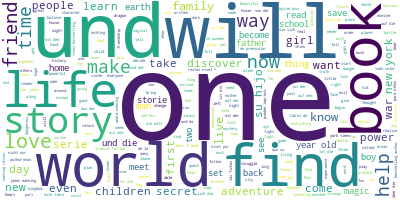

In [41]:
# visualize the most important words in the descriptions

# import the wordcloud library
import wordcloud 
from wordcloud import WordCloud

# join the different processed titles together.
long_string = ','.join(list(books['description'].values))

# create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# generate a word cloud
wordcloud.generate(long_string)

# visualize the word cloud
wordcloud.to_image()

In [9]:
# import natural language processing libraries
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# obtain stopwords for the following languages
stop_words = stopwords.words(['english', 'german', 'spanish', 'french', 'italian', 'Portuguese'])

# add stopwords without umlauts for German
de_stop_words = ['fur','konnen','konnte','uber','wahrend','wurde','wurden','ab']

stop_words = stop_words + de_stop_words
print(stop_words)


C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to C:\Users\Hassan
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# define new functions
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [11]:
# print tokenized description for a book after removing stopwords

a = books['description'].iloc[1]
a = a.split()
print(a)

b = remove_stopwords(a)
b = list(filter(None, b))
print("\n", b)

['schritt', 'für', 'schritt', 'über', '100', 'motive', 'zeichnen', 'detaillierte', 'schritt-für-schritt-anleitungen', 'zu', 'über', '100', 'motiven', 'tipps', 'und', 'tricks', 'fürs', 'zeichnen', 'mit', 'unterschiedlichen', 'materialien', 'viele', 'verschiedene', 'motive', 'mit', 'perspektive', 'schattierungen', 'und', 'in', 'bewegung', '224', 'bunte', 'seiten', 'mit', 'zeichnungen', 'für', 'mädchen', 'und', 'jungen', 'mit', 'diesem', 'detaillierten', 'buch', 'ist', 'der', 'einstieg', 'ins', 'zeichnen', 'ganz', 'einfach', 'zu', 'über', '100', 'motiven', 'bietet', 'es', 'ausführliche', 'schritt-für-schritt-anleitungen', 'probiere', 'es', 'aus', 'und', 'überrasche', 'deine', 'freunde', 'mit', 'coolen', 'bildern', 'verschiedene', 'materialien', 'werden', 'vorgestellt', 'und', 'die', 'anleitungen', 'zu', 'den', 'einzelnen', 'motiven', 'beinhalten', 'empfehlungen', 'für', 'die', 'auswahl', 'der', 'richtigen', 'stifte', 'hinweise', 'zu', 'unterschiedlichen', 'techniken', 'bereiten', 'dich', 

In [12]:
# create a list of the descriptions
data = books.description.values.tolist()
# tokenize the descriptions, i.e. converts sentences to lists of words
data_words = list(sent_to_words(data))
# remove stopwords from the lists of tokens
data_words = remove_stopwords(data_words)

In [13]:
import gensim.corpora as corpora

# create a dictionary of  all uniques tokens/words 
id2word = corpora.Dictionary(data_words)
# create a corpus
# for each document, a corpus always contains each word’s token’s id along with its frequency count in the document
# doc2bow: Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

In [18]:
from pprint import pprint

In [20]:
# visualize all tokens and their corresponding token_ids
# this was not printing witht the regular print() function; somehow pprint() does the job
pprint(id2word.token2id)

{'a_a': 179834,
 'a_airs': 176861,
 'a_toro': 198134,
 'aa': 5123,
 'aaa': 17359,
 'aaaaargh': 188854,
 'aaaah': 164469,
 'aaah': 133841,
 'aaand': 64788,
 'aaarrr': 244750,
 'aaasssh': 164617,
 'aabbott': 86878,
 'aabmc': 53705,
 'aachan': 62543,
 'aacharan': 222834,
 'aachen': 56865,
 'aachi': 173683,
 'aachim': 115904,
 'aad': 168382,
 'aaden': 239918,
 'aadhaarit': 213407,
 'aadhish': 235882,
 'aadhunik': 222835,
 'aado': 218393,
 'aahz': 75168,
 'aaia': 233138,
 'aaj': 213408,
 'aak': 145490,
 'aakhir': 152412,
 'aal': 25452,
 'aalen': 96889,
 'aalfeinen': 189218,
 'aalglatt': 55587,
 'aalsi': 146385,
 'aaltje': 220726,
 'aaltojen': 204772,
 'aamataur': 222427,
 'aambc': 90850,
 'aamilne': 205556,
 'aamir': 109022,
 'aamtuleeden': 199146,
 'aamu': 208617,
 'aamulla': 234563,
 'aan': 77754,
 'aandil': 222496,
 'aandor': 173351,
 'aandringen': 195331,
 'aane': 213503,
 'aang': 106153,
 'aangaat': 152852,
 'aangedaan': 233270,
 'aangenaam': 188494,
 'aangenomen': 100250,
 'aangeraak'

 'ablazeto': 168768,
 'able': 5072,
 'ableben': 78398,
 'ablebound': 130030,
 'abled': 160628,
 'ablegen': 13025,
 'ableger': 43198,
 'ablegte': 181700,
 'ablehnen': 12759,
 'ablehnend': 211572,
 'ablehnt': 37335,
 'ablehnung': 22378,
 'ableismus': 47342,
 'ableisten': 131373,
 'ableiten': 113635,
 'ablenken': 11235,
 'ablenkend': 172625,
 'ablenkung': 4409,
 'ablenkungen': 118588,
 'ablesen': 67911,
 'ablest': 224682,
 'ablief': 72039,
 'abliefern': 7636,
 'abliefert': 196788,
 'ablieferung': 221107,
 'ablo': 126671,
 'ablon': 245057,
 'ablosbar': 49620,
 'ablosbare': 6596,
 'ablosbaren': 17164,
 'ablosen': 29937,
 'ablosung': 115497,
 'abluchst': 100745,
 'ably': 71765,
 'abmachung': 57809,
 'abmachungen': 76004,
 'abmalen': 24694,
 'abmessen': 43404,
 'abnahm': 179294,
 'abnahme': 91235,
 'abnaturlich': 79839,
 'abnegation': 70260,
 'abnegazione': 231383,
 'abnehmen': 50516,
 'abneigung': 7858,
 'abneigungen': 30348,
 'abner': 241555,
 'abnett': 29472,
 'abnetts': 30969,
 'abney': 2

 'acabada': 139205,
 'acabado': 237952,
 'acabados': 196801,
 'acabam': 224793,
 'acaban': 135473,
 'acabando': 130169,
 'acabar': 33100,
 'acabaram': 217277,
 'acabaran': 170450,
 'acabaria': 206708,
 'acabas': 125558,
 'acabat': 200873,
 'acabe': 132992,
 'acaben': 136573,
 'acabou': 195254,
 'acacia': 125707,
 'acacio': 120123,
 'acadamy': 132451,
 'academe': 243114,
 'academia': 86891,
 'academic': 35552,
 'academical': 98013,
 'academically': 112959,
 'academicians': 162005,
 'academics': 100843,
 'academie': 170377,
 'academies': 120704,
 'academique': 199327,
 'academy': 877,
 'academyarch': 221625,
 'academyas': 235206,
 'academybut': 64879,
 'academyit': 105637,
 'academyjim': 167367,
 'academyprincess': 161217,
 'academythe': 96147,
 'acadia': 163973,
 'acadian': 87967,
 'acadians': 198683,
 'acadie': 198684,
 'acadiennes': 195898,
 'acadiens': 195857,
 'acaeus': 164854,
 'acama': 149133,
 'acamapichtli': 149134,
 'acampando': 151247,
 'acanthus': 105017,
 'acantilados': 1520

 'adderall': 94492,
 'adderbrandi': 204215,
 'adders': 165104,
 'adderstone': 100493,
 'addestrarli': 232955,
 'addict': 41307,
 'addicted': 35917,
 'addicticed': 95616,
 'addicting': 51592,
 'addictingarena': 139034,
 'addictingashai': 196298,
 'addiction': 6661,
 'addictionmy': 168120,
 'addictions': 127084,
 'addictionwith': 165537,
 'addictive': 8350,
 'addictively': 135057,
 'addictiveness': 41604,
 'addictivenessin': 76214,
 'addicts': 112531,
 'addictwith': 26596,
 'addicus': 112443,
 'addie': 3665,
 'addieren': 215841,
 'addig': 192847,
 'adding': 8351,
 'addio': 131073,
 'addirittura': 124034,
 'addiritura': 189092,
 'addis': 84185,
 'addison': 69272,
 'addition': 17265,
 'additional': 36715,
 'additionally': 111221,
 'additions': 88091,
 'additive': 244017,
 'additively': 158863,
 'addle': 175310,
 'addled': 202076,
 'addleton': 163639,
 'addo': 206103,
 'addormentarsi': 153095,
 'addormenti': 231269,
 'addormentino': 185400,
 'address': 37676,
 'addressed': 5813,
 'addresses

 'aelfrith': 241589,
 'aelfstan': 78009,
 'aelia': 116536,
 'aelin': 25123,
 'aelinae': 179916,
 'aelis': 238410,
 'aelita': 85252,
 'aelius': 240320,
 'aelle': 239322,
 'aelynn': 169513,
 'aenarion': 51269,
 'aendi': 221790,
 'aeneas': 87651,
 'aeneid': 72073,
 'aenid': 64428,
 'aenlin': 39668,
 'aenora': 177597,
 'aeola': 203950,
 'aeolia': 171978,
 'aeon': 114480,
 'aeons': 107433,
 'aequitas': 80651,
 'aeran': 147905,
 'aeras': 91709,
 'aerated': 117689,
 'aerdenwelts': 99070,
 'aereo': 143791,
 'aergos': 237407,
 'aerial': 78469,
 'aerialist': 149571,
 'aerians': 243994,
 'aerich': 131538,
 'aerides': 106427,
 'aeridur': 160291,
 'aerie': 151384,
 'aeriel': 241106,
 'aeriens': 80540,
 'aeries': 110641,
 'aerin': 39045,
 'aerins': 68806,
 'aerlith': 205283,
 'aermia': 65565,
 'aermian': 65566,
 'aero': 62972,
 'aerobatics': 185177,
 'aerobic': 158118,
 'aerodynamic': 133195,
 'aerodynamics': 160582,
 'aeron': 181252,
 'aerona': 154453,
 'aeronaut': 222091,
 'aeronautica': 231205,
 

 'agotador': 225936,
 'agotadora': 231707,
 'agotadoras': 180966,
 'agotamiento': 171875,
 'agothe': 130290,
 'agothen': 182679,
 'agothere': 242690,
 'agotruly': 114580,
 'agowhen': 148634,
 'agowhy': 195492,
 'agowith': 235415,
 'agra': 228937,
 'agrabah': 182630,
 'agraciada': 33101,
 'agrada': 200874,
 'agradable': 153426,
 'agradables': 199040,
 'agradara': 228210,
 'agradecemos': 134262,
 'agradecer': 132590,
 'agradeceran': 231314,
 'agradecida': 136068,
 'agradecido': 171183,
 'agradecidois': 229323,
 'agradecidos': 163432,
 'agradecimiento': 132386,
 'agrado': 132387,
 'agraiment': 175879,
 'agramons': 110607,
 'agrandmother': 214766,
 'agrarian': 51978,
 'agrarlands': 24320,
 'agrarplaneten': 178115,
 'agrarwelt': 99744,
 'agravain': 97749,
 'agraveyard': 227868,
 'agreable': 217186,
 'agreables': 158157,
 'agreani': 240947,
 'agree': 24038,
 'agreeable': 106684,
 'agreeably': 138178,
 'agreebut': 238360,
 'agreed': 13745,
 'agreeing': 100049,
 'agreement': 21798,
 'agreement

 'aktivno': 162541,
 'aktivnost': 49430,
 'aktivwerden': 25612,
 'aktorer': 164691,
 'aktosensoren': 174420,
 'aktua': 219567,
 'aktual': 60653,
 'aktualisiert': 51623,
 'aktualisierte': 11007,
 'aktualisierten': 24117,
 'aktualisierter': 203529,
 'aktualitat': 14197,
 'aktuell': 17515,
 'aktuella': 164692,
 'aktuelle': 27634,
 'aktuellem': 123152,
 'aktuellen': 3098,
 'aktueller': 19803,
 'aktuelles': 45229,
 'aktuellsten': 36021,
 'aktuellzeit': 94981,
 'aktulles': 141221,
 'aku': 166935,
 'akua': 162022,
 'akubonayo': 215923,
 'akukaze': 212720,
 'akula': 80059,
 'akuma': 65456,
 'akumatized': 43385,
 'akuna': 116128,
 'akustische': 146585,
 'akut': 44297,
 'akutagawa': 74257,
 'akuwama': 211864,
 'akuyamba': 212671,
 'akwaeke': 52663,
 'akwanyere': 202596,
 'akwapim': 63576,
 'akwasidae': 227927,
 'akwesasne': 150084,
 'akwiteite': 215521,
 'akyab': 155804,
 'akyi': 105744,
 'akyir': 215993,
 'akynd': 180335,
 'akzent': 80162,
 'akzente': 72194,
 'akzentzeichen': 72900,
 'akzeptabe

 'aliteletras': 236124,
 'aliteracion': 234276,
 'alithea': 103272,
 'alitheabut': 103273,
 'alithey': 134692,
 'alive': 8353,
 'alivea': 115522,
 'aliveafter': 206539,
 'aliveand': 110318,
 'aliveas': 236937,
 'aliveat': 225420,
 'aliveauthor': 210428,
 'alivebinge': 128190,
 'alivebooks': 242403,
 'alivebut': 223420,
 'alivechronicles': 231199,
 'alivecountless': 166766,
 'alivedanger': 170255,
 'alivedeciding': 208558,
 'alivedesperate': 185093,
 'alivedon': 145450,
 'aliveebony': 204208,
 'aliveechoes': 169906,
 'alivefeaturing': 47989,
 'alivefrom': 220966,
 'alivehigh': 104508,
 'alivehow': 228828,
 'alivei': 225431,
 'alivein': 131718,
 'aliveisolde': 92603,
 'alivejoin': 68110,
 'alivelet': 215880,
 'alivemenerith': 243964,
 'alivenola': 159454,
 'alivenox': 144541,
 'aliveonly': 116242,
 'aliveset': 73413,
 'aliveshades': 15773,
 'aliveshanghai': 233749,
 'alivethe': 177716,
 'alivethey': 231123,
 'alivetintin': 82310,
 'alivetui': 191188,
 'alivewhile': 202207,
 'alivewill': 

 'alphas': 39193,
 'alphasj': 237096,
 'alphason': 102010,
 'alphatier': 27124,
 'alphavampir': 57424,
 'alphavul': 227063,
 'alphawolf': 39194,
 'alphawolfen': 92230,
 'alphawolfes': 120699,
 'alphebetize': 241924,
 'alphega': 115653,
 'alphonse': 241078,
 'alphonsus': 241365,
 'alpi': 219116,
 'alpin': 114642,
 'alpina': 148915,
 'alpine': 98428,
 'alpines': 200227,
 'alpinist': 153227,
 'alpino': 77176,
 'alppain': 84950,
 'alppien': 190802,
 'alpreni': 198136,
 'alps': 67434,
 'alptraum': 31757,
 'alptraumdoch': 166160,
 'alptraume': 16088,
 'alptraumedu': 51844,
 'alptraumen': 34500,
 'alptraumhafte': 23424,
 'alptraumhaften': 78849,
 'alptraumhaftes': 82666,
 'alptraums': 82434,
 'alptraumwesen': 91031,
 'alquanto': 210753,
 'alraunen': 156488,
 'already': 4057,
 'alreadybut': 140609,
 'alreadywhen': 228674,
 'alrededor': 130758,
 'alrededores': 129648,
 'alric': 240933,
 'alright': 94601,
 'alrightbut': 135922,
 'alrik': 13363,
 'alrion': 77505,
 'alrnira': 193070,
 'alsace': 13

 'ameno': 137110,
 'amenophis': 94505,
 'amenous': 107627,
 'amense': 145550,
 'amentson': 168534,
 'amentsononce': 169794,
 'amenunua': 227994,
 'amephirous': 191624,
 'amer': 154942,
 'amera': 167601,
 'ameranno': 160266,
 'ameres': 184663,
 'amerete': 236965,
 'ameri': 165213,
 'america': 6180,
 'americaan': 179258,
 'americaand': 153868,
 'americaboth': 119249,
 'americadie': 51752,
 'americafs': 228194,
 'americahe': 130839,
 'americain': 136275,
 'americaines': 174845,
 'americains': 112017,
 'americaisobel': 142640,
 'americamr': 196702,
 'american': 4354,
 'americana': 96815,
 'americanabecome': 194317,
 'americanaidd': 219724,
 'americanas': 52268,
 'americane': 207255,
 'americanindians': 241600,
 'americano': 64434,
 'americans': 38423,
 'americansbut': 175594,
 'americapeople': 235819,
 'americapop': 127883,
 'americas': 63073,
 'americathe': 211530,
 'americathey': 242255,
 'americathis': 229622,
 'americatime': 111204,
 'americatintin': 48371,
 'americatogether': 29954,
 

 'andros': 104317,
 'androvia': 49594,
 'andrus': 163038,
 'andryczyk': 231877,
 'andsaves': 105446,
 'andschaft': 26740,
 'andschool': 34720,
 'andsecond': 120006,
 'andsent': 210502,
 'andseven': 106632,
 'andskills': 140408,
 'andslime': 169792,
 'andsome': 239285,
 'andsowingchaos': 121395,
 'andspooked': 205096,
 'andspænis': 75847,
 'andstory': 218926,
 'andtake': 229258,
 'andthe': 36820,
 'andtheir': 124510,
 'andthey': 225410,
 'andtierra': 130967,
 'andufoswhat': 206096,
 'anduin': 27937,
 'andus': 193162,
 'andvery': 93336,
 'andwari': 85391,
 'andwell': 231457,
 'andwhat': 226270,
 'andwhy': 69100,
 'andwithin': 244369,
 'andy': 7282,
 'andyland': 51138,
 'andys': 19928,
 'andzack': 119880,
 'andzheja': 223995,
 'andzhelesa': 49431,
 'ane': 141421,
 'aneanti': 209415,
 'aneantibravant': 210544,
 'aneantir': 214608,
 'aneantissement': 182450,
 'aneas': 82806,
 'anecdota': 129649,
 'anecdotal': 50554,
 'anecdotas': 128882,
 'anecdote': 129650,
 'anecdotes': 45424,
 'aneda': 2

 'anker': 21456,
 'ankeriasta': 187146,
 'ankern': 152379,
 'ankers': 164207,
 'ankert': 88639,
 'ankes': 141180,
 'ankh': 5041,
 'ankhdhratun': 112171,
 'ankhen': 209599,
 'ankita': 210014,
 'ankite': 182709,
 'anklage': 88382,
 'anklager': 69032,
 'anklang': 76072,
 'anklange': 80663,
 'ankle': 62349,
 'anklea': 135854,
 'ankleiden': 13110,
 'ankleidezimmer': 175914,
 'ankles': 101803,
 'anklesaria': 89231,
 'anklesasha': 146802,
 'anklesh': 134795,
 'anklet': 119974,
 'anklingen': 44133,
 'anklopfen': 232453,
 'anklopft': 13383,
 'anknupfen': 69534,
 'anko': 244758,
 'ankomme': 62133,
 'ankommen': 15290,
 'ankommens': 84136,
 'ankommer': 141639,
 'ankommling': 88521,
 'ankommlinge': 70310,
 'ankommt': 2312,
 'ankommtzuhause': 57563,
 'ankomst': 196669,
 'ankonig': 105364,
 'ankor': 30120,
 'ankora': 238316,
 'ankora_': 90333,
 'ankoridzhe': 84485,
 'ankrath': 66608,
 'ankreuzen': 144,
 'ankundigen': 48097,
 'ankundigt': 26762,
 'ankundigung': 244298,
 'ankunft': 1240,
 'ankunfte': 1

 'antonym': 242084,
 'antonyms': 242085,
 'antoon': 186644,
 'antor': 116221,
 'antornt': 123654,
 'antos': 119957,
 'antrag': 34294,
 'antragen': 30307,
 'antreffen': 77284,
 'antreiben': 85169,
 'antreibenlassen': 136727,
 'antreibt': 30464,
 'antreneze': 230963,
 'antreten': 4902,
 'antretenam': 117345,
 'antretendort': 105133,
 'antretenerster': 109986,
 'antri': 165453,
 'antrieb': 28565,
 'antriebe': 109113,
 'antriebs': 136778,
 'antriebslos': 43040,
 'antriebssystem': 149615,
 'antriebssysteme': 66289,
 'antrifft': 233393,
 'antritt': 15972,
 'antropolog': 121745,
 'antropologa': 136082,
 'antropologer': 224958,
 'antropologico': 158222,
 'antropologo': 164510,
 'antrude': 114733,
 'ants': 79423,
 'antsare': 229369,
 'antshumans': 237394,
 'antsy': 239162,
 'antti': 187147,
 'antula': 90944,
 'antun': 76557,
 'antus': 125734,
 'antut': 68486,
 'antverpeno': 90334,
 'antweorten': 46530,
 'antwerpen': 142936,
 'antwoorden': 168002,
 'antwort': 17216,
 'antworte': 86276,
 'antwort

 'appetit': 59825,
 'appetite': 50258,
 'appetites': 61578,
 'appetitesbefore': 181290,
 'appetiti': 170801,
 'appetitlichkeit': 161523,
 'appetito': 142270,
 'appetizer': 105635,
 'appetizing': 209382,
 'appin': 240224,
 'applaud': 83199,
 'applaudieren': 144933,
 'applauds': 185188,
 'applaus': 75154,
 'applausdie': 31686,
 'applause': 88786,
 'apple': 52553,
 'applebaum': 214530,
 'applebee': 187557,
 'applebloom': 221899,
 'appleblossom': 154984,
 'applebuy': 239459,
 'appleby': 132569,
 'applegate': 44958,
 'applehans': 153306,
 'applejack': 100332,
 'apples': 124724,
 'applesauce': 192204,
 'appleseed': 127869,
 'applestone': 188326,
 'appleto': 233680,
 'appleton': 126434,
 'applewhite': 155942,
 'applewhites': 155943,
 'appley': 107321,
 'appliance': 157119,
 'applicable': 82761,
 'applicant': 244855,
 'applicants': 147567,
 'applicare': 201581,
 'application': 72570,
 'applications': 57627,
 'applicazione': 224587,
 'applied': 3387,
 'applies': 42776,
 'appliquer': 223446,
 'a

 'arhys': 120378,
 'ari': 18924,
 'aria': 2752,
 'ariach': 46248,
 'ariadna': 212421,
 'ariadne': 16028,
 'ariadnis': 170501,
 'arial': 177245,
 'arian': 58491,
 'ariana': 55703,
 'ariane': 51299,
 'arianein': 209387,
 'arianna': 94644,
 'arianne': 40355,
 'arianora': 51148,
 'arianrod': 182619,
 'arians': 211768,
 'arianus': 155083,
 'arianwyn': 185327,
 'ariarcus': 30701,
 'arias': 59418,
 'aribella': 210517,
 'aric': 38847,
 'arica': 138531,
 'arid': 15669,
 'arida': 110443,
 'aridain': 89771,
 'aridien': 68955,
 'arie': 211735,
 'ariel': 74183,
 'ariella': 70218,
 'arielle': 16473,
 'arielledieser': 227605,
 'ariels': 211469,
 'arien': 138377,
 'arienna': 175128,
 'ariens': 227181,
 'ariensischen': 227176,
 'arier': 191798,
 'aries': 96996,
 'arif': 119119,
 'arightand': 64681,
 'arik': 72802,
 'arika': 50602,
 'arikanern': 144898,
 'ariki': 200063,
 'arima': 243944,
 'ariman': 77987,
 'arimea': 168227,
 'arimeaner': 213704,
 'arimeanische': 213705,
 'arimeanischen': 174968,
 'arim

 'artifaille': 136159,
 'artifi': 179451,
 'artifical': 174525,
 'artifice': 105223,
 'artificer': 208600,
 'artifices': 17680,
 'artificial': 31733,
 'artificially': 64331,
 'artificialmente': 220184,
 'artificiel': 202679,
 'artificielle': 191765,
 'artificielles': 175442,
 'artificing': 50663,
 'artificio': 111460,
 'artigas': 89043,
 'artige': 192549,
 'artigen': 85254,
 'artiges': 227591,
 'artigiano': 241725,
 'artiglieri': 157279,
 'artigo': 86221,
 'artihre': 165057,
 'artik': 30983,
 'artikel': 19726,
 'artikelen': 197040,
 'artikeln': 46277,
 'artikelnummer': 46786,
 'artikels': 238253,
 'artilleriefeuer': 90177,
 'artillery': 40704,
 'artimanas': 158467,
 'artime': 221436,
 'artir': 169701,
 'artisan': 225764,
 'artisanal': 121662,
 'artisanales': 182862,
 'artisans': 217802,
 'artisitic': 130791,
 'artist': 3996,
 'artista': 152102,
 'artistaenglish': 166466,
 'artistanastasia': 231069,
 'artistas': 165318,
 'artiste': 64063,
 'artisten': 37140,
 'artistes': 156633,
 'artis

 'assurdo': 111063,
 'assure': 59266,
 'assured': 84295,
 'assuredly': 127336,
 'assurent': 216840,
 'assurer': 155675,
 'assures': 135449,
 'assuring': 78545,
 'assurla': 210346,
 'assustador': 209525,
 'assustadora': 179718,
 'assustadoras': 223555,
 'assustam': 230095,
 'assynt': 216739,
 'assyrians': 151905,
 'asszony': 223043,
 'ast': 28161,
 'asta': 44574,
 'astaire': 111298,
 'astandalone': 105306,
 'astar': 95830,
 'astara': 56001,
 'astarak': 108436,
 'astaras': 30560,
 'astarhe': 81855,
 'astaroth': 134412,
 'astartes': 29483,
 'astarteskrieger': 67301,
 'astazi': 85067,
 'astazicolonelul': 181983,
 'astazidoborat': 182116,
 'astaziinca': 230966,
 'aste': 68555,
 'asteara': 174991,
 'asteg': 94239,
 'asten': 32401,
 'astenryk': 218465,
 'asteptand': 118671,
 'asteptata': 89110,
 'aster': 17739,
 'asteri': 173140,
 'asteria': 13422,
 'asterikthe': 213042,
 'asterio': 155901,
 'asterion': 188708,
 'asterions': 188709,
 'asterios': 202680,
 'asterisk': 239012,
 'asterix': 51586,

 'attraktiv': 17674,
 'attraktive': 2576,
 'attraktivem': 103915,
 'attraktiven': 1000,
 'attraktiver': 29931,
 'attraktivitat': 54904,
 'attraktivsten': 32695,
 'attratta': 144477,
 'attratto': 211439,
 'attraversa': 131077,
 'attraversare': 188659,
 'attraversera': 155390,
 'attraverseranno': 217891,
 'attraverso': 84803,
 'attravierzo': 206108,
 'attrayant': 226663,
 'attrazioni': 165808,
 'attribuee': 186892,
 'attributable': 106445,
 'attribute': 124276,
 'attributed': 127947,
 'attributen': 93172,
 'attributes': 39936,
 'attribution': 71542,
 'attriste': 166118,
 'attrition': 121672,
 'attritional': 173473,
 'attuale': 193036,
 'attualela': 230569,
 'attuali': 174589,
 'attucks': 239435,
 'attum': 193421,
 'attuma': 193422,
 'attune': 205306,
 'attuned': 102773,
 'attunement': 114939,
 'attuorno': 206109,
 'attwell': 128298,
 'attwood': 183385,
 'atu': 145615,
 'atuacao': 237902,
 'atuais': 182226,
 'atuaisedicao': 108609,
 'atual': 182227,
 'atualidade': 62628,
 'atualon': 61318

 'aufzulegen': 167775,
 'aufzulehnen': 61844,
 'aufzulosen': 75726,
 'aufzum': 65365,
 'aufzumachen': 27853,
 'aufzumischen': 32257,
 'aufzumobeln': 70594,
 'aufzumuntern': 81453,
 'aufzunehmen': 2160,
 'aufzunehmendie': 20943,
 'aufzupassen': 112189,
 'aufzuraumen': 34151,
 'aufzureiben': 22660,
 'aufzurichten': 209099,
 'aufzurufen': 71299,
 'aufzurutteln': 132249,
 'aufzusammeln': 72856,
 'aufzusaugen': 65151,
 'aufzuschlagen': 73491,
 'aufzuschlusseln': 106062,
 'aufzuschreiben': 8237,
 'aufzuschwingen': 16675,
 'aufzusehen': 178401,
 'aufzusetzen': 84860,
 'aufzuspuren': 15036,
 'aufzuspurendie': 187810,
 'aufzustacheln': 70404,
 'aufzustehen': 70300,
 'aufzusteigen': 6227,
 'aufzusteigenals': 111257,
 'aufzustellen': 36154,
 'aufzustobern': 132326,
 'aufzustoren': 151050,
 'aufzusuchen': 46560,
 'aufzutauchen': 91067,
 'aufzutauen': 104744,
 'aufzutragen': 50917,
 'aufzutreiben': 31242,
 'aufzutreibende': 168743,
 'aufzutreten': 110526,
 'aufzuwachen': 81836,
 'aufzuwecken': 9944

 'ausmalmotiv': 54301,
 'ausmalmotive': 10145,
 'ausmalmotiven': 13094,
 'ausmaln': 217345,
 'ausmalniveaus': 64800,
 'ausmalposter': 55104,
 'ausmalprojekte': 40906,
 'ausmalratseln': 61078,
 'ausmalseite': 122860,
 'ausmalseiten': 16965,
 'ausmalset': 164182,
 'ausmalspaß': 13095,
 'ausmalspaßmit': 69528,
 'ausmalst': 28647,
 'ausmalszenen': 63847,
 'ausmalt': 24448,
 'ausmalte': 22009,
 'ausmaltierchen': 102902,
 'ausmalvergnugen': 54308,
 'ausmalversuche': 53307,
 'ausmalvorlage': 50768,
 'ausmalvorlagen': 64801,
 'ausmalwelt': 83929,
 'ausmalwelten': 34697,
 'ausmassen': 163666,
 'ausmaß': 23638,
 'ausmaße': 10611,
 'ausmaßen': 39349,
 'ausmaßes': 27215,
 'ausmehr': 40304,
 'ausmichael': 86177,
 'ausmisten': 94876,
 'ausmit': 108282,
 'ausnahme': 21927,
 'ausnahmepferdes': 98913,
 'ausnahmetalents': 221735,
 'ausnahmezustand': 36986,
 'ausnahmslos': 25559,
 'ausnahmslosbis': 27122,
 'ausnahmsweise': 10021,
 'ausnehmend': 146971,
 'ausnimmt': 83262,
 'ausnutzen': 25396,
 'ausnutzt'

 'autumnal': 27345,
 'autumnella': 163390,
 'autumngale': 111234,
 'autumns': 102060,
 'auweia': 13027,
 'auxi': 211601,
 'auxier': 69275,
 'auxiliado': 137837,
 'auxiliar': 131289,
 'auxiliary': 136763,
 'auxilio': 156261,
 'auxilium': 202309,
 'auxquels': 210167,
 'auzokoen': 201340,
 'außen': 12859,
 'außenbezirke': 105516,
 'außenbezirken': 239950,
 'außenborder': 75175,
 'außendienst': 36320,
 'außeneinsatz': 23957,
 'außengebieten': 189702,
 'außenhulle': 101362,
 'außeninsel': 12138,
 'außenkante': 75063,
 'außenlander': 43076,
 'außenminister': 90528,
 'außenpolitische': 175638,
 'außenposten': 133619,
 'außenseiter': 15129,
 'außenseiterin': 1769,
 'außenseitern': 24664,
 'außenseiters': 165132,
 'außenspiegel': 178928,
 'außenstation': 127075,
 'außenstehende': 221750,
 'außenstehenden': 43884,
 'außenstehender': 21413,
 'außenstelle': 162984,
 'außenteam': 175696,
 'außentur': 221477,
 'außenwelt': 29461,
 'außenweltsucher': 199401,
 'außer': 204,
 'außerdem': 65,
 'außere':

 'azura': 121935,
 'azurblauem': 217667,
 'azurblauen': 214666,
 'azurblaues': 110666,
 'azure': 131711,
 'azureseas': 234307,
 'azuria': 149972,
 'azurians': 231465,
 'azurite': 238084,
 'azurnu': 105587,
 'azurs': 178228,
 'azurwolfe': 168363,
 'azy': 202529,
 'azyr': 88852,
 'azyrand': 229831,
 'azyrspark': 229832,
 'azzal': 121524,
 'azzeccati': 192992,
 'azzi': 72241,
 'azzurra': 167603,
 'azzurri': 163547,
 'azzurro': 241652,
 'azzy': 129376,
 'aµ': 28127,
 'aß': 199526,
 'aßen': 30354,
 'að': 75850,
 'ba': 13953,
 'ba_ar_l_': 182637,
 'ba_l_yor': 182638,
 'baa': 230480,
 'baabaaa': 221581,
 'baabwaa': 221199,
 'baadashaah': 222501,
 'baader': 102802,
 'baako': 105748,
 'baal': 53572,
 'baalikar': 161238,
 'baals': 121335,
 'baan': 87763,
 'baani': 122893,
 'baar': 222502,
 'baare': 222431,
 'baart': 145796,
 'baat': 152415,
 'baate': 202816,
 'baavajuud': 213414,
 'baay': 200574,
 'bab': 237239,
 'baba': 11185,
 'babadook': 227054,
 'babae': 205220,
 'babaji': 181492,
 'babar': 

 'bandenabenteuer': 47895,
 'bandenanfuhrer': 93180,
 'bandenband': 75936,
 'bandenkrieg': 56457,
 'bandenlueg': 216147,
 'bandenquartier': 44586,
 'bandenschwur': 51640,
 'bandenzoff': 88614,
 'bander': 20640,
 'banderbear': 142472,
 'bandern': 56811,
 'banderstes': 150514,
 'bandes': 28858,
 'bandesemail': 52722,
 'bandeser': 231529,
 'bandettewinner': 163912,
 'bandfußball': 94903,
 'bandicoot': 135665,
 'bandicut': 203579,
 'bandidos': 113870,
 'bandigen': 50772,
 'bandigenden': 61504,
 'bandigenes': 210187,
 'bandigt': 77584,
 'banding': 102456,
 'bandirlo': 214976,
 'bandit': 43134,
 'bandita': 156765,
 'banditen': 25908,
 'bandito': 90336,
 'bandits': 34274,
 'banditsand': 93984,
 'banditsguard': 229259,
 'banditslana': 121390,
 'banditsplunged': 233812,
 'banditstouched': 118639,
 'banditthe': 160753,
 'bandkameraden': 173817,
 'bandkollege': 16192,
 'bandkollegen': 85310,
 'bandmate': 99892,
 'bandmates': 51967,
 'bandmika': 50792,
 'bandmitglieder': 37237,
 'bando': 181871,
 

 'bastelexperten': 58682,
 'bastelexpertin': 39959,
 'bastelfans': 16851,
 'bastelfilz': 43505,
 'bastelfreudige': 31941,
 'bastelfreunde': 45622,
 'bastelgeschaft': 118343,
 'bastelgeschick': 44971,
 'bastelheft': 63319,
 'bastelidee': 25587,
 'bastelideen': 7515,
 'bastelkiste': 33697,
 'bastelklassiker': 92141,
 'bastelkleber': 27506,
 'bastelkunstler': 74740,
 'bastelleien': 126662,
 'bastellideen': 208859,
 'bastelmaterial': 33698,
 'bastelmaus': 115394,
 'bastelmaßig': 94827,
 'bastelmodelle': 97618,
 'basteln': 6987,
 'bastelndas': 21572,
 'bastelnden': 94172,
 'bastelneine': 229108,
 'bastelns': 78238,
 'bastelnwas': 73913,
 'bastelnworaus': 73854,
 'bastelpapier': 36003,
 'bastelpapiere': 7475,
 'bastelpause': 15405,
 'bastelprodukte': 40972,
 'bastelprofi': 75102,
 'bastelprofis': 238409,
 'bastelprojekt': 31791,
 'bastelprojekte': 15963,
 'bastelprojekten': 14562,
 'bastelschatze': 22579,
 'bastelscheren': 106030,
 'bastelschrank': 104054,
 'bastelschritt': 94828,
 'bastelsc

 'beco': 180451,
 'become': 1872,
 'becomea': 142015,
 'becomehumans': 230460,
 'becomelorali': 80056,
 'becomenow': 222201,
 'becomeonly': 143505,
 'becomes': 5,
 'becomesclear': 102736,
 'becomesin': 169727,
 'becomesnow': 85403,
 'becomessuper': 106074,
 'becomethis': 129598,
 'becoming': 11276,
 'becomming': 127928,
 'becoms': 243630,
 'becthel': 109543,
 'bed': 6547,
 'beda': 62018,
 'bedacht': 27216,
 'bedachte': 114587,
 'bedachtig': 54268,
 'bedagelig': 116500,
 'bedanke': 98430,
 'bedanken': 232223,
 'bedankt': 172517,
 'bedard': 135412,
 'bedarf': 13818,
 'bedats': 237752,
 'bedauerlich': 197004,
 'bedauerliche': 96191,
 'bedauern': 51421,
 'bedauernd': 10278,
 'bedauerns': 116677,
 'bedauernswerte': 188252,
 'bedauert': 110502,
 'bedazzer': 135116,
 'bedazzling': 92042,
 'bedbug': 208433,
 'bedbugs': 136505,
 'bedbut': 237734,
 'bedchamber': 216269,
 'bedcovers': 153307,
 'bedded': 239596,
 'bedding': 242903,
 'bede': 146115,
 'bedeach': 237414,
 'bedecked': 52320,
 'bedeckt

 'beharren': 75092,
 'beharrender': 196066,
 'beharrlich': 52123,
 'beharrlichkeit': 40040,
 'beharrt': 75980,
 'beharrungswille': 236469,
 'behatolnak': 228405,
 'behaupten': 11669,
 'behauptenxer': 131569,
 'behauptest': 210962,
 'behauptet': 9024,
 'behauptete': 40829,
 'behaupteten': 185104,
 'behauptung': 133843,
 'behauptungen': 97087,
 'behausung': 68005,
 'behausungen': 30416,
 'behave': 60808,
 'behaveby': 193780,
 'behaved': 89308,
 'behavejoin': 129789,
 'behaves': 118640,
 'behaving': 40205,
 'behavingwhen': 193399,
 'behavior': 4018,
 'behavioral': 132563,
 'behaviorial': 84394,
 'behaviorist': 68424,
 'behaviors': 38125,
 'behaviour': 66680,
 'behaviouras': 173600,
 'behaviourbilly': 161758,
 'behaviours': 123128,
 'behaviourwhen': 144440,
 'beheaded': 124030,
 'beheadedjust': 126398,
 'beheading': 77484,
 'beheadings': 191605,
 'beheartbreak': 228105,
 'beheben': 40144,
 'behebenein': 227611,
 'beheer': 199986,
 'beheerst': 209742,
 'beheimatet': 201627,
 'beheimatete': 

 'bengelchen': 122246,
 'benger': 239114,
 'bengt': 62392,
 'beni': 177248,
 'beniamina': 219119,
 'benificiary': 118915,
 'benign': 90105,
 'benigne': 62457,
 'benigni': 126343,
 'benignly': 82691,
 'benignthe': 121870,
 'benimmt': 31675,
 'benimsin': 55251,
 'benin': 133984,
 'benit': 226198,
 'benita': 105126,
 'benitez': 224978,
 'benito': 202115,
 'benjamen': 167892,
 'benjami': 215970,
 'benjamin': 19103,
 'benjaminoftomes': 112566,
 'benji': 151443,
 'benjie': 153872,
 'benjmai': 215971,
 'benjmain': 215972,
 'benjy': 186807,
 'benk': 208034,
 'benka': 232224,
 'benkau': 85616,
 'benna': 243359,
 'benne': 16060,
 'benneker': 171655,
 'benner': 189248,
 'bennet': 11186,
 'bennett': 63386,
 'bennettfunny': 124989,
 'bennetts': 117414,
 'benni': 39465,
 'benniah': 135643,
 'bennie': 186724,
 'benning': 96383,
 'bennington': 243250,
 'benno': 27238,
 'benny': 24541,
 'bennys': 27494,
 'beno': 72186,
 'benoit': 13669,
 'benommen': 104438,
 'benot': 32013,
 'benotigen': 5415,
 'benoti

 'besiegendurch': 184808,
 'besiegenelliot': 84429,
 'besiegenim': 102567,
 'besiegenin': 35875,
 'besiegenrand': 35123,
 'besiegentauch': 39600,
 'besiegenwelche': 189819,
 'besiegst': 87895,
 'besiegt': 5312,
 'besiegtdenn': 176364,
 'besiegte': 83550,
 'besiegten': 28526,
 'besiegter': 76841,
 'besiegtund': 194988,
 'besil': 95413,
 'besinnen': 111888,
 'besinnliche': 27495,
 'besinnt': 145033,
 'besinnung': 88523,
 'besinnungslosen': 88524,
 'besitos': 223539,
 'besitz': 8816,
 'besitzanspruche': 111524,
 'besitze': 110710,
 'besitzen': 2836,
 'besitzenfreude': 126805,
 'besitzenob': 31878,
 'besitzer': 10612,
 'besitzerin': 38215,
 'besitzerinnen': 61298,
 'besitzern': 79450,
 'besitzernboba': 38108,
 'besitzers': 25246,
 'besitzes': 77309,
 'besitznahme': 198083,
 'besitzt': 405,
 'besitztdanai': 111258,
 'besitztdie': 102851,
 'besitztelena': 99200,
 'besitztum': 78771,
 'besitztumer': 39833,
 'beskaffad': 210978,
 'beskarda': 177032,
 'besked': 231104,
 'beskedet': 172824,
 'be

 'bewilder': 101665,
 'bewildered': 39091,
 'bewildering': 10960,
 'bewilderment': 77043,
 'bewilders': 130903,
 'bewill': 143141,
 'bewilligt': 57129,
 'bewirbt': 32998,
 'bewirken': 8983,
 'bewirkender': 222638,
 'bewirkt': 14884,
 'bewirkte': 53442,
 'bewirtschaften': 191044,
 'bewirtschaftet': 64945,
 'bewitch': 67459,
 'bewitched': 63395,
 'bewitches': 78142,
 'bewitching': 8545,
 'bewitchingly': 205572,
 'bewitchment': 205545,
 'bewith': 52554,
 'bewogen': 21737,
 'bewohnbar': 94230,
 'bewohnbare': 39111,
 'bewohnbaren': 39765,
 'bewohnbarer': 177528,
 'bewohnen': 14956,
 'bewohnenden': 59356,
 'bewohner': 9131,
 'bewohnereine': 238290,
 'bewohnerin': 21457,
 'bewohnerinnen': 86278,
 'bewohnern': 14957,
 'bewohners': 132250,
 'bewohnerviertes': 150515,
 'bewohnt': 18109,
 'bewohnte': 48270,
 'bewohnten': 20328,
 'bewohnter': 60491,
 'bewohntes': 146892,
 'bewoners': 197042,
 'bewoonbare': 197054,
 'bewritten': 161613,
 'bewundere': 14238,
 'bewundern': 32622,
 'bewundernde': 3218

 'biosensing': 233167,
 'biosignatures': 195600,
 'biosphare': 67794,
 'biospharen': 54488,
 'biosphere': 87015,
 'biospychology': 219166,
 'biosynthetic': 153702,
 'biotech': 43306,
 'biotechmoguls': 29000,
 'biotechnical': 117107,
 'biotechniker': 171562,
 'biotechnologie': 119580,
 'biotechnology': 140140,
 'biotehcnology': 191372,
 'bioterrorism': 106656,
 'bioterrorismus': 101366,
 'biotischen': 231456,
 'biotopen': 120595,
 'biotoxic': 149103,
 'biowaffe': 35964,
 'bioware': 34501,
 'biowaredie': 91292,
 'bioweapon': 41177,
 'biowerte': 154012,
 'bipedal': 177451,
 'bipeds': 103282,
 'biplan': 171299,
 'biplanet': 155280,
 'biplani': 102013,
 'bipolaire': 215727,
 'bipolar': 70770,
 'bipopulationer': 164697,
 'bir': 14601,
 'bira': 109658,
 'biracial': 37227,
 'birakmamistir': 209449,
 'biraktigi': 215293,
 'biran': 166581,
 'biraz': 158565,
 'birazda': 158566,
 'birbal': 222491,
 'birbantello': 221795,
 'birbirinden': 43342,
 'birch': 120844,
 'birchall': 174068,
 'birchbark': 1

 'blickwinkel': 85845,
 'blickwinkeln': 222369,
 'blieb': 5341,
 'blieben': 19709,
 'bliebmit': 27448,
 'bligh': 58694,
 'blight': 77506,
 'blightcaller': 35022,
 'blighted': 140581,
 'blighters': 26598,
 'blightey': 120064,
 'blightformer': 164961,
 'blightthe': 81560,
 'blij': 147404,
 'blijft': 217964,
 'blijkt': 233272,
 'blijven': 171350,
 'blikken': 152580,
 'blin': 161213,
 'blind': 7391,
 'blindand': 160569,
 'blindbut': 191688,
 'blinde': 14672,
 'blinded': 41676,
 'blindekuh': 110987,
 'blinden': 21518,
 'blinder': 19772,
 'blinders': 75308,
 'blindes': 20546,
 'blindfold': 154332,
 'blindfolded': 72211,
 'blindfolds': 153162,
 'blindgirl': 240867,
 'blindheit': 22356,
 'blinding': 42686,
 'blindingly': 126566,
 'blindly': 87115,
 'blindness': 131412,
 'blindportrats': 155180,
 'blinds': 157460,
 'blindside': 187045,
 'blindsided': 45406,
 'blindsides': 205854,
 'blindwutig': 102340,
 'bling': 87349,
 'blinging': 159486,
 'blink': 46367,
 'blinked': 123717,
 'blinken': 138954

 'bodysnatching': 124458,
 'bodysuits': 60944,
 'bodyterrifying': 152516,
 'bodythe': 210382,
 'bodythis': 173862,
 'bodywhen': 177712,
 'bodywithout': 230331,
 'boecker': 32767,
 'boedri': 209343,
 'boeiend': 234321,
 'boeing': 93594,
 'boek': 77762,
 'boeke': 182962,
 'boekeen': 150992,
 'boeken': 152581,
 'boekestein': 106707,
 'boekje': 77763,
 'boekman': 86082,
 'boekwinkel': 77764,
 'boelts': 120966,
 'boemans': 173150,
 'boen': 61039,
 'boende': 160051,
 'boer': 109088,
 'boers': 200741,
 'boersenblatt': 65402,
 'boesqueda': 177623,
 'boet': 194578,
 'bofane': 91562,
 'boff': 132440,
 'boffard': 82443,
 'boffin': 240163,
 'boffo': 45158,
 'bofur': 26822,
 'bog': 17575,
 'boga': 147600,
 'bogart': 167868,
 'bogat': 177201,
 'bogdan': 42336,
 'bogdanow': 29659,
 'bogdanowicz': 159510,
 'boge': 117611,
 'bogen': 11031,
 'bogenmeisterin': 187901,
 'bogenschießen': 25589,
 'bogenschutze': 102393,
 'bogenschutzen': 16383,
 'bogenschutzin': 179629,
 'bogensechs': 112105,
 'bogey': 1141

 'bopbogh': 218110,
 'bophane': 93714,
 'bopp': 244803,
 'boppin': 107483,
 'boppingthe': 112678,
 'bor': 93132,
 'bora': 69960,
 'boradin': 129014,
 'borak': 156692,
 'boralt': 170638,
 'borax': 227215,
 'borbarad': 102792,
 'borboleta': 144085,
 'borcal': 192931,
 'borchers': 57871,
 'bord': 7567,
 'bordalarms': 224393,
 'bordals': 95055,
 'bordan': 164093,
 'bordarzt': 3609,
 'bordauf': 59062,
 'bordcomputer': 35839,
 'borde': 120544,
 'bordeanu': 97368,
 'bordell': 41009,
 'bordellchefin': 183943,
 'bordells': 94553,
 'borden': 110358,
 'border': 33274,
 'borderblood': 139121,
 'borderbut': 172736,
 'bordered': 114385,
 'bordering': 42127,
 'borderland': 144430,
 'borderlandour': 239860,
 'borderlands': 45338,
 'borderline': 151901,
 'borderothers': 228694,
 'borders': 37562,
 'bordersan': 178389,
 'bordersfel': 200229,
 'borderthe': 235646,
 'borderworld': 118305,
 'bordes': 171643,
 'bordet': 184723,
 'bording': 244804,
 'bordingenieur': 150012,
 'bordkollegen': 225635,
 'bordmas

 'brant': 90228,
 'brantley': 200641,
 'branton': 227980,
 'branwell': 149795,
 'branwen': 53313,
 'branzillo': 240810,
 'bras': 10629,
 'brasco': 91784,
 'brash': 41847,
 'brashly': 157626,
 'brasil': 18968,
 'brasileiras': 225476,
 'brasileiro': 108611,
 'brasileiros': 32801,
 'brasileisa': 182231,
 'brasilia': 224446,
 'brasilianerin': 22982,
 'brasilianers': 221736,
 'brasilianischen': 51500,
 'brasilien': 7161,
 'brasiliendie': 130051,
 'brasilordem': 231038,
 'braslav': 136919,
 'braslavsky': 43452,
 'braslife': 94166,
 'brasov': 122271,
 'brass': 36065,
 'brassa': 189333,
 'brasse': 25528,
 'brassica': 111669,
 'brassroyd': 151732,
 'brassy': 131456,
 'brasten': 92688,
 'brat': 26599,
 'brata': 185858,
 'bratapfelkuchen': 104678,
 'braten': 40595,
 'brathwaite': 207390,
 'bratislav': 206631,
 'bratislava': 125191,
 'brats': 134014,
 'bratstva': 56300,
 'bratt': 72391,
 'brattle': 147334,
 'brattom': 194604,
 'bratty': 53241,
 'bratva': 164244,
 'bratwurst': 108754,
 'bratzke': 1

 'britta': 20014,
 'brittanic': 73984,
 'brittany': 19043,
 'brittanywhere': 90695,
 'britten': 99851,
 'britting': 243119,
 'brittiske': 204541,
 'brittle': 79430,
 'brittles': 79431,
 'britton': 154174,
 'brividi': 131080,
 'brix': 105060,
 'brixton': 123972,
 'briz': 112688,
 'brizin': 99861,
 'bro': 17577,
 'broach': 59231,
 'broaches': 135167,
 'broaching': 219616,
 'broad': 38696,
 'broadcast': 97047,
 'broadcasted': 188358,
 'broadcaster': 126940,
 'broadcasters': 58653,
 'broadcasting': 94151,
 'broadcasts': 79927,
 'broaden': 156475,
 'broadening': 73382,
 'broadens': 41987,
 'broader': 98776,
 'broadhaven': 153067,
 'broadly': 156577,
 'broadribb': 233309,
 'broads': 79577,
 'broadside': 117693,
 'broadsided': 65141,
 'broadsword': 142754,
 'broadwater': 239873,
 'broadway': 49786,
 'broadwaya': 40706,
 'broadwaythe': 101739,
 'broager': 119055,
 'brobantis': 195704,
 'brobdingnagian': 125812,
 'broc': 129491,
 'brocanti': 184854,
 'broccoli': 223884,
 'broccolias': 210731,
 

 'buhnenfassung': 76357,
 'buhnenoutfit': 33070,
 'buhnenshow': 57269,
 'buhnenstuck': 197744,
 'buhnenzauberer': 244827,
 'buho': 111583,
 'buhos': 214184,
 'buhurik': 169244,
 'bui': 159400,
 'buia': 140721,
 'buick': 175069,
 'buid': 155287,
 'buik': 147405,
 'build': 15861,
 'buildcraft': 86093,
 'builder': 25685,
 'builderman': 31271,
 'builders': 19942,
 'building': 5042,
 'buildingbut': 74227,
 'buildings': 31747,
 'buildingwhen': 133894,
 'builds': 25253,
 'buildsetan': 71211,
 'buildup': 111222,
 'built': 14265,
 'builtat': 181746,
 'buio': 151493,
 'buirgleir': 45916,
 'buisa': 218471,
 'buite': 212744,
 'buitenaards': 168005,
 'buitengesloten': 152853,
 'buitengewone': 147406,
 'buitgemaakt': 105152,
 'bujkalni': 233087,
 'bujo': 28605,
 'bujold': 75336,
 'bujumbura': 144009,
 'bujun': 169245,
 'bujurgoon': 213425,
 'buk': 157790,
 'buka': 177914,
 'bukala': 156308,
 'bukan': 189486,
 'bukanlah': 189487,
 'bukarestgeister': 20607,
 'bukerovskoj': 54804,
 'bukh': 83285,
 'buk

 'bytes': 127430,
 'bythat': 82692,
 'bythe': 193953,
 'bythis': 230776,
 'bytho': 146785,
 'bythorpe': 93307,
 'byts': 172966,
 'byvaet': 107203,
 'byvshemu': 180038,
 'byvshij': 180039,
 'byw': 207899,
 'bywater': 87954,
 'byways': 103558,
 'byword': 99236,
 'bywyd': 165161,
 'byx': 181507,
 'byzance': 236698,
 'byzantine': 101334,
 'byzantines': 237457,
 'byzantinische': 176290,
 'byzantium': 73962,
 'byzanz': 76842,
 'bzrk': 56679,
 'bzw': 4468,
 'bzzz': 146883,
 'bzzzt': 208594,
 'bære': 141679,
 'bærer': 141561,
 'bøker': 84654,
 'bølger': 198510,
 'bør': 176462,
 'børn': 142069,
 'børnebog': 161138,
 'børnenetil': 142070,
 'c_': 179846,
 'c_k_yor': 182644,
 'ca': 11096,
 'ca__rmas_yla': 182645,
 'caaad': 161794,
 'caalaa': 200536,
 'caan': 115100,
 'cab': 49804,
 'cabal': 87016,
 'cabala': 132793,
 'cabaland': 70006,
 'cabalarken': 55253,
 'cabalista': 141840,
 'cabalistas': 214264,
 'caballero': 115243,
 'caballeros': 117767,
 'caballitos': 153455,
 'caballo': 147864,
 'caballo

 'cangreja': 232133,
 'cangrejos': 153456,
 'canhunted': 117287,
 'cani': 77728,
 'canid': 200665,
 'canides': 148783,
 'canidsthere': 78324,
 'canim': 69664,
 'canina': 212936,
 'canine': 28180,
 'canines': 128958,
 'canino': 216697,
 'canion': 118680,
 'canionului': 118681,
 'canjea': 158454,
 'canlogan': 103930,
 'canluum': 77941,
 'canmeanwhile': 103283,
 'cannabalistic': 81913,
 'cannae': 151940,
 'canne': 235272,
 'canned': 66230,
 'cannelloni': 190805,
 'cannellonin': 190806,
 'cannellonis': 190879,
 'canner': 158647,
 'cannes': 139701,
 'cannibal': 112680,
 'cannibalism': 81445,
 'cannibalismo': 151868,
 'cannibalistic': 40811,
 'cannibalit': 156626,
 'cannibalizing': 109409,
 'cannibals': 81628,
 'canning': 135999,
 'cannon': 81589,
 'cannonballs': 23261,
 'cannone': 122726,
 'cannoniere': 102014,
 'cannons': 37206,
 'cannot': 1169,
 'cannotin': 140582,
 'cannotyou': 113179,
 'canny': 38273,
 'canoe': 63169,
 'canoeing': 57558,
 'canoenever': 195469,
 'canoethere': 192007,
 'c

 'caschetti': 160181,
 'caschi': 232730,
 'case': 3300,
 'caseali': 221907,
 'caseas': 137448,
 'casebecause': 224226,
 'casebetween': 81342,
 'casebook': 40250,
 'casecarlos': 184861,
 'cased': 236316,
 'casedetectives': 178475,
 'casegeorge': 163640,
 'casein': 221400,
 'caseincluding': 218753,
 'caselberg': 138741,
 'casele': 179849,
 'caseliam': 230165,
 'caseload': 87708,
 'casened': 241093,
 'caseria': 140339,
 'cases': 40251,
 'casesbut': 236539,
 'caseskeep': 241194,
 'casestone': 96591,
 'casethat': 207379,
 'casethe': 210369,
 'casethey': 197303,
 'caseto': 228676,
 'casette': 224711,
 'caseusing': 128193,
 'casewhen': 234993,
 'casewilliam': 237945,
 'casewith': 184862,
 'casey': 44651,
 'caseyin': 132522,
 'caseys': 242109,
 'caseywhat': 217300,
 'cash': 64617,
 'cashbox': 136647,
 'cashel': 64634,
 'cashew': 167754,
 'cashier': 66355,
 'cashimae': 203545,
 'cashless': 178991,
 'cashore': 26872,
 'casi': 130176,
 'casil': 240350,
 'casimir': 99358,
 'casimiro': 219121,
 'ca

 'celita': 156844,
 'celjuk': 185666,
 'celjukhoz': 200916,
 'cell': 42709,
 'cella': 153624,
 'cellar': 30493,
 'cellarconfused': 221791,
 'cellars': 135709,
 'cellarthey': 145482,
 'celle': 5610,
 'celle_ci': 164024,
 'celler': 63347,
 'celles': 154351,
 'cellexa': 113926,
 'cellie': 156380,
 'cellist': 146246,
 'cellistin': 54782,
 'cellmate': 180426,
 'cello': 100452,
 'cellophaniert': 52855,
 'cellphone': 54619,
 'cells': 67114,
 'celltwiggle': 172995,
 'cellular': 128351,
 'cellulari': 163189,
 'cellule': 237786,
 'celluloid': 194878,
 'celly': 143627,
 'celoj': 191378,
 'celonia': 94025,
 'celor': 105818,
 'celos': 212423,
 'celosamente': 96469,
 'celoso': 127816,
 'celosos': 133919,
 'celou': 186945,
 'celowo': 232613,
 'celqmi': 189150,
 'celsia': 156567,
 'celsinas': 164163,
 'celsius': 57068,
 'celstus': 92520,
 'celszemellyel': 226317,
 'celt': 129720,
 'celtae': 117591,
 'celtalanul': 185696,
 'celtianna': 126301,
 'celtic': 43000,
 'celtica': 17729,
 'celticas': 17730,
 '

 'chappy': 200149,
 'chapter': 9944,
 'chapterbuilds': 175681,
 'chapterin': 241602,
 'chapters': 26873,
 'chaptersfor': 96205,
 'chapterteaches': 175684,
 'chapterthe': 72049,
 'chapterthis': 235366,
 'chapterwarning': 230036,
 'chapuzon': 234885,
 'chaque': 93821,
 'char': 66682,
 'chara': 110615,
 'characte': 133171,
 'character': 5132,
 'characterful': 242130,
 'characterise': 213066,
 'characterised': 196741,
 'characteristic': 13174,
 'characteristics': 39937,
 'characterize': 146102,
 'characterized': 108818,
 'characterizes': 163647,
 'characterizing': 236347,
 'characters': 3405,
 'charactersand': 164811,
 'charactersare': 216908,
 'charactersas': 219923,
 'charactersin': 81562,
 'characterslong': 125758,
 'charactersno': 229229,
 'charactersshe': 203339,
 'charactersthe': 33759,
 'charactersthink': 164148,
 'characterthis': 216294,
 'characteryou': 192302,
 'charade': 161557,
 'charades': 238942,
 'charadesholiday': 242354,
 'charaipotra': 37357,
 'charaipotragigi': 40399,
 '

 'chinastories': 106081,
 'chinatown': 37922,
 'chinawatch': 126955,
 'chinchar': 133113,
 'chincheta': 193548,
 'chincoteague': 240839,
 'chine': 87411,
 'chineama': 150629,
 'chines': 220240,
 'chinese': 19497,
 'chinesen': 46055,
 'chinesische': 41165,
 'chinesischen': 11363,
 'chinesisches': 47449,
 'ching': 84809,
 'chingachgook': 244533,
 'chinglish': 66683,
 'chinh': 214657,
 'chinhis': 176714,
 'chink': 55738,
 'chinois': 186898,
 'chinoise': 225319,
 'chinoises': 186899,
 'chinook': 77873,
 'chins': 164952,
 'chintana': 92674,
 'chinthu': 212676,
 'chinyanja': 220996,
 'chioccia': 219123,
 'chiocciola': 167607,
 'chioke': 46922,
 'chione': 233847,
 'chionobservaj': 233311,
 'chionreganta': 233312,
 'chios': 160468,
 'chip': 18975,
 'chipcat': 198121,
 'chipfellow': 78547,
 'chipmunk': 119233,
 'chipmunka': 240375,
 'chipmunks': 149044,
 'chipmunksgo': 119234,
 'chipped': 242721,
 'chippel': 225037,
 'chippendale': 179259,
 'chipper': 68838,
 'chipperness': 172733,
 'chippewa':

 'cinco': 47044,
 'cincuenta': 73442,
 'cinda': 48885,
 'cinder': 23896,
 'cinderayla': 227023,
 'cinderbella': 83439,
 'cinderella': 6286,
 'cinderellaand': 234707,
 'cinderellamagic': 131463,
 'cinderellas': 102109,
 'cinderlad': 223633,
 'cinderlake': 217065,
 'cinderonce': 61218,
 'cinders': 145681,
 'cinderthis': 58221,
 'cinderwing': 114483,
 'cindrich': 175415,
 'cindy': 81691,
 'cine': 150588,
 'cineasten': 44503,
 'cineastischen': 162224,
 'cineastischer': 172495,
 'cinecitta': 165679,
 'cinema': 69543,
 'cinemaenders': 18976,
 'cinemas': 24532,
 'cinematic': 12917,
 'cinematisches': 30704,
 'cinematografico': 145401,
 'cines': 196973,
 'cinese': 142507,
 'cineva': 119073,
 'cing': 139271,
 'cingles': 238395,
 'cinico': 110742,
 'cinjenice': 79137,
 'cinna': 164809,
 'cinnamon': 120655,
 'cinq': 158082,
 'cinquant': 151199,
 'cinquanta': 156703,
 'cinquante': 212614,
 'cinque': 84810,
 'cinquenta': 230053,
 'cinquieme': 159329,
 'cinta': 199767,
 'cinthea': 158338,
 'cintra': 

 'clockyou': 235034,
 'clod': 126133,
 'clodagh': 208628,
 'cloddia': 162342,
 'clodswell': 143338,
 'cloe': 118187,
 'clog': 130834,
 'clogged': 101926,
 'clohn': 213817,
 'cloig': 158929,
 'cloister': 160417,
 'cloistered': 5439,
 'cloisters': 88092,
 'clonacion': 224822,
 'clonce': 240739,
 'clonces': 240740,
 'clone': 41898,
 'cloned': 95189,
 'cloneis': 237663,
 'clones': 52331,
 'clonese': 203964,
 'clonie': 136271,
 'clonies': 136272,
 'cloning': 44717,
 'clonmacnoise': 81355,
 'clonmel': 45226,
 'clooney': 169941,
 'clop': 148647,
 'cloptuesday': 148648,
 'cloral': 243079,
 'cloris': 115823,
 'clorofilla': 147878,
 'clos': 237787,
 'close': 4137,
 'closed': 39046,
 'closedan': 241016,
 'closedmiddle': 184863,
 'closedoff': 162755,
 'closeduntil': 222005,
 'closejaxter': 148828,
 'closely': 76675,
 'closen': 231779,
 'closeness': 96822,
 'closer': 948,
 'closeri': 132073,
 'closerin': 191626,
 'closerlottie': 68192,
 'closerone': 181796,
 'closerperfect': 145917,
 'closerthis': 

 'colore': 155761,
 'colorea': 231948,
 'coloreach': 233557,
 'coloreadas': 137751,
 'coloreando': 153427,
 'colorear': 118936,
 'coloreara': 218039,
 'colorearan': 232865,
 'coloreardatos': 118937,
 'coloreares': 153511,
 'colorearpagina': 232821,
 'colored': 72678,
 'coloreds': 241943,
 'coloreen': 153428,
 'coloreeneste': 232523,
 'colorees': 157412,
 'colorel': 198594,
 'colorer': 231969,
 'coloreranno': 232281,
 'colores': 118938,
 'coloreste': 198614,
 'colorful': 1691,
 'colorfull': 154574,
 'colorfully': 37287,
 'colorfuly': 153132,
 'colori': 156928,
 'coloriage': 231970,
 'colorida': 198183,
 'coloridas': 144087,
 'coloridasy': 226224,
 'colorido': 132191,
 'coloridos': 198011,
 'colorier': 208069,
 'coloring': 33761,
 'coloringand': 228882,
 'colorings': 157064,
 'coloringthis': 232137,
 'coloringyour': 228883,
 'colorinside': 214663,
 'colorir': 155189,
 'coloris': 210487,
 'coloristen': 95647,
 'colorita': 206792,
 'colorized': 115390,
 'colorlaura': 239981,
 'colorless': 

 'compositions': 144629,
 'composito': 218460,
 'compositor': 150043,
 'compost': 136367,
 'composta': 225953,
 'compostela': 138076,
 'composto': 151686,
 'composty': 163076,
 'compound': 69739,
 'compounded': 128252,
 'compounds': 108775,
 'compoundssilver': 161995,
 'compra': 179807,
 'comprada': 214589,
 'compradas': 222337,
 'comprado': 41915,
 'compran': 225878,
 'comprar': 166201,
 'comprarlas': 134655,
 'comprarle': 207772,
 'comprarlo': 129200,
 'comprarse': 120973,
 'compre': 220456,
 'compreendeu': 182894,
 'compreensao': 69880,
 'comprehend': 52965,
 'comprehending': 53518,
 'comprehensible': 123943,
 'comprehension': 35307,
 'comprehensive': 9463,
 'comprehensively': 194879,
 'comprend': 78507,
 'comprendan': 118940,
 'comprende': 89914,
 'comprendemos': 125149,
 'comprender': 73445,
 'comprendere': 163740,
 'comprenderse': 145601,
 'comprendeva': 213818,
 'comprendia': 134277,
 'comprendido': 156322,
 'comprendimos': 134278,
 'comprendio': 171016,
 'comprendra': 148785,
 

 'conquete': 168954,
 'conquista': 99536,
 'conquistadores': 123746,
 'conquistadors': 129155,
 'conquistar': 132605,
 'conquistare': 232957,
 'conquistarpuede': 145602,
 'conquistas': 157526,
 'conquistata': 131084,
 'conquistato': 157229,
 'conquistatori': 140160,
 'conquiste': 171379,
 'conquistera': 217260,
 'conquistero': 71887,
 'conrad': 25935,
 'conrado': 203226,
 'conrads': 64757,
 'conradt': 184330,
 'conrath': 197597,
 'conroe': 116028,
 'conroy': 43772,
 'cons': 11795,
 'consacrano': 157242,
 'consacrate': 150141,
 'consacre': 93825,
 'consacrer': 173969,
 'consagrada': 144764,
 'consagrado': 144810,
 'consagrados': 144811,
 'consapevolezza': 140928,
 'consapevoli': 234053,
 'conscience': 39490,
 'consciencea': 132484,
 'consciencein': 157466,
 'consciencenot': 205711,
 'consciences': 123133,
 'consciencestars': 214172,
 'consciencewhen': 210695,
 'consciencia': 75571,
 'consciente': 38158,
 'conscientes': 168066,
 'conscientious': 129738,
 'conscio': 204273,
 'conscious': 

 'cooleres': 98467,
 'cooles': 26786,
 'coolest': 11118,
 'cooley': 149350,
 'coolfahrzeug': 77971,
 'coolidge': 83369,
 'cooling': 69804,
 'coolingthey': 209430,
 'coolly': 135231,
 'coolman': 45045,
 'coolness': 103995,
 'cools': 151377,
 'coolso': 137683,
 'coolste': 5230,
 'coolsten': 10830,
 'coolstep': 149221,
 'cooltim': 113601,
 'coombs': 140068,
 'coomra': 107474,
 'coon': 149504,
 'cooney': 124853,
 'coons': 148071,
 'coop': 71738,
 'cooped': 84463,
 'cooper': 4689,
 'cooperacion': 125003,
 'cooperar': 157511,
 'cooperate': 65798,
 'cooperatebeing': 223631,
 'cooperated': 89239,
 'cooperatein': 132120,
 'cooperatepenny': 193400,
 'cooperateteach': 193401,
 'cooperating': 89240,
 'cooperation': 33183,
 'cooperationfind': 222791,
 'cooperative': 129956,
 'cooperatively': 159296,
 'coopers': 172014,
 'coopershe': 244452,
 'coopersmith': 129706,
 'cooperstown': 125310,
 'coorah': 52184,
 'coordinacion': 153351,
 'coordinate': 80023,
 'coordinated': 38432,
 'coordinates': 73155,
 

 'courage': 830,
 'couragecollect': 219658,
 'courageinstead': 226293,
 'couragelynn': 173833,
 'couragenwhich': 79332,
 'courageous': 15092,
 'courageously': 129387,
 'courageprequel': 243439,
 'courageshylo': 91400,
 'couragethe': 204100,
 'couragethey': 21317,
 'couragethis': 205607,
 'courageuse': 175749,
 'courageux': 136280,
 'couragiert': 192795,
 'couramment': 154353,
 'courant': 155148,
 'courante': 170057,
 'courcythe': 101545,
 'courdray': 123062,
 'courier': 84628,
 'courir': 159953,
 'courmayeur': 103894,
 'couronne': 225604,
 'couronnee': 234936,
 'couronner': 204629,
 'couronnes': 176194,
 'courrier': 93828,
 'cours': 85777,
 'course': 5136,
 'courseand': 149192,
 'courseas': 225890,
 'coursebarbara': 181176,
 'coursebut': 42710,
 'coursecomedian': 174325,
 'coursecrumbs': 198122,
 'coursed': 219082,
 'coursedespite': 221719,
 'coursenew': 164013,
 'courser': 98783,
 'courses': 128868,
 'coursethe': 183714,
 'coursethis': 192069,
 'coursework': 209816,
 'coursing': 14311

 'croisades': 184669,
 'croisant': 236465,
 'croise': 37399,
 'croisee': 174847,
 'croisent': 172747,
 'croiser': 164026,
 'croisera': 233005,
 'croiserel': 55203,
 'croises': 61384,
 'croissance': 166141,
 'croissant': 205738,
 'croissants': 7009,
 'croit': 183860,
 'croitre': 218215,
 'croix': 195885,
 'crokes': 125259,
 'crokus': 105242,
 'crollo': 182170,
 'crom': 110002,
 'cromalite': 243390,
 'cromata': 144071,
 'crome': 83554,
 'cromer': 13670,
 'cromes': 83555,
 'cromwall': 227474,
 'cromwell': 118566,
 'cronaca': 168885,
 'cronache': 155866,
 'crone': 127133,
 'cronenburg': 136483,
 'crones': 127134,
 'crong': 104140,
 'crongton': 92161,
 'cronica': 224796,
 'cronicas': 32815,
 'cronies': 85484,
 'cronin': 205827,
 'cronofaglie': 175296,
 'cronologica': 136091,
 'cronos': 95170,
 'cronotian': 143097,
 'cronotians': 143098,
 'cronusans': 139967,
 'crook': 48837,
 'crooked': 22027,
 'crookfinger': 205573,
 'crookhaven': 131457,
 'crookneck': 148978,
 'crooks': 75326,
 'crookshol

 'cutthroat': 29700,
 'cutthroats': 51129,
 'cutting': 15483,
 'cuttings': 175894,
 'cuttle': 37981,
 'cuttlefish': 97584,
 'cuttroat': 149267,
 'cuu': 151163,
 'cuud': 128716,
 'cuvajuci': 69433,
 'cuvamo': 69434,
 'cuvanju': 194090,
 'cuvintele': 182054,
 'cuya': 93400,
 'cuyas': 80196,
 'cuyloga': 184499,
 'cuyo': 133949,
 'cuyos': 97373,
 'cuzzuperi': 140761,
 'cvc': 204477,
 'cvijet': 69435,
 'cvn': 149413,
 'cw': 7751,
 'cwan': 171919,
 'cwans': 191786,
 'cwiczenie': 214309,
 'cwidder': 160624,
 'cwiny': 180477,
 'cwn': 53408,
 'cwo': 179348,
 'cxc': 185349,
 'cy': 82117,
 'cya': 110793,
 'cyan': 241542,
 'cyana': 145162,
 'cyanas': 145163,
 'cyandikiwe': 63626,
 'cyannian': 240288,
 'cybele': 121951,
 'cybeles': 121952,
 'cyber': 37339,
 'cyberabenteuern': 217011,
 'cyberangriff': 40032,
 'cyberanschlags': 182820,
 'cyberbeauty': 153367,
 'cyberbullies': 172425,
 'cyberbulling': 160686,
 'cyberbully': 146901,
 'cyberbullying': 146383,
 'cybercity': 71467,
 'cybercorps': 216985,


 'damonischen': 11590,
 'damonischer': 24561,
 'damonisches': 56174,
 'damonium': 159026,
 'damonjenseits': 31308,
 'damonologe': 97995,
 'damonologen': 97396,
 'damons': 22220,
 'damonscanguards': 57398,
 'damonwahrend': 198779,
 'damos': 75573,
 'damp': 73328,
 'dampen': 158972,
 'damper': 229964,
 'dampf': 49912,
 'dampfbetriebene': 102189,
 'dampfdruck': 163862,
 'dampfe': 134570,
 'dampfen': 46056,
 'dampfende': 166353,
 'dampfenden': 28371,
 'dampfender': 89494,
 'dampferfahrt': 27255,
 'dampfkraft': 69389,
 'dampflok': 83139,
 'dampflokomotive': 48318,
 'dampfmaschine': 180274,
 'dampfmaschinen': 163863,
 'dampfpulcher': 163670,
 'dampfschiff': 80563,
 'dampfschiffen': 149169,
 'dampfstadt': 98269,
 'dampft': 84315,
 'dampftechnik': 102190,
 'dampfyacht': 59666,
 'dampmolen': 77416,
 'dampness': 117249,
 'damran': 175771,
 'dams': 86118,
 'damsel': 51853,
 'damsels': 109961,
 'damsian': 229835,
 'damsport': 233897,
 'damsportbut': 237573,
 'damsportrory': 234133,
 'damsportthose

 'datedesperate': 229702,
 'dateh': 235357,
 'datei': 16642,
 'dateien': 88295,
 'datele': 85073,
 'dateless': 114054,
 'daten': 13846,
 'datenaustausch': 60492,
 'datenbank': 60493,
 'datenbanken': 161111,
 'datenblatter': 72096,
 'datenbrille': 46421,
 'datencenter': 210851,
 'datenchaos': 126963,
 'datenknoten': 207058,
 'datenmasse': 62564,
 'datennetz': 122486,
 'datenow': 25146,
 'datenpad': 111272,
 'datenschutz': 56031,
 'datensicherung': 214066,
 'datenspeichern': 85646,
 'datenstick': 89571,
 'datentrager': 208499,
 'datenverlust': 153360,
 'dater': 123929,
 'dates': 39696,
 'datethe': 241008,
 'datgene': 184332,
 'dath': 43453,
 'dathirii': 92690,
 'dati': 208734,
 'datidens': 216023,
 'datiert': 116973,
 'dating': 5502,
 'datingit': 91174,
 'datings': 122144,
 'dato': 10595,
 'dator': 201353,
 'datoram': 118690,
 'datos': 90748,
 'datta': 75987,
 'datter': 176631,
 'datum': 14061,
 'datze': 178649,
 'datzegenstehlen': 244204,
 'dau': 85074,
 'daudz': 183076,
 'dauer': 10347

 'deconstructing': 157387,
 'deconstruction': 92739,
 'decor': 115988,
 'decorado': 143706,
 'decorar': 166468,
 'decorare': 234121,
 'decorate': 41706,
 'decorated': 18152,
 'decorating': 127407,
 'decoration': 135465,
 'decorations': 86894,
 'decorative': 148457,
 'decorator': 164360,
 'decorators': 189902,
 'decorrer': 204710,
 'decors': 181772,
 'decorum': 124467,
 'decoule': 195814,
 'decoupe': 180210,
 'decouragent': 234402,
 'decourager': 226665,
 'decouvert': 154355,
 'decouverte': 117304,
 'decouvertea': 236618,
 'decouvertes': 181773,
 'decouvrant': 163302,
 'decouvre': 78511,
 'decouvrent': 167929,
 'decouvrez': 174848,
 'decouvrir': 72725,
 'decouvrira': 177563,
 'decouvrirez': 175446,
 'decouvriront': 189741,
 'decoy': 145451,
 'decrease': 147230,
 'decreased': 142635,
 'decreasing': 54662,
 'decree': 67981,
 'decreed': 60355,
 'decrees': 92371,
 'decrepit': 98031,
 'decretare': 227525,
 'decrete': 237788,
 'decreto': 112738,
 'decrire': 215903,
 'decrit': 155681,
 'decryp

 'democratica': 135522,
 'democratie': 175447,
 'democrats': 139223,
 'democrazia': 157231,
 'demodie': 92878,
 'demografica': 230573,
 'demographic': 50555,
 'demokratie': 52177,
 'demokratien': 151863,
 'demokratisch': 139723,
 'demokratische': 39966,
 'demokratischen': 55594,
 'demokrit': 113470,
 'demola': 177243,
 'demoledora': 159132,
 'demoliert': 63436,
 'demolish': 64957,
 'demolished': 12962,
 'demolishedread': 166404,
 'demolisher': 151775,
 'demolishes': 221193,
 'demolition': 78924,
 'demolitions': 196903,
 'demolt': 83287,
 'demon': 3557,
 'demona': 178210,
 'demonall': 204743,
 'demonata': 124167,
 'demonba': 208148,
 'demoncontinuing': 64987,
 'demondivia': 129760,
 'demone': 155042,
 'demonen': 204111,
 'demoner': 165003,
 'demoneraven': 175792,
 'demonerna': 182334,
 'demoness': 118797,
 'demonfor': 207623,
 'demongate': 122085,
 'demonher': 109273,
 'demoni': 80947,
 'demonia': 177674,
 'demoniache': 235825,
 'demoniaque': 180722,
 'demonic': 13522,
 'demonica': 1167

 'descubren': 143824,
 'descubri': 157603,
 'descubriendo': 135724,
 'descubrieras': 120907,
 'descubrimiento': 97374,
 'descubrimientos': 167062,
 'descubrimos': 75575,
 'descubrio': 132196,
 'descubrir': 110106,
 'descubrira': 97375,
 'descubriran': 120134,
 'descubriras': 169184,
 'descubriremos': 182572,
 'descubrirlos': 129082,
 'descubrirun': 143051,
 'descuidados': 112741,
 'descuido': 93405,
 'desdemona': 87154,
 'desdemonas': 87155,
 'desdicha': 135651,
 'desdichado': 153855,
 'desea': 118950,
 'deseaba': 134536,
 'deseaban': 112742,
 'deseacon': 120978,
 'deseamos': 136615,
 'desean': 97376,
 'deseando': 174125,
 'desearia': 120979,
 'desearlo': 142361,
 'deseas': 164822,
 'deseaste': 204823,
 'deseasun': 237870,
 'desechados': 127303,
 'desecrated': 173048,
 'desecration': 108044,
 'desee': 143652,
 'desegregate': 211858,
 'desegregated': 244310,
 'desegregation': 185409,
 'desejam': 144729,
 'desejamos': 216772,
 'desejar': 214829,
 'desejo': 191953,
 'desejos': 237078,
 'd

 'devavrata': 207446,
 'devchonkoj': 107208,
 'deve': 103896,
 'develop': 35556,
 'developed': 11151,
 'developer': 19692,
 'developerafter': 195122,
 'developers': 125845,
 'developes': 240275,
 'developing': 25664,
 'development': 16405,
 'developmental': 156310,
 'developmentally': 219888,
 'developmentdid': 218527,
 'developments': 104214,
 'developmentthis': 213861,
 'developpe': 93835,
 'developpement': 166063,
 'developpent': 211009,
 'developper': 111002,
 'develops': 41988,
 'devem': 222315,
 'devemos': 177337,
 'deven': 39341,
 'devenait': 202690,
 'devenant': 192313,
 'devenez': 237645,
 'devenir': 78061,
 'devenit': 89136,
 'devens': 70196,
 'devenu': 93836,
 'devenue': 170380,
 'devenues': 198058,
 'devenus': 207925,
 'devenworth': 15178,
 'dever': 110344,
 'deveraux': 15590,
 'devereaux': 192670,
 'deveres': 36638,
 'devereux': 15297,
 'deveria': 231039,
 'deveriamos': 206430,
 'deverry': 197972,
 'devez': 72729,
 'devi': 101392,
 'deviance': 227325,
 'deviant': 101260,
 

 'dietty': 167216,
 'dietya': 98801,
 'dietz': 174645,
 'dietze': 120822,
 'dietzen': 109014,
 'dieu': 107630,
 'dieux': 163378,
 'dieuxentre': 180563,
 'dieuxet': 217807,
 'dieven': 188458,
 'dieverdammnis': 105229,
 'dievon': 117807,
 'dievu': 181878,
 'diewarning': 181348,
 'diewe': 34661,
 'diewelten': 129940,
 'diewhen': 54390,
 'diewho': 237354,
 'diez': 80197,
 'diezeichnungen': 117575,
 'diezmo': 125575,
 'dif': 176280,
 'dife': 138850,
 'difenderci': 206768,
 'difendere': 154055,
 'diferen': 225556,
 'diferenas': 218081,
 'diferenca': 62659,
 'diferencia': 96481,
 'diferenciar': 195426,
 'diferencias': 139511,
 'diferente': 38166,
 'diferentepero': 157130,
 'diferentes': 103081,
 'diferi': 225557,
 'diferit': 118695,
 'difesa': 140166,
 'difese': 233584,
 'difesi': 182171,
 'difeso': 243182,
 'differ': 126713,
 'differe': 147756,
 'difference': 28347,
 'differenceblair': 116196,
 'differencebook': 241789,
 'differencecome': 187037,
 'differences': 46306,
 'differencesage': 169

 'disabilitiesin': 231472,
 'disabilitiesthe': 112898,
 'disability': 18207,
 'disabilty': 145978,
 'disabitate': 158183,
 'disabitati': 177250,
 'disabituata': 142297,
 'disable': 122916,
 'disabled': 13759,
 'disables': 176010,
 'disabling': 115264,
 'disabused': 228198,
 'disadvantage': 127137,
 'disadvantaged': 18208,
 'disadvantages': 174674,
 'disaffected': 44866,
 'disaffection': 132468,
 'disagio': 140931,
 'disagree': 117742,
 'disagreeably': 225906,
 'disagreed': 200368,
 'disagreement': 149104,
 'disagreements': 125170,
 'disagrees': 119036,
 'disait': 93839,
 'disallowed': 194813,
 'disalvo': 181810,
 'disanje': 110461,
 'disanjung': 202498,
 'disant': 192207,
 'disanti': 212379,
 'disap': 170220,
 'disapear': 194936,
 'disappear': 41422,
 'disappearall': 144587,
 'disappearance': 12891,
 'disappearanceat': 193960,
 'disappearanceon': 173410,
 'disappearances': 38956,
 'disappearbeware': 66356,
 'disappearbrett': 126830,
 'disappearbut': 167094,
 'disappeared': 12892,
 'dis

 'distrel': 112073,
 'distress': 38434,
 'distresse': 207720,
 'distressed': 9351,
 'distressing': 85581,
 'distressingly': 235302,
 'distretto': 177253,
 'distreze': 225560,
 'distribuite': 234055,
 'distribute': 137082,
 'distributed': 101906,
 'distributer': 159623,
 'distributes': 52933,
 'distribution': 125357,
 'distributor': 242662,
 'distributors': 230354,
 'districs': 241219,
 'district': 33187,
 'districts': 39641,
 'distrikte': 184586,
 'distrito': 126145,
 'distrubed': 244847,
 'distruge': 105822,
 'distruggendo': 228123,
 'distruggera': 236253,
 'distruggere': 143357,
 'distruggono': 231940,
 'distrust': 35028,
 'distrustful': 75405,
 'distrusting': 235164,
 'distruston': 149508,
 'distrusts': 99816,
 'distrustshane': 136214,
 'distrutta': 206071,
 'distruttajim': 203687,
 'distruttiva': 205932,
 'distrutto': 145407,
 'distruttore': 159568,
 'distruzione': 143749,
 'disturb': 63368,
 'disturbance': 56067,
 'disturbances': 116968,
 'disturbed': 46617,
 'disturbedlayth': 129

 'dolmetscherin': 67904,
 'dologba': 192856,
 'dologban': 182759,
 'dolomiten': 83433,
 'dolor': 98604,
 'dolore': 162160,
 'dolores': 26205,
 'dolori': 193941,
 'dolorosa': 36347,
 'dolorosiquello': 212328,
 'doloroso': 118128,
 'dolorosos': 232878,
 'dolph': 120402,
 'dolphantula': 187503,
 'dolphantulas': 187504,
 'dolphin': 117049,
 'dolphins': 46751,
 'dolphinsthis': 148016,
 'dols': 162978,
 'doltaary': 180869,
 'doltha': 169204,
 'dolu': 14608,
 'dolvia': 133698,
 'dolviet': 133699,
 'dolzhen': 159228,
 'dolzhna': 158662,
 'dom': 5252,
 'doma': 25022,
 'domaan': 109274,
 'domain': 60981,
 'domaine': 13179,
 'domaines': 211154,
 'domains': 132291,
 'domand': 151528,
 'domanda': 152751,
 'domandaun': 213741,
 'domande': 153834,
 'domandema': 160307,
 'domane': 26198,
 'domanen': 103126,
 'domani': 147880,
 'domanski': 106709,
 'domar': 104554,
 'domark': 170672,
 'domarla': 160227,
 'dombeaux': 165515,
 'dombrowski': 136730,
 'domdaniel': 105877,
 'domdetektiven': 173300,
 'dome':

 'douggies': 181836,
 'dough': 116358,
 'doughbeatrix': 181090,
 'doughboy': 213670,
 'doughboys': 230855,
 'doughie': 27028,
 'doughnut': 105258,
 'doughnuts': 131196,
 'douglas': 3314,
 'douglasdie': 136780,
 'douglass': 82307,
 'dougy': 198559,
 'douillet': 227838,
 'doujiin': 137312,
 'doujinshi': 74094,
 'douleur': 202187,
 'douleurs': 197224,
 'douloureux': 189775,
 'doum': 94751,
 'doung': 238747,
 'dountil': 93249,
 'dour': 119046,
 'doused': 65659,
 'doutait': 177564,
 'doute': 166107,
 'doutemais': 190797,
 'doutent': 197225,
 'douter': 167930,
 'doutes': 211190,
 'doutespour': 114418,
 'douteuses': 238383,
 'douthitt': 210826,
 'douvan': 237241,
 'douze': 226895,
 'dovage': 169912,
 'dovaro': 120205,
 'dovecott': 130827,
 'dovedesc': 182127,
 'dovelos': 79979,
 'dovepaw': 8529,
 'dover': 68808,
 'dovera': 245021,
 'dovere': 235178,
 'doverecon': 177157,
 'doversele': 122615,
 'doversi': 232733,
 'doverton': 229917,
 'doves': 63769,
 'dovesse': 231178,
 'dovetail': 106300,
 '

 'drastian': 154250,
 'drastic': 4068,
 'drastically': 18870,
 'drasticallywhen': 150783,
 'drasticamente': 223328,
 'drasticand': 133393,
 'drastiche': 243184,
 'drastiquement': 235076,
 'drastiques': 202691,
 'drastisch': 63294,
 'drastische': 14328,
 'drastischen': 81774,
 'drastischer': 189652,
 'drastischere': 160920,
 'drastischeren': 34223,
 'drastiskt': 232513,
 'draston': 115952,
 'drau': 174873,
 'drauf': 24588,
 'drauffallt': 68147,
 'draufgabe': 204752,
 'draufganger': 65047,
 'draufgangerin': 35737,
 'draufgangerisch': 30029,
 'draufgangern': 81892,
 'draufkanter': 178043,
 'drauflos': 16481,
 'drauflosmalen': 94051,
 'draufloswurfeln': 185835,
 'draufschreiben': 79261,
 'draug': 132552,
 'draugerjarl': 188611,
 'draugerjarls': 188612,
 'draugr': 117593,
 'draugur': 222378,
 'drauk': 222562,
 'draupadi': 207447,
 'draupnir': 218515,
 'draupnirs': 218516,
 'draus': 9447,
 'draussen': 80841,
 'draut': 5265,
 'draußen': 9448,
 'draußendoch': 59845,
 'draußenvon': 56440,
 'dra

 'druids': 4070,
 'druidsthe': 237299,
 'druk': 107090,
 'drukner': 141642,
 'drukowane': 214322,
 'drulian': 115265,
 'drum': 52531,
 'drumbeat': 152964,
 'drumbeats': 176740,
 'drumkanter': 178044,
 'drumlin': 153650,
 'drumlins': 153651,
 'drummel': 91641,
 'drummer': 44645,
 'drummers': 187250,
 'drumming': 184527,
 'drummond': 42535,
 'drummondonce': 124203,
 'drumond': 154878,
 'drumperfect': 183249,
 'drumroll': 169405,
 'drums': 53131,
 'drumsthe': 44682,
 'drunk': 50317,
 'drunkard': 177954,
 'drunken': 65129,
 'drunkenly': 46713,
 'drunks': 108952,
 'drunkvivien': 215262,
 'drunter': 30868,
 'drupert': 183410,
 'drury': 118539,
 'drusht': 152418,
 'drusie': 129843,
 'drusilla': 88314,
 'druss': 111891,
 'drust': 240404,
 'drusus': 91328,
 'druuf': 66420,
 'druyun': 237400,
 'druz': 162883,
 'druzej': 83669,
 'druzhba': 162884,
 'druzhbe': 192640,
 'druzicu': 200438,
 'druzu': 236307,
 'drwy': 201154,
 'dry': 44657,
 'dryad': 54156,
 'dryade': 70709,
 'dryaden': 75519,
 'dryad

 'durchgangigen': 195679,
 'durchgebrannt': 111910,
 'durchgebrannte': 150704,
 'durchgedrehten': 118554,
 'durchgeflogen': 116941,
 'durchgefroren': 35817,
 'durchgefuhrt': 26705,
 'durchgefuhrten': 12627,
 'durchgeh': 65984,
 'durchgehend': 754,
 'durchgehende': 28720,
 'durchgehendes': 28721,
 'durchgekauten': 38648,
 'durchgeknallt': 17183,
 'durchgeknallte': 66129,
 'durchgeknallten': 53928,
 'durchgeknallter': 30957,
 'durchgelesen': 49208,
 'durchgemacht': 115292,
 'durchgemischt': 115087,
 'durchgeplant': 69259,
 'durchgeplanter': 151277,
 'durchgeschlagen': 116641,
 'durchgeschwitzt': 154013,
 'durchgesehen': 78966,
 'durchgesehene': 43654,
 'durchgesehenen': 86422,
 'durchgesehener': 59118,
 'durchgesetzt': 7602,
 'durchgestaltet': 158614,
 'durchgestanden': 58520,
 'durchgesuchtet': 20201,
 'durchhalten': 26803,
 'durchkammen': 82927,
 'durchkammt': 45633,
 'durchkampfen': 34126,
 'durchkost': 244903,
 'durchkreuzen': 28090,
 'durchkreuzt': 27708,
 'durchkreuzten': 195661,
 

 'earthand': 101021,
 'earthas': 227452,
 'earthasia': 170550,
 'earthat': 103066,
 'earthbonds': 220327,
 'earthborn': 150134,
 'earthbound': 76451,
 'earthbut': 166336,
 'earthcelestial': 242115,
 'earthcent': 199758,
 'earthcharles': 62909,
 'earthconfronted': 76342,
 'earthdawn': 106594,
 'earthdrawing': 74766,
 'earthduring': 102985,
 'earthea': 26476,
 'earthen': 229358,
 'earther': 31606,
 'earthfall': 116696,
 'earthflame': 193227,
 'earthfor': 80743,
 'earthgrace': 231984,
 'earthguardian': 149105,
 'earthheart': 167632,
 'earthhickory': 200276,
 'earthi': 211127,
 'earthian': 127201,
 'earthily': 77647,
 'earthin': 125042,
 'earthincludes': 234373,
 'earthit': 228938,
 'earthjohn': 160577,
 'earthjoin': 140083,
 'earthkim': 130702,
 'earthkind': 203374,
 'earthlana': 191472,
 'earthlight': 177929,
 'earthlike': 130718,
 'earthling': 140069,
 'earthlings': 74900,
 'earthlittle': 44758,
 'earthly': 33055,
 'earthlyif': 157389,
 'earthman': 111920,
 'earthmen': 136536,
 'earthmo

 'efaaals': 199578,
 'efbenson': 226615,
 'efe': 155479,
 'efectiva': 234892,
 'efectivamente': 208953,
 'efecto': 103082,
 'efektive': 241983,
 'efemerides': 150046,
 'efendi': 141083,
 'efestival': 182896,
 'efestivalului': 182056,
 'efeu': 47193,
 'efeubewachsenes': 103672,
 'efeujulian': 118188,
 'efeumauer': 17691,
 'efeupfote': 40581,
 'efeusee': 68601,
 'efeusees': 68605,
 'efeuumranktes': 81478,
 'eff': 149108,
 'effacer': 173974,
 'effect': 28200,
 'effectbecause': 32322,
 'effectfind': 130489,
 'effective': 45051,
 'effectively': 35940,
 'effectivement': 117307,
 'effectiveness': 139234,
 'effectone': 235192,
 'effects': 10637,
 'effectsit': 107262,
 'effectue': 236886,
 'effekt': 14199,
 'effekte': 10902,
 'effekten': 33516,
 'effektes': 185007,
 'effektiv': 43527,
 'effektive': 54338,
 'effektiven': 12628,
 'effektiver': 36096,
 'effektives': 32672,
 'effektivitat': 73569,
 'effektivste': 33991,
 'effekts': 35441,
 'effektuson': 228417,
 'effektvollen': 59510,
 'effektvolle

 'eingefroren': 97310,
 'eingefrorene': 53843,
 'eingefrorenen': 94747,
 'eingefrorenes': 68007,
 'eingefugt': 80730,
 'eingefuhrt': 26069,
 'eingefuhrte': 86888,
 'eingefuhrten': 145345,
 'eingefunden': 29835,
 'eingegangen': 6241,
 'eingegliedert': 100113,
 'eingegriffen': 100938,
 'eingehalten': 99095,
 'eingehaltenen': 198893,
 'eingehandelt': 132682,
 'eingehaucht': 71486,
 'eingeheizt': 187895,
 'eingehen': 13396,
 'eingehend': 41106,
 'eingehenden': 18000,
 'eingehendere': 138768,
 'eingehendes': 16700,
 'eingeholt': 7641,
 'eingeholtdiese': 166354,
 'eingeholtwenn': 81598,
 'eingeht': 17114,
 'eingehtadele': 92057,
 'eingekauft': 72328,
 'eingekehrt': 23190,
 'eingekehrte': 202739,
 'eingekerkert': 20642,
 'eingekerkerten': 227125,
 'eingekesselt': 104615,
 'eingekesselte': 131570,
 'eingeklebt': 7498,
 'eingeklebter': 70668,
 'eingekleidet': 45820,
 'eingeladen': 11167,
 'eingeladenen': 121276,
 'eingelagert': 165062,
 'eingelassen': 12142,
 'eingelassenes': 151052,
 'eingelau

 'eisgeister': 189820,
 'eisgeschopfen': 134571,
 'eisgottes': 45366,
 'eisgottin': 172755,
 'eisgraf': 209179,
 'eisgrafen': 191081,
 'eishauch': 26671,
 'eisherz': 47778,
 'eishexe': 50024,
 'eishexen': 77261,
 'eishockey': 59338,
 'eishockeyprofi': 71100,
 'eishockeyteam': 71620,
 'eisiau': 207906,
 'eisig': 26411,
 'eisige': 1594,
 'eisigem': 186255,
 'eisigen': 4945,
 'eisiger': 11520,
 'eisiges': 42439,
 'eisigsten': 103458,
 'eisinsel': 69939,
 'eiskalt': 31552,
 'eiskalte': 15276,
 'eiskaltem': 99409,
 'eiskalten': 46584,
 'eiskalter': 20576,
 'eiskaltes': 49195,
 'eisklettern': 93513,
 'eisklotz': 126883,
 'eiskonig': 31760,
 'eiskonigin': 25591,
 'eiskoniginnen': 35911,
 'eiskoniglicher': 227612,
 'eiskonigs': 86975,
 'eiskontinent': 101200,
 'eiskrafte': 94966,
 'eiskristalle': 173454,
 'eiskruste': 174344,
 'eiskugeln': 81619,
 'eislady': 15239,
 'eisland': 67195,
 'eislanden': 119445,
 'eislandschaft': 51901,
 'eislaternen': 47421,
 'eislaufen': 58720,
 'eisler': 106530,
 

 'elfental': 227134,
 'elfenthron': 3916,
 'elfenturms': 59992,
 'elfenvolk': 19898,
 'elfenvolkern': 110909,
 'elfenvolkes': 118163,
 'elfenvolks': 36212,
 'elfenvon': 232045,
 'elfenwachter': 47304,
 'elfenwald': 69164,
 'elfenwaldes': 180285,
 'elfenwelt': 3895,
 'elfenwesen': 94454,
 'elfenwinter': 71310,
 'elfenzwillinge': 70816,
 'elfenzyklus': 116461,
 'elfes': 213615,
 'elffin': 240500,
 'elffinberg': 166261,
 'elfgard': 103221,
 'elfhelm': 78661,
 'elfi': 65753,
 'elfie': 87669,
 'elfiegaelle': 151531,
 'elfien': 85315,
 'elfin': 21030,
 'elfique': 226768,
 'elfira': 216843,
 'elfische': 28372,
 'elfischen': 117012,
 'elfish': 132076,
 'elfjahrige': 47952,
 'elfjahrigen': 35879,
 'elfjahriger': 53410,
 'elfjarige': 162467,
 'elfland': 117854,
 'elflanyrol': 233089,
 'elflingen': 192296,
 'elfmeter': 56139,
 'elfn': 107091,
 'elfo': 164900,
 'elfos': 120136,
 'elfquest': 56270,
 'elfred': 193597,
 'elfreda': 223184,
 'elfriede': 123443,
 'elfs': 33365,
 'elfsbook': 168374,
 'el

 'emerging': 28059,
 'emergono': 143536,
 'emerileen': 195973,
 'emerilia': 67372,
 'emeritierte': 43689,
 'emeritierter': 157746,
 'emeritus': 122288,
 'emersa': 151040,
 'emerson': 66719,
 'emerveille': 195919,
 'emerveillee': 195844,
 'emerveillement': 173567,
 'emery': 47558,
 'emeutdecouvrez': 225299,
 'emezi': 52667,
 'emfazas': 233319,
 'emhlabeni': 145821,
 'emi': 157512,
 'emiatt': 192861,
 'emic': 163629,
 'emiel': 200624,
 'emigra': 138584,
 'emigrado': 139985,
 'emigramos': 132398,
 'emigrante': 195437,
 'emigranten': 189424,
 'emigrants': 154267,
 'emigrate': 88187,
 'emigrated': 127866,
 'emigrates': 118226,
 'emigrating': 84857,
 'emigration': 30544,
 'emigrer': 210939,
 'emigres': 49808,
 'emigrierte': 180524,
 'emigro': 211559,
 'emika': 98927,
 'emiko': 156381,
 'emil': 30131,
 'emilai': 113360,
 'emile': 119617,
 'emilee': 208195,
 'emilia': 5695,
 'emiliana': 170706,
 'emiliano': 145706,
 'emilias': 5696,
 'emiliawie': 54711,
 'emilie': 125866,
 'emilio': 25910,
 'e

 'endlwini': 203045,
 'endmaybe': 117406,
 'endmimi': 85212,
 'endminecraft': 234310,
 'endmyles': 115924,
 'endmystery': 210667,
 'endnote': 177747,
 'endnotes': 116756,
 'endnotesclive': 142460,
 'endnow': 118514,
 'endnu': 117933,
 'endocrine': 230304,
 'endof': 128752,
 'endolorie': 115993,
 'endomar': 134797,
 'endor': 28272,
 'endora': 223907,
 'endorsed': 101519,
 'endorsement': 125312,
 'endorsements': 169965,
 'endosse': 217812,
 'endosser': 191697,
 'endother': 12573,
 'endoutmatched': 215708,
 'endovenaora': 160148,
 'endovier': 25580,
 'endoviers': 12447,
 'endowed': 108240,
 'endowment': 130649,
 'endows': 152511,
 'endpapers': 69771,
 'endphase': 73666,
 'endrayen': 35922,
 'endre': 70526,
 'endres': 92452,
 'endri': 25689,
 'endrip': 101832,
 'endroit': 170036,
 'endroits': 237214,
 'endromyne': 137472,
 'endryk': 184095,
 'ends': 5503,
 'endsas': 184542,
 'endschlacht': 206605,
 'endschlaufe': 166666,
 'endsecrets': 115339,
 'endset': 152957,
 'endsie': 167826,
 'endsie

 'entbrennen': 39860,
 'entbrennt': 18850,
 'entbrenntfur': 55632,
 'entbunden': 97614,
 'entchen': 107891,
 'entdeck': 78279,
 'entdecke': 2523,
 'entdecken': 2901,
 'entdeckenam': 89379,
 'entdeckenauf': 171871,
 'entdeckendas': 132719,
 'entdeckenden': 223291,
 'entdeckendie': 65255,
 'entdeckendiese': 10724,
 'entdeckenein': 231417,
 'entdeckenklicke': 232709,
 'entdeckenkunst': 154837,
 'entdeckenmit': 20922,
 'entdeckensie': 78332,
 'entdeckenund': 232710,
 'entdecker': 19621,
 'entdeckerbuch': 113447,
 'entdeckergeist': 85245,
 'entdeckerin': 65172,
 'entdeckern': 17508,
 'entdeckerquiz': 113448,
 'entdeckerreise': 172619,
 'entdeckerspaß': 100491,
 'entdeckerviele': 87602,
 'entdeckst': 7532,
 'entdeckt': 1939,
 'entdeckte': 3643,
 'entdeckten': 22197,
 'entdecktes': 59913,
 'entdecktgegen': 85326,
 'entdecktherman': 187868,
 'entdeckung': 335,
 'entdeckungen': 14506,
 'entdeckungsie': 98372,
 'entdeckungstour': 17509,
 'entdfeckt': 213659,
 'ente': 10942,
 'entehrte': 114928,


 'entwine': 67878,
 'entwined': 36783,
 'entwinednionue': 84786,
 'entwining': 234721,
 'entwirf': 33073,
 'entwirfst': 101618,
 'entwirft': 12099,
 'entwirren': 56007,
 'entwirrt': 49364,
 'entwischen': 106924,
 'entwischt': 19573,
 'entwischte': 117269,
 'entworfen': 27921,
 'entworfene': 123397,
 'entworfenen': 83572,
 'entwurf': 58753,
 'entwurfe': 70702,
 'entwurfen': 40874,
 'entwurzelt': 62813,
 'entwurzelten': 74293,
 'entwurzelter': 225646,
 'entzaubern': 82192,
 'entzauberten': 83600,
 'entziehe': 185106,
 'entziehen': 2164,
 'entziehenals': 110388,
 'entzieheneine': 161467,
 'entzieht': 85871,
 'entzifferbaren': 234638,
 'entziffere': 12051,
 'entziffern': 53865,
 'entziffernden': 16234,
 'entziffert': 150492,
 'entzifferung': 16235,
 'entzog': 116678,
 'entzogen': 106096,
 'entzucken': 82271,
 'entzuckende': 85880,
 'entzuckenden': 84583,
 'entzuckender': 188157,
 'entzuckt': 54712,
 'entzug': 24408,
 'entzugsklinik': 12267,
 'entzunde': 85881,
 'entzunden': 16366,
 'entzun

 'erdenburgers': 39358,
 'erdendimension': 161739,
 'erdendruiden': 170890,
 'erdenfernen': 243706,
 'erdenflecken': 124480,
 'erdengeschichte': 68819,
 'erdenjahr': 90503,
 'erdenjahre': 113967,
 'erdenken': 64047,
 'erdenkind': 47499,
 'erdenkliche': 27816,
 'erdenklichen': 33699,
 'erdenkreis': 43943,
 'erdenleben': 132720,
 'erdenluft': 172638,
 'erdenmann': 40529,
 'erdenmensch': 115293,
 'erdenmenschen': 70330,
 'erdenrettung': 124481,
 'erdenscheibe': 209826,
 'erdentreiben': 139933,
 'erdenwale': 166884,
 'erdenwas': 204008,
 'erdenwelt': 106814,
 'erdenwesen': 106039,
 'erdenwo': 244980,
 'erderwarmung': 94057,
 'erdet': 230181,
 'erdeunterwegs': 28648,
 'erdeven': 139891,
 'erdewerden': 49569,
 'erdewie': 137438,
 'erdgeborener': 210963,
 'erdgegenden': 78902,
 'erdgeistern': 217691,
 'erdgeisterwesen': 170497,
 'erdgeistes': 181099,
 'erdgeschichte': 196465,
 'erdgeschichten': 72167,
 'erdgottin': 37303,
 'erdgrund': 20850,
 'erdhausern': 23974,
 'erdhexe': 73938,
 'erdhornc

 'erklarungsnot': 74546,
 'erklarungsteil': 67101,
 'erklarungstext': 117221,
 'erklimmen': 29767,
 'erklimmt': 38005,
 'erklingen': 32079,
 'erklingt': 23330,
 'erklommen': 23670,
 'erklsrung': 188820,
 'erkoren': 17276,
 'erkorene': 47931,
 'erkranken': 10300,
 'erkrankt': 20440,
 'erkrankte': 56249,
 'erkrankten': 127991,
 'erkrankter': 80419,
 'erkrankung': 100366,
 'erkrankungen': 84117,
 'erkul': 158894,
 'erkunde': 40194,
 'erkunden': 5876,
 'erkundendie': 154881,
 'erkundengamwyn': 154888,
 'erkundenmein': 57568,
 'erkundensie': 165063,
 'erkundest': 133818,
 'erkundet': 12630,
 'erkundige': 217493,
 'erkundung': 38802,
 'erkundungen': 44113,
 'erkundungs': 41559,
 'erkundungsflug': 141205,
 'erkundungsgang': 44234,
 'erkundungsteam': 226948,
 'erl': 142246,
 'erla': 19899,
 'erlachi': 169372,
 'erlagen': 98421,
 'erlahmen': 220525,
 'erland': 69993,
 'erlangen': 2178,
 'erlangenaber': 198570,
 'erlangenals': 216483,
 'erlangender': 67532,
 'erlangendie': 85339,
 'erlangenman':

 'erstausgabe': 1981,
 'erstausgaben': 85514,
 'erstausgbe': 73754,
 'erstbesiedelung': 244854,
 'erstbeste': 196216,
 'erstbesten': 162792,
 'erstdruck': 49219,
 'erste': 515,
 'erstehen': 56227,
 'ersteigert': 31285,
 'erstellen': 31988,
 'erstellst': 45751,
 'erstellt': 24154,
 'erstellte': 230000,
 'erstellten': 137510,
 'erstellung': 47455,
 'erstem': 23865,
 'ersten': 296,
 'erstenmal': 16240,
 'erstens': 29916,
 'erster': 2842,
 'ersterscheinung': 114611,
 'erstes': 636,
 'erstfassung': 54707,
 'erstgeborene': 19161,
 'erstgeborenen': 23191,
 'erstgeborener': 189425,
 'ersthelfer': 90284,
 'ersti': 106107,
 'ersticht': 46114,
 'ersticken': 23331,
 'erstickenden': 61526,
 'erstickendoch': 171899,
 'erstickens': 114528,
 'erstickerreise': 80049,
 'erstickt': 11189,
 'erstickte': 10351,
 'erstiegen': 209827,
 'erstklassige': 35623,
 'erstklassigen': 47422,
 'erstklassiger': 8043,
 'erstklassiges': 15750,
 'erstklassler': 45302,
 'erstklasslerin': 55670,
 'erstkommunion': 35866,
 'e

 'eselin': 51883,
 'eselmutter': 51884,
 'esels': 110729,
 'eselsbrucken': 84042,
 'eselsdorf': 53076,
 'eselyt': 180785,
 'esemeny': 233093,
 'esemenyek': 182763,
 'esemenyekkel': 228369,
 'esempio': 167558,
 'esemplare': 144055,
 'esemplificato': 225692,
 'esen': 221698,
 'esencia': 75577,
 'esencial': 139831,
 'esenciales': 80199,
 'esencias': 138587,
 'esene': 186737,
 'esenkangala': 215990,
 'esenmutter': 51885,
 'esenta': 163585,
 'esephus': 150914,
 'esercitare': 89927,
 'esercitarti': 221134,
 'eserciti': 153535,
 'esercito': 143359,
 'esercizi': 232368,
 'eserciziario': 219610,
 'esercizio': 130876,
 'eserforderlich': 222639,
 'eseri': 234241,
 'eserlerinde': 115434,
 'esescifi': 143537,
 'eset': 114774,
 'esetleg': 228370,
 'esfalon': 92521,
 'esferas': 107457,
 'esfericos': 129661,
 'esforc': 175886,
 'esforcos': 237035,
 'esforzando': 148989,
 'esfuerzo': 130614,
 'esfuerzoes': 218194,
 'esfuerzos': 152931,
 'esfuma': 145039,
 'esfuman': 194847,
 'esfumara': 133926,
 'esgab

 'etendait': 186770,
 'etendant': 198059,
 'etendard': 217814,
 'etendent': 159642,
 'etendighas': 138855,
 'etendue': 215905,
 'etereos': 231086,
 'eterna': 129173,
 'eternal': 4164,
 'eternally': 5446,
 'eternals': 7716,
 'eternas': 191054,
 'eterne': 165903,
 'eternel': 189777,
 'eternelle': 186702,
 'eternellement': 107632,
 'eternelles': 220003,
 'eternels': 190220,
 'eternia': 210923,
 'eternianos': 210924,
 'eternidad': 75578,
 'eternis': 127554,
 'eternise': 202188,
 'eternit': 195936,
 'eternite': 183779,
 'eternity': 9819,
 'eternitya': 203178,
 'eternityas': 206263,
 'eternityfollow': 175669,
 'eternityin': 102886,
 'eternityit': 243450,
 'eternityjoyous': 142470,
 'eternitymortor': 201681,
 'eternityonly': 43001,
 'eternius': 136701,
 'eterno': 108638,
 'eternos': 138589,
 'eterogeneo': 151692,
 'etes': 171094,
 'etevun': 243662,
 'etfirsen': 243663,
 'etgeographiques': 176022,
 'eth': 215920,
 'ethan': 7113,
 'ethanhalloween': 135246,
 'ethans': 70105,
 'ethariel': 75963,


 'evicted': 124366,
 'evictimf': 228196,
 'eviction': 146879,
 'evidemment': 210587,
 'evidence': 19326,
 'evidenced': 120403,
 'evidencegeary': 223178,
 'evidences': 114191,
 'evidencesaucer': 224631,
 'evidencethe': 224632,
 'evidencia': 136100,
 'evident': 76830,
 'evidente': 138266,
 'evidentiary': 175175,
 'evidently': 102673,
 'evidentso': 229242,
 'evie': 6682,
 'evier': 126798,
 'evies': 19144,
 'evig': 236799,
 'eviga': 160054,
 'evigsnda': 206706,
 'evigt': 233537,
 'evigtden': 129287,
 'evil': 4527,
 'evila': 195891,
 'evilan': 119003,
 'eviland': 88472,
 'evilas': 120946,
 'evilbirth': 229822,
 'evilcameron': 164850,
 'evildoers': 114506,
 'evilest': 137187,
 'evilfor': 212314,
 'evilgeez': 242832,
 'evilhappy': 22523,
 'evilheaven': 110087,
 'evilhowever': 237894,
 'evilin': 139406,
 'evilit': 185378,
 'evilla': 146618,
 'evilleaving': 128992,
 'evillewis': 191652,
 'evilness': 128167,
 'evilof': 182323,
 'evilonce': 240840,
 'evilone': 233687,
 'evilour': 216011,
 'evils'

 'exiting': 140259,
 'exito': 41928,
 'exitos': 133647,
 'exitosa': 129818,
 'exitosas': 164826,
 'exitosin': 144593,
 'exitoso': 158848,
 'exkarnation': 18894,
 'exklusiv': 18758,
 'exklusive': 11013,
 'exklusivem': 52635,
 'exklusiven': 15464,
 'exklusiver': 23893,
 'exklusives': 27640,
 'exklusivitat': 59358,
 'exklusivstory': 76999,
 'exkrement': 33007,
 'exkursen': 158030,
 'exkursion': 104330,
 'exley': 199747,
 'exli': 209968,
 'exmann': 71286,
 'exmoor': 139484,
 'exo': 48969,
 'exobiologin': 104368,
 'exobiology': 176383,
 'exocet': 194165,
 'exodanischen': 13428,
 'exode': 136289,
 'exodo': 165390,
 'exodus': 5199,
 'exodusthor': 151115,
 'exolu': 244502,
 'exonerate': 214710,
 'exonerated': 205612,
 'exopac': 167113,
 'exoplanete': 216844,
 'exoplaneten': 209852,
 'exoplanetes': 223090,
 'exoplanets': 151738,
 'exorbitanten': 74971,
 'exorbitantly': 42878,
 'exorcise': 127769,
 'exorcised': 38080,
 'exorcism': 72330,
 'exorcisms': 165232,
 'exorcist': 132734,
 'exorcists': 1

 'eyeand': 46371,
 'eyeball': 38281,
 'eyeballs': 76821,
 'eyebrow': 130001,
 'eyebrowa': 229836,
 'eyebrows': 85633,
 'eyebut': 180743,
 'eyed': 5823,
 'eyedetermined': 79559,
 'eyeglasses': 127772,
 'eyehave': 173767,
 'eyeing': 126146,
 'eyeknock': 206745,
 'eyelash': 133061,
 'eyelashes': 127338,
 'eyeless': 167246,
 'eyelids': 124562,
 'eyeliner': 240532,
 'eyemeanwhile': 211262,
 'eyenina': 7114,
 'eyenow': 211408,
 'eyepatch': 175489,
 'eyer': 154525,
 'eyes': 1180,
 'eyesa': 231500,
 'eyesand': 45489,
 'eyesbesides': 172162,
 'eyesbut': 184211,
 'eyeseternity': 224721,
 'eyesfor': 194160,
 'eyesforced': 117289,
 'eyeshot': 92545,
 'eyesi': 242812,
 'eyesight': 63557,
 'eyesin': 91183,
 'eyesit': 21871,
 'eyesore': 218132,
 'eyesprepare': 88827,
 'eyesred': 144442,
 'eyesso': 201503,
 'eyesstar': 167083,
 'eyesthe': 187240,
 'eyesvahan': 130656,
 'eyeswhen': 205843,
 'eyeswith': 172960,
 'eyeszuhra': 103867,
 'eyethis': 161509,
 'eyetogether': 158110,
 'eyewall': 41196,
 'eyewit

 'fairyon': 174466,
 'fairys': 212887,
 'fairytale': 14282,
 'fairytalebeing': 228820,
 'fairytalebut': 59953,
 'fairytales': 18241,
 'fairytalesone': 24043,
 'fairytalesthis': 140208,
 'fairyville': 227987,
 'fairyweatherbut': 171848,
 'fairywill': 243819,
 'fairywovencloth': 124385,
 'fais': 115995,
 'faisaient': 234941,
 'faisait': 93853,
 'faisant': 111010,
 'faiscas': 233070,
 'faisel': 58497,
 'faiseurs': 200118,
 'faisons': 188414,
 'faist': 142950,
 'fait': 5640,
 'faite': 164027,
 'faites': 226669,
 'faith': 18481,
 'faitha': 103946,
 'faithbuy': 174088,
 'faithcan': 198034,
 'faithcontinue': 207853,
 'faithdoes': 221145,
 'faithfor': 234812,
 'faithful': 1887,
 'faithfully': 26282,
 'faithfulness': 126386,
 'faithgirlz': 141338,
 'faithin': 126845,
 'faithless': 121167,
 'faithpraise': 190676,
 'faiths': 70072,
 'faithstart': 206215,
 'faithtaming': 216477,
 'faiththere': 140142,
 'faiththroughout': 180392,
 'faithwalker': 237966,
 'faithwalkers': 237967,
 'faithwhile': 10105

 'famulusjohns': 79340,
 'fan': 1254,
 'fana': 69404,
 'fanable': 181068,
 'fanai': 214724,
 'fanais': 214725,
 'fanakapan': 140378,
 'fanala': 202532,
 'fanampiana': 202533,
 'fanartikel': 28462,
 'fanarts': 99212,
 'fanas': 69405,
 'fanatic': 64892,
 'fanatical': 48227,
 'fanatically': 80534,
 'fanatici': 140728,
 'fanaticis': 124222,
 'fanaticism': 60356,
 'fanatico': 231897,
 'fanaticos': 220461,
 'fanatics': 82344,
 'fanatiker': 42310,
 'fanatikern': 98259,
 'fanatiques': 208842,
 'fanatisch': 138492,
 'fanatische': 24600,
 'fanatischem': 208937,
 'fanatischen': 22880,
 'fanatischer': 48478,
 'fanatisierter': 75353,
 'fanatismus': 43798,
 'fanau': 145625,
 'fanbase': 22963,
 'fanboy': 46550,
 'fanboys': 74095,
 'fanbuch': 41157,
 'fancher': 108960,
 'fanchu': 243078,
 'fancied': 109891,
 'fancier': 238188,
 'fancies': 65031,
 'fanciest': 240595,
 'fanciful': 40233,
 'fancifula': 243547,
 'fanciulla': 155735,
 'fanciullezza': 191311,
 'fanciullo': 191312,
 'fanclub': 224858,
 'fanc

 'fast': 959,
 'fastabout': 167387,
 'fastan': 213925,
 'fastapplying': 115942,
 'fastball': 99294,
 'fastbeneath': 204147,
 'fastbut': 79286,
 'fastdon': 208629,
 'faste': 183505,
 'fasten': 146679,
 'fastening': 129030,
 'faster': 34707,
 'fastergreat': 220855,
 'fastest': 15718,
 'fastete': 97768,
 'fastfreunde': 113843,
 'fasthallen': 186530,
 'fasthollen': 132029,
 'fasthot': 217456,
 'fasti': 170810,
 'fastidio': 206757,
 'fastidiosi': 171333,
 'fastidious': 69029,
 'fasting': 221536,
 'fastjane': 193566,
 'fastmo': 62249,
 'fastness': 42128,
 'fastnow': 229931,
 'fastoshi': 240156,
 'fastpitch': 166900,
 'fastpraise': 71872,
 'fasts': 96321,
 'fastthe': 204728,
 'fastthis': 169444,
 'fastuosos': 214276,
 'fastwhen': 157973,
 'faszi': 61041,
 'faszination': 9631,
 'faszinieren': 11483,
 'faszinierend': 9615,
 'faszinierende': 5877,
 'faszinierendem': 9396,
 'faszinierenden': 7339,
 'faszinierender': 18378,
 'faszinierendes': 59299,
 'faszinierendste': 102395,
 'faszinierenfast': 

 'fehltjess': 12804,
 'fehltritt': 31196,
 'fehltritte': 90073,
 'fehltsein': 211048,
 'fehltwarum': 212399,
 'fehlverhalten': 93999,
 'fehlwirkung': 98540,
 'fehntezi': 73868,
 'fehnwaldern': 225278,
 'fehrenbach': 231611,
 'fehu': 106543,
 'fei': 11369,
 'feibel': 43030,
 'feicfear': 45944,
 'feidir': 158942,
 'feier': 35912,
 'feierabend': 106890,
 'feiere': 47815,
 'feierlich': 81636,
 'feierliche': 165782,
 'feierlichen': 38742,
 'feierlicher': 48992,
 'feierliches': 35761,
 'feierlichkeit': 39835,
 'feierlichkeiten': 13041,
 'feiern': 11737,
 'feiernbrit': 76333,
 'feiernd': 18549,
 'feiernden': 76878,
 'feiernschon': 68488,
 'feierst': 39941,
 'feierstunde': 85332,
 'feiert': 9747,
 'feiertag': 129245,
 'feiertage': 53385,
 'feiertagen': 75976,
 'feiertages': 211052,
 'feiertagskultur': 100602,
 'feiertagstrott': 82272,
 'feiertagwichtig': 27532,
 'feierte': 79845,
 'feierten': 53259,
 'feiffer': 126598,
 'feig': 124747,
 'feige': 8401,
 'feigen': 35593,
 'feiger': 78206,
 'feig

 'fermi': 166176,
 'fermier': 122522,
 'fermo': 147931,
 'fermor': 138758,
 'fern': 3799,
 'fernab': 6498,
 'fernald': 238785,
 'fernand': 91101,
 'fernanda': 155323,
 'fernandes': 82454,
 'fernandez': 131340,
 'fernando': 25911,
 'fernbedienung': 69042,
 'fernbeziehung': 29574,
 'fernbeziehungen': 61986,
 'fernbis': 198844,
 'fernbleibt': 57211,
 'ferne': 7501,
 'fernen': 7340,
 'ferner': 4102,
 'fernerer': 169999,
 'fernes': 59158,
 'fernetise': 198924,
 'fernexpedition': 127508,
 'ferngeblieben': 27406,
 'ferngehalten': 40957,
 'ferngesteuert': 64556,
 'ferngesteuerten': 110906,
 'fernglas': 41875,
 'fernglaser': 58073,
 'fernhalt': 21032,
 'fernhalten': 23299,
 'fernhaltst': 26131,
 'fernhielt': 75186,
 'fernhieltlass': 53774,
 'fernim': 97311,
 'fernkampf': 49923,
 'fernleaf': 240206,
 'fernlehrgang': 215211,
 'fernn': 119253,
 'fernnie': 223929,
 'ferno': 81667,
 'fernost': 161924,
 'fernostlichen': 171931,
 'fernostlicher': 245052,
 'fernpeople': 208036,
 'fernraumschiff': 70933

 'fightabout': 181134,
 'fightand': 120648,
 'fightbut': 234104,
 'fightclub': 37009,
 'fightdavid': 183636,
 'fightdeputy': 226424,
 'fightecho': 42687,
 'fighter': 34406,
 'fightermeet': 227475,
 'fighters': 26853,
 'fighterslethal': 131606,
 'fightfor': 133747,
 'fighting': 4529,
 'fightingas': 174457,
 'fightinghis': 197845,
 'fightingthere': 132725,
 'fightingwear': 223612,
 'fightingwill': 216264,
 'fightking': 87917,
 'fightlara': 200673,
 'fights': 15489,
 'fightthis': 203183,
 'fightwalk': 104326,
 'figli': 111076,
 'figlia': 142299,
 'figliail': 155063,
 'figliastro': 185613,
 'figlie': 142207,
 'figlio': 141088,
 'figlioper': 226583,
 'figment': 45352,
 'figments': 159484,
 'fignation': 146422,
 'fignis': 208586,
 'fignon': 27975,
 'figs': 126564,
 'figur': 6324,
 'figura': 54997,
 'figuras': 106478,
 'figurative': 119756,
 'figuratively': 63518,
 'figure': 13503,
 'figureas': 241327,
 'figured': 63527,
 'figurehead': 146104,
 'figureheads': 105802,
 'figureheadswhen': 20022

 'finnisch': 230901,
 'finnische': 32260,
 'finnischen': 4655,
 'finnish': 94838,
 'finniston': 112457,
 'finnland': 4656,
 'finnlandreise': 60877,
 'finnlands': 46585,
 'finnley': 68276,
 'finns': 67094,
 'finnthe': 44759,
 'finnur': 60306,
 'finny': 242926,
 'fino': 104808,
 'finola': 188492,
 'finoman': 200331,
 'finos': 188941,
 'finoula': 206292,
 'finquand': 78072,
 'fins': 59754,
 'finst': 97312,
 'finste': 123352,
 'finster': 32674,
 'finsterblau': 47500,
 'finsterblauband': 58014,
 'finstere': 1968,
 'finsterem': 3072,
 'finsteren': 9201,
 'finsterer': 21861,
 'finsterere': 29519,
 'finstereren': 66282,
 'finsteres': 27240,
 'finsterherzen': 105900,
 'finstericum': 45644,
 'finsterkamms': 83725,
 'finsterland': 184810,
 'finsterling': 87720,
 'finsterlinge': 220706,
 'finstermahr': 202785,
 'finstern': 49313,
 'finsternis': 8827,
 'finsternisin': 111766,
 'finsternisseit': 102627,
 'finsternisuber': 88713,
 'finsternisund': 68664,
 'finsterschieße': 101599,
 'finsterste': 2013

 'fleck': 30887,
 'fleckchen': 25861,
 'fleckchens': 21462,
 'flecked': 194066,
 'flecken': 7465,
 'flecki': 92745,
 'flecks': 98515,
 'fled': 24902,
 'fledderiszidose': 188343,
 'fleddie': 165803,
 'fledermaus': 26382,
 'fledermause': 7958,
 'fledermausen': 44635,
 'fledermauserich': 65649,
 'fledermausfrau': 139557,
 'fledermausohren': 92224,
 'flederschwein': 79610,
 'fledertier': 92404,
 'fledg': 218144,
 'fledge': 203758,
 'fledged': 124868,
 'fledges': 203759,
 'fledgling': 29388,
 'fledglings': 91679,
 'flee': 6298,
 'fleece': 64236,
 'fleecing': 118799,
 'fleecy': 206256,
 'fleeing': 12896,
 'fleep': 183345,
 'fleeps': 183346,
 'flees': 5013,
 'fleesemory': 239121,
 'fleeseveral': 191177,
 'fleet': 10753,
 'fleetbut': 106120,
 'fleetcom': 144902,
 'fleethorn': 160770,
 'fleeting': 32969,
 'fleetingdahvin': 175162,
 'fleetkeeping': 95104,
 'fleetpraise': 208724,
 'fleets': 83933,
 'fleetscharged': 231377,
 'fleetsoon': 240515,
 'fleetthe': 79287,
 'fleetwalker': 236615,
 'fleetw

 'flugwetter': 227686,
 'flugzeit': 48923,
 'flugzeug': 13714,
 'flugzeugabsturz': 64322,
 'flugzeugbrand': 24459,
 'flugzeugbranden': 19229,
 'flugzeuge': 68793,
 'flugzeugen': 35111,
 'flugzeuges': 48859,
 'flugzeugfans': 56646,
 'flugzeugfenster': 37594,
 'flugzeugfreunde': 113425,
 'flugzeugs': 42163,
 'flugzeugtrager': 73675,
 'flugzeugtragers': 60326,
 'flugzeugungluck': 99758,
 'flugzeugwas': 56647,
 'fluid': 12357,
 'fluide': 227205,
 'fluidez': 148712,
 'fluidity': 120615,
 'fluidly': 239222,
 'fluido': 225203,
 'fluidos': 211220,
 'fluids': 155496,
 'fluister': 199992,
 'flujo': 143840,
 'fluke': 240165,
 'flukenamulett': 50135,
 'flukes': 148055,
 'flum': 215681,
 'flung': 36348,
 'fluni': 104809,
 'flunk': 138246,
 'flunked': 136819,
 'flunking': 100011,
 'fluorescence': 155996,
 'fluorescent': 114165,
 'fluoreszierende': 99747,
 'fluorite': 172261,
 'flur': 50295,
 'flure': 43155,
 'fluren': 184935,
 'flurry': 13182,
 'flurs': 211361,
 'flursie': 209664,
 'flus': 169449,
 

 'footpaths': 218524,
 'footpraise': 234176,
 'footprint': 136468,
 'footprints': 22045,
 'footprintsfour': 130070,
 'foots': 71208,
 'footstep': 32751,
 'footsteps': 28497,
 'footstepsamanda': 169308,
 'footstepsbut': 142901,
 'footstepsrylan': 77833,
 'footstepsthe': 221910,
 'footstepsthis': 236998,
 'footstepswhen': 178438,
 'footwear': 221409,
 'footwork': 126577,
 'foppish': 229837,
 'forage': 105299,
 'foragers': 203185,
 'forages': 120527,
 'foraging': 148223,
 'foraine': 27773,
 'forajidos': 180971,
 'foraldrahemmet': 202022,
 'foraldralose': 166843,
 'foraldrar': 129289,
 'foraldrarna': 213949,
 'foralskad': 166844,
 'foraminifera': 177923,
 'foran': 141682,
 'forandra': 192971,
 'forandras': 232514,
 'forandre': 141512,
 'forandres': 219347,
 'forandreti': 210209,
 'forandring': 170712,
 'forandringar': 190238,
 'forandringer': 216937,
 'forankring': 191134,
 'foras': 221714,
 'forat': 56612,
 'foray': 77377,
 'forays': 99106,
 'forbade': 129236,
 'forbattra': 224839,
 'forb

 'fornodenheter': 149912,
 'forntida': 165006,
 'fornyer': 241731,
 'forodande': 191136,
 'foroh': 235235,
 'foropen': 242453,
 'forord': 204550,
 'fororenar': 191987,
 'forothers': 114177,
 'forott': 170137,
 'forpeigi': 212741,
 'forpraise': 157380,
 'forpuppas': 232323,
 'forpyre': 162759,
 'forr': 187481,
 'forradare': 213225,
 'forrasa': 223479,
 'forrdetta': 230414,
 'forreset': 235920,
 'forrest': 102182,
 'forrestal': 218096,
 'forrester': 53102,
 'forresters': 53103,
 'forrestsun': 111150,
 'forreviews': 233870,
 'forryanmy': 240215,
 'fors': 63442,
 'forsake': 48496,
 'forsaken': 33773,
 'forsakes': 122421,
 'forsaking': 90020,
 'forsche': 42605,
 'forschen': 36395,
 'forschenden': 167086,
 'forschenund': 108031,
 'forscher': 27425,
 'forscherdrang': 188402,
 'forscherdrangs': 21258,
 'forscherdrittes': 150521,
 'forschergeist': 74599,
 'forschergruppe': 127079,
 'forscherin': 119409,
 'forscherinnen': 61545,
 'forschern': 39804,
 'forscherpass': 72102,
 'forschers': 2433,
 '

 'fr': 110965,
 'fra': 34806,
 'fraa': 157803,
 'frabbleknacker': 146096,
 'fracas': 206945,
 'fracassada': 203437,
 'fracht': 3632,
 'frachter': 79355,
 'frachterpilot': 100775,
 'frachterpilotin': 163685,
 'frachters': 193270,
 'frachtfuhrer': 185360,
 'frachtkreuzers': 170895,
 'frachtmaschine': 48972,
 'frachtmeisterin': 47214,
 'frachtraume': 205533,
 'frachtraumfahrt': 221243,
 'frachtschiff': 58344,
 'frachtschiffe': 112466,
 'frachtseglers': 86530,
 'frackers': 171371,
 'fracking': 100320,
 'fracos': 220121,
 'fractal': 137571,
 'fractalization': 153921,
 'fractals': 63399,
 'fraction': 64689,
 'fractions': 105773,
 'fractious': 39502,
 'fracture': 35790,
 'fractured': 9358,
 'fractures': 106899,
 'fracturing': 98893,
 'frade': 159520,
 'fradianick': 132403,
 'fradkin': 172661,
 'fraechan': 231847,
 'frag': 8133,
 'fraga': 200410,
 'fragade': 202023,
 'fragan': 172458,
 'fragar': 172675,
 'fragat': 207934,
 'frage': 3586,
 'fragebogen': 41736,
 'frageendet': 75354,
 'fragefanta

 'fremde': 2965,
 'fremdeder': 167124,
 'fremdefreunde': 108225,
 'fremdegemeinsam': 36396,
 'fremdem': 23369,
 'fremden': 9969,
 'fremdenergien': 154621,
 'fremdenes': 71747,
 'fremdenfuhrer': 97997,
 'fremdenhass': 112005,
 'fremdenlegionar': 97524,
 'fremder': 9112,
 'fremderder': 185089,
 'fremdes': 53664,
 'fremdgehen': 39200,
 'fremdgesteuerte': 85035,
 'fremdgewaltsam': 179927,
 'fremdheit': 60834,
 'fremdherrschaft': 98246,
 'fremdkerfen': 131824,
 'fremdklingende': 16242,
 'fremdkontrolle': 161113,
 'fremdlandischen': 148641,
 'fremdling': 100188,
 'fremdlinge': 133844,
 'fremdlingfur': 92429,
 'fremdschamen': 53203,
 'fremdsprache': 86034,
 'fremdvolks': 115122,
 'fremdweltlern': 18501,
 'fremdweltliche': 116228,
 'fremdwesen': 112121,
 'fremdwort': 3868,
 'fremen': 15676,
 'fremenart': 49020,
 'fremere': 236559,
 'fremfører': 230027,
 'fremir': 195819,
 'fremito': 151695,
 'fremmed': 176601,
 'fremont': 157619,
 'fremtid': 152326,
 'fremtidige': 219348,
 'frenare': 213027,
 

 'fromwhen': 131139,
 'fron': 145369,
 'frond': 144880,
 'frondenberg': 239443,
 'frondeur': 226758,
 'frondienstes': 75467,
 'frondosos': 140347,
 'fronen': 230674,
 'front': 6300,
 'frontal': 27727,
 'frontbogen': 143298,
 'fronte': 111469,
 'fronteggiare': 212035,
 'fronteggiarla': 157233,
 'fronteinsatz': 160923,
 'fronten': 1399,
 'frontenalfred': 223974,
 'frontender': 171901,
 'frontenkjer': 115868,
 'frontennichts': 25937,
 'frontenobwohl': 65160,
 'frontenteil': 151786,
 'fronter': 176569,
 'frontera': 134662,
 'fronteras': 111177,
 'fronterizas': 161124,
 'fronterizo': 151579,
 'frontfrau': 139058,
 'frontier': 42917,
 'frontiercasey': 218525,
 'frontiere': 189686,
 'frontieres': 183783,
 'frontierfor': 243109,
 'frontierghost': 210408,
 'frontierlike': 140273,
 'frontiers': 52825,
 'frontiersman': 235632,
 'frontierthe': 173960,
 'frontierwhile': 177690,
 'frontispiece': 153013,
 'frontlader': 56713,
 'frontline': 164281,
 'frontlines': 115165,
 'frontlinie': 38861,
 'frontm

 'funfrida': 210842,
 'funfseenland': 58331,
 'funfstockige': 116394,
 'funft': 25912,
 'funftausend': 20148,
 'funfte': 2695,
 'funfteiler': 178638,
 'funfteiligen': 40241,
 'funftel': 94419,
 'funftem': 36169,
 'funften': 11701,
 'funfter': 41281,
 'funftes': 26206,
 'funftklasslern': 28108,
 'funfunddreißig': 116974,
 'funfundneunzig': 94406,
 'funfundsechzig': 95572,
 'funfundzwanzig': 116426,
 'funfzehn': 11370,
 'funfzehnjahrige': 6325,
 'funfzehnten': 218467,
 'funfzig': 6167,
 'funfziger': 74130,
 'funfzigerjahren': 203645,
 'funfzigsten': 195566,
 'fung': 39925,
 'fungahungu': 194211,
 'fungera': 152393,
 'funghi': 232286,
 'fungi': 58829,
 'fungieren': 112467,
 'fungiert': 112491,
 'fungive': 203414,
 'fungus': 96588,
 'fungy': 222076,
 'funhangul': 183576,
 'funhouse': 237971,
 'funhow': 230730,
 'funhoweveryou': 205728,
 'funi': 234106,
 'funicular': 105039,
 'funif': 159278,
 'funiki': 63627,
 'funin': 129540,
 'funit': 222712,
 'funjack': 196598,
 'funjoin': 162062,
 'fun

 'fører': 116503,
 'føres': 221353,
 'først': 84670,
 'første': 84671,
 'førsteudgave': 123234,
 'førte': 236646,
 'g_sit': 179862,
 'ga': 21506,
 'gaa': 209853,
 'gaaaanz': 49783,
 'gaafachuuf': 202829,
 'gaagar': 213427,
 'gaalien': 223099,
 'gaan': 140839,
 'gaandeweg': 177317,
 'gaanwat': 209745,
 'gaanzorgen': 209978,
 'gaar': 160295,
 'gaarder': 60036,
 'gaariitti': 202830,
 'gaarson': 185009,
 'gaat': 140840,
 'gab': 2722,
 'gabaldon': 3679,
 'gabaldonmy': 77326,
 'gabals': 144968,
 'gabba': 124395,
 'gabbia': 143364,
 'gabbie': 239252,
 'gabble': 151918,
 'gabbro': 186661,
 'gabby': 35924,
 'gabdass': 215537,
 'gabdullin': 157629,
 'gabe': 413,
 'gabel': 32141,
 'gabelstapler': 28333,
 'gabelt': 63231,
 'gabeltder': 167515,
 'gaben': 4872,
 'gabenkonig': 106221,
 'gabest': 152086,
 'gabhor': 109294,
 'gabi': 72317,
 'gabimeqe': 147194,
 'gable': 128733,
 'gabled': 137332,
 'gables': 37500,
 'gablesblack': 44760,
 'gablesbles': 148800,
 'gablesmarilla': 184018,
 'gabon': 211613,

 'gapes': 156919,
 'gaping': 66968,
 'gappy': 244190,
 'gaps': 90628,
 'gar': 1479,
 'gara': 200586,
 'garabatear': 231544,
 'garacterow': 189353,
 'garadius': 85341,
 'garadors': 231640,
 'garage': 37082,
 'garagen': 74194,
 'garagendach': 178890,
 'garagethe': 147622,
 'garak': 85333,
 'garaks': 96142,
 'garamin': 213181,
 'garamond': 216002,
 'garanhir': 240501,
 'garant': 20032,
 'garantam': 177208,
 'garanten': 123843,
 'garanteras': 235891,
 'garantie': 30242,
 'garantieein': 209068,
 'garantienachdem': 98422,
 'garantieren': 6526,
 'garantiert': 7481,
 'garantiertblack': 104646,
 'garantiertdas': 63998,
 'garantiertder': 26079,
 'garantiertdie': 114650,
 'garantiertem': 84991,
 'garantierten': 72103,
 'garantiertfur': 50699,
 'garantiertin': 121852,
 'garantiertmein': 238245,
 'garantiertund': 82735,
 'garantir': 216846,
 'garantirovano': 162550,
 'garantisce': 236255,
 'garantiscono': 201592,
 'garantita': 232739,
 'garantiza': 147784,
 'garantizamos': 232776,
 'garantizan': 12

 'gebaude': 24062,
 'gebaudekomplex': 169935,
 'gebauden': 103687,
 'gebaudes': 34083,
 'gebaut': 16033,
 'gebaute': 16862,
 'gebauten': 61534,
 'gebautes': 51726,
 'gebautwas': 216529,
 'gebburah': 240901,
 'gebe': 106500,
 'gebeamt': 96358,
 'gebeamten': 143005,
 'gebeine': 36374,
 'geben': 1013,
 'gebenaber': 242271,
 'gebenauf': 178289,
 'gebenband': 20901,
 'gebend': 136056,
 'gebendabei': 32305,
 'gebendennoch': 196780,
 'gebendie': 182875,
 'gebenein': 123825,
 'gebenenthalten': 103143,
 'gebenhuter': 210747,
 'gebenist': 103673,
 'gebenjeden': 214966,
 'gebenleipzig': 50727,
 'gebenmit': 23583,
 'gebenpan': 84724,
 'gebenwahrend': 200362,
 'gebenwird': 165866,
 'gebesee': 213138,
 'gebessert': 110255,
 'gebet': 62045,
 'gebetbuch': 35355,
 'gebete': 35867,
 'gebeten': 24849,
 'gebetes': 78633,
 'gebetesammlung': 66769,
 'gebets': 62046,
 'gebetshalle': 159591,
 'gebettet': 65530,
 'gebeugt': 199541,
 'gebeurde': 226248,
 'gebeuren': 205122,
 'gebeurendit': 152856,
 'gebeurt': 1

 'gefuhlefiona': 69586,
 'gefuhleflip': 67287,
 'gefuhlen': 245,
 'gefuhllos': 39789,
 'gefuhllose': 218806,
 'gefuhllosen': 58805,
 'gefuhlloser': 91611,
 'gefuhlregungen': 47972,
 'gefuhls': 53030,
 'gefuhlschaos': 18110,
 'gefuhlsechte': 53872,
 'gefuhlskalt': 162093,
 'gefuhlskalte': 53979,
 'gefuhlskalten': 89462,
 'gefuhlskalter': 83560,
 'gefuhlskarten': 67288,
 'gefuhlsleben': 72120,
 'gefuhlsmustern': 126744,
 'gefuhlsregung': 99483,
 'gefuhlsregungen': 34901,
 'gefuhlsstarke': 101841,
 'gefuhlstaumel': 80461,
 'gefuhlswelt': 42253,
 'gefuhlswelten': 49355,
 'gefuhlswirrwarr': 105521,
 'gefuhlt': 42480,
 'gefuhlte': 73520,
 'gefuhlten': 197600,
 'gefuhlvoll': 8971,
 'gefuhlvolle': 6184,
 'gefuhlvollen': 1015,
 'gefuhlvoller': 72286,
 'gefuhlvolles': 18319,
 'gefuhrt': 20149,
 'gefuhrte': 102595,
 'gefuhrten': 22200,
 'gefuhrtes': 34902,
 'gefullt': 15647,
 'gefulltdie': 225717,
 'gefullte': 43250,
 'gefullten': 14681,
 'gefunden': 2874,
 'gefundenaber': 80092,
 'gefundenbeide'

 'geisterglauben': 99830,
 'geisterhaft': 77531,
 'geisterhafte': 77532,
 'geisterhaften': 37869,
 'geisterhafter': 173929,
 'geisterhaftes': 104576,
 'geisterhand': 206293,
 'geisterhaus': 23552,
 'geisterhauser': 146886,
 'geisterhemden': 86424,
 'geisterhilfe': 183414,
 'geisterhund': 111846,
 'geisterjagd': 34250,
 'geisterjager': 64577,
 'geisterjagerin': 162528,
 'geisterjagern': 24063,
 'geisterkatzen': 85280,
 'geisterkrieger': 60071,
 'geisterlinde': 36588,
 'geistermadchen': 46579,
 'geistermedium': 91236,
 'geistermuh': 119778,
 'geistermusik': 147393,
 'geistern': 14829,
 'geisternein': 36998,
 'geisterpiraten': 60882,
 'geisterreich': 59296,
 'geisterrettung': 86302,
 'geisterroman': 196117,
 'geisterschiff': 35843,
 'geisterschiffe': 23794,
 'geisterschiffen': 82992,
 'geisterschloss': 52892,
 'geistersegel': 224377,
 'geisterseher': 80773,
 'geistersichtig': 97399,
 'geistersippe': 101968,
 'geisterspiegel': 195381,
 'geisterspiel': 36192,
 'geisterspuk': 156545,
 'geist

 'generationsto': 167576,
 'generationthe': 190656,
 'generationwhen': 236227,
 'generationwith': 42712,
 'generato': 180136,
 'generator': 30509,
 'generators': 179653,
 'generatorwho': 109394,
 'generaux': 183896,
 'generazione': 116576,
 'generazioni': 172866,
 'genere': 102029,
 'generell': 48126,
 'generelle': 110026,
 'generes': 209631,
 'generi': 193039,
 'generic': 141126,
 'generieren': 144993,
 'generiert': 224873,
 'generierte': 101367,
 'generis': 103576,
 'genero': 122171,
 'generos': 125080,
 'generosa': 193923,
 'generosamente': 144155,
 'generosidad': 120985,
 'generosidade': 218083,
 'generosita': 231941,
 'generosite': 186854,
 'generosity': 56402,
 'generoso': 197257,
 'generosos': 138682,
 'generous': 9522,
 'generously': 108894,
 'genervt': 46195,
 'genervte': 76889,
 'genervtheit': 56251,
 'genes': 63825,
 'genese': 208880,
 'genesen': 57789,
 'geneser': 200793,
 'genesi': 155836,
 'genesia': 99331,
 'genesic': 191375,
 'genesis': 19949,
 'genesisimagine': 242222,

 'germanischer': 123695,
 'germanisms': 98736,
 'germanistik': 73016,
 'germann': 106272,
 'germans': 61978,
 'germansichen': 216833,
 'germanus': 240323,
 'germany': 47967,
 'germanyfur': 171263,
 'germanyin': 178676,
 'germanyit': 183237,
 'germasura': 210814,
 'germelshausen': 101659,
 'germen': 204340,
 'germi': 231251,
 'germinator': 222077,
 'germlingtja': 242796,
 'germogli': 222151,
 'germonshof': 82226,
 'germs': 39911,
 'gern': 3742,
 'gerne': 4347,
 'gerneam': 156173,
 'gerneweg': 161161,
 'gernezeichner': 37124,
 'gernhat': 80517,
 'gernhelm': 187590,
 'gernod': 25863,
 'gernot': 136944,
 'gernow': 244655,
 'gerns': 58384,
 'gernsback': 123258,
 'gero': 75609,
 'gerochen': 90951,
 'gerodelt': 16770,
 'geroem': 192590,
 'geroev': 28880,
 'geroew': 197649,
 'geroi': 44366,
 'geroine': 193827,
 'geroinej': 203704,
 'geroinja': 107363,
 'geroinju': 193828,
 'geroj': 192591,
 'geroju': 162552,
 'gerolamo': 71461,
 'gerold': 170643,
 'geroldseck': 98470,
 'gerolf': 156509,
 'gero

 'gesteckte': 25335,
 'gestecktes': 15261,
 'gestehen': 32275,
 'gesteht': 17781,
 'gesteigert': 41866,
 'gestein': 172309,
 'gesteins': 137543,
 'gesteinsbrocken': 66604,
 'gesteinsproben': 169856,
 'gestellt': 6211,
 'gestelltals': 151756,
 'gestelltdas': 33299,
 'gestelltdoch': 137439,
 'gestellte': 88043,
 'gestelltein': 186238,
 'gestellteine': 169617,
 'gestellten': 37521,
 'gestelltim': 202464,
 'gestelltsolange': 188633,
 'gestelltuber': 171862,
 'gestelltumso': 116203,
 'gestemmt': 53882,
 'gestempelt': 4481,
 'gestempelte': 58537,
 'gesten': 73651,
 'gestern': 21422,
 'gesteuert': 23795,
 'gesteuerte': 98261,
 'gesteuerten': 110328,
 'gesteuertes': 94420,
 'gesti': 225529,
 'gesticht': 188462,
 'gestickert': 34698,
 'gestickten': 113490,
 'gesticulant': 234508,
 'gestiefelte': 40586,
 'gestiefelten': 32547,
 'gestiegen': 60037,
 'gestiftete': 217397,
 'gestillt': 19427,
 'gestilltem': 153814,
 'gestimmt': 101627,
 'gestimmte': 227278,
 'gestion': 129697,
 'gestione': 140966,


 'gianina': 111396,
 'gianna': 70455,
 'gianni': 26318,
 'giant': 1437,
 'giantess': 178606,
 'giantest': 244946,
 'giantleap': 210386,
 'giantly': 170549,
 'giantomri': 149332,
 'giants': 2255,
 'giantsas': 128616,
 'giantsenjoy': 195508,
 'giantthe': 235060,
 'giao': 214462,
 'giappone': 142979,
 'giapponese': 220429,
 'giard': 214626,
 'giardini': 206796,
 'giardino': 149461,
 'giardio': 123513,
 'giarratanola': 152720,
 'giatcom': 201477,
 'giati': 91729,
 'giay': 224320,
 'gib': 12057,
 'giba': 146241,
 'gibaldi': 212127,
 'gibb': 166262,
 'gibber': 201683,
 'gibberty': 163657,
 'gibbins': 181131,
 'gibbl': 238236,
 'gibbles': 223283,
 'gibbon': 17547,
 'gibbons': 66579,
 'gibbs': 109714,
 'gibel': 191383,
 'gibi': 31044,
 'giblin': 138354,
 'gibnet': 202142,
 'gibney': 84233,
 'gibnuschij': 189157,
 'gibnut': 187711,
 'gibson': 10221,
 'gibsonhubert': 44872,
 'gibsons': 215197,
 'gibsonwhen': 43313,
 'gibst': 63268,
 'gibt': 419,
 'gibtbegleiten': 143159,
 'gibtcleveland': 76781,

 'glassof': 100068,
 'glasssanta': 207143,
 'glasstadt': 119660,
 'glasston': 189903,
 'glasswork': 63400,
 'glasters': 73097,
 'glastonbury': 151812,
 'glaswand': 74184,
 'glaswegian': 191263,
 'glaswuste': 39665,
 'glatt': 24257,
 'glatte': 43206,
 'glatteis': 71101,
 'glatteiseine': 38096,
 'glatten': 49622,
 'glattes': 210189,
 'glattstreichen': 49623,
 'glatze': 77419,
 'glatzen': 46085,
 'glatzkopfiger': 141208,
 'glaub': 53031,
 'glaube': 29968,
 'glauben': 1019,
 'glaubenbis': 217154,
 'glaubenhermann': 143160,
 'glaubenkunst': 109304,
 'glaubenmohls': 72366,
 'glaubens': 57142,
 'glaubensheilung': 195384,
 'glaubensideale': 94846,
 'glaubenskriege': 116087,
 'glaubenskrieger': 219283,
 'glaubenskrisen': 37095,
 'glaubensordnung': 131355,
 'glaubenssatz': 66095,
 'glaubenssatzen': 197729,
 'glaubensstatten': 38016,
 'glaubenssysteme': 34341,
 'glaubenszentrum': 131832,
 'glaubenund': 226704,
 'glaubenzu': 34454,
 'glaubhaf': 120572,
 'glaubhaft': 134560,
 'glaubhafte': 18912,
 

 'goerges': 235541,
 'goes': 1111,
 'goesas': 219103,
 'goeseven': 81994,
 'goesfor': 108255,
 'goeslittle': 229619,
 'goesthe': 229714,
 'goesthere': 241954,
 'goeth': 119789,
 'goethe': 36243,
 'goetheportrait': 164784,
 'goethes': 11195,
 'gofer': 128917,
 'goff': 132220,
 'goffe': 208355,
 'goforth': 236771,
 'gofourteen': 175839,
 'gofyn': 201161,
 'gog': 217362,
 'gogen': 225718,
 'goggi': 238686,
 'goggle': 90623,
 'goggles': 106075,
 'gogh': 12537,
 'gogisches': 174874,
 'gogo': 69741,
 'gogol': 114118,
 'goh': 99468,
 'gohari': 155564,
 'goharische': 155565,
 'gohl': 91228,
 'gohow': 124176,
 'goi': 108115,
 'goidelia': 165409,
 'goimron': 32308,
 'goin': 176395,
 'going': 31,
 'goingas': 82047,
 'goings': 71660,
 'goingsarah': 102466,
 'gois': 235938,
 'gojen': 126448,
 'goju': 99865,
 'gokat': 203580,
 'gokinvasion': 205991,
 'goku': 244541,
 'gokyuzunden': 48667,
 'gol': 29614,
 'golan': 40866,
 'golaya': 192809,
 'gold': 1606,
 'goldauge': 65532,
 'goldaugige': 23656,
 'go

 'gottessohnes': 111441,
 'gottesspiel': 84985,
 'gottesstaat': 77897,
 'gottesstaats': 102964,
 'gottesurteil': 40003,
 'gottfried': 137383,
 'gottfrieds': 217155,
 'gottgegeben': 44087,
 'gottgesandten': 157072,
 'gottgleiche': 12769,
 'gottgleichen': 12770,
 'gottgleicher': 165139,
 'gottgleiches': 212206,
 'gottheim': 127764,
 'gottheit': 49222,
 'gottheiten': 44742,
 'gottheites': 158125,
 'gotthey': 65400,
 'gottie': 121114,
 'gottin': 15212,
 'gottinder': 123863,
 'gottingen': 14512,
 'gottinliche': 49203,
 'gottinnen': 14683,
 'gottis': 187094,
 'gottkaiser': 42966,
 'gottkaiserin': 104223,
 'gottkaisers': 162226,
 'gottkonig': 86468,
 'gottkonigs': 68957,
 'gottlich': 12487,
 'gottliche': 36258,
 'gottlichem': 50641,
 'gottlichen': 14529,
 'gottlicher': 99166,
 'gottliches': 20872,
 'gottlichkeit': 181634,
 'gottlieb': 65233,
 'gottlob': 147652,
 'gottlosen': 130397,
 'gottmaschinen': 68919,
 'gottmerlin': 197440,
 'gottschalk': 169010,
 'gottund': 107300,
 'gottverdammten': 4

 'gravebut': 120919,
 'gravedad': 236055,
 'gravedancer': 235148,
 'gravedigger': 241967,
 'gravediggers': 136673,
 'gravee': 152471,
 'gravel': 143934,
 'gravell': 181095,
 'gravelvictory': 111925,
 'gravely': 80380,
 'gravemaidens': 82963,
 'gravemente': 182176,
 'gravemrs': 193808,
 'graven': 168921,
 'gravens': 219065,
 'graver': 116316,
 'graves': 108418,
 'gravesbook': 208017,
 'gravesend': 168542,
 'gravesfrom': 159208,
 'gravesh': 99167,
 'graveshe': 179123,
 'graveside': 191351,
 'gravesite': 242954,
 'gravest': 162112,
 'gravestone': 197875,
 'gravestonenot': 234315,
 'gravestones': 133185,
 'graveswhat': 182926,
 'graveswith': 141908,
 'gravethe': 127976,
 'gravettstart': 139915,
 'graveyard': 34590,
 'graveyards': 105950,
 'gravfahrzeug': 193255,
 'gravhunden': 233995,
 'gravi': 153563,
 'gravick': 127220,
 'gravicycle': 163650,
 'gravierend': 48960,
 'gravierende': 74017,
 'gravierenden': 115828,
 'gravifootball': 163651,
 'gravilla': 47064,
 'gravin': 159299,
 'gravis': 1

 'groen': 173075,
 'groene': 151004,
 'groenwahn': 122681,
 'groep': 151005,
 'groepje': 168011,
 'groes': 203289,
 'grog': 221583,
 'grogger': 243120,
 'groggles': 195074,
 'groghe': 150543,
 'groharz': 234458,
 'groil': 241552,
 'grolar': 139640,
 'groll': 32087,
 'grollen': 57111,
 'grollende': 198540,
 'grollp': 211897,
 'grollte': 82996,
 'grom': 222389,
 'gromi': 159925,
 'gromico': 159926,
 'gromit': 136414,
 'gromula': 222588,
 'gromulas': 222589,
 'gronag': 242888,
 'gronau': 119490,
 'grondal': 162808,
 'gronde': 167933,
 'gronen': 87648,
 'gronland': 79825,
 'gronnedal': 224135,
 'gronnedals': 224136,
 'gronorg': 175192,
 'gronorgan': 175193,
 'gront': 193124,
 'groom': 91930,
 'groomed': 43235,
 'grooming': 89505,
 'grooms': 59131,
 'groosham': 154823,
 'groot': 95199,
 'groote': 132033,
 'grootse': 105163,
 'grootste': 199999,
 'groove': 176993,
 'groover': 144371,
 'grooves': 174449,
 'groovesas': 198533,
 'grooving': 174450,
 'groovy': 133063,
 'grope': 132848,
 'groped'

 'grußwort': 59585,
 'gryadushchij': 23083,
 'gryff': 53135,
 'gryffin': 120253,
 'gryffindor': 7251,
 'gryffindors': 98313,
 'gryla': 149668,
 'grylls': 30848,
 'gryllsmission': 114537,
 'gryllus': 58884,
 'grymn': 94573,
 'gryn': 89668,
 'gryndahl': 108167,
 'gryneth': 170114,
 'gryningen': 219066,
 'gryningens': 219067,
 'grynnbi': 145264,
 'grypal': 135598,
 'gryphball': 231451,
 'gryphnoc': 130680,
 'gryphon': 98090,
 'gryphoness': 231452,
 'gryphons': 94605,
 'gryta': 164103,
 'grytycoryon': 92932,
 'grzyb': 130480,
 'grænse': 221354,
 'grænser': 235025,
 'grænserne': 198512,
 'græðikisa': 75863,
 'græðikisunnar': 75864,
 'grønnsaker': 230028,
 'grønsaker': 170931,
 'gs': 74294,
 'gsb': 45469,
 'gschicht': 225656,
 'gschichte': 225657,
 'gschwind': 172101,
 'gsg': 44216,
 'gso': 56840,
 'gste': 72034,
 'gt': 30635,
 'gte': 195800,
 'gto': 156662,
 'gttern': 133295,
 'gttlicher': 131933,
 'gu': 106083,
 'guacamayo': 156086,
 'guacamoles': 171239,
 'guadagnandosi': 226031,
 'guadag

 'guyanas': 17783,
 'guyanese': 129609,
 'guyblaming': 233759,
 'guycan': 229802,
 'guylaume': 164028,
 'guyot': 227209,
 'guyotat': 235885,
 'guys': 8560,
 'guysdev': 127160,
 'guyspete': 106076,
 'guyyaa': 200545,
 'guzel': 14613,
 'guzman': 128332,
 'guzmanit': 45109,
 'guzogide': 202610,
 'guztiak': 201376,
 'guzzi': 240430,
 'guzzle': 201684,
 'guzzling': 148755,
 'gvardii': 49438,
 'gw': 80535,
 'gwaelod': 207910,
 'gwahanol': 219742,
 'gwaheh': 224488,
 'gwahlur': 177872,
 'gwaii': 190677,
 'gwalch': 210138,
 'gwan': 230230,
 'gwario': 201163,
 'gwasg': 108261,
 'gwc': 123568,
 'gwe': 210139,
 'gweebles': 241614,
 'gweithiothis': 165166,
 'gwellosdiad': 223118,
 'gwelys': 92933,
 'gwen': 19114,
 'gwenael': 90709,
 'gwenaelle': 171511,
 'gwenda': 41253,
 'gwenddolau': 239127,
 'gwendolin': 101576,
 'gwendoline': 24522,
 'gwendolyn': 19115,
 'gwendolyncan': 227988,
 'gwendy': 63730,
 'gweniver': 159618,
 'gwenn': 228817,
 'gwenneth': 113034,
 'gwennor': 117026,
 'gwennys': 47410,


 'hakelprojekte': 41448,
 'hakelschule': 41449,
 'hakeltechniken': 41450,
 'hakelten': 92021,
 'haken': 22900,
 'hakenkreuze': 60753,
 'hakenkreuzen': 60754,
 'hakima': 75695,
 'hakk': 198435,
 'hakkama': 229286,
 'hakkinen': 110618,
 'hakola': 147994,
 'hakon': 52006,
 'hakt': 117244,
 'haktak': 162428,
 'haku': 150193,
 'hakua': 150194,
 'hakuhia': 228134,
 'hal': 13005,
 'hala': 31049,
 'halabis': 188931,
 'halad': 185703,
 'halal': 211511,
 'halalom': 208982,
 'halaluk': 185704,
 'halana': 164379,
 'halanas': 164380,
 'halando': 226340,
 'halandova': 228537,
 'halape': 243349,
 'halar': 180935,
 'halaster': 24156,
 'halasters': 94542,
 'halawai': 150195,
 'halayda': 99359,
 'halb': 12488,
 'halbblut': 46101,
 'halbblute': 45739,
 'halbbluter': 13590,
 'halbblutern': 60121,
 'halbblutige': 52610,
 'halbblutprinzen': 12159,
 'halbbruder': 20521,
 'halbbruders': 12249,
 'halbdamon': 28561,
 'halbdamonen': 24566,
 'halbdamonin': 65577,
 'halbdrachen': 72923,
 'halbe': 14684,
 'halbeinh

 'handiwork': 63679,
 'handjoining': 210372,
 'handkerchief': 160819,
 'handlanger': 116923,
 'handlangern': 52589,
 'handlar': 165550,
 'handle': 27095,
 'handlearc': 110637,
 'handlebars': 129373,
 'handlecory': 197829,
 'handled': 104039,
 'handlefollow': 135506,
 'handlehow': 237986,
 'handleif': 225495,
 'handleireland': 195479,
 'handleis': 125447,
 'handlejoin': 219901,
 'handlejune': 219996,
 'handlemeanwhile': 229734,
 'handler': 12397,
 'handlerband': 205684,
 'handlerfamilien': 47217,
 'handlerin': 175407,
 'handlern': 220719,
 'handlerordens': 205147,
 'handlers': 110631,
 'handles': 84328,
 'handlethe': 203345,
 'handlettering': 1147,
 'handletterings': 24699,
 'handlettern': 70999,
 'handlich': 48428,
 'handliche': 171,
 'handlichem': 79073,
 'handlichen': 14496,
 'handlicher': 3525,
 'handlicheren': 52110,
 'handliches': 14713,
 'handling': 97869,
 'handlingarna': 234629,
 'handlingen': 210419,
 'handlinger': 216940,
 'handlingsplan': 172835,
 'handlingssatt': 217182,
 '

 'harr': 99005,
 'harra': 129012,
 'harrach': 72528,
 'harran': 75642,
 'harrar': 71014,
 'harrass': 198802,
 'harreisende': 141437,
 'harrell': 205454,
 'harrellcindy': 209306,
 'harrelldm': 204233,
 'harrelson': 210389,
 'harremanetan': 205378,
 'harren': 41391,
 'harrenfel': 115167,
 'harri': 224312,
 'harric': 147516,
 'harried': 72649,
 'harriet': 33776,
 'harriett': 128191,
 'harrigan': 180534,
 'harrik': 164331,
 'harrington': 27217,
 'harringtons': 88725,
 'harringtonthe': 111357,
 'harris': 13432,
 'harrisburg': 163223,
 'harrison': 25882,
 'harrisona': 159376,
 'harrisonrunning': 104422,
 'harrisons': 181438,
 'harrisonthe': 97220,
 'harrisonun': 201728,
 'harrisridley': 230307,
 'harristan': 233266,
 'harriswhen': 93687,
 'harrius': 151108,
 'harro': 50729,
 'harron': 100939,
 'harrow': 23746,
 'harrowhark': 23747,
 'harrowing': 27590,
 'harrowmore': 31538,
 'harrowmores': 71429,
 'harrows': 235158,
 'harrowsgode': 136753,
 'harrt': 97655,
 'harry': 848,
 'harryette': 100727

 'hausdacher': 94593,
 'hausdetektivs': 50658,
 'hausdie': 68438,
 'hausdiener': 28002,
 'hausdrache': 31952,
 'hause': 2697,
 'hausedas': 13319,
 'hauseein': 162412,
 'hauseigenen': 216566,
 'hauseim': 101931,
 'hausein': 53949,
 'hauseine': 89317,
 'hauseingange': 102513,
 'hauseinsturz': 114051,
 'hauselfen': 60238,
 'hausemit': 12058,
 'hausen': 34751,
 'hausendes': 208298,
 'hauser': 4296,
 'hausern': 26496,
 'hauserund': 83412,
 'hauserwande': 83131,
 'hauserwappen': 33981,
 'hauses': 3122,
 'hausfrau': 112693,
 'hausgast': 65341,
 'hausgeburt': 167532,
 'hausgehakelten': 25471,
 'hausgeist': 74185,
 'hausgeister': 110553,
 'hausgeistes': 122234,
 'hausgemachte': 26502,
 'hausgemachten': 160938,
 'hausgenosse': 121353,
 'haushalt': 9894,
 'haushalterin': 42566,
 'haushaltes': 37784,
 'haushaltsgerate': 94123,
 'haushaltshilfe': 30232,
 'haushaltshilfen': 166357,
 'haushaltwas': 30245,
 'haushaltzick': 95905,
 'hausherr': 141042,
 'hausherren': 53450,
 'hausherrin': 65350,
 'haush

 'hebeln': 63731,
 'hebelt': 189724,
 'heben': 2946,
 'heber': 202078,
 'hebergement': 155694,
 'heberger': 220583,
 'hebloomsbury': 178074,
 'heblyth': 189358,
 'heboric': 122172,
 'hebrew': 95327,
 'hebridean': 168675,
 'hebrideans': 240990,
 'hebrides': 183480,
 'hebridesjoe': 102206,
 'hebrion': 108438,
 'hebrionische': 149424,
 'hebron': 131705,
 'hebt': 17850,
 'hebut': 239934,
 'hecate': 94947,
 'hecatombe': 137847,
 'hecc': 142998,
 'hecha': 158508,
 'hechas': 158478,
 'hecheln': 167266,
 'hechelnd': 164381,
 'hechelnden': 42466,
 'hechicera': 162659,
 'hechicero': 228249,
 'hechiceros': 138683,
 'hechizar': 237880,
 'hechizo': 132207,
 'hechizos': 169033,
 'hecho': 113113,
 'hechos': 130591,
 'hecht': 75178,
 'hechten': 121115,
 'heck': 37738,
 'hecke': 60473,
 'heckel': 220321,
 'heckelbeck': 128991,
 'hecken': 27812,
 'heckenrosenweg': 36893,
 'heckie': 163486,
 'heckling': 169525,
 'heckscheiben': 217694,
 'heckt': 75147,
 'heckwhen': 137238,
 'hectic': 121291,
 'hectometer

 'heligaste': 171537,
 'helike': 119830,
 'helikopter': 17834,
 'helio': 45388,
 'helion': 158058,
 'helions': 24579,
 'heliopause': 215895,
 'helios': 22161,
 'helioseed': 130090,
 'heliosphere': 101591,
 'heliotrope': 181574,
 'heliozentrische': 219244,
 'helise': 72231,
 'helium': 17434,
 'heliumite': 239136,
 'helix': 112634,
 'helixgitter': 134752,
 'helixianer': 242911,
 'helixion': 242912,
 'heljarskinn': 17321,
 'helk': 193476,
 'helkona': 197390,
 'hell': 1441,
 'hella': 59839,
 'hellade': 233010,
 'hellafter': 204180,
 'helland': 235312,
 'hellauf': 87721,
 'hellbaby': 235339,
 'hellbards': 223103,
 'hellbent': 33191,
 'hellblau': 169352,
 'hellblauen': 74738,
 'hellblazer': 134415,
 'hellbound': 230788,
 'hellboy': 86075,
 'hellboyeinige': 86076,
 'hellbraunen': 47120,
 'hellcam': 40360,
 'hellchasers': 185380,
 'helle': 5254,
 'helleach': 86957,
 'helleboraster': 139504,
 'hellen': 68527,
 'hellenen': 144406,
 'hellenes': 233011,
 'hellenic': 98652,
 'hellenique': 233012,
 

 'herbeifuhrt': 150935,
 'herbeigefuhrt': 169802,
 'herbeigefuhrten': 84880,
 'herbeigehext': 144983,
 'herbeigesehnt': 49995,
 'herbeigesehnte': 131960,
 'herbeigesehnten': 118265,
 'herbeigetraumt': 75444,
 'herbeirollt': 49915,
 'herbeirufen': 59297,
 'herbeiruft': 21618,
 'herbeischaffen': 179271,
 'herbeisehnen': 128912,
 'herbeiwunschen': 106438,
 'herbeizaubern': 31689,
 'herbeizufuhren': 33159,
 'herbeizuticken': 43158,
 'herbeizuzaubern': 64278,
 'herben': 32007,
 'herbenk': 208037,
 'herber': 21464,
 'herberge': 88081,
 'herbergssuche': 237596,
 'herbergszimmer': 175135,
 'herbert': 42954,
 'herberta': 210874,
 'herberts': 4105,
 'herbertstrasse': 232059,
 'herbertthe': 97221,
 'herbie': 142628,
 'herbison': 163496,
 'herbivore': 133172,
 'herblattern': 40454,
 'herbornseelbach': 217716,
 'herboth': 242098,
 'herbs': 86860,
 'herbst': 1854,
 'herbstabend': 99925,
 'herbstblatt': 175725,
 'herbstbringer': 226990,
 'herbstes': 226991,
 'herbstfarben': 226992,
 'herbstferien': 8

 'herrschsuchtige': 122686,
 'herrscht': 7907,
 'herrschte': 20768,
 'herrschtebringt': 188267,
 'herrschteines': 203794,
 'herrschten': 16346,
 'herrst': 49006,
 'hersarah': 206865,
 'hersawyer': 40085,
 'herscarlett': 135429,
 'hersch': 80305,
 'herschberg': 82785,
 'herschel': 60533,
 'herschrijven': 167173,
 'hersees': 112429,
 'herseft': 157932,
 'herselfa': 104216,
 'herselfafter': 193791,
 'herselfalso': 41087,
 'herselfand': 80530,
 'herselfany': 117826,
 'herselfat': 84218,
 'herselfbecks': 212467,
 'herselfbut': 55185,
 'herselfdon': 143507,
 'herselfember': 76272,
 'herselffar': 169662,
 'herselffilled': 220739,
 'herselffind': 211378,
 'herselffreedom': 205504,
 'herselffrom': 164242,
 'herselffull': 138039,
 'herselfif': 224236,
 'herselfin': 138233,
 'herselfinspired': 235219,
 'herselfjoin': 175612,
 'herselfjulian': 208007,
 'herselfjust': 158448,
 'herselfkalea': 230279,
 'herselfloosely': 117399,
 'herselflori': 122947,
 'herselflove': 136570,
 'herselfmaking': 202264

 'hexcrawl': 79018,
 'hexe': 9550,
 'hexed': 118800,
 'hexefamilie': 210535,
 'hexeinfo': 95860,
 'hexen': 11196,
 'hexenabenteuer': 96715,
 'hexenanwalt': 217336,
 'hexenbann': 49768,
 'hexenbegriff': 119906,
 'hexenberg': 54077,
 'hexenbesen': 34515,
 'hexenblutfionas': 70508,
 'hexenbrett': 93035,
 'hexenbuch': 77319,
 'hexenclans': 53616,
 'hexende': 108357,
 'hexenden': 54411,
 'hexenfamilie': 85909,
 'hexenfeind': 77265,
 'hexenfeste': 220503,
 'hexenfesten': 114691,
 'hexenfingern': 77320,
 'hexenforschern': 77266,
 'hexenfursten': 166860,
 'hexengeborene': 25902,
 'hexengene': 104539,
 'hexenhaft': 134939,
 'hexenhaften': 108214,
 'hexenhandwerk': 123761,
 'hexenhaus': 1130,
 'hexenherz': 123864,
 'hexenholzkrone': 58962,
 'hexenimperium': 166861,
 'hexeninternat': 85527,
 'hexenjagd': 57502,
 'hexenjager': 20656,
 'hexenjagerin': 57503,
 'hexenjagern': 67641,
 'hexenjagerorden': 77267,
 'hexenjagers': 211536,
 'hexenjustiz': 65859,
 'hexenkessel': 51555,
 'hexenkind': 57221,
 

 'himhis': 64782,
 'himhow': 59076,
 'himi': 173460,
 'himif': 182543,
 'himiko': 138556,
 'himilar': 198970,
 'himin': 102865,
 'himis': 181307,
 'himit': 128313,
 'himjoin': 119041,
 'himjude': 209136,
 'himler': 148558,
 'himlogs': 175164,
 'himlong': 120491,
 'himlorina': 173420,
 'himlouis': 149434,
 'himlurking': 228848,
 'himmael': 194387,
 'himmarguerite': 67603,
 'himmarri': 236282,
 'himmartine': 95193,
 'himmathew': 218308,
 'himmeanwhile': 78274,
 'himmel': 2556,
 'himmelblau': 96011,
 'himmelblaue': 24589,
 'himmelblauen': 24580,
 'himmelbuch': 31323,
 'himmelfahrt': 29690,
 'himmelman': 199023,
 'himmelmanjat': 199024,
 'himmeln': 17715,
 'himmelreich': 30937,
 'himmelriket': 193303,
 'himmels': 7812,
 'himmelsdie': 108521,
 'himmelsgartner': 196737,
 'himmelsgebirge': 97345,
 'himmelsgestirns': 42468,
 'himmelsgleich': 99908,
 'himmelska': 193304,
 'himmelskaiser': 235542,
 'himmelskorper': 9633,
 'himmelskorpern': 99631,
 'himmelskorpers': 38750,
 'himmelskrieger': 2101

 'hirsenberg': 138634,
 'hirsutes': 225775,
 'hirte': 43048,
 'hirtelen': 192870,
 'hirten': 88082,
 'hirtenbu': 84467,
 'hirtenjunge': 79718,
 'hirtenjungen': 117573,
 'hirtenknabe': 185794,
 'hirtenmadchen': 209562,
 'hirth': 167262,
 'hiru': 205379,
 'hirudos': 164592,
 'hirul': 162440,
 'hirurgom': 56307,
 'hisand': 37770,
 'hisansegwe': 237470,
 'hisbe': 9575,
 'hisbody': 169954,
 'hisbook': 184324,
 'hisbravery': 245024,
 'hisbrother': 136206,
 'hisbut': 93252,
 'hiscan': 205486,
 'hiscareer': 161484,
 'hische': 234177,
 'hischefollowing': 234178,
 'hiscoming': 135014,
 'hisdad': 242135,
 'hisdaughter': 150406,
 'hisetsu': 191918,
 'hisfirst': 106668,
 'hishchnikov': 84505,
 'hishchnyh': 84506,
 'hishinkai': 104597,
 'hislooking': 104178,
 'hismis': 128004,
 'hismischievous': 148075,
 'hismission': 243441,
 'hismum': 67699,
 'hisnande': 207091,
 'hisoblanadi': 201199,
 'hisolder': 124506,
 'hisotyr': 239034,
 'hisown': 149566,
 'hispana': 241991,
 'hispanan': 241992,
 'hispanic':

 'hoerspiegelde': 28363,
 'hoeveelheid': 182974,
 'hoevelder': 223209,
 'hoey': 166237,
 'hof': 3921,
 'hofals': 166161,
 'hofbauer': 220781,
 'hofdame': 117456,
 'hofdamen': 77743,
 'hofe': 7668,
 'hofedoch': 217399,
 'hofeeine': 22228,
 'hofen': 61999,
 'hofer': 15181,
 'hofes': 12103,
 'hoff': 115506,
 'hoffdoor': 132038,
 'hoffe': 68400,
 'hoffen': 16758,
 'hoffend': 21745,
 'hoffenden': 170599,
 'hoffentlich': 46094,
 'hofferman': 164458,
 'hoffest': 217400,
 'hoffheffer': 193196,
 'hoffman': 1714,
 'hoffmann': 25282,
 'hoffmannn': 76020,
 'hoffmanns': 71303,
 'hoffmanspell': 179615,
 'hoffmeister': 80807,
 'hoffnung': 593,
 'hoffnungauf': 62330,
 'hoffnungcaptain': 187397,
 'hoffnungdazu': 105619,
 'hoffnungdenn': 213965,
 'hoffnungder': 59148,
 'hoffnungdie': 24761,
 'hoffnungein': 77900,
 'hoffnungeine': 105573,
 'hoffnungeinige': 156622,
 'hoffnungen': 3650,
 'hoffnungjetzt': 43538,
 'hoffnungsfrohem': 122852,
 'hoffnungsfunke': 42575,
 'hoffnungsleer': 19737,
 'hoffnungslos':

 'homers': 111449,
 'homerun': 164455,
 'homes': 59077,
 'homesam': 232120,
 'homesara': 223887,
 'homeschool': 129954,
 'homeschooled': 119126,
 'homeschoolers': 117725,
 'homeschooling': 11927,
 'homesec': 130154,
 'homeset': 240680,
 'homeshe': 208134,
 'homeshirahoshi': 109487,
 'homesick': 126583,
 'homesickness': 31825,
 'homesincluded': 148208,
 'homespirit': 55804,
 'homespun': 125956,
 'homesso': 153788,
 'homestead': 42920,
 'homesteaded': 159861,
 'homesteader': 116209,
 'homesteaders': 124982,
 'homesteading': 243110,
 'homesthen': 221537,
 'homesthis': 221644,
 'homestuck': 122352,
 'homethat': 199028,
 'homethe': 15493,
 'homethen': 133087,
 'homethere': 167451,
 'homethis': 120561,
 'homethus': 45837,
 'hometo': 189119,
 'hometomten': 207198,
 'hometown': 9841,
 'hometowns': 103706,
 'hometownthe': 173433,
 'hometrapped': 231933,
 'homeunbeknown': 202734,
 'homevideo': 84089,
 'homeville': 126111,
 'homevolume': 195019,
 'homeward': 90658,
 'homeweeks': 35989,
 'homewhen

 'hosei': 228441,
 'hoseink': 228442,
 'hoseit': 121537,
 'hosen': 88136,
 'hosenbein': 97860,
 'hosenbeine': 187675,
 'hosentasche': 29927,
 'hoseregisseur': 96630,
 'hoses': 239009,
 'hosford': 194377,
 'hoshi': 88251,
 'hoshiko': 103954,
 'hoshino': 108046,
 'hosiojarvi': 191543,
 'hoskie': 85293,
 'hoskin': 211499,
 'hosl': 146849,
 'hosnut': 41534,
 'hosoe': 129132,
 'hosok': 200332,
 'hosokawa': 126245,
 'hosokre': 176327,
 'hospice': 125867,
 'hospitable': 96175,
 'hospitably': 184187,
 'hospitais': 196817,
 'hospital': 5321,
 'hospitalas': 109170,
 'hospitalfranny': 136799,
 'hospitalier': 196489,
 'hospitaliere': 216847,
 'hospitalini': 228077,
 'hospitalis': 68948,
 'hospitality': 94720,
 'hospitalization': 96080,
 'hospitalized': 128334,
 'hospitaljul': 88265,
 'hospitalpairing': 211547,
 'hospitals': 56756,
 'hospitalthe': 96162,
 'hospiz': 126912,
 'hospizes': 192386,
 'hoss': 242717,
 'hossa': 169889,
 'hossack': 213116,
 'hossein': 89260,
 'hosszu': 200929,
 'host': 2564

 'humbly': 187954,
 'humboldt': 68199,
 'humbug': 102995,
 'humdrum': 38614,
 'hume': 235011,
 'humeda': 206031,
 'humendra': 70283,
 'humendron': 70284,
 'humerous': 215493,
 'humes': 233742,
 'humeur': 170867,
 'humeurs': 184685,
 'humfrey': 113046,
 'humid': 59006,
 'humidity': 130004,
 'humildad': 125021,
 'humilde': 105103,
 'humildes': 236018,
 'humiliate': 32775,
 'humiliated': 41752,
 'humiliates': 154184,
 'humiliating': 68461,
 'humiliation': 103312,
 'humiliationbut': 8897,
 'humiliations': 110439,
 'humilie': 136297,
 'humility': 115411,
 'humind': 89434,
 'humintosi': 190752,
 'hummed': 203354,
 'hummel': 20016,
 'hummelbi': 96055,
 'hummelhotel': 70499,
 'hummeligen': 20017,
 'hummeln': 61549,
 'hummelstarken': 20018,
 'hummer': 187199,
 'hummeri': 187155,
 'humming': 85200,
 'hummingbird': 152958,
 'hummingbirds': 160328,
 'hummmm': 162191,
 'humongous': 109814,
 'humor': 5234,
 'humora': 183092,
 'humorall': 122343,
 'humorandy': 120541,
 'humordie': 108408,
 'humored':

 'hypnotisieren': 154626,
 'hypnotisierend': 77616,
 'hypnotising': 174650,
 'hypnotism': 100494,
 'hypnotist': 56423,
 'hypnotize': 138234,
 'hypnotized': 113610,
 'hypnotizes': 121648,
 'hypnotizing': 91540,
 'hypochondriac': 118802,
 'hypocrisy': 55175,
 'hypocrite': 157647,
 'hypocrites': 175685,
 'hypocritical': 128719,
 'hypoglycaemia': 226428,
 'hypoteserne': 236647,
 'hypothese': 144410,
 'hypothesen': 63072,
 'hypotheses': 133215,
 'hypothesis': 168531,
 'hypothesizes': 87185,
 'hypothetical': 98048,
 'hypothetischen': 54176,
 'hypsi': 177851,
 'hypsilophodon': 68238,
 'hyroc': 232353,
 'hyron': 53776,
 'hyrtz': 185395,
 'hysteria': 95512,
 'hysteriaand': 183239,
 'hysterical': 6699,
 'hysterically': 240596,
 'hysterics': 116122,
 'hysterie': 49889,
 'hysterisch': 75652,
 'hysterische': 108185,
 'hysterischen': 61828,
 'hysterischer': 220159,
 'hytanican': 133389,
 'hythloday': 181750,
 'hythlodays': 200104,
 'hytissa': 204785,
 'hyups': 209080,
 'hyva': 188048,
 'hyvan': 1874

 'ihmals': 95879,
 'ihmandy': 58320,
 'ihmdie': 20341,
 'ihmeellinen': 188049,
 'ihmeessa': 190562,
 'ihmeita': 190316,
 'ihmende': 217787,
 'ihmerleben': 59505,
 'ihmetta': 190116,
 'ihmettelee': 186356,
 'ihmhannah': 223303,
 'ihminen': 190276,
 'ihmiset': 190117,
 'ihmisia': 190317,
 'ihmismielen': 190318,
 'ihmisten': 188050,
 'ihmofferiert': 245078,
 'ihmunbekannten': 169624,
 'ihmwird': 226937,
 'ihnals': 137440,
 'ihneine': 84345,
 'ihnenals': 198578,
 'ihnendie': 203947,
 'ihnenfur': 204701,
 'ihnengibt': 101344,
 'ihnenin': 170331,
 'ihnensilver': 2059,
 'ihnherum': 152981,
 'iho': 150199,
 'ihola': 228139,
 'ihop': 213952,
 'ihraber': 147911,
 'ihrals': 104434,
 'ihrdie': 54510,
 'ihrdoch': 51798,
 'ihremjeweiligen': 117348,
 'ihrerseits': 20692,
 'ihrerster': 207279,
 'ihrerziehmutter': 205672,
 'ihresgleichen': 22002,
 'ihreslehrers': 140569,
 'ihretwegen': 115478,
 'ihretwillen': 109101,
 'ihrgewohntes': 179392,
 'ihrgluck': 224905,
 'ihrigen': 224993,
 'ihrihr': 57490,
 '

 'immens': 90504,
 'immensa': 151356,
 'immense': 52324,
 'immensely': 65727,
 'immensen': 36440,
 'immenser': 112498,
 'immenses': 117312,
 'immensita': 155838,
 'immensity': 89838,
 'immenso': 155907,
 'immer': 423,
 'immeraber': 24424,
 'immerals': 42634,
 'immerder': 31327,
 'immerdie': 94873,
 'immereines': 189700,
 'immerfort': 74331,
 'immerfrostnebel': 117474,
 'immerge': 158730,
 'immergeant': 157687,
 'immergere': 155872,
 'immergiti': 201770,
 'immergleiche': 75322,
 'immergleichen': 185026,
 'immergono': 156983,
 'immergroßeren': 170263,
 'immergrun': 145943,
 'immergrunen': 47678,
 'immerhin': 33749,
 'immerhuter': 175251,
 'immernoch': 47428,
 'immerohne': 78163,
 'immersa': 170812,
 'immerse': 40932,
 'immersed': 80948,
 'immerses': 82696,
 'immersi': 164663,
 'immersing': 93493,
 'immersion': 71204,
 'immersive': 23750,
 'immerwahrend': 200514,
 'immerwahrenden': 9245,
 'immerwahrendes': 53587,
 'immerwenige': 171851,
 'immerzu': 8242,
 'immeuble': 226746,
 'immigrant':

 'incapacity': 194505,
 'incapaz': 103090,
 'incappa': 165812,
 'incapsulatura': 235826,
 'incarcerated': 46888,
 'incarcerates': 197920,
 'incarceration': 172127,
 'incarceron': 87580,
 'incarica': 140967,
 'incaricano': 162329,
 'incaricata': 202096,
 'incaricato': 89944,
 'incarico': 155767,
 'incarna': 233038,
 'incarnate': 40214,
 'incarnateas': 172980,
 'incarnated': 119067,
 'incarnatehaving': 189257,
 'incarnates': 225981,
 'incarnati': 140968,
 'incarnation': 46032,
 'incarnations': 46033,
 'incarnato': 131644,
 'incarnazione': 122622,
 'incarnees': 230554,
 'incarner': 168505,
 'incas': 99479,
 'incased': 211855,
 'incassa': 207263,
 'incastonata': 169056,
 'incastrata': 214989,
 'incat': 163939,
 'incauta': 142377,
 'incearca': 105831,
 'incelikle': 63464,
 'incendiaire': 213622,
 'incendiar': 125596,
 'incendiary': 181640,
 'incendie': 91505,
 'incendies': 218974,
 'incendium': 99394,
 'incense': 147500,
 'incensed': 52920,
 'incentive': 117902,
 'incentives': 170421,
 'inc

 'infestation': 137963,
 'infestations': 71662,
 'infested': 56424,
 'infestee': 202699,
 'infesting': 206420,
 'infidelidades': 233078,
 'infidelitatile': 105833,
 'infidelites': 215740,
 'infidelity': 115645,
 'infidels': 111399,
 'infieis': 209537,
 'infieles': 157590,
 'infierno': 128891,
 'infige': 97826,
 'infighting': 117021,
 'infila': 142211,
 'infiltrandose': 215790,
 'infiltrant': 231531,
 'infiltrate': 45342,
 'infiltrated': 50709,
 'infiltrates': 35794,
 'infiltrating': 26287,
 'infiltration': 24090,
 'infiltrationen': 45753,
 'infiltrations': 122981,
 'infiltrator': 24124,
 'infiltrators': 37771,
 'infiltre': 155695,
 'infiltrer': 202700,
 'infiltriere': 113853,
 'infiltrieren': 29470,
 'infiltriert': 53119,
 'infiltrierte': 78307,
 'infind': 171663,
 'infindavel': 211397,
 'infine': 140773,
 'infini': 188580,
 'infinidade': 177342,
 'infinie': 122436,
 'infinikey': 182691,
 'infiniment': 164030,
 'infinit': 182064,
 'infinita': 99549,
 'infinitamente': 155409,
 'infinita

 'inoctober': 106670,
 'inoculate': 108397,
 'inoculation': 224536,
 'inodoro': 170050,
 'inoe': 192810,
 'inoffensif': 192318,
 'inoffensifs': 223004,
 'inoffensive': 9157,
 'inoffensively': 226625,
 'inoffiziell': 44307,
 'inoffizielle': 81508,
 'inoffiziellen': 156242,
 'inogda': 105663,
 'inoltre': 143542,
 'inoltro': 225530,
 'inolvidable': 136139,
 'inolvidables': 134464,
 'inom': 129304,
 'inomiryanami': 190913,
 'inone': 16537,
 'inoperable': 106003,
 'inopia': 198409,
 'inoplanetyane': 194944,
 'inopportune': 150184,
 'inorganic': 186539,
 'inori': 79572,
 'inospitale': 140516,
 'inostrannye': 32460,
 'inoubliable': 27776,
 'inoue': 235792,
 'inouie': 161067,
 'inow': 189928,
 'inox': 147631,
 'inozemnoj': 159230,
 'inphiladelphia': 225411,
 'inpikken': 166003,
 'inpsired': 61955,
 'input': 72482,
 'inputin': 173601,
 'inquebrantable': 128022,
 'inquest': 196422,
 'inquestor': 196423,
 'inquestors': 196424,
 'inquiet': 166091,
 'inquietant': 158733,
 'inquietante': 134465,
 'i

 'intercambiar': 197911,
 'intercambio': 156122,
 'intercede': 133963,
 'intercept': 121966,
 'intercepted': 128744,
 'interceptmuch': 121967,
 'interceptor': 102492,
 'intercepts': 93506,
 'interchangeable': 120076,
 'intercity': 168145,
 'intercollegiate': 166303,
 'interconnected': 30515,
 'interconnecting': 220389,
 'intercourse': 108242,
 'interdependence': 237820,
 'interdictiei': 118723,
 'interdiction': 231829,
 'interdictions': 158735,
 'interdisant': 237219,
 'interdite': 185781,
 'interdits': 159645,
 'interdiziert': 209723,
 'intere': 182609,
 'interes': 130242,
 'interesadas': 134297,
 'interesado': 174129,
 'interesados': 131764,
 'interesante': 113114,
 'interesantes': 157514,
 'interesen': 118970,
 'intereses': 152024,
 'intereso': 134298,
 'interessant': 18059,
 'interessante': 20801,
 'interessantem': 72106,
 'interessanten': 15229,
 'interessanter': 4979,
 'interessantes': 7965,
 'interessants': 186866,
 'interessar': 215042,
 'interessarsi': 214492,
 'interessasse':

 'inventiona': 83034,
 'inventionand': 188645,
 'inventionfirst': 240222,
 'inventions': 92349,
 'inventitaj': 233328,
 'inventiva': 150356,
 'inventive': 4179,
 'inventively': 227083,
 'inventiveness': 45704,
 'invento': 165908,
 'inventor': 18527,
 'inventors': 68081,
 'inventory': 65392,
 'inventos': 136909,
 'invents': 107341,
 'invenzione': 157291,
 'inverness': 42537,
 'inverno': 100881,
 'inverosimile': 158188,
 'inverosimili': 200782,
 'inverse': 183789,
 'inversion': 129699,
 'inversions': 115007,
 'invertebrates': 188736,
 'invertible': 172666,
 'invertido': 218053,
 'invertierte': 159780,
 'invest': 112538,
 'investagator': 237198,
 'invested': 121357,
 'investgars': 244433,
 'investi': 237840,
 'investiagte': 128163,
 'investierenals': 132526,
 'investiert': 209261,
 'investierte': 216077,
 'investies': 183899,
 'investiga': 148993,
 'investigacion': 134189,
 'investigaciones': 130780,
 'investigadora': 157528,
 'investigar': 32868,
 'investigate': 10987,
 'investigated': 1

 'ishalian': 235360,
 'ishan': 58970,
 'ishans': 106947,
 'ishara': 27190,
 'ishbu': 135668,
 'ishe': 91818,
 'isheetiin': 202845,
 'ishgalad': 101962,
 'ishhet': 192597,
 'ishi': 191568,
 'ishicilelwe': 145836,
 'ishidden': 48205,
 'ishiguro': 112539,
 'ishii': 202846,
 'ishiin': 202847,
 'ishikawa': 206511,
 'ishira': 155568,
 'ishiras': 155965,
 'ishiro': 101430,
 'ishly': 114003,
 'ishmael': 98100,
 'ishmir': 237454,
 'ishorrid': 139745,
 'ishould': 110850,
 'ishraq': 22717,
 'ishrythanthen': 77355,
 'ishtabarra': 206682,
 'ishtar': 153150,
 'ishtari': 98091,
 'ishte': 8694,
 'ishu': 68655,
 'ishyamba': 63635,
 'isi': 31062,
 'isia': 160537,
 'isidashi': 145837,
 'isidde': 106768,
 'isidor': 95808,
 'isidore': 151845,
 'isifulentshi': 145838,
 'isigiyla': 48678,
 'isihumusho': 145839,
 'isik': 48679,
 'isikara': 124944,
 'isikhathi': 202930,
 'isimanga': 202931,
 'isin': 78603,
 'isintaliyane': 145840,
 'isinteresting': 231072,
 'isinvi': 64176,
 'isip': 201794,
 'isipho': 202932,


 'ityaadi': 213517,
 'ityaadiye': 213433,
 'ityet': 164326,
 'ityou': 135976,
 'ityour': 174273,
 'itza': 57780,
 'itzkoff': 125601,
 'itzultzeko': 205385,
 'itzunder': 116761,
 'iubeste': 230975,
 'iubire': 177214,
 'iubirea': 230976,
 'iubiri': 150591,
 'iulai': 166948,
 'iulius': 183981,
 'iumi': 181897,
 'iun': 198151,
 'iune': 182012,
 'iuni': 85088,
 'iunis': 157756,
 'iuntah': 240939,
 'iussinien': 196100,
 'iuvavum': 52027,
 'iuzerak': 197483,
 'iv': 3420,
 'iva': 83396,
 'ivag': 194587,
 'ivald': 183738,
 'ivan': 20657,
 'ivana': 40387,
 'ivanaho': 166949,
 'ivane': 141136,
 'ivanhoe': 134079,
 'ivanhoegesetzt': 134080,
 'ivanor': 131842,
 'ivanov': 104959,
 'ivanovi': 151651,
 'ivanovitch': 129740,
 'ivanovs': 104960,
 'ivans': 144602,
 'ivanthis': 111661,
 'ivar': 115844,
 'ivaroth': 117156,
 'ive': 64790,
 'iveala': 105835,
 'iver': 190533,
 'ivera': 20195,
 'ivers': 148671,
 'iverson': 127234,
 'ives': 108746,
 'ivey': 189238,
 'ivi': 46813,
 'ivies': 207351,
 'ivin': 1925

 'jahrt': 88933,
 'jahrtausend': 18854,
 'jahrtausende': 15108,
 'jahrtausenden': 21298,
 'jahrtausends': 68981,
 'jahrunderten': 169501,
 'jahrzehnt': 4621,
 'jahrzehnte': 8403,
 'jahrzehntelang': 108498,
 'jahrzehnten': 7066,
 'jahrzehnter': 227853,
 'jahwe': 17716,
 'jahzorn': 47256,
 'jahzornig': 121237,
 'jahzornigen': 122194,
 'jahzorniger': 80486,
 'jai': 69711,
 'jaidanelfe': 155618,
 'jaiden': 233559,
 'jaiid': 127569,
 'jaikean': 180393,
 'jail': 38240,
 'jailbait': 174696,
 'jailbird': 136691,
 'jailbirds': 130294,
 'jailbreak': 25647,
 'jailbroke': 234959,
 'jailed': 122801,
 'jailers': 177584,
 'jailfor': 99696,
 'jailhouse': 181299,
 'jailor': 231747,
 'jailors': 86959,
 'jails': 41294,
 'jailthe': 83868,
 'jailthere': 154551,
 'jaime': 31400,
 'jaimes': 155270,
 'jaimie': 89570,
 'jain': 210023,
 'jaina': 87053,
 'jainan': 75341,
 'jainas': 172602,
 'jaio': 183986,
 'jaipur': 174463,
 'jair': 87119,
 'jairin': 236892,
 'jairon': 180394,
 'jairoum': 243337,
 'jairus': 215

 'jehan': 35906,
 'jehanne': 87080,
 'jeher': 5419,
 'jehesus': 191066,
 'jehnatona': 117623,
 'jeho': 186958,
 'jehodavu': 239318,
 'jehor': 209606,
 'jehova': 151554,
 'jehovah': 135138,
 'jehremias': 72238,
 'jehuelwird': 70224,
 'jeito': 225483,
 'jej': 185885,
 'jejuri': 121218,
 'jekaterinenburg': 186487,
 'jekonomika': 196177,
 'jekub': 119768,
 'jekyll': 23930,
 'jekzamena': 190916,
 'jel': 25447,
 'jelaneaner': 167142,
 'jelansti': 115882,
 'jelementy': 168633,
 'jelenbe': 228454,
 'jelfel': 169782,
 'jelianus': 110686,
 'jelindel': 192157,
 'jell': 76823,
 'jelle': 240203,
 'jellicle': 216993,
 'jellico': 103962,
 'jellies': 221025,
 'jelling': 141870,
 'jello': 181601,
 'jelly': 48408,
 'jellybean': 179314,
 'jellydaniel': 222111,
 'jellyfish': 48515,
 'jellyfishes': 193362,
 'jellyfishin': 83061,
 'jellyfishshe': 115825,
 'jellyrolls': 209216,
 'jellytelly': 185411,
 'jelmondata': 228734,
 'jem': 5723,
 'jema': 235651,
 'jemals': 480,
 'jeman': 235652,
 'jemand': 1610,
 'je

 'jodi': 15827,
 'jodie': 8121,
 'jodies': 177045,
 'jodler': 82068,
 'jodlers': 100136,
 'jodrell': 60538,
 'jody': 61967,
 'jodys': 109838,
 'joe': 4300,
 'joel': 22301,
 'joeleen': 178722,
 'joelin': 204824,
 'joelle': 20019,
 'joels': 81639,
 'joerdis': 167469,
 'joes': 71525,
 'joesze': 147465,
 'joetta': 137455,
 'joewahrend': 199128,
 'joey': 40717,
 'joeys': 124290,
 'joeze': 147466,
 'joffre': 186730,
 'joffrey': 7670,
 'joffreys': 7671,
 'jog': 128968,
 'jogadores': 232892,
 'jogai': 157923,
 'jogaik': 228544,
 'jogar': 232893,
 'jogged': 238039,
 'joggen': 57333,
 'jogging': 90740,
 'jogginghose': 31372,
 'joghurt': 44346,
 'joghurtbechern': 42001,
 'jogo': 232894,
 'jogs': 179781,
 'joh': 99873,
 'johan': 14842,
 'johann': 22365,
 'johanna': 12741,
 'johannas': 114022,
 'johanne': 89010,
 'johannes': 45582,
 'johannesburg': 138023,
 'johannismond': 211776,
 'johannisnacht': 211777,
 'johanniter': 22366,
 'johannkassim': 101674,
 'johanns': 100184,
 'johannson': 71572,
 'joh

 'jugendzentrum': 27796,
 'jugendzimmer': 53018,
 'juger': 212917,
 'juggernaut': 59610,
 'juggernautthe': 74904,
 'juggle': 78646,
 'juggled': 37366,
 'juggler': 129752,
 'jugglers': 172242,
 'juggles': 61733,
 'juggling': 16441,
 'jughead': 49330,
 'juguete': 198596,
 'juguetes': 147706,
 'jugueton': 131298,
 'juguetona': 158202,
 'juguetones': 148199,
 'juguler': 223008,
 'jugurtha': 241889,
 'juha': 205994,
 'juhan': 242671,
 'juhlista': 213897,
 'juhlitaan': 204865,
 'juhu': 48429,
 'juice': 64186,
 'juiced': 219425,
 'juices': 169235,
 'juiciest': 29751,
 'juicio': 142383,
 'juicios': 230203,
 'juicy': 3421,
 'juillet': 93862,
 'juilliard': 97354,
 'juin': 93863,
 'juist': 152859,
 'juiste': 178653,
 'juive': 121446,
 'juizo': 237917,
 'jujitsu': 207287,
 'jukai': 94108,
 'jukal': 95986,
 'jukar': 203791,
 'juke': 195195,
 'jukebox': 91411,
 'jukes': 137208,
 'juktan': 99674,
 'jul': 88266,
 'julafton': 207223,
 'julai': 157818,
 'jularra': 175260,
 'julbuy': 203817,
 'jule': 267

 'kahaanee': 213524,
 'kahaaniyaan': 213439,
 'kahaaniyon': 213525,
 'kahaaniyoon': 213440,
 'kahaavat': 213441,
 'kahaavateen': 213526,
 'kahaavatein': 213442,
 'kahaavaton': 213443,
 'kahaavatoon': 213444,
 'kahain': 103128,
 'kahani': 146394,
 'kahar': 213527,
 'kahee': 213445,
 'kahet': 20694,
 'kahil': 202805,
 'kahina': 31576,
 'kahinaan': 190757,
 'kahinse': 215343,
 'kahira': 88112,
 'kahire': 48684,
 'kahit': 205230,
 'kahiu': 177722,
 'kahl': 220504,
 'kahla': 69789,
 'kahlan': 30136,
 'kahle': 146933,
 'kahlen': 27116,
 'kahler': 84291,
 'kahlim': 192127,
 'kahlkopfigkeit': 25172,
 'kahlo': 27199,
 'kahn': 81981,
 'kahns': 161179,
 'kahnustus': 157157,
 'kahnzoka': 94098,
 'kaholic': 237604,
 'kahramana': 209474,
 'kahramaninin': 63466,
 'kahramanlarinin': 63467,
 'kahrs': 153679,
 'kahtryn': 202777,
 'kahu': 166951,
 'kahua': 228140,
 'kahulugan': 158395,
 'kahverengi': 55279,
 'kahxersek': 177369,
 'kai': 3278,
 'kaia': 6765,
 'kaiah': 231310,
 'kaibigan': 204446,
 'kaida'

 'kaniyang': 190761,
 'kanjum': 171837,
 'kankakee': 166459,
 'kanmaak': 208256,
 'kanna': 176942,
 'kannaber': 77459,
 'kannalabama': 210432,
 'kannalles': 114279,
 'kannals': 54225,
 'kannam': 213589,
 'kannanders': 56237,
 'kannas': 194630,
 'kannauf': 131330,
 'kannband': 63692,
 'kannbegeisterte': 114242,
 'kannbissigeine': 180997,
 'kanndaher': 53767,
 'kanndanach': 131874,
 'kanndas': 6188,
 'kanndave': 74547,
 'kanndie': 43175,
 'kanndies': 230724,
 'kanndieses': 107720,
 'kanndoch': 68530,
 'kannduster': 166832,
 'kanneen': 200558,
 'kannein': 19905,
 'kanneine': 110704,
 'kanneiner': 145950,
 'kannemann': 75085,
 'kannenthalt': 70494,
 'kanner': 170719,
 'kannes': 113702,
 'kannfrech': 239613,
 'kannfreuen': 217351,
 'kannfur': 57759,
 'kanngay': 46760,
 'kanngejagt': 61727,
 'kanngelesen': 25855,
 'kanngeschichten': 195144,
 'kanngleich': 53885,
 'kanngreg': 26059,
 'kannhorror': 97109,
 'kannhuter': 57401,
 'kannibalen': 91953,
 'kannibalischen': 92126,
 'kannibalismus': 23

 'karyu': 236562,
 'karyus': 153309,
 'karza': 144545,
 'karzer': 159798,
 'kas': 104824,
 'kasa': 220881,
 'kasachischen': 48976,
 'kasachstan': 80601,
 'kasadya': 155502,
 'kasak': 224435,
 'kasamaang': 204449,
 'kasamarov': 132527,
 'kasarinym': 99271,
 'kasatschok': 50371,
 'kasautee': 222852,
 'kasbah': 98262,
 'kasbahs': 242396,
 'kaschares': 193275,
 'kaschemme': 234529,
 'kaschemmen': 234530,
 'kaschieren': 169803,
 'kaschmir': 146983,
 'kaschnitz': 117993,
 'kaschumke': 220956,
 'kase': 23553,
 'kasebier': 79868,
 'kasebiers': 79869,
 'kasebrot': 9677,
 'kasefußedie': 92629,
 'kasekastchen': 121854,
 'kasekuchen': 31783,
 'kasematten': 77205,
 'kasenengane': 200828,
 'kaseparadies': 46027,
 'kaserne': 77721,
 'kaseschmuggel': 70598,
 'kasey': 210443,
 'kasha': 243083,
 'kashikoi': 88901,
 'kashim': 149496,
 'kashita': 241997,
 'kashka': 178920,
 'kashlani': 240157,
 'kashmir': 165666,
 'kashyyyk': 9479,
 'kasia': 20177,
 'kasie': 17086,
 'kasienka': 65221,
 'kasiensa': 193684,

 'keengganan': 201262,
 'keenley': 173841,
 'keenly': 93507,
 'keenness': 212224,
 'keeno': 169991,
 'keens': 150386,
 'keento': 203007,
 'keep': 914,
 'keepa': 235941,
 'keeper': 9527,
 'keepercover': 162104,
 'keeperlunatic': 163795,
 'keepers': 54398,
 'keepersnow': 110154,
 'keeperstwo': 182682,
 'keepfrom': 78947,
 'keephis': 128050,
 'keeping': 6650,
 'keepingthem': 153900,
 'keepit': 36822,
 'keepmeanwhile': 222266,
 'keeps': 3333,
 'keepsake': 36552,
 'keepsakes': 167046,
 'keepsmichelle': 139530,
 'keepthe': 100628,
 'keepup': 140412,
 'keepwhen': 69914,
 'keer': 164619,
 'keeran': 114645,
 'keerls': 132044,
 'keert': 177658,
 'kees': 30740,
 'keesh': 222666,
 'keesha': 129751,
 'keeso': 204958,
 'keessa': 200559,
 'keessaati': 202856,
 'keessatii': 202857,
 'keeta': 128660,
 'keetit': 199062,
 'keets': 129115,
 'keevil': 161049,
 'keewa': 125458,
 'kefalia': 91733,
 'kefla': 105129,
 'kefnys': 92940,
 'kefres': 92941,
 'kefys': 243833,
 'keg': 72654,
 'kegelbahn': 83389,
 'ke

 'kesayangan': 201268,
 'kescows': 92944,
 'kesejukan': 202505,
 'keselyuk': 233105,
 'kesfetmek': 215355,
 'kesfetmis': 215356,
 'kesh': 186628,
 'kesha': 205513,
 'keshenja': 189020,
 'keshia': 136718,
 'keshian': 103633,
 'keshira': 232505,
 'kesi': 221842,
 'kesia': 188898,
 'kesilapan': 199942,
 'keskelle': 190707,
 'keskenaan': 186057,
 'keskenisalle': 190708,
 'keskeyttaa': 187996,
 'keskipisteessa': 190121,
 'kesmediysedeniz': 14625,
 'kesobb': 114808,
 'kesrondaia': 87821,
 'kess': 63270,
 'kessatii': 202859,
 'kessel': 81308,
 'kessels': 122403,
 'kesseltreiben': 119523,
 'kessen': 175635,
 'kesshoo': 240640,
 'kessie': 225806,
 'kessler': 8122,
 'kesslerphilippa': 40313,
 'kester': 116108,
 'kestrel': 31288,
 'kesungguhannya': 202506,
 'keswick': 127597,
 'keswicks': 127598,
 'keszithet': 223497,
 'keszultek': 185676,
 'ket': 187621,
 'ketaan': 190816,
 'ketaki': 63208,
 'ketanuren': 185342,
 'ketchum': 128240,
 'ketchup': 79034,
 'ketelkedonek': 192874,
 'kethia': 74239,
 '

 'kidshank': 204260,
 'kidshave': 151637,
 'kidshelps': 233990,
 'kidshier': 86810,
 'kidshrink': 165649,
 'kidslarge': 231672,
 'kidslime': 181603,
 'kidsmore': 220200,
 'kidsnand': 134098,
 'kidsone': 131000,
 'kidsoriginal': 232240,
 'kidspost': 92720,
 'kidsthe': 168979,
 'kidstink': 136503,
 'kidstm': 140413,
 'kidsto': 218885,
 'kidstwelve': 125936,
 'kidswhat': 194378,
 'kidswhen': 191028,
 'kidswhether': 229304,
 'kidswith': 168154,
 'kidsyou': 232468,
 'kidthe': 117510,
 'kidthis': 181604,
 'kidul': 222250,
 'kiduntil': 109472,
 'kidwell': 122492,
 'kidwhen': 233283,
 'kidwow': 221886,
 'kie': 90358,
 'kiebitzberge': 170286,
 'kiedy': 212505,
 'kiefer': 147092,
 'kiefern': 81845,
 'kiefernwald': 61238,
 'kieker': 75671,
 'kiel': 74813,
 'kieland': 224436,
 'kielder': 223856,
 'kieler': 178121,
 'kielesta': 193687,
 'kielta': 190323,
 'kielwasser': 23590,
 'kiely': 94881,
 'kiem': 75342,
 'kiemen': 77033,
 'kien': 151173,
 'kienari': 211489,
 'kienle': 119493,
 'kiennites': 244

 'kingfishermore': 128246,
 'kinghe': 243654,
 'kinghood': 110836,
 'kingif': 56683,
 'kingin': 8511,
 'kingirl': 135123,
 'kingjoin': 235939,
 'kingkiller': 8783,
 'kingless': 109104,
 'kinglucky': 242545,
 'kingly': 212060,
 'kingmaker': 150603,
 'kingnear': 231748,
 'kingnicholas': 184547,
 'kingone': 119758,
 'kingpin': 51059,
 'kingrae': 220939,
 'kings': 1719,
 'kingsa': 96130,
 'kingsbury': 174006,
 'kingsgate': 205719,
 'kingsguard': 124468,
 'kingshaw': 40926,
 'kingship': 111687,
 'kingsin': 78781,
 'kingskairma': 130141,
 'kingsland': 114333,
 'kingsley': 73216,
 'kingsman': 95231,
 'kingsolver': 229317,
 'kingson': 60734,
 'kingsplot': 124283,
 'kingsport': 238439,
 'kingsteel': 132131,
 'kingsthe': 170098,
 'kingston': 13222,
 'kingstone': 162745,
 'kingsturns': 193415,
 'kingsville': 145514,
 'kingswhat': 102887,
 'kingswords': 4546,
 'kingsyou': 96131,
 'kingtetra': 180395,
 'kingthe': 128316,
 'kingthings': 64954,
 'kingto': 142135,
 'kingunter': 49224,
 'kingwitch': 63

 'klassenkamerad': 71730,
 'klassenlehrer': 72287,
 'klassenlehrerin': 12837,
 'klassenliebling': 239570,
 'klassenneuling': 239571,
 'klassenoptionen': 195386,
 'klassenprojekte': 192082,
 'klassenraum': 203670,
 'klassenraumen': 121465,
 'klassenreise': 73818,
 'klassenrowdys': 27295,
 'klassenschwarm': 69816,
 'klassenspitze': 57702,
 'klassenstufe': 121279,
 'klassentreffen': 21937,
 'klassentur': 67219,
 'klassenzimmer': 19778,
 'klassenzimmers': 70302,
 'klassieke': 105167,
 'klassifizieren': 147534,
 'klassifiziert': 44179,
 'klassifizierten': 205324,
 'klassik': 2975,
 'klassika': 217555,
 'klassiker': 1132,
 'klassikeren': 146195,
 'klassikerje': 112304,
 'klassikern': 22452,
 'klassikers': 4108,
 'klassikersan': 135920,
 'klassikersbei': 149172,
 'klassikersder': 66782,
 'klassikersdie': 59671,
 'klassikersein': 81121,
 'klassikerseine': 119013,
 'klassikoj': 224007,
 'klassisch': 25437,
 'klassische': 784,
 'klassischem': 178953,
 'klassischen': 785,
 'klassischer': 18074,
 

 'kneidlmagie': 27222,
 'kneifen': 46884,
 'kneifzange': 57552,
 'kneipe': 58267,
 'kneipen': 51494,
 'kneipenspielen': 76984,
 'kneipenszene': 191446,
 'knele': 141695,
 'knell': 203161,
 'knelt': 124564,
 'knep': 204559,
 'knete': 19100,
 'kneten': 48302,
 'kneti': 17030,
 'knetmasse': 48303,
 'knetmassen': 40975,
 'knew': 6302,
 'knewalong': 240983,
 'knewchosen': 191087,
 'knewjack': 167067,
 'knewnow': 146111,
 'knewshe': 175986,
 'knewviolet': 136460,
 'knewwhen': 175987,
 'knick': 167915,
 'knicke': 65621,
 'knickel': 104058,
 'knicken': 13949,
 'knicker': 244496,
 'knickerbocker': 60147,
 'knickers': 90601,
 'knickknacks': 180239,
 'knicksen': 122770,
 'knickst': 103004,
 'knickte': 137557,
 'knids': 170193,
 'knie': 18955,
 'kniehohe': 173455,
 'knielingen': 217671,
 'knien': 33814,
 'kniend': 36511,
 'kniereiter': 102058,
 'kniet': 99114,
 'kniete': 208487,
 'knife': 33779,
 'knifepoint': 134595,
 'knifes': 122345,
 'kniff': 113407,
 'kniffe': 26158,
 'kniffelige': 35961,
 'k

 'kolonisatoren': 191229,
 'kolonisierbaren': 35846,
 'kolonisieren': 52809,
 'kolonisierenals': 63712,
 'kolonisiert': 59388,
 'kolonisierte': 145722,
 'kolonisierung': 44236,
 'kolonist': 117866,
 'kolonisten': 21261,
 'kolonistenstadt': 166582,
 'kolonists': 137591,
 'kolonization': 137592,
 'kolonize': 137593,
 'kolora': 90361,
 'kolorieren': 40908,
 'koloriert': 35420,
 'kolorierten': 39636,
 'koloriertes': 102903,
 'kolorit': 73686,
 'koloritnogo': 217557,
 'kolorow': 214338,
 'kolorowance': 214339,
 'kolorowanek': 214340,
 'kolorowania': 214341,
 'kolorowankami': 214342,
 'kolorowanki': 214343,
 'kolorowe': 214344,
 'kolorowych': 214345,
 'koloss': 218722,
 'kolossale': 198288,
 'kolossalen': 12869,
 'kolossales': 175228,
 'kolosse': 35771,
 'kolosses': 150948,
 'kolosseum': 63350,
 'kolportiert': 104456,
 'kolsche': 59221,
 'koltarn': 154449,
 'koltz': 243950,
 'koluchij': 196140,
 'kolumbianischen': 383,
 'kolumbien': 63504,
 'kolumbus': 27660,
 'kolumna': 36837,
 'kolumnistin

 'konsorte': 174976,
 'konsortium': 18766,
 'konsortiums': 72470,
 'konspiration': 95749,
 'konspirative': 67482,
 'konstabler': 171803,
 'konstablerwache': 95381,
 'konstant': 158041,
 'konstante': 42665,
 'konstantin': 10448,
 'konstantinopel': 60904,
 'konstantinov': 170447,
 'konstantins': 26759,
 'konstanz': 103410,
 'konstata': 220260,
 'konstatere': 199001,
 'konstellation': 83248,
 'konsterna': 188111,
 'konstgjorda': 193605,
 'konstig': 190401,
 'konstiga': 188137,
 'konstruierbare': 173330,
 'konstruieren': 72257,
 'konstruiert': 81229,
 'konstruierte': 65299,
 'konstruierten': 58723,
 'konstrukt': 71463,
 'konstrukte': 202476,
 'konstrukten': 106569,
 'konstrukteur': 46144,
 'konstrukteure': 75359,
 'konstruktion': 83574,
 'konstruktionen': 15452,
 'konstruktioner': 172968,
 'konstruktiv': 188260,
 'konsul': 23833,
 'konsulin': 126966,
 'konsultierten': 124897,
 'konsum': 51023,
 'konsumenten': 66093,
 'konsumieren': 52604,
 'konsumiert': 147535,
 'konsummudigkeit': 199280,


 'kraft': 7204,
 'kraftakt': 174512,
 'kraftausdrucke': 189251,
 'krafte': 484,
 'kraftedie': 27903,
 'krafteein': 49318,
 'kraftegemeinsam': 70840,
 'kraftemessen': 13829,
 'kraften': 3499,
 'kraftenallen': 173719,
 'kraftenatural': 85912,
 'krafter': 170721,
 'kraftespiel': 147294,
 'kraftesystems': 77293,
 'kraftewird': 96752,
 'kraftezehrende': 215111,
 'kraftezehrenden': 92335,
 'kraftfeld': 222258,
 'kraftgebend': 34484,
 'kraftgestalten': 175973,
 'kraftgurtel': 174442,
 'kraftig': 15453,
 'kraftiga': 129312,
 'kraftige': 66923,
 'kraftigen': 38758,
 'kraftiger': 42217,
 'kraftigt': 129313,
 'kraftkarlen': 190889,
 'kraftkrauter': 120214,
 'kraftlinien': 54941,
 'kraftlos': 34305,
 'kraftnetz': 72962,
 'kraftprotz': 147982,
 'kraftpunkte': 118275,
 'kraftraubende': 180202,
 'kraftseine': 130390,
 'kraftstoff': 114678,
 'kraftstrom': 117041,
 'krafttier': 214779,
 'krafttiere': 54078,
 'kraftvoll': 7926,
 'kraftvolle': 10364,
 'kraftvollen': 11705,
 'kraftvolles': 127631,
 'kraft

 'kristallherz': 91839,
 'kristallischen': 95116,
 'kristallisiert': 59967,
 'kristalliten': 198898,
 'kristallkinder': 115632,
 'kristallklare': 212283,
 'kristallkugel': 147635,
 'kristallmeer': 152298,
 'kristallmeerein': 152299,
 'kristallnach': 189888,
 'kristallnacht': 74753,
 'kristallpalast': 114046,
 'kristallprinz': 58679,
 'kristallreich': 27052,
 'kristallreihe': 168229,
 'kristalls': 8123,
 'kristallsee': 195665,
 'kristallspeigel': 196765,
 'kristallspitze': 242767,
 'kristallwachter': 103317,
 'kristallwelten': 95152,
 'kristalyt': 236806,
 'kristanna': 88358,
 'kristen': 67358,
 'kristi': 152073,
 'kristian': 84516,
 'kristianna': 113955,
 'kristin': 15753,
 'kristina': 46610,
 'kristine': 89600,
 'kristobal': 57427,
 'kristof': 201420,
 'kristofer': 210327,
 'kristoff': 13469,
 'kristoffdie': 87815,
 'kristoffin': 23374,
 'kristoffs': 23834,
 'kristoffthe': 40990,
 'kristofs': 201421,
 'kristos': 228612,
 'kristy': 86593,
 'kristys': 86594,
 'kritakas': 75539,
 'kriter

 'kull': 129257,
 'kullarna': 233922,
 'kullekin': 190126,
 'kullen': 80721,
 'kulleraugen': 33701,
 'kullern': 35433,
 'kullervo': 58771,
 'kullgarin': 125790,
 'kulmalla': 194702,
 'kulminerar': 190402,
 'kulon': 187627,
 'kulonboz': 206568,
 'kulonbozo': 68725,
 'kulonleges': 114819,
 'kulonos': 182770,
 'kulseju': 233109,
 'kult': 3500,
 'kultaamaa': 190330,
 'kultainen': 188001,
 'kultaktivitaten': 25759,
 'kultanhangern': 66392,
 'kultautor': 77175,
 'kultautoren': 166156,
 'kultautors': 45792,
 'kultband': 217720,
 'kultbuch': 57647,
 'kultbucher': 69954,
 'kulte': 35202,
 'kulteband': 85505,
 'kulten': 89721,
 'kultes': 76290,
 'kultfigur': 13335,
 'kultfiguren': 85322,
 'kultfilme': 119952,
 'kultfilms': 35847,
 'kultgegenstand': 79481,
 'kultgetranke': 179506,
 'kultigen': 20927,
 'kultische': 89333,
 'kultisten': 28379,
 'kultivieren': 174898,
 'kultiviert': 132528,
 'kultivierte': 172142,
 'kultivierten': 175909,
 'kultlesmis': 31086,
 'kultmorden': 195707,
 'kultobjekts': 

 'kwafika': 203062,
 'kwak': 199486,
 'kwake': 203112,
 'kwaku': 228101,
 'kwakusebusuku': 203063,
 'kwakuwukuthi': 212731,
 'kwakwe': 211872,
 'kwale': 145849,
 'kwaliteiten': 197047,
 'kwamba': 228009,
 'kwambiri': 201877,
 'kwambiria': 215964,
 'kwame': 90389,
 'kwamis': 29178,
 'kwan': 66687,
 'kwana': 177413,
 'kwang': 199071,
 'kwann': 123195,
 'kwanyanzeleka': 203064,
 'kwanzaa': 144626,
 'kwappel': 25481,
 'kwara': 120700,
 'kwari': 194220,
 'kwarto': 212840,
 'kwavela': 145850,
 'kwavusa': 145851,
 'kwawo': 201878,
 'kwaye': 203065,
 'kwaymullina': 82800,
 'kwe': 93215,
 'kwee': 162024,
 'kwemfundo': 233380,
 'kweminyaka': 145852,
 'kwen': 197324,
 'kwenda': 211873,
 'kwentong': 212841,
 'kwenye': 203113,
 'kwenzekani': 212643,
 'kwerg': 171810,
 'kwetsbaar': 204125,
 'kwiatkowski': 67096,
 'kwiga': 63639,
 'kwikakala': 212826,
 'kwikala': 211874,
 'kwil': 133914,
 'kwin': 165230,
 'kwina': 239787,
 'kwips': 116298,
 'kwirikira': 194221,
 'kwitney': 150329,
 'kwon': 127562,
 '

 'landband': 69943,
 'landbesitzer': 24331,
 'landbewohnern': 178410,
 'landbouw': 188503,
 'landbut': 181401,
 'landcorvalo': 106197,
 'landdoch': 90206,
 'lande': 6807,
 'landeanflug': 121900,
 'landebahn': 102778,
 'landebuch': 174960,
 'landed': 17464,
 'landedseveral': 147957,
 'landegebietes': 226089,
 'landela': 212644,
 'landelizabeth': 223587,
 'landeller': 191106,
 'landen': 7580,
 'landenauch': 150278,
 'landenburg': 129724,
 'landene': 141774,
 'landenge': 157366,
 'landenzum': 179437,
 'landeplatz': 114129,
 'landeplatze': 158042,
 'lander': 538,
 'landereien': 155511,
 'landerflaggen': 37496,
 'landergrenzen': 63163,
 'landerlexikon': 37497,
 'landern': 7168,
 'landers': 99759,
 'landerspiel': 84471,
 'landes': 5852,
 'landesals': 154637,
 'landesauswahl': 111539,
 'landesdie': 118094,
 'landesfurstin': 97962,
 'landesgrenzen': 6266,
 'landesinnere': 20699,
 'landesinneren': 107186,
 'landesliste': 98263,
 'landesmit': 81611,
 'landespolitik': 103748,
 'landessprachen': 3

 'lashtar': 135346,
 'lasitaja': 183104,
 'laskavosti': 186965,
 'laskun': 114227,
 'laskuner': 114228,
 'laskuns': 114229,
 'lasky': 123346,
 'lasning': 200417,
 'laso': 88413,
 'lasoras': 219073,
 'lass': 2498,
 'lassa': 156112,
 'lassandra': 199621,
 'lassans': 177875,
 'lasse': 15303,
 'lassen': 97,
 'lassenals': 197905,
 'lassenauch': 84872,
 'lassenauf': 163342,
 'lassenbasierend': 11905,
 'lassendas': 199814,
 'lassender': 222706,
 'lassendie': 92235,
 'lassendies': 67783,
 'lassendieses': 46203,
 'lassendoch': 211228,
 'lassene': 81490,
 'lassenein': 110841,
 'lasseneine': 220341,
 'lassener': 144970,
 'lassenimmer': 237590,
 'lassenin': 207581,
 'lassenjana': 177515,
 'lassenlernen': 107993,
 'lassenlese': 235152,
 'lassenmalbuch': 68478,
 'lassenmicrotec': 215685,
 'lassennebstdem': 100765,
 'lassenschon': 106065,
 'lassensie': 197906,
 'lassenund': 92755,
 'lassenversteckt': 191919,
 'lassenvierzehn': 200613,
 'lassenwarum': 76082,
 'lassenwas': 152364,
 'lassenwird': 57207,

 'lebende': 24268,
 'lebendem': 208288,
 'lebenden': 7674,
 'lebendenes': 121072,
 'lebendenn': 108197,
 'lebender': 9081,
 'lebendes': 14166,
 'lebendgeburten': 221211,
 'lebendie': 113222,
 'lebendieses': 28248,
 'lebendig': 17142,
 'lebendige': 20700,
 'lebendigem': 32682,
 'lebendigen': 1615,
 'lebendiger': 9177,
 'lebendiges': 81693,
 'lebendigkeit': 71758,
 'lebendigmit': 80054,
 'lebendigste': 69976,
 'lebendoch': 108461,
 'lebenein': 81627,
 'lebeneine': 122940,
 'lebeneinfach': 71189,
 'lebener': 87248,
 'lebenerst': 222662,
 'lebenfiona': 69595,
 'lebenfolge': 39478,
 'lebengibt': 136023,
 'lebenhannah': 64431,
 'lebenhorspiel': 74963,
 'lebenihr': 96641,
 'lebenin': 14121,
 'lebenjeremy': 182548,
 'lebenmenschen': 225593,
 'lebenmit': 34161,
 'lebennach': 210164,
 'lebennaturlich': 27312,
 'lebenpartys': 75511,
 'lebenpierre': 116090,
 'lebenrieder': 88305,
 'lebenrolf': 84045,
 'lebens': 344,
 'lebensabend': 78261,
 'lebensabschnitt': 46204,
 'lebensader': 94914,
 'lebensal

 'legionaries': 156666,
 'legionarin': 129837,
 'legionary': 140316,
 'legionen': 2002,
 'legiones': 76228,
 'legioni': 159575,
 'legionnaire': 244153,
 'legionnaires': 127147,
 'legions': 19538,
 'legionsgeneral': 155960,
 'legionthe': 107592,
 'legios': 68922,
 'legislador': 68375,
 'legislation': 118231,
 'legislative': 222928,
 'legislature': 161296,
 'legiste': 78522,
 'legitim': 151780,
 'legitimacy': 118196,
 'legitimate': 119612,
 'legitime': 73020,
 'legitimen': 15054,
 'legitimer': 59432,
 'legitimierte': 167967,
 'legitimierter': 80495,
 'legitimo': 139988,
 'legittimo': 175361,
 'legiunea': 118729,
 'legjust': 221621,
 'legless': 204211,
 'legna': 144777,
 'legnagyobb': 228320,
 'legnagyszerubb': 68728,
 'lego': 1814,
 'legofreunde': 71527,
 'legoland': 37388,
 'legos': 69808,
 'legrace': 208742,
 'legrady': 24986,
 'legrand': 36725,
 'legrande': 197026,
 'legrandtwelve': 217633,
 'legree': 181641,
 'legrosszabbkora': 228471,
 'legs': 30900,
 'legshowldouble': 96599,
 'legs

 'lernblocke': 26071,
 'lernbuch': 34330,
 'lernchancen': 222697,
 'lerne': 16487,
 'lerneffekt': 50769,
 'lerneinheiten': 219952,
 'lernen': 220,
 'lernenabziehen': 49217,
 'lernenanakin': 88157,
 'lernenda': 37380,
 'lernendann': 232714,
 'lernende': 98131,
 'lernendie': 17940,
 'lernendiese': 44625,
 'lernendieses': 25584,
 'lerneneinfach': 59374,
 'lernenfrohliche': 150700,
 'lernengeeignet': 89304,
 'lernenlinus': 229130,
 'lernenmit': 72302,
 'lernens': 61895,
 'lerner': 89601,
 'lernerfolge': 44626,
 'lernerlebnis': 155472,
 'lernerlebnissen': 95447,
 'lernet': 243124,
 'lernfahige': 206494,
 'lernforderern': 219508,
 'lernheft': 59306,
 'lernia': 91222,
 'lernkafer': 94337,
 'lernkarten': 44627,
 'lernmaterialien': 174843,
 'lernprogramm': 175022,
 'lernprozess': 68833,
 'lernspaß': 7968,
 'lernspaßder': 63499,
 'lernspielblock': 63500,
 'lernspielblocke': 35329,
 'lernspiele': 36896,
 'lernspielen': 75394,
 'lernspieles': 189009,
 'lernspielzwerge': 58851,
 'lernst': 7527,
 'l

 'libby': 42097,
 'libbys': 42098,
 'libelle': 2731,
 'libellen': 52416,
 'libellenflugel': 175086,
 'libellenmagie': 90610,
 'libellenzirkel': 110180,
 'libellenzorn': 118175,
 'libelula': 142384,
 'libelulas': 143664,
 'liber': 11805,
 'libera': 108128,
 'liberacion': 120146,
 'liberados': 168076,
 'liberak': 147637,
 'liberal': 52922,
 'liberaler': 216392,
 'liberalism': 121220,
 'liberally': 113053,
 'liberals': 150459,
 'liberamente': 232744,
 'liberanto': 191845,
 'liberar': 86926,
 'liberara': 110121,
 'liberare': 158693,
 'liberarlo': 178540,
 'liberarte': 113115,
 'liberate': 5101,
 'liberated': 86960,
 'liberates': 125720,
 'liberati': 227529,
 'liberating': 98225,
 'liberation': 26045,
 'liberato': 210763,
 'liberator': 92347,
 'liberatore': 164194,
 'liberators': 196945,
 'liberdade': 214850,
 'libere': 175038,
 'liberee': 159087,
 'liberent': 189638,
 'liberer': 92184,
 'liberi': 119371,
 'liberia': 62898,
 'liberian': 62899,
 'liberiarium': 24889,
 'liberigi': 90364,
 'li

 'lifebrisk': 179155,
 'lifebuild': 231019,
 'lifebut': 84299,
 'lifecal': 78038,
 'lifecan': 211380,
 'lifecarver': 114513,
 'lifechambers': 100445,
 'lifechanging': 122565,
 'lifecycle': 112371,
 'lifed': 148083,
 'lifederek': 180642,
 'lifedi': 236426,
 'lifedracula': 112700,
 'lifeein': 203880,
 'lifeel': 156996,
 'lifeeve': 83402,
 'lifeeven': 240511,
 'lifeeveryone': 104028,
 'lifefeaturing': 184125,
 'lifefiguring': 109039,
 'lifefive': 228836,
 'lifefollow': 221146,
 'lifefor': 235220,
 'lifeforce': 105123,
 'lifeformats': 191169,
 'lifeforms': 29774,
 'lifeformsupon': 168181,
 'lifefortunately': 172876,
 'lifefowl': 229671,
 'lifefrancis': 140296,
 'lifefrom': 92524,
 'lifefull': 78949,
 'lifefun': 231434,
 'lifegives': 165042,
 'lifegod': 200162,
 'lifeguard': 30454,
 'lifegutsy': 155973,
 'lifehacks': 27561,
 'lifehacksob': 34162,
 'lifehe': 77968,
 'lifehelp': 220569,
 'lifehenry': 79961,
 'lifeher': 105398,
 'lifehook': 43094,
 'lifeif': 56896,
 'lifeillustrated': 193092,


 'linsteadt': 102147,
 'lint': 128803,
 'linta': 117857,
 'linternas': 232668,
 'lintero': 197455,
 'linth': 126873,
 'linton': 49648,
 'lintons': 243800,
 'lintu': 187452,
 'lintuja': 233471,
 'lintunen': 190286,
 'linus': 3338,
 'linwae': 119601,
 'linwood': 68840,
 'linz': 120722,
 'linzi': 242266,
 'linzner': 109548,
 'lio': 100878,
 'lioma': 93795,
 'lion': 11930,
 'liona': 110759,
 'lionari': 221627,
 'lionblaze': 8532,
 'liondavid': 229613,
 'lione': 71891,
 'lionel': 111303,
 'lionera': 30215,
 'lioneras': 42417,
 'lioneraum': 42652,
 'liones': 122774,
 'lioness': 123888,
 'lionesses': 238193,
 'lionet': 129042,
 'lionheart': 103741,
 'lionhearts': 101769,
 'lionif': 121377,
 'lionizing': 194491,
 'lionjoy': 186594,
 'lionni': 148538,
 'lionnideep': 159084,
 'lionnielephants': 148912,
 'lionnitico': 148540,
 'lionnow': 176067,
 'lionpaw': 100724,
 'lionperfect': 126575,
 'lions': 46754,
 'lionsgate': 18124,
 'lionshe': 227374,
 'liontari': 107601,
 'lior': 186436,
 'liora': 575

 'llenf': 180896,
 'lleno': 107465,
 'llenos': 133274,
 'llerenarde': 113146,
 'lleusher': 180897,
 'llev': 177632,
 'lleva': 90757,
 'llevada': 124409,
 'llevado': 47073,
 'llevadora': 200888,
 'llevan': 104564,
 'llevando': 129182,
 'llevandola': 134510,
 'llevandole': 129210,
 'llevandolo': 160960,
 'llevandose': 129211,
 'llevar': 134628,
 'llevara': 110123,
 'llevaran': 110124,
 'llevarla': 134609,
 'llevarlas': 134665,
 'llevarle': 158435,
 'llevarlo': 151250,
 'llevaron': 143665,
 'llevarse': 135315,
 'llevas': 166469,
 'lleve': 145554,
 'lleven': 213308,
 'lleves': 234969,
 'llevo': 125090,
 'llew': 62817,
 'llewella': 139861,
 'llewellyn': 128394,
 'llgrow': 169446,
 'llhyssonk': 222213,
 'llian': 62549,
 'llibre': 192545,
 'llig': 66166,
 'llim': 8710,
 'llish': 149395,
 'lliure': 207519,
 'lll': 214721,
 'lllobillo': 122375,
 'lloj': 8711,
 'llome': 88431,
 'lloran': 156123,
 'llorando': 144624,
 'llorandomama': 216449,
 'llorar': 111594,
 'lloras': 216450,
 'lloreley': 1477

 'looming': 17015,
 'loomis': 81126,
 'loomisperhaps': 157143,
 'loompas': 26607,
 'looms': 4554,
 'loomso': 108166,
 'loon': 125242,
 'loona': 154047,
 'looney': 244944,
 'loong': 212388,
 'looni': 225662,
 'loonunbeknownst': 139422,
 'loony': 108790,
 'loop': 5518,
 'looped': 153200,
 'looper': 46294,
 'looperazione': 175339,
 'loophole': 172170,
 'loopholes': 160907,
 'loopi': 191742,
 'loopiness': 92532,
 'looping': 33531,
 'loopings': 79028,
 'loopity': 156976,
 'loopnow': 54775,
 'loopo': 65623,
 'loops': 12647,
 'loopt': 168017,
 'loopuncovering': 226023,
 'loopy': 92533,
 'looscuro': 191328,
 'loose': 8371,
 'looseand': 95066,
 'looseat': 135511,
 'loosechad': 133421,
 'loosed': 63570,
 'loosefrom': 195978,
 'loosely': 58108,
 'loosemeet': 161277,
 'loosemolly': 228053,
 'loosen': 51152,
 'loosened': 107514,
 'loosening': 104946,
 'looseperfect': 139463,
 'looseresurgence': 180382,
 'looses': 124223,
 'loosest': 89701,
 'loosethe': 119141,
 'loosethen': 79560,
 'loosethings': 2

 'lowered': 147620,
 'lowering': 108192,
 'lowery': 124855,
 'lowest': 51477,
 'lowin': 20702,
 'lowis': 176447,
 'lowlanders': 143139,
 'lowlands': 108966,
 'lowlandsx': 175498,
 'lowliest': 117096,
 'lowlife': 80350,
 'lowly': 43600,
 'lowmaggy': 231493,
 'lowrance': 214155,
 'lowri': 76994,
 'lowrider': 156075,
 'lowriders': 156076,
 'lowrie': 65117,
 'lowry': 39974,
 'lows': 37367,
 'lox': 233217,
 'loxey': 238072,
 'loxley': 243741,
 'loxo': 133016,
 'loxy': 154437,
 'loy': 60359,
 'loyal': 12359,
 'loyale': 99847,
 'loyalen': 16121,
 'loyaler': 75983,
 'loyalist': 180955,
 'loyalisten': 102120,
 'loyalistenheer': 102121,
 'loyalists': 70695,
 'loyalitat': 16015,
 'loyalitaten': 49974,
 'loyally': 22427,
 'loyalste': 209397,
 'loyalties': 30649,
 'loyaltiesfilled': 13188,
 'loyaltiessome': 188369,
 'loyalty': 1900,
 'loyaltyto': 239965,
 'loyaute': 230243,
 'loyautes': 175779,
 'loyb': 107113,
 'loye': 202228,
 'loyie': 92820,
 'loyn': 79321,
 'loyola': 186709,
 'loytaa': 190821,


 'lusternen': 148643,
 'lusterner': 114007,
 'lusternheit': 132887,
 'lusteron': 207555,
 'lustful': 106518,
 'lustgewinn': 126778,
 'lustig': 6036,
 'lustige': 1859,
 'lustigem': 61299,
 'lustigen': 1134,
 'lustiger': 10911,
 'lustiges': 16552,
 'lustigste': 2879,
 'lustigsten': 22649,
 'lustigstes': 59222,
 'lusting': 60744,
 'lustlockedbook': 160841,
 'lustlos': 74489,
 'lustrada': 205437,
 'lustrat': 175890,
 'lustrous': 135415,
 'lusts': 130323,
 'lustschmerz': 51427,
 'lustvoll': 84873,
 'lustvolldas': 137064,
 'lustvolle': 48306,
 'lustvoller': 91912,
 'lustvolles': 102279,
 'lusty': 84278,
 'lut': 206137,
 'luta': 62701,
 'lutadora': 220137,
 'lutando': 237081,
 'lutar': 182255,
 'lutaram': 62702,
 'lutasin': 113530,
 'lute': 98226,
 'lutely': 138490,
 'luten': 163112,
 'luthadel': 40218,
 'luthair': 197583,
 'luthe': 148725,
 'luther': 27202,
 'lutheran': 85765,
 'luthere': 159872,
 'luthers': 31333,
 'luthien': 29361,
 'luthier': 189750,
 'luthor': 65959,
 'lutiliser': 197167

 'machtstreben': 137104,
 'machtstrukturen': 22077,
 'machtstufen': 120310,
 'machtsuchtigen': 201431,
 'machtubernahme': 62857,
 'machtund': 68201,
 'machtvakuum': 67926,
 'machtverbirgt': 222641,
 'machtverhaltnis': 164166,
 'machtversessene': 113296,
 'machtverteilung': 115040,
 'machtvoll': 157982,
 'machtvolle': 23448,
 'machtvollem': 223944,
 'machtvollen': 58951,
 'machtvoller': 42218,
 'machtvolles': 67718,
 'machtwechsel': 106160,
 'machtzentrum': 68991,
 'machtzunahme': 119512,
 'machu': 140108,
 'machwerk': 146689,
 'machwerks': 106502,
 'macie': 181439,
 'maciel': 153909,
 'macindaw': 85713,
 'macintosh': 199757,
 'macintyre': 121098,
 'macivey': 151769,
 'maciveys': 151770,
 'mack': 66798,
 'mackall': 83543,
 'mackay': 118618,
 'mackays': 118214,
 'mackellan': 168343,
 'macken': 101166,
 'mackenna': 221148,
 'mackenzi': 108899,
 'mackenzie': 10653,
 'mackenzies': 20208,
 'mackerel': 111752,
 'macketh': 124533,
 'mackey': 132803,
 'mackeymatthew': 209316,
 'mackie': 65662,


 'magiecrokus': 105245,
 'magied': 209282,
 'magieder': 69723,
 'magiedie': 62103,
 'magieein': 67596,
 'magieform': 154728,
 'magiegetrankter': 131034,
 'magiegorian': 230706,
 'magiehassender': 114935,
 'magiej': 161697,
 'magiejagern': 208450,
 'magiekampfen': 211577,
 'magiekonzept': 24890,
 'magiekundig': 178947,
 'magiekundige': 168987,
 'magiekundiger': 169101,
 'magiel': 201750,
 'magieleider': 120695,
 'magielinien': 171708,
 'magielos': 74619,
 'magielose': 109139,
 'magielosen': 39590,
 'magien': 127130,
 'magienach': 15384,
 'magienachdem': 122404,
 'magiens': 176608,
 'magienutzern': 216163,
 'magieoder': 38368,
 'magier': 1405,
 'magierakademie': 113304,
 'magierakademien': 50124,
 'magierbund': 110445,
 'magierfamilie': 165529,
 'magierfamilien': 49260,
 'magierfest': 213561,
 'magierfeste': 99469,
 'magiergefangnis': 227126,
 'magiergilde': 33874,
 'magierin': 1406,
 'magierindoch': 197412,
 'magierinnen': 9145,
 'magierkonig': 42370,
 'magierlehrling': 62170,
 'magierm

 'makendan': 233277,
 'makeneans': 184176,
 'makeover': 72411,
 'makeovers': 56767,
 'makepeace': 127948,
 'makeperfect': 109069,
 'maker': 30518,
 'makerecommended': 130163,
 'makerfrom': 158132,
 'makerian': 191067,
 'makerians': 191068,
 'makerraeh': 97341,
 'makers': 61822,
 'makersjoin': 96601,
 'makerspace': 96741,
 'makerthe': 169074,
 'makes': 1901,
 'makesense': 164802,
 'makeshift': 75112,
 'makeup': 30519,
 'makeups': 241948,
 'makeweight': 233204,
 'makeweights': 233205,
 'makewhile': 124209,
 'makhadeva': 60290,
 'makhluk': 189517,
 'maki': 217325,
 'makiling': 190766,
 'makilorn': 132309,
 'making': 2646,
 'makingas': 234773,
 'makinghe': 228980,
 'makinghistory': 191485,
 'makings': 85495,
 'makingsocial': 232441,
 'makingsonny': 244696,
 'makingwill': 197933,
 'makins': 189263,
 'makkah': 149768,
 'makkaroni': 227913,
 'makkaronien': 84213,
 'makkelijk': 206468,
 'makkelijker': 147421,
 'maknilom': 56320,
 'maknova': 205333,
 'mako': 212186,
 'makololos': 119016,
 'mako

 'mandatsgebiet': 38943,
 'mande': 198411,
 'mandel': 80823,
 'mandela': 84473,
 'mandelbaum': 108053,
 'mandelbrodt': 79830,
 'mandelbrotschen': 210613,
 'mandelion': 161257,
 'mandell': 125710,
 'mandelli': 143568,
 'mandelplaneten': 182291,
 'manderfeld': 166358,
 'manderley': 196720,
 'manders': 124005,
 'mandet': 172199,
 'mandeville': 82697,
 'mandevilles': 82698,
 'mandi': 160951,
 'mandibus': 241165,
 'mandie': 127775,
 'mandinorien': 67417,
 'mandinoriens': 67418,
 'mandisa': 160952,
 'mando': 54127,
 'mandolin': 206288,
 'mandona': 143715,
 'mandos': 54128,
 'mandragoran': 77954,
 'mandrake': 114605,
 'mandrakes': 105935,
 'mandrares': 169209,
 'mandrax': 119339,
 'mandred': 98979,
 'mandreds': 98980,
 'mandrel': 71966,
 'mandria': 179900,
 'mandrocs': 102174,
 'mandrodage': 74105,
 'mandry': 171865,
 'mandu': 37720,
 'mandy': 49819,
 'mane': 127254,
 'manea': 201515,
 'maneaters': 134708,
 'manecillas': 198412,
 'manee': 94019,
 'manege': 27683,
 'maneine': 159851,
 'maneini

 'maras': 108446,
 'marasamsara': 100561,
 'marasek': 80245,
 'marasi': 47235,
 'maraskan': 205293,
 'maraskaner': 73575,
 'maraskanischen': 119429,
 'marat': 69669,
 'marathi': 212321,
 'marathon': 56777,
 'marathonbest': 89311,
 'marathonhetze': 82268,
 'marathons': 209187,
 'marathum': 85570,
 'marauder': 126457,
 'marauders': 31278,
 'maraudi': 172050,
 'marauding': 53605,
 'maraveglie': 206139,
 'maravilhoso': 155196,
 'maravilla': 93433,
 'maravillados': 137788,
 'maravillas': 125615,
 'maravillosa': 120557,
 'maravillosas': 207765,
 'maravillosasno': 231328,
 'maravilloso': 34958,
 'maravillosos': 166208,
 'maray': 223408,
 'marayshan': 92656,
 'marbana': 83837,
 'marble': 32236,
 'marblehead': 146835,
 'marbles': 127894,
 'marblesin': 236584,
 'marbleville': 142424,
 'marbling': 86509,
 'marbo': 64775,
 'marburg': 101473,
 'marburyjack': 195584,
 'marc': 10734,
 'marca': 32881,
 'marcada': 93434,
 'marcado': 154093,
 'marcadores': 220464,
 'marcal': 184375,
 'marcan': 225639,
 

 'marlowes': 57309,
 'marly': 62611,
 'marmaduke': 216594,
 'marmalade': 106138,
 'marmalademonkey': 198123,
 'marmardor': 242857,
 'marmarosch': 100403,
 'marmee': 32378,
 'marmelade': 26504,
 'marmeladen': 74439,
 'marmeladenglas': 28754,
 'marmery': 64071,
 'marmite': 149792,
 'marmol': 134306,
 'marmont': 141995,
 'marmoo': 52189,
 'marmor': 78558,
 'marmorne': 119878,
 'marmornen': 151053,
 'marmorpalasts': 211363,
 'marmorsteinen': 211364,
 'marmot': 137563,
 'marmots': 137564,
 'marna': 124262,
 'marnas': 244669,
 'marne': 89266,
 'marner': 133885,
 'marni': 243345,
 'marnie': 85622,
 'maroc': 189833,
 'maroden': 69698,
 'marodeure': 67087,
 'marodeuren': 50277,
 'marodieren': 207892,
 'marodierend': 239811,
 'marodierende': 24221,
 'marodierenden': 89630,
 'marodierender': 156539,
 'maroh': 112932,
 'marokias': 113606,
 'marokkanisch': 92004,
 'marokkanische': 114498,
 'marokko': 92005,
 'marokkofans': 161413,
 'marokkoreise': 161414,
 'maroknyi': 176333,
 'marold': 20736,
 'ma

 'massenvernich': 150896,
 'massenweise': 66039,
 'massenzauber': 167776,
 'massereichen': 90505,
 'masses': 59977,
 'massesbut': 124705,
 'massesearth': 44259,
 'massesrome': 234689,
 'masseuddøen': 236657,
 'masseurin': 206850,
 'masseuse': 190659,
 'massey': 184909,
 'masshiro': 184975,
 'massi': 54885,
 'massicce': 160159,
 'massie': 113678,
 'massif': 195177,
 'massimo': 66873,
 'massin': 106720,
 'massing': 18667,
 'massiv': 10551,
 'massive': 15867,
 'massively': 44578,
 'massivem': 184632,
 'massiven': 40036,
 'massiver': 90598,
 'massives': 189321,
 'masson': 174668,
 'massthe': 85934,
 'massud': 89267,
 'mast': 11772,
 'mastai': 115322,
 'mastaju_i': 204382,
 'mastanjapotom': 110467,
 'mastare': 173914,
 'mastaren': 173915,
 'maste': 129319,
 'masted': 88215,
 'master': 1902,
 'mastera': 180058,
 'masteramber': 95067,
 'masterassassin': 201751,
 'masterat': 120713,
 'masterauthor': 196433,
 'masterchallenge': 164933,
 'masterchef': 109777,
 'masterclass': 118431,
 'masterdomi

 'max': 3723,
 'maxa': 205549,
 'maxamillion': 139490,
 'maxantalin': 154409,
 'maxat': 128238,
 'maxchen': 59522,
 'maxchens': 123672,
 'maxe': 82320,
 'maxed': 222048,
 'maxens': 153994,
 'maxey': 185455,
 'maxfield': 77969,
 'maxi': 16592,
 'maxie': 173121,
 'maxilar': 220139,
 'maxim': 22273,
 'maxima': 74291,
 'maximal': 35008,
 'maximale': 19441,
 'maximalen': 7352,
 'maximaler': 220859,
 'maximales': 36195,
 'maxime': 159340,
 'maximi': 162168,
 'maximian': 190034,
 'maximieren': 174877,
 'maximilian': 5206,
 'maximiliana': 128919,
 'maximiliane': 192692,
 'maximilianus': 187916,
 'maximilien': 195804,
 'maximillian': 190822,
 'maximize': 130570,
 'maximized': 189259,
 'maximizes': 232174,
 'maximo': 62706,
 'maximold': 103185,
 'maximos': 131251,
 'maximova': 171202,
 'maximovic': 74362,
 'maximovicder': 74363,
 'maximow': 115077,
 'maxims': 198572,
 'maximum': 6608,
 'maximus': 121051,
 'maxine': 58530,
 'maxinethere': 170361,
 'maxis': 79528,
 'maxkallinger': 217479,
 'maxluq

 'mecanismo': 191587,
 'mecatronicas': 143865,
 'mecca': 174170,
 'meccanica': 102033,
 'meccanico': 241658,
 'meccanismi': 140938,
 'meccathere': 240873,
 'mech': 102857,
 'mecha': 213288,
 'mechail': 123070,
 'mechanic': 23905,
 'mechanica': 85872,
 'mechanical': 8058,
 'mechanically': 146428,
 'mechanicals': 109038,
 'mechanicand': 109018,
 'mechanician': 88518,
 'mechanicnothing': 237228,
 'mechanics': 103864,
 'mechanicsthis': 231414,
 'mechanicum': 24352,
 'mechanicums': 97657,
 'mechanicus': 43822,
 'mechanik': 138177,
 'mechaniken': 81546,
 'mechaniker': 25365,
 'mechanikerin': 244600,
 'mechanikus': 202477,
 'mechanische': 56284,
 'mechanischen': 28028,
 'mechanischer': 88170,
 'mechanisches': 55884,
 'mechanised': 173475,
 'mechanism': 105953,
 'mechanismen': 93484,
 'mechanismendie': 165068,
 'mechanismfor': 237151,
 'mechanisms': 92447,
 'mechanismus': 126054,
 'mechanist': 176075,
 'mechanistic': 193093,
 'mechanized': 235765,
 'mechanoid': 120196,
 'mechanoide': 115587,
 

 'mehrsprachigen': 231081,
 'mehrsprachiges': 167839,
 'mehrsteinfaust': 190031,
 'mehrstockige': 47462,
 'mehrstufigen': 65282,
 'mehrtagigen': 51261,
 'mehrtagiger': 44912,
 'mehrtagiges': 191809,
 'mehrteiler': 97096,
 'mehrteilers': 114358,
 'mehrteilige': 7504,
 'mehrteiligen': 70948,
 'mehrteiliger': 165022,
 'mehrtonnen': 113704,
 'mehruber': 228711,
 'mehrunter': 231141,
 'mehrwalkure': 46837,
 'mehrwert': 67035,
 'mehrwo': 76245,
 'mehrwochigen': 126880,
 'mehry': 88465,
 'meht': 60670,
 'mehter': 115449,
 'mei': 82689,
 'meia': 237918,
 'meide': 167506,
 'meiden': 46090,
 'meidet': 25430,
 'meidiese': 32223,
 'meidling': 109000,
 'meier': 429,
 'meif': 194076,
 'meigworian': 131317,
 'meigworians': 131318,
 'meiji': 156146,
 'meike': 121632,
 'meikel': 150834,
 'meikes': 233613,
 'meikle': 71255,
 'meiklehe': 244040,
 'meile': 164752,
 'meileen': 119921,
 'meilen': 29581,
 'meilenstein': 4110,
 'meilensteine': 31177,
 'meilensteins': 91475,
 'meilenweit': 42418,
 'meili': 127

 'menlo': 96202,
 'menm': 237259,
 'menmeets': 181528,
 'menneista': 187454,
 'mennene': 141616,
 'menneskehedens': 199004,
 'menneskene': 176578,
 'mennesker': 121785,
 'mennesket': 94930,
 'menninkainen': 190183,
 'menninkaisen': 190184,
 'menno': 55763,
 'mennonite': 146875,
 'mennonites': 187284,
 'mennos': 55764,
 'meno': 59467,
 'menolly': 86227,
 'menolongnya': 199789,
 'menominee': 89364,
 'menons': 216237,
 'menonwill': 58989,
 'menopausal': 45411,
 'menopause': 76437,
 'menor': 225917,
 'menorca': 175066,
 'menores': 167806,
 'menos': 33126,
 'menospreciada': 158481,
 'mens': 84685,
 'mensagem': 182907,
 'mensah': 48026,
 'mensaheng': 205238,
 'mensaje': 95642,
 'mensajes': 38180,
 'mensch': 258,
 'menschals': 199035,
 'menschdas': 188777,
 'menschdieser': 213787,
 'menscheit': 25716,
 'menschemadchen': 128602,
 'menschen': 312,
 'menschenahnlich': 165187,
 'menschenals': 128910,
 'menschenartige': 65766,
 'menschenartigen': 232847,
 'menschenauch': 191854,
 'menschenaugen': 

 'messersschneide': 205642,
 'messerwerfen': 100747,
 'messerwerfer': 104589,
 'messes': 123465,
 'messfeier': 108918,
 'messi': 34760,
 'messiah': 126634,
 'messiaha': 238913,
 'messiahs': 114098,
 'messianic': 63967,
 'messianischen': 79482,
 'messias': 16759,
 'messiasals': 191780,
 'messico': 142332,
 'messier': 82182,
 'messiest': 181210,
 'messieurs': 210492,
 'messily': 140224,
 'messina': 232695,
 'messiness': 132839,
 'messing': 65775,
 'messinius': 90822,
 'messinstrument': 155649,
 'messlatte': 79201,
 'messlattenbuch': 79202,
 'messman': 74135,
 'messmann': 103440,
 'messmer': 224861,
 'messmy': 167574,
 'messner': 51025,
 'messners': 51026,
 'messo': 177107,
 'messrs': 15563,
 'messthe': 229794,
 'messthis': 156317,
 'messung': 174844,
 'messwhen': 221677,
 'messy': 29059,
 'messyand': 205036,
 'messyi': 205037,
 'messylong': 205038,
 'messze': 226364,
 'messzebbre': 190983,
 'messzire': 114838,
 'mest': 70549,
 'meste': 161902,
 'mester': 220894,
 'mestere': 233117,
 'mes

 'miela': 183661,
 'miele': 212080,
 'mielellaan': 187455,
 'mielenliikkeet': 234582,
 'mielensa': 190290,
 'mielessa': 187456,
 'mielikki': 165509,
 'mielipidetta': 213900,
 'mielke': 116381,
 'mielott': 180793,
 'miembro': 135489,
 'miembros': 133656,
 'mien': 198699,
 'miene': 133801,
 'mienne': 143323,
 'mientos': 129629,
 'mientras': 34959,
 'miera': 211490,
 'miercoles': 153269,
 'mieriale': 229237,
 'mierswa': 31843,
 'miert': 187635,
 'mieru': 183109,
 'mies': 73127,
 'miese': 9579,
 'miesen': 9117,
 'mieseperter': 58730,
 'miesepeter': 126917,
 'mieser': 18359,
 'mieses': 9499,
 'mieseste': 39333,
 'miesmann': 96006,
 'miesmuschel': 210633,
 'mieszkajacy': 210879,
 'mieszkancy': 220049,
 'miete': 78911,
 'mieten': 197509,
 'mieter': 94124,
 'mieterproblemen': 14209,
 'mietet': 230907,
 'mieth': 71404,
 'mietpreis': 97772,
 'mietshaus': 163417,
 'mietshauses': 234149,
 'mietskaserne': 74815,
 'miettivat': 194788,
 'mieux': 171314,
 'mieville': 72685,
 'mieze': 56701,
 'miezen':

 'mined': 137373,
 'mineeither': 237146,
 'minefield': 109481,
 'minefields': 33211,
 'minehe': 204959,
 'minelon': 142917,
 'minen': 25582,
 'minenarbeiter': 42695,
 'minenarbeitern': 45368,
 'minenarbeiters': 18856,
 'minenbesitzer': 206534,
 'minenschiffs': 94039,
 'minensklave': 114375,
 'minenstadt': 197616,
 'mineordinary': 87611,
 'miner': 69369,
 'mineral': 91113,
 'minerale': 72174,
 'mineralen': 197187,
 'mineralien': 31897,
 'minerals': 74445,
 'mineran': 194204,
 'miners': 111647,
 'minersand': 172265,
 'minert': 155938,
 'minerva': 10950,
 'minervareads': 152070,
 'minervatempels': 36865,
 'mines': 26291,
 'minesborn': 218752,
 'mineshaft': 239942,
 'mineshaker': 231503,
 'minesrami': 183662,
 'minetowns': 67884,
 'mineures': 183905,
 'mineurs': 183906,
 'mineusing': 227902,
 'mineviku': 199836,
 'minfar': 207687,
 'ming': 43143,
 'minglan': 121152,
 'mingle': 29191,
 'mingled': 24649,
 'mingles': 113932,
 'mingling': 66586,
 'mingo': 146031,
 'mingos': 223217,
 'mingsiste

 'missiju': 192223,
 'missile': 38450,
 'missiles': 86330,
 'missileships': 127205,
 'missing': 5724,
 'missingagaincan': 228161,
 'missingas': 90102,
 'missingcan': 206362,
 'missingellery': 42830,
 'missingfrom': 214110,
 'missinghas': 156748,
 'missingher': 110081,
 'missingnancy': 158076,
 'missingscythia': 66996,
 'missingsuddenly': 235459,
 'missingthere': 239385,
 'missingtortured': 165076,
 'missingturn': 182685,
 'missingtwo': 221977,
 'missingwhat': 51153,
 'missingwhere': 240255,
 'missingwhile': 104017,
 'missingwillie': 187558,
 'missingwithout': 80927,
 'mission': 3204,
 'missiona': 93042,
 'missionar': 53457,
 'missionaradia': 135146,
 'missionare': 115816,
 'missionaries': 106523,
 'missionars': 130442,
 'missionary': 97245,
 'missionato': 162433,
 'missionaty': 132456,
 'missionbeka': 123889,
 'missionbut': 106902,
 'missionclarke': 76343,
 'missiondie': 55906,
 'missione': 140900,
 'missionearth': 76458,
 'missionein': 19576,
 'missionen': 21534,
 'missionentre': 2343

 'mizwa': 79218,
 'mizz': 26358,
 'mizzi': 128281,
 'mizzraso': 186609,
 'mißachtet': 6944,
 'mißbraucht': 116451,
 'mißgluckten': 240052,
 'mißliche': 119446,
 'mißlungen': 126765,
 'mißtrauisch': 127468,
 'mißverstandene': 94596,
 'miðgarðr': 232696,
 'mj': 80085,
 'mjaft': 218354,
 'mjeshtri': 218355,
 'mjollnir': 190053,
 'mjuktjakob': 213933,
 'mjukuu': 228090,
 'mk': 114639,
 'mkazi': 203116,
 'mkc': 145274,
 'mkdelta': 115760,
 'mkm': 215026,
 'mknaomi': 115761,
 'mkpuru': 202618,
 'mkultra': 115762,
 'mkuu': 228091,
 'ml': 191824,
 'mla': 125058,
 'mladshij': 191401,
 'mlebu': 200838,
 'mlodziezowej': 206929,
 'mlodziezy': 185908,
 'mls': 188848,
 'mlynowski': 10654,
 'mlyss': 67970,
 'mm': 30722,
 'mma': 160453,
 'mmad': 178979,
 'mmberliner': 59120,
 'mme': 144977,
 'mmene': 212776,
 'mmert': 212896,
 'mmf': 78680,
 'mmherausgegeben': 189729,
 'mmiri': 202619,
 'mmm': 141354,
 'mmmhh': 48113,
 'mmmm': 175174,
 'mmmmm': 244577,
 'mmnumber': 230078,
 'mmo': 191090,
 'mmoa': 105

 'monache': 217903,
 'monaco': 111785,
 'monad': 241853,
 'monaie': 174915,
 'monalisa': 92731,
 'monan': 205003,
 'monandor': 57517,
 'monarca': 47079,
 'monarch': 46283,
 'monarchen': 70203,
 'monarchi': 164491,
 'monarchico': 153542,
 'monarchie': 6191,
 'monarchieoder': 173750,
 'monarchies': 52273,
 'monarchin': 76074,
 'monarchisten': 46284,
 'monarchs': 57661,
 'monarchshowever': 238914,
 'monarchy': 13224,
 'monarque': 235093,
 'monarques': 199360,
 'monash': 176448,
 'monasterien': 191084,
 'monasteries': 181755,
 'monasterio': 141876,
 'monastero': 142511,
 'monastery': 63125,
 'monasteryat': 65393,
 'monastic': 107957,
 'monat': 6249,
 'monate': 5751,
 'monatelang': 46522,
 'monatelangem': 209730,
 'monatelangen': 85347,
 'monatelanger': 186585,
 'monaten': 1030,
 'monatlich': 146287,
 'monatliche': 93675,
 'monatlichen': 2456,
 'monats': 14515,
 'monch': 8978,
 'monche': 22558,
 'monchen': 174400,
 'monchengladbach': 11326,
 'monches': 129357,
 'monchkampfer': 123196,
 'mon

 'moppet': 107329,
 'moppi': 66010,
 'mopping': 181402,
 'mops': 24943,
 'mopsein': 52974,
 'mopst': 149162,
 'mopsy': 241135,
 'moql': 240192,
 'moque': 227299,
 'mor': 43370,
 'mora': 19013,
 'morabut': 116560,
 'morac': 93792,
 'morad': 163092,
 'morada': 10290,
 'morag': 98015,
 'moragen': 188944,
 'morailona': 157903,
 'moraine': 93552,
 'moral': 18223,
 'morale': 55020,
 'moraleja': 190636,
 'moralejas': 134352,
 'morales': 30065,
 'morali': 203232,
 'moralisch': 18792,
 'moralische': 59800,
 'moralischem': 114995,
 'moralischen': 25237,
 'moralisches': 52877,
 'moralisieren': 122855,
 'moralisierender': 110032,
 'moralist': 241420,
 'morality': 18491,
 'morally': 59717,
 'moralphilosophy': 234877,
 'morals': 78982,
 'moran': 61630,
 'morana': 65308,
 'morane': 68576,
 'moranvale': 169956,
 'morar': 75789,
 'moras': 180612,
 'morast': 95753,
 'morata': 129749,
 'moratorium': 196279,
 'moratraneums': 96559,
 'moratur': 48137,
 'moravec': 228698,
 'morawietz': 30066,
 'morax': 1969

 'motores': 218054,
 'motorfans': 64694,
 'motorhaube': 15308,
 'motorhauben': 17858,
 'motorie': 214496,
 'motorieavete': 214497,
 'motoriek': 234334,
 'motorieviene': 214654,
 'motorik': 10142,
 'motorikfur': 7519,
 'motorikjeder': 58075,
 'motorisch': 76669,
 'motorische': 49634,
 'motorischen': 6635,
 'motorischer': 81028,
 'motorisierbaren': 188607,
 'motorista': 108665,
 'motorists': 177521,
 'motorized': 240557,
 'motorkutsche': 222602,
 'motorrad': 1032,
 'motorradclubs': 78368,
 'motorrader': 68795,
 'motorradern': 68796,
 'motorradgang': 21510,
 'motorradjagd': 49683,
 'motorradreise': 126282,
 'motorradunfall': 42026,
 'motors': 122090,
 'motorschiff': 89000,
 'motorsport': 95569,
 'motorsports': 183421,
 'motorway': 153864,
 'motoryczne': 214356,
 'motorycznych': 214357,
 'motos': 232679,
 'motricidad': 118977,
 'mots': 61389,
 'motsatte': 141617,
 'motsta': 141488,
 'motstand': 141393,
 'motstandskraft': 234632,
 'motsvarighet': 210994,
 'mott': 115763,
 'mottar': 141529,


 'mummi': 188076,
 'mummia': 186368,
 'mummicula': 186654,
 'mummies': 5058,
 'mummieshow': 199087,
 'mummific': 165892,
 'mummification': 105016,
 'mummified': 145361,
 'mummify': 221159,
 'mummifying': 168456,
 'mummilla': 188077,
 'mummin': 188078,
 'mummitos': 242279,
 'mummo': 186068,
 'mummy': 19347,
 'mummyit': 168371,
 'mummythe': 172272,
 'mummythis': 212432,
 'mumpels': 94232,
 'mumpitz': 98274,
 'mumps': 216173,
 'mumpsspring': 230321,
 'mums': 92219,
 'mumsshe': 241855,
 'mumthe': 78157,
 'mumu': 213763,
 'mumwhat': 219785,
 'muna': 148043,
 'munavren': 201437,
 'muncaster': 104490,
 'munch': 175652,
 'munchausen': 103061,
 'munched': 171163,
 'munchem': 164791,
 'munchen': 15025,
 'munchener': 90537,
 'muncher': 127698,
 'munchhausen': 13275,
 'munchhausiaden': 13276,
 'munchie': 198357,
 'munchies': 150524,
 'munchiesget': 163115,
 'munchin': 165029,
 'munching': 135613,
 'munchkin': 116136,
 'munchkins': 129416,
 'munchner': 19966,
 'munchners': 123614,
 'munchy': 232129

 'mute': 38621,
 'muted': 136363,
 'mutee': 229058,
 'mutes': 39709,
 'mutet': 79105,
 'mutgeschichten': 92748,
 'muth': 128208,
 'muthanga': 197870,
 'muthenya': 63603,
 'muti': 63604,
 'muticultural': 240309,
 'mutieren': 13629,
 'mutiert': 17345,
 'mutierte': 34131,
 'mutierten': 57185,
 'mutierter': 62858,
 'mutiertes': 103690,
 'mutiertin': 152084,
 'mutig': 16776,
 'mutigamanda': 79958,
 'mutige': 313,
 'mutigen': 11023,
 'mutiger': 37757,
 'mutiges': 11566,
 'mutigste': 41014,
 'mutigsten': 20100,
 'mutil': 221076,
 'mutilate': 130561,
 'mutilated': 71007,
 'mutilating': 210392,
 'mutilation': 128876,
 'mutilazioni': 156735,
 'mutilee': 223018,
 'mutineer': 115846,
 'mutineers': 178622,
 'mutinous': 235417,
 'mutiny': 96613,
 'mutism': 173521,
 'mutitu': 63605,
 'mutleserstimmen': 57324,
 'mutley': 228155,
 'mutlos': 52624,
 'mutlosen': 81962,
 'mutmach': 52111,
 'mutmachbuch': 108762,
 'mutmaßliche': 178596,
 'mutmaßlichen': 221238,
 'muto': 171390,
 'mutprobe': 41769,
 'mutpro

 'nacherleben': 93970,
 'nacherzahlen': 99879,
 'nacherzahlt': 10132,
 'nacherzahltwer': 87656,
 'nacherzahlung': 18392,
 'nacherzahlungen': 77473,
 'nachfahr': 185013,
 'nachfahre': 21068,
 'nachfahren': 224,
 'nachfahrin': 15206,
 'nachfahrinnen': 37504,
 'nachfalten': 48955,
 'nachfolge': 7676,
 'nachfolgeband': 118028,
 'nachfolgebands': 10123,
 'nachfolgekrieg': 111253,
 'nachfolgen': 107797,
 'nachfolgend': 137921,
 'nachfolgende': 59684,
 'nachfolgenden': 57602,
 'nachfolgeorden': 109084,
 'nachfolger': 8406,
 'nachfolgerin': 33886,
 'nachfolgern': 66664,
 'nachfolgeroman': 121073,
 'nachforschen': 28574,
 'nachforschung': 139298,
 'nachforschungen': 5967,
 'nachfrage': 52617,
 'nachfragen': 186470,
 'nachgearbeitet': 95453,
 'nachgebastelt': 86877,
 'nachgebaut': 47586,
 'nachgeben': 54138,
 'nachgebracht': 70461,
 'nachgedacht': 57519,
 'nachgefahren': 55729,
 'nachgefaltet': 66044,
 'nachgefragt': 58169,
 'nachgegangen': 107934,
 'nachgegeben': 12025,
 'nachgehen': 18418,
 'n

 'nalembalen': 210794,
 'nales': 129185,
 'nalfein': 156807,
 'nali': 100833,
 'nalia': 137682,
 'nalin': 156067,
 'nalini': 3854,
 'nalisierter': 20293,
 'nalithor': 210905,
 'nall': 126274,
 'nally': 124566,
 'nalo': 159666,
 'nalowale': 221638,
 'nalulungkot': 205241,
 'nalumbin': 32349,
 'nalzambor': 92592,
 'nam': 89682,
 'nama': 130128,
 'namahline': 130129,
 'namakivaky': 202558,
 'namanya': 189536,
 'namarra': 173710,
 'namaste': 86454,
 'nambiar': 167864,
 'nambo': 168146,
 'name': 1446,
 'namea': 160567,
 'nameas': 233441,
 'nameat': 169564,
 'namebetween': 160343,
 'namechennogo': 162041,
 'namecindy': 166020,
 'namecrime': 231153,
 'named': 14272,
 'namedtoddie': 123897,
 'namedwhile': 151678,
 'nameexiled': 234226,
 'namehis': 109269,
 'namehungry': 222052,
 'namein': 96817,
 'nameit': 163220,
 'nameless': 39098,
 'namelucas': 207385,
 'namely': 25806,
 'namelyhis': 136642,
 'namemade': 215712,
 'namemeet': 239261,
 'namemelvin': 239262,
 'namemiami': 243601,
 'namen': 313

 'nathair': 47259,
 'nathalie': 55722,
 'nathan': 11496,
 'nathanael': 54292,
 'nathaneal': 88087,
 'nathanels': 214054,
 'nathanial': 146628,
 'nathanials': 146629,
 'nathaniel': 40380,
 'nathaniels': 112671,
 'nathanos': 35036,
 'nathans': 11497,
 'naths': 150729,
 'nathschlager': 182811,
 'nati': 84819,
 'natia': 177382,
 'natian': 198847,
 'natick': 131553,
 'naties': 188468,
 'natifs': 178635,
 'natika': 235291,
 'natilde': 207642,
 'natin': 205243,
 'nation': 7436,
 'national': 5388,
 'nationale': 92561,
 'nationalem': 223129,
 'nationalen': 38712,
 'nationaler': 52760,
 'nationalgericht': 198279,
 'nationalhymnen': 221483,
 'nationalism': 50560,
 'nationalist': 104510,
 'nationalistic': 179304,
 'nationalists': 124225,
 'nationalitaten': 37653,
 'nationalitet': 221268,
 'nationalities': 131632,
 'nationality': 83757,
 'nationally': 8534,
 'nationalpark': 30154,
 'nationalparkbis': 64485,
 'nationalparks': 53048,
 'nationals': 107656,
 'nationas': 169022,
 'nationdies': 112918,
 

 'nebun': 179875,
 'nebunie': 89168,
 'necazuri': 128106,
 'necesaria': 229535,
 'necesariamente': 194254,
 'necesarias': 132164,
 'necesario': 118978,
 'necesarios': 144171,
 'necesidad': 133658,
 'necesidades': 139990,
 'necesita': 118979,
 'necesitaba': 138275,
 'necesitadas': 196297,
 'necesitado': 214596,
 'necesitamos': 136621,
 'necesitan': 134670,
 'necesitanson': 237884,
 'necesitar': 146231,
 'necesitara': 165393,
 'necesitaran': 184846,
 'necesitaras': 198606,
 'necesitas': 106485,
 'necesite': 131281,
 'necesiten': 134629,
 'necesito': 136622,
 'necessaire': 195179,
 'necessaires': 222745,
 'necessari': 177259,
 'necessaria': 89032,
 'necessariamente': 196823,
 'necessarias': 187964,
 'necessarie': 219700,
 'necessarily': 42155,
 'necessarilyin': 97027,
 'necessario': 157236,
 'necessary': 12904,
 'necessarybuy': 235929,
 'necessarynin': 136463,
 'necessaryvictor': 220576,
 'necessidade': 237919,
 'necessit': 177260,
 'necessita': 224219,
 'necessitam': 138003,
 'necessitat

 'nerdkultur': 30917,
 'nerds': 36772,
 'nerdsommer': 83405,
 'nerdy': 36353,
 'nere': 129321,
 'nerea': 190637,
 'nerede': 182658,
 'nereden': 182659,
 'nereheim': 159830,
 'nereid': 65520,
 'nereida': 56240,
 'nereids': 192730,
 'nereidschan': 171973,
 'nerenet': 145278,
 'nereye': 209486,
 'nerezza': 78377,
 'nerf': 111437,
 'nergaards': 192121,
 'nergens': 171358,
 'neri': 232376,
 'neria': 35953,
 'neriba': 207709,
 'neriel': 219676,
 'nerigaa': 98770,
 'nerigon': 160032,
 'nerimu': 118657,
 'nerina': 94320,
 'nerissa': 119712,
 'nerius': 120517,
 'nerma': 90801,
 'nermal': 175897,
 'nern': 206176,
 'nero': 28642,
 'nerodian': 123136,
 'nerol': 110694,
 'neroma': 218629,
 'neron': 57434,
 'neros': 80976,
 'nerox': 53096,
 'nerrills': 218630,
 'ners': 118336,
 'nersberger': 170535,
 'nerthus': 111902,
 'nerthusianern': 212602,
 'nerv': 33875,
 'nerval': 57648,
 'nerve': 69849,
 'nervegear': 34896,
 'nerven': 3085,
 'nervenbahnen': 171950,
 'nervenden': 132888,
 'nervenkitzel': 1084

 'ngunit': 158404,
 'nguoi': 151177,
 'ngut': 220479,
 'nguvu': 203121,
 'nguy': 59436,
 'nguyen': 59955,
 'nguyens': 67022,
 'nguzo': 221733,
 'ngz': 38568,
 'nh': 59437,
 'nha': 83801,
 'nhadijah': 206836,
 'nhamo': 129421,
 'nhan': 151178,
 'nhane': 160815,
 'nhau': 224327,
 'nhb': 234845,
 'nhh': 60161,
 'nhi': 83802,
 'nhia': 13805,
 'nhien': 151179,
 'nhin': 151180,
 'nhira': 74303,
 'nhl': 38099,
 'nhom': 224328,
 'nhs': 234846,
 'nhu': 83803,
 'nhung': 83804,
 'nhw': 207918,
 'nia': 123789,
 'niabot': 201818,
 'niagara': 106886,
 'niagarafalle': 71599,
 'niais': 238404,
 'niaj': 138878,
 'nial': 197374,
 'niala': 170065,
 'niall': 28576,
 'niallwith': 235794,
 'niam': 116644,
 'niamh': 46325,
 'nian': 102835,
 'niandie': 102828,
 'niandra': 186611,
 'niani': 184273,
 'nianianischen': 102836,
 'nians': 102823,
 'niantic': 198978,
 'niara': 134590,
 'nias': 184144,
 'niat': 157995,
 'nibble': 90167,
 'nibbled': 61969,
 'nibbleheads': 85992,
 'nibbler': 161930,
 'nibblers': 240577

 'ninoscon': 231550,
 'ninoseste': 182400,
 'ninossin': 234283,
 'ninosverdes': 159611,
 'ninox': 214540,
 'ninsianna': 182146,
 'ninsiannaa': 184458,
 'ninsiannacat': 182147,
 'ninsiannal': 210357,
 'ninsiannei': 182017,
 'ninstings': 158007,
 'ninstragger': 158008,
 'ninteenth': 140048,
 'ninth': 19349,
 'ninthat': 23760,
 'ninthbook': 23761,
 'ninthshe': 31655,
 'nio': 184890,
 'niobaras': 123001,
 'niobe': 133164,
 'nios': 154011,
 'nip': 137306,
 'nipote': 165468,
 'nipotine': 235859,
 'nipper': 69092,
 'nipples': 241771,
 'nippon': 210716,
 'nippone': 188424,
 'nipponica': 184006,
 'nippophile': 184980,
 'nippy': 106128,
 'nips': 96547,
 'nir': 113910,
 'nira': 114549,
 'niran': 31093,
 'nirden': 128778,
 'nire': 194417,
 'nirgend': 199124,
 'nirgends': 27435,
 'nirgendwo': 18361,
 'nirin': 25448,
 'nirmaan': 222862,
 'nirmala': 240002,
 'nirobi': 139168,
 'nirridith': 227640,
 'nirtensan': 130413,
 'nirus': 95356,
 'nirusif': 176379,
 'nirvana': 72904,
 'nirvin': 188933,
 'nirwa

 'norbert': 54717,
 'norbie': 214907,
 'nord': 34471,
 'norda': 244105,
 'nordafrika': 61142,
 'nordamerika': 19716,
 'nordamerikas': 40897,
 'nordanu': 94351,
 'nordanvind': 173917,
 'nordar': 119606,
 'nordatlantik': 74137,
 'nordbergen': 117029,
 'nordberlin': 147824,
 'nordclans': 178716,
 'norddeutsche': 201966,
 'norddeutschen': 95389,
 'norddeutscher': 76050,
 'norddeutschland': 68552,
 'nordelfen': 134574,
 'norden': 3810,
 'nordend': 34072,
 'nordender': 46591,
 'nordendiese': 214062,
 'nordends': 86057,
 'nordens': 11679,
 'norderon': 100360,
 'norderstaar': 199201,
 'nordeuropa': 100004,
 'nordeuropas': 143954,
 'nordfjord': 89395,
 'nordfrankreich': 101971,
 'nordfrankreichs': 145568,
 'nordfrau': 182477,
 'nordfriesischen': 78464,
 'nordhalbkugel': 111724,
 'nordhaven': 175113,
 'nordhelm': 216558,
 'nordhessen': 124662,
 'nordhessens': 124663,
 'nordhessischen': 124664,
 'nordhessischer': 124665,
 'nordhorn': 183180,
 'nordic': 79563,
 'nordiche': 163555,
 'nordicos': 198

 'novellisten': 176351,
 'novellook': 162275,
 'novelly': 176232,
 'novelmarnelle': 153764,
 'novelon': 163326,
 'novelonce': 30086,
 'novelparanormal': 181104,
 'novelplus': 111662,
 'novelpraise': 229264,
 'novels': 4007,
 'novelsan': 162353,
 'novelsas': 226820,
 'novelsdark': 180328,
 'novelsdr': 115966,
 'novelseventeen': 136423,
 'novelseveryone': 149219,
 'novelsnow': 129873,
 'novelsperfect': 143701,
 'novelsthe': 138355,
 'novelstime': 182377,
 'novelswhen': 76274,
 'novelswinner': 153765,
 'novelswith': 161230,
 'novelthe': 69217,
 'novelthese': 181267,
 'novelto': 80967,
 'noveltommy': 181529,
 'novelty': 89692,
 'novelunder': 241322,
 'novelvolume': 97578,
 'novelwhen': 221682,
 'novelwill': 114473,
 'novelwith': 121652,
 'november': 7729,
 'novemberhexe': 54018,
 'novembermond': 211828,
 'novembernacht': 186488,
 'novembernebel': 90566,
 'novemberschnee': 40632,
 'novembersturm': 111875,
 'novembertag': 50659,
 'novembre': 154374,
 'noveno': 129670,
 'noventas': 133462,
 '

 'nyomaban': 223517,
 'nyoman': 187639,
 'nyomaszto': 206571,
 'nyomoz': 228383,
 'nyomozo': 114844,
 'nyomozzon': 228567,
 'nyoppdagede': 141579,
 'nypd': 62852,
 'nyphomanic': 238771,
 'nyphron': 73368,
 'nyphrons': 59986,
 'nypl': 53721,
 'nyr': 87249,
 'nyra': 19204,
 'nyrcolas': 208451,
 'nyrdfinger': 157925,
 'nyriaana': 50623,
 'nyro': 81839,
 'nyroc': 191611,
 'nys': 198734,
 'nyson': 187885,
 'nysra': 98972,
 'nyssa': 93010,
 'nysschens': 159219,
 'nysv': 240452,
 'nyt': 9706,
 'nytarsaften': 234008,
 'nytimes': 111808,
 'nytko': 47224,
 'nytrax': 178829,
 'nytt': 141620,
 'nytta': 128674,
 'nyttarsbukk': 170946,
 'nyttarssang': 230031,
 'nyttarssong': 170947,
 'nyttemmin': 193661,
 'nyttig': 176481,
 'nyttiga': 193610,
 'nyttovaxter': 190434,
 'nytur': 75890,
 'nyu': 99703,
 'nyugodt': 185716,
 'nyulmama': 200953,
 'nyulnak': 223750,
 'nyumba': 115214,
 'nyumbani': 228016,
 'nyumel': 115838,
 'nyuso': 228017,
 'nyuzsgo': 68739,
 'nyx': 51460,
 'nyxa': 46570,
 'nyxas': 46571,


 'obskurer': 182834,
 'obskures': 1269,
 'obskuritat': 144889,
 'obslugi': 214370,
 'obsolescence': 237432,
 'obsolet': 111693,
 'obsolete': 71385,
 'obst': 3261,
 'obstacle': 48874,
 'obstacles': 33462,
 'obstaclesa': 208969,
 'obstaclesand': 56474,
 'obstaclesstay': 203144,
 'obstaculo': 184848,
 'obstaculos': 112409,
 'obstanovka': 51346,
 'obstante': 158784,
 'obstetrician': 242494,
 'obstgarten': 88906,
 'obstgotter': 178956,
 'obsticals': 153471,
 'obstinacy': 209357,
 'obstinate': 92366,
 'obstkisten': 31802,
 'obstnetzen': 97113,
 'obstoqtel': 197663,
 'obstructed': 238999,
 'obstwiesen': 178050,
 'obsydian': 108245,
 'obszon': 112604,
 'obtain': 48083,
 'obtained': 59978,
 'obtaining': 133788,
 'obtains': 105076,
 'obtempere': 233928,
 'obten': 183352,
 'obtener': 134615,
 'obtenga': 229553,
 'obtenido': 137948,
 'obteniendo': 149375,
 'obtenir': 78079,
 'obtention': 227350,
 'obtiendra': 186857,
 'obtiene': 140239,
 'obtienen': 155272,
 'obtient': 93883,
 'obtint': 173991,
 '

 'offenwichtig': 4319,
 'offenzuhalten': 58706,
 'offer': 15497,
 'offerall': 185817,
 'offered': 6574,
 'offereric': 194161,
 'offeriert': 220594,
 'offering': 39376,
 'offerings': 109074,
 'offermanns': 96932,
 'offeron': 235036,
 'offers': 2280,
 'offerta': 175320,
 'offerte': 173577,
 'offertur': 102702,
 'offfinally': 199088,
 'offhis': 180250,
 'offi': 125200,
 'office': 29950,
 'officemeet': 219864,
 'officer': 14548,
 'officeread': 217027,
 'officermarsch': 123590,
 'officers': 38454,
 'offices': 115808,
 'officethe': 114380,
 'officewith': 167362,
 'official': 10006,
 'officially': 15802,
 'officials': 67825,
 'officielle': 117320,
 'officiellement': 213601,
 'officier': 99138,
 'officium': 31682,
 'offin': 244279,
 'offing': 30803,
 'offingenchanted': 122821,
 'offire': 162765,
 'offish': 226612,
 'offiziell': 26814,
 'offizielle': 2458,
 'offiziellen': 24151,
 'offizieller': 17326,
 'offizielles': 34436,
 'offizier': 35853,
 'offiziere': 21110,
 'offizieren': 119856,
 'offiz

 'olli': 33580,
 'ollie': 39422,
 'ollieollie': 222367,
 'ollioulles': 114394,
 'ollis': 210064,
 'ollmhora': 45969,
 'ollowain': 32003,
 'ollscoil': 87487,
 'ollu': 235266,
 'ollum': 75892,
 'ollut': 156038,
 'olly': 81440,
 'ollymaybe': 81441,
 'olmadan': 48717,
 'olmak': 31098,
 'olmayacak': 48718,
 'olmec': 105381,
 'olmecas': 127684,
 'olmorgan': 175480,
 'olmos': 188355,
 'olneigen': 173135,
 'olof': 149922,
 'olofs': 149923,
 'olofsson': 163129,
 'olofut': 149924,
 'olografico': 230592,
 'olohuoneeseen': 188080,
 'oloissa': 156039,
 'olokun': 183318,
 'olor': 169069,
 'oloren': 83005,
 'olorenreiter': 83006,
 'olorin': 83007,
 'olorosa': 176390,
 'olorun': 209278,
 'oloso': 211940,
 'olosta': 200483,
 'olothirs': 115154,
 'olowka': 214375,
 'olplaneten': 119479,
 'olport': 50090,
 'olporter': 49942,
 'olprinz': 84380,
 'olquellen': 83376,
 'olreserven': 64739,
 'olruckstande': 100525,
 'olsa': 120042,
 'olsardine': 62578,
 'olsardinen': 96714,
 'olsaydi': 215380,
 'olsberg': 942

 'opal': 16538,
 'opalas': 218930,
 'opale': 174733,
 'opalel': 174734,
 'opalescent': 133259,
 'opalitlige': 187204,
 'opals': 165525,
 'opalschwarz': 43982,
 'opaque': 102624,
 'opar': 113565,
 'opari': 221079,
 'oparia': 221080,
 'oparianer': 113566,
 'opas': 22726,
 'opasayas': 23099,
 'opasna': 161703,
 'opasnee': 180066,
 'opasnoe': 73880,
 'opasnogo': 29262,
 'opasnoj': 191406,
 'opasnost': 193835,
 'opasnostej': 158987,
 'opasnosti': 56334,
 'opasnuyu': 28902,
 'opasnye': 105671,
 'opasnyh': 189173,
 'opasnyj': 180067,
 'opblødning': 236664,
 'opcion': 168055,
 'opciones': 166209,
 'opdager': 121790,
 'opde': 209784,
 'opdracht': 205132,
 'opduiken': 188470,
 'opeens': 140854,
 'opel': 5754,
 'opelika': 239187,
 'opelmann': 146651,
 'open': 9530,
 'opendoorthe': 38132,
 'opendyslexic': 154699,
 'opened': 11724,
 'openedthe': 192341,
 'openedwhat': 215713,
 'openen': 167184,
 'opener': 11850,
 'openers': 136218,
 'openeveryone': 94217,
 'opening': 16442,
 'openly': 6718,
 'openm

 'organizeze': 230986,
 'organizing': 52293,
 'organizita': 233346,
 'organizzare': 211453,
 'organizzati': 164293,
 'organizzative': 234073,
 'organizzato': 155017,
 'organizzazione': 144691,
 'organizzazioni': 152782,
 'organo': 233743,
 'organon': 172806,
 'organs': 140457,
 'organspende': 38513,
 'organspenderin': 115796,
 'organspendern': 26106,
 'organum': 237581,
 'orgasmica': 129186,
 'orgasmus': 226918,
 'orgasund': 120443,
 'orgea': 238562,
 'orgel': 37721,
 'orgelkonzert': 224863,
 'orgiastischen': 67485,
 'orgie': 113176,
 'orgien': 49422,
 'orgies': 140428,
 'orgoglio': 141101,
 'orgrimmar': 90460,
 'orgrimmars': 98684,
 'orgueil': 200325,
 'orgullo': 139011,
 'orgulloso': 134312,
 'orgutleri': 48721,
 'orgymarcus': 149725,
 'orhan': 77619,
 'ori': 29161,
 'oria': 202636,
 'oriana': 73982,
 'orianischen': 123197,
 'orias': 216276,
 'oriasi': 233123,
 'oricand': 128112,
 'oricine': 89179,
 'oriel': 244822,
 'orien': 236617,
 'orient': 35907,
 'orientacion': 96506,
 'orienta

 'ospedale': 220654,
 'ospedaliero': 211430,
 'ospite': 179010,
 'ospiti': 159093,
 'osprey': 217239,
 'ospreys': 195075,
 'osric': 59081,
 'oss': 121591,
 'ossa': 153543,
 'ossenfelder': 200398,
 'osservare': 89964,
 'osservatore': 142197,
 'osservazione': 235071,
 'osservo': 224784,
 'ossessionato': 165469,
 'ossi': 99940,
 'ossian': 56898,
 'ossianer': 98250,
 'ossie': 148554,
 'ossifying': 23765,
 'ossotronic': 77432,
 'ossuary': 123066,
 'osszecsapast': 226373,
 'osszefonodva': 223753,
 'osszegyujteni': 200955,
 'osszekevernek': 228384,
 'osszeolvad': 200337,
 'osszes': 226374,
 'osszesodorja': 192880,
 'osszetartasrol': 233125,
 'ost': 58460,
 'ostaa': 188081,
 'ostacoli': 167153,
 'ostafrika': 174294,
 'ostaggio': 235128,
 'ostajus': 161910,
 'ostal': 196189,
 'ostalgie': 164270,
 'ostalgischer': 127996,
 'ostalis': 83688,
 'ostalsya': 159234,
 'ostanatolischen': 227698,
 'ostanetsya': 159166,
 'ostanovit': 180069,
 'ostarbeiterin': 178678,
 'ostasien': 118055,
 'ostavalas': 292

 'outright': 16172,
 'outro': 36676,
 'outrora': 174357,
 'outros': 62721,
 'outrun': 8578,
 'outrunner': 242804,
 'outrutherford': 225463,
 'outs': 51819,
 'outsagliga': 193315,
 'outset': 52043,
 'outshone': 205115,
 'outside': 17203,
 'outsidein': 211712,
 'outsidejohn': 162538,
 'outsider': 4707,
 'outsidera': 220061,
 'outsidern': 116867,
 'outsiderow': 220062,
 'outsiders': 65042,
 'outsidersjust': 180718,
 'outsidesophie': 32157,
 'outsidethe': 75506,
 'outskirt': 214150,
 'outskirts': 76466,
 'outskirtsthat': 156864,
 'outsmart': 21347,
 'outsmarted': 100198,
 'outsmarting': 90189,
 'outsmarts': 108354,
 'outsources': 37929,
 'outspoken': 51196,
 'outstanding': 2281,
 'outstations': 143251,
 'outstosh': 149121,
 'outstretched': 214160,
 'outstrips': 214247,
 'outtaluck': 205769,
 'outthe': 34710,
 'outthen': 122976,
 'outthere': 203974,
 'outthey': 117459,
 'outthis': 114502,
 'outthought': 186680,
 'outto': 184801,
 'outtrouble': 197547,
 'outtwicefar': 225422,
 'outunless': 8

 'packend': 3089,
 'packende': 7275,
 'packendem': 64818,
 'packenden': 9481,
 'packender': 19820,
 'packendes': 9181,
 'packendsten': 101581,
 'packer': 225473,
 'packet': 86331,
 'packets': 161771,
 'packing': 40555,
 'packinpah': 171637,
 'packpapier': 91604,
 'packrat': 139492,
 'packs': 23766,
 'packsgods': 101564,
 'packsincluded': 50478,
 'packsstories': 177873,
 'packst': 46997,
 'packt': 6772,
 'packte': 57994,
 'packten': 136025,
 'packung': 39583,
 'paco': 76172,
 'pacquaea': 118649,
 'pact': 5026,
 'pacte': 169212,
 'pacto': 143878,
 'pactos': 130203,
 'pacts': 108259,
 'pactthe': 119898,
 'pacy': 165020,
 'pad': 43831,
 'pada': 171462,
 'padagog': 84119,
 'padagogen': 31691,
 'padagogik': 70866,
 'padagogin': 197641,
 'padagoginnen': 103724,
 'padagogisch': 18470,
 'padagogische': 17255,
 'padagogischen': 61775,
 'padagogischer': 229101,
 'padagogisches': 37670,
 'padanya': 199797,
 'padavan': 180074,
 'padavanu': 180075,
 'padawan': 7583,
 'padawans': 124656,
 'padberg': 

 'panjshir': 208048,
 'pankaj': 244593,
 'pankera': 53630,
 'pankhurst': 75704,
 'pankow': 154442,
 'panla': 238915,
 'panligostanding': 207855,
 'panmagia': 85573,
 'panmundo': 105232,
 'panne': 13164,
 'panned': 150751,
 'pannen': 38769,
 'pannenserie': 242916,
 'pannionischen': 95953,
 'pannunzio': 208747,
 'pano': 15184,
 'panoplie': 167022,
 'panoply': 138552,
 'panoptikum': 113437,
 'panorama': 4113,
 'panoramaseiten': 54132,
 'panoramic': 80990,
 'panova': 242490,
 'panping': 122012,
 'panrican': 190998,
 'pans': 7932,
 'pansexuell': 180901,
 'pansexuelle': 153215,
 'pansexueller': 180913,
 'pansy': 145107,
 'pant': 127088,
 'panta': 130515,
 'pantalaimon': 45572,
 'pantales': 44774,
 'pantalla': 125096,
 'pantallas': 207793,
 'pantano': 219416,
 'pantanos': 134643,
 'pantego': 206264,
 'panthagoras': 148739,
 'panthatier': 14412,
 'pantheia': 211133,
 'pantheiens': 211134,
 'pantheon': 63091,
 'pantheons': 10372,
 'panther': 7731,
 'panthera': 233207,
 'panthere': 237433,
 'pan

 'parksthe': 228786,
 'parkville': 194197,
 'parkwachter': 185300,
 'parkway': 132445,
 'parkwho': 230741,
 'parkyoung': 222495,
 'parla': 149463,
 'parlabolo': 166817,
 'parlament': 70215,
 'parlamenten': 93588,
 'parlaments': 141987,
 'parlanchin': 188731,
 'parlando': 234125,
 'parlano': 99556,
 'parlant': 224299,
 'parlante': 165682,
 'parlantescopre': 176698,
 'parlanti': 149464,
 'parlare': 153105,
 'parlarle': 160282,
 'parlava': 213828,
 'parle': 171317,
 'parlea': 163950,
 'parlent': 226673,
 'parler': 85790,
 'parlerpar': 235016,
 'parley': 55119,
 'parliament': 72687,
 'parliamentary': 233057,
 'parlmussla': 187205,
 'parlonien': 77011,
 'parlor': 71670,
 'parlour': 117217,
 'parlous': 237584,
 'parlow': 216973,
 'parmer': 244446,
 'parmi': 37414,
 'parmigiano': 195997,
 'parminder': 70782,
 'parmis': 223655,
 'parnassischen': 221240,
 'parnassus': 3347,
 'parne': 208310,
 'parnej': 193837,
 'parnell': 130800,
 'paro': 149447,
 'parobeck': 22344,
 'parock': 181612,
 'parodia

 'patel': 129998,
 'patels': 196696,
 'paten': 42844,
 'patenaude': 64339,
 'patenia': 116661,
 'patenkind': 82375,
 'patent': 43323,
 'patentamt': 220595,
 'patentante': 146419,
 'patentanwalt': 183744,
 'patente': 57553,
 'patented': 147967,
 'patentes': 169299,
 'patentiert': 37389,
 'patentierten': 64709,
 'patentinhaber': 132002,
 'patentlosung': 105418,
 'patently': 141982,
 'patentochter': 17491,
 'patentpiratin': 171284,
 'patentrezepte': 16876,
 'patents': 69141,
 'pater': 85049,
 'paterna': 140942,
 'paternal': 73221,
 'paternalistic': 187918,
 'paternidad': 243878,
 'paternity': 146620,
 'paterson': 123126,
 'patersonwhen': 189593,
 'patetico': 158483,
 'pateticos': 134160,
 'path': 9539,
 'pathaneey': 222865,
 'pathbut': 98700,
 'pathcrosser': 135171,
 'pathdriven': 187307,
 'pathetic': 72661,
 'pathfinder': 28393,
 'pathfinders': 85489,
 'pathfinding': 119734,
 'pathhaving': 206967,
 'pathhe': 115013,
 'pathit': 73851,
 'pathless': 183827,
 'pathnow': 210680,
 'pathogen': 

 'pekmezci': 221342,
 'pekurovskaya': 211650,
 'pekyu': 72085,
 'pel': 131543,
 'pelagie': 217762,
 'pelanie': 183730,
 'pelastamiseen': 190829,
 'pelata': 186072,
 'pelayaces': 150821,
 'pelbar': 154858,
 'peldaul': 182789,
 'pele': 69251,
 'peleadores': 158498,
 'pelear': 64469,
 'peleas': 97388,
 'pelerin': 176181,
 'pelewin': 121317,
 'pelge': 95396,
 'pelgrem': 189921,
 'pelias': 122581,
 'pelican': 16797,
 'pelicans': 184317,
 'pelicula': 104569,
 'peliculas': 139836,
 'peligan': 71968,
 'peligro': 121137,
 'peligrola': 217250,
 'peligros': 129821,
 'peligrosa': 231714,
 'peligrosas': 205775,
 'peligrosin': 231715,
 'peligroso': 131301,
 'peligrosos': 125098,
 'peligroun': 137805,
 'pelikan': 1492,
 'pelin': 198414,
 'pelindung': 199799,
 'pelkaa': 188008,
 'pelkaama': 190718,
 'pelko': 240441,
 'pell': 188763,
 'pella': 154320,
 'pellagrin': 89776,
 'pellaz': 239813,
 'pelle': 8224,
 'pellegrine': 99401,
 'pelleiniziera': 164990,
 'peller': 113393,
 'pellerossa': 162642,
 'pelle

 'peregrinaje': 136532,
 'peregrinations': 170394,
 'peregrine': 9182,
 'peregrineauf': 43177,
 'peregrines': 71841,
 'peregrino': 138100,
 'perehoda': 199659,
 'pereira': 68547,
 'perek': 146954,
 'perel': 65329,
 'perelandra': 63109,
 'perelete': 216352,
 'perella': 199079,
 'perels': 65330,
 'peremen': 56337,
 'peremende': 228018,
 'peremeny': 180077,
 'peremeshhenija': 203708,
 'peremiriem': 171211,
 'perenaise': 195307,
 'perenell': 243427,
 'perenelle': 59286,
 'perenially': 236269,
 'perenne': 89970,
 'perennial': 26515,
 'perennially': 46461,
 'pereoblige': 210173,
 'perere': 225486,
 'peresadkami': 217578,
 'pereval': 193900,
 'pereveden': 28910,
 'perevod': 32498,
 'perevodilis': 217579,
 'perewozki': 216353,
 'pereythis': 185572,
 'perez': 39178,
 'perezalco': 195955,
 'perezhdat': 32499,
 'perezhit': 202150,
 'perezoso': 156087,
 'perfec': 155288,
 'perfeccion': 34967,
 'perfeccionar': 118982,
 'perfeccione': 185060,
 'perfecciono': 134384,
 'perfect': 1546,
 'perfecta': 19

 'pestered': 38067,
 'pestering': 113363,
 'pesters': 124121,
 'pestes': 220514,
 'pestiferi': 211664,
 'pestilence': 113037,
 'pestilences': 160865,
 'pestilent': 234804,
 'pestilenz': 94575,
 'pestilenziam': 51565,
 'pestizide': 99801,
 'pestkirchlein': 29970,
 'pestle': 105225,
 'pestnachten': 125341,
 'pestrufer': 73308,
 'pests': 79934,
 'peststadt': 28217,
 'peststein': 97043,
 'peststeins': 97044,
 'peststhree': 228926,
 'pestukol': 104870,
 'pet': 14362,
 'peta': 192002,
 'petacow': 125844,
 'petajaan': 97253,
 'petal': 145117,
 'petale': 238720,
 'petales': 184984,
 'petals': 38481,
 'petang': 199955,
 'petanque': 203857,
 'petante': 202375,
 'petard': 195907,
 'petat': 202337,
 'petbut': 239849,
 'pete': 6441,
 'peteas': 239850,
 'peteng': 200852,
 'petens': 202338,
 'peteone': 211564,
 'peter': 1349,
 'peterand': 239536,
 'peterborough': 78019,
 'peterbut': 157937,
 'peterfreund': 136168,
 'peterkin': 131838,
 'peterlee': 240384,
 'peterman': 209276,
 'petermann': 113468,
 '

 'photos': 2283,
 'photosan': 221835,
 'photosfrom': 123140,
 'photoshop': 53735,
 'photoshopping': 182591,
 'photosynthesis': 148453,
 'photosynthetic': 184377,
 'phrase': 89479,
 'phrasebooks': 216656,
 'phrasedvery': 177985,
 'phrasen': 205161,
 'phraseology': 194882,
 'phrases': 60595,
 'phrasing': 118847,
 'phrebaeus': 202339,
 'phred': 203394,
 'phronsie': 239836,
 'phsyikalisches': 71361,
 'phu': 24651,
 'phuc': 220480,
 'phule': 168454,
 'phury': 1833,
 'phurys': 1834,
 'phut': 224330,
 'phwerau': 201177,
 'phycology': 202075,
 'phygene': 22266,
 'phylake': 169800,
 'phyllia': 146580,
 'phyllis': 44045,
 'phyllistia': 146581,
 'phylu': 203395,
 'phyra': 114261,
 'phyrridt': 170882,
 'physical': 16418,
 'physicality': 104175,
 'physically': 28594,
 'physicalunion': 102977,
 'physicas': 97674,
 'physichen': 241911,
 'physician': 54703,
 'physicians': 81924,
 'physicien': 209061,
 'physicist': 11144,
 'physicists': 88589,
 'physics': 21151,
 'physik': 13195,
 'physikalisch': 14316

 'pillson': 226617,
 'pillsworth': 147573,
 'pilly': 205317,
 'pilmoth': 149054,
 'pilo': 221008,
 'pilonja': 239265,
 'piloria': 170551,
 'pilot': 12937,
 'pilota': 190932,
 'pilotage': 189782,
 'pilotcurtiss': 222805,
 'pilote': 93893,
 'piloted': 117051,
 'piloten': 13717,
 'pilotenanwarter': 206592,
 'pilotenexamen': 195933,
 'pilotenschein': 48928,
 'pilothouse': 239232,
 'pilotin': 25367,
 'piloting': 122725,
 'pilotinnen': 119188,
 'pilotprojekt': 108307,
 'pilots': 12938,
 'pilou': 74086,
 'pilsener': 196653,
 'pilspetsar': 184750,
 'piluamuksilij': 182733,
 'piluttidexter': 240539,
 'pilveen': 197083,
 'pilven': 234585,
 'pilvista': 193634,
 'pilzbier': 91082,
 'pilze': 13692,
 'pilzen': 52102,
 'pilzes': 86738,
 'pilzform': 175477,
 'pilzfruhstuck': 79891,
 'pilzhau': 229089,
 'pilzhaus': 78138,
 'pilzhauser': 56939,
 'pilzmenschen': 213571,
 'pilzraumschiffe': 123054,
 'pilzsammler': 35346,
 'pim': 156400,
 'pima': 155327,
 'pimbel': 94249,
 'pimeassa': 187079,
 'pimedas': 1

 'placeyou': 183584,
 'placid': 60596,
 'placida': 193929,
 'placide': 193930,
 'placido': 151558,
 'placidus': 136223,
 'placing': 49739,
 'pladianer': 147026,
 'pladianern': 147027,
 'pladieren': 223130,
 'pladonima': 239767,
 'pladons': 104873,
 'pladoyer': 8225,
 'plaga': 158354,
 'plagada': 231092,
 'plagado': 232988,
 'plage': 44097,
 'plagegeist': 65463,
 'plagen': 15311,
 'plagenden': 131462,
 'plages': 159934,
 'plagiarises': 117827,
 'plagiarism': 139878,
 'plagiarizing': 139879,
 'plagsamma': 191152,
 'plagt': 44823,
 'plague': 13472,
 'plaguea': 172726,
 'plagued': 11293,
 'plagueearth': 36786,
 'plagueis': 21180,
 'plagueno': 193182,
 'plagues': 90581,
 'plaguing': 10008,
 'plaid': 119791,
 'plaie': 213602,
 'plaies': 136303,
 'plain': 29192,
 'plainchildren': 200643,
 'plainest': 239473,
 'plainfield': 211532,
 'plainly': 12939,
 'plainridge': 130333,
 'plains': 21243,
 'plaint': 161069,
 'plainthe': 73996,
 'plaintively': 120588,
 'plaire': 159974,
 'plaisir': 186797,
 '

 'plebe': 240609,
 'plebiscite': 72755,
 'plebiscitees': 56543,
 'plec': 185933,
 'plechtig': 152661,
 'pled': 235281,
 'pledge': 99285,
 'pledged': 34076,
 'pledges': 95888,
 'pledging': 235420,
 'plegado': 198008,
 'pleiadean': 199426,
 'pleiades': 81865,
 'pleiadian': 140050,
 'pleides': 238595,
 'plein': 122444,
 'pleine': 68258,
 'pleinement': 202192,
 'pleines': 186819,
 'pleione': 101079,
 'pleistocene': 235304,
 'pleistozanen': 152850,
 'pleite': 56460,
 'plej': 113767,
 'plejaden': 165027,
 'plejadensteins': 70287,
 'plejadiern': 168687,
 'plejadischen': 83445,
 'plek': 206471,
 'plekje': 152662,
 'plemyanniku': 192227,
 'plen': 198250,
 'plena': 75591,
 'plenaen': 229554,
 'plenamente': 137006,
 'plenasi': 229592,
 'plenennaya': 159170,
 'plenilunio': 233592,
 'plenitud': 157531,
 'plennicy': 159171,
 'pleno': 132169,
 'plentiful': 124914,
 'plentitude': 129525,
 'plenty': 8517,
 'plesiosaur': 57011,
 'plesiosaurs': 191186,
 'plesiosaurus': 29050,
 'pleskit': 149452,
 'plessi

 'pokoleniya': 29271,
 'pokoli': 228385,
 'pokolla': 180796,
 'pokolorowania': 214388,
 'pokonuje': 201108,
 'pokorila': 32501,
 'pokraj': 204397,
 'pokryvaetsya': 22634,
 'pokupkami': 54831,
 'pokzmon': 95047,
 'pol': 46148,
 'polacco': 138720,
 'polaczone': 185936,
 'polaire': 227841,
 'polana': 166877,
 'poland': 61439,
 'polansky': 37776,
 'polar': 46756,
 'polara': 167415,
 'polarbar': 47324,
 'polarbaren': 91437,
 'polares': 217291,
 'polarforschern': 83056,
 'polaria': 185029,
 'polarias': 216578,
 'polaris': 58840,
 'polarised': 67178,
 'polarisierende': 49798,
 'polaritat': 74418,
 'polarities': 173400,
 'polarization': 50564,
 'polarized': 37316,
 'polarizing': 127014,
 'polarkreis': 55907,
 'polarlichtern': 100767,
 'polaroid': 71531,
 'polarserpents': 127377,
 'polarys': 216849,
 'polchies': 194447,
 'polchow': 178764,
 'polcirkeln': 191113,
 'poldark': 204496,
 'pole': 5158,
 'polecats': 222424,
 'polegadas': 214854,
 'polemisch': 124902,
 'polen': 5985,
 'poleno': 186122,

 'popularidad': 138834,
 'popularitat': 203654,
 'popularity': 41685,
 'popularized': 95707,
 'popularizer': 97030,
 'popularizing': 38293,
 'popularly': 109405,
 'popularmmos': 204990,
 'popularnosc': 206932,
 'populars': 126837,
 'popularste': 119954,
 'popularsten': 28469,
 'popularthe': 239021,
 'populate': 41261,
 'populated': 11726,
 'populating': 136537,
 'population': 42886,
 'populationafter': 55234,
 'populationbut': 176797,
 'populationjoin': 115888,
 'populationking': 232208,
 'populations': 95846,
 'populationsas': 118626,
 'populationthe': 114910,
 'populationto': 233774,
 'populer': 31107,
 'populis': 114314,
 'populismus': 61678,
 'populist': 201665,
 'populists': 224542,
 'populous': 145532,
 'populyarnoj': 192575,
 'popwhen': 212468,
 'poques': 195807,
 'poquette': 199438,
 'poquito': 131282,
 'poqwiwshihsq': 187740,
 'porabotitelya': 159175,
 'poradoval': 190936,
 'poranne': 201110,
 'porazitel': 117639,
 'porca': 160163,
 'porcelain': 36019,
 'porcello': 165269,
 'p

 'potockis': 216069,
 'potolok': 196152,
 'potom': 161911,
 'potomac': 123847,
 'potomkah': 159069,
 'potomki': 44389,
 'potomu': 54834,
 'potoropilis': 190937,
 'potosi': 137007,
 'potpouri': 130125,
 'potpourri': 135664,
 'potr': 175042,
 'potra': 152784,
 'potrafia': 232641,
 'potranno': 230156,
 'potrebbe': 131108,
 'potrebbero': 131109,
 'potrebitel': 162864,
 'potrei': 224749,
 'potremmo': 174606,
 'potremo': 233593,
 'potreste': 116584,
 'potrivit': 89186,
 'potryaslo': 28915,
 'potrzeby': 214393,
 'pots': 113042,
 'potsdam': 161108,
 'potsdamer': 208280,
 'potsjillian': 226939,
 'pott': 98755,
 'pottasche': 220960,
 'pottasleikir': 149682,
 'potted': 197475,
 'potter': 853,
 'potterdie': 6506,
 'potterein': 20931,
 'potterellie': 56043,
 'potteres': 25858,
 'potterim': 93509,
 'pottermore': 110175,
 'pottermorecom': 110176,
 'potters': 62359,
 'potterseit': 12162,
 'potterthey': 98572,
 'pottertm': 33983,
 'potterund': 119292,
 'potterwookiee': 151985,
 'pottery': 80354,
 'pott

 'prasens': 205162,
 'prasent': 86389,
 'prasentation': 190619,
 'prasenten': 106509,
 'prasenter': 142699,
 'prasentiere': 220596,
 'prasentieren': 2207,
 'prasentierst': 86107,
 'prasentiert': 11908,
 'prasentierten': 30404,
 'prasenz': 10938,
 'prasenzen': 92339,
 'prasident': 24102,
 'prasidentdie': 244002,
 'prasidenten': 19577,
 'prasidentin': 18839,
 'prasseln': 77433,
 'prasselt': 50305,
 'prassen': 238419,
 'prasten': 170156,
 'prastor': 112079,
 'prastut': 222536,
 'prasutat': 222537,
 'praszienz': 121840,
 'prata': 184751,
 'pratade': 202036,
 'pratchett': 21042,
 'pratchettby': 99121,
 'pratchettin': 5060,
 'pratchettlost': 1451,
 'pratchetts': 57030,
 'prateados': 108681,
 'pratelstvi': 186985,
 'prater': 38257,
 'prateria': 200784,
 'prati': 232290,
 'pratibimb': 213456,
 'pratica': 174812,
 'praticadas': 174359,
 'praticar': 69904,
 'praticare': 232426,
 'praticheper': 152735,
 'praticienne': 177312,
 'pratik': 169438,
 'pratima': 153296,
 'pratiquants': 185786,
 'pratiq

 'preocupante': 131768,
 'preocupes': 183353,
 'preocurrugas': 229329,
 'preodoleniq': 216315,
 'preodolet': 161334,
 'preordained': 170700,
 'prep': 17588,
 'prepara': 159287,
 'preparacao': 237927,
 'preparacion': 112782,
 'preparacoes': 232859,
 'preparada': 136146,
 'preparadas': 219495,
 'preparado': 136147,
 'preparados': 196976,
 'preparam': 203483,
 'preparan': 222813,
 'preparando': 222304,
 'preparandoli': 164494,
 'preparara': 167070,
 'preparare': 159552,
 'prepararle': 155319,
 'prepararon': 190642,
 'prepararse': 184796,
 'prepararsi': 159020,
 'prepararte': 128860,
 'preparata': 175025,
 'preparate': 155205,
 'preparatevi': 167620,
 'preparati': 224750,
 'preparation': 4083,
 'preparations': 79405,
 'preparationwhen': 28069,
 'preparativos': 180658,
 'preparato': 242634,
 'preparatoria': 34969,
 'preparatory': 91418,
 'preparavam': 141960,
 'preparazione': 202650,
 'prepare': 12907,
 'prepared': 10660,
 'preparedas': 30527,
 'preparedgarlic': 235499,
 'preparedness': 169

 'priek': 183134,
 'priemam': 180084,
 'priemy': 216316,
 'pries': 227271,
 'priest': 12521,
 'priestcrafts': 120358,
 'priester': 24225,
 'priesterbund': 216887,
 'priesterfursten': 32352,
 'priestergehilfe': 85465,
 'priesterin': 24729,
 'priesterinnen': 50643,
 'priesterkaste': 147295,
 'priesterlicher': 218390,
 'priestern': 60718,
 'priesterroben': 103749,
 'priesters': 95595,
 'priesterschaft': 49014,
 'priesterstadt': 187361,
 'priestess': 19205,
 'priestesses': 122775,
 'priestesswith': 228872,
 'priesthood': 164612,
 'priestley': 56430,
 'priestleymildew': 168606,
 'priestly': 136353,
 'priests': 5061,
 'priestthe': 180744,
 'priesttries': 160429,
 'prieteni': 225574,
 'prietenii': 128121,
 'prietenul': 182085,
 'prieß': 83269,
 'prigio': 195698,
 'prigione': 154063,
 'prigionia': 155057,
 'prigioniera': 206080,
 'prigionieri': 158192,
 'prignano': 127261,
 'prihodit': 117642,
 'prihoditsja': 180085,
 'prihoditsq': 216357,
 'prihoditsya': 73884,
 'prijatelji': 194129,
 'prije'

 'problemit': 234556,
 'problemlos': 8022,
 'problemlosttt': 105419,
 'problemlosung': 174860,
 'problemmy': 191478,
 'problemne': 194131,
 'problemnow': 235146,
 'problemob': 59728,
 'problemom': 194132,
 'problemonce': 197000,
 'problemow': 212526,
 'problempage': 126698,
 'problemread': 148035,
 'problemreaders': 201944,
 'problemregion': 81966,
 'problems': 17670,
 'problemsa': 210973,
 'problemsand': 170275,
 'problemsbook': 229678,
 'problemshe': 112345,
 'problemskitty': 167085,
 'problemsluckily': 71855,
 'problemspart': 213057,
 'problemsshe': 221508,
 'problemsthis': 166918,
 'problemsvery': 165360,
 'problemswhen': 237671,
 'problemswhile': 226490,
 'problemswith': 194267,
 'problemthe': 12583,
 'problemthere': 13785,
 'problemthey': 235880,
 'problemthier': 148466,
 'problemthis': 176068,
 'problemu': 107231,
 'problemwho': 214144,
 'problemy': 192620,
 'problemzwanzig': 178931,
 'problim': 206364,
 'problims': 206365,
 'probosche': 139678,
 'proboscis': 224509,
 'probst': 

 'prominenter': 119771,
 'prominently': 91207,
 'prominter': 34334,
 'promipaar': 177574,
 'promis': 44320,
 'promiscuity': 155558,
 'promise': 1913,
 'promise__paws': 96841,
 'promisea': 185735,
 'promiseafter': 242971,
 'promisebecause': 208623,
 'promiseclue': 181409,
 'promised': 17558,
 'promiseplease': 100532,
 'promises': 9370,
 'promisesthis': 133307,
 'promising': 15518,
 'promkesiju': 183135,
 'promnow': 40020,
 'promote': 18230,
 'promoted': 55235,
 'promoters': 17753,
 'promotes': 119209,
 'promoting': 73143,
 'promotion': 41860,
 'promotional': 104034,
 'promotions': 86895,
 'promover': 157499,
 'promovidos': 142393,
 'promoviendo': 144850,
 'promovierten': 241256,
 'promovierter': 231600,
 'promp': 207470,
 'prompt': 432,
 'prompted': 17367,
 'prompting': 145127,
 'promptings': 243280,
 'promptly': 50498,
 'prompts': 43833,
 'promptuary': 104529,
 'promptzib': 55383,
 'proms': 174452,
 'promueve': 125910,
 'promueven': 229388,
 'promulgation': 114154,
 'promuova': 55037,


 'providing': 9470,
 'proviene': 220656,
 'provieneeste': 232928,
 'provienen': 166983,
 'proviennent': 212923,
 'provient': 238207,
 'province': 18265,
 'provinces': 33200,
 'provincia': 89979,
 'provincial': 45842,
 'provincianas': 197493,
 'proving': 9372,
 'provinz': 2770,
 'provinzdie': 12289,
 'provinzen': 33143,
 'provinzstadt': 168771,
 'provis': 71510,
 'provision': 206867,
 'provisional': 9373,
 'provisioned': 193243,
 'provisions': 131325,
 'provisorischen': 79601,
 'provita': 164376,
 'provjeravaju_i': 204405,
 'provo': 95873,
 'provoaca': 97837,
 'provoca': 111484,
 'provocado': 238020,
 'provocando': 133467,
 'provocanoma': 143758,
 'provocar': 171234,
 'provocaran': 131254,
 'provocat': 182088,
 'provocate': 105853,
 'provocateur': 61922,
 'provocation': 84457,
 'provocations': 157354,
 'provocative': 5391,
 'provocato': 177110,
 'provoco': 143670,
 'provodit': 14002,
 'provoditi': 201054,
 'provokaloival': 114849,
 'provokant': 179198,
 'provokante': 174513,
 'provokant

 'publishedellen': 148488,
 'publishedevery': 213079,
 'publishedonce': 179600,
 'publishedrand': 87883,
 'publishedthe': 151852,
 'publisher': 3391,
 'publishers': 2383,
 'publisherthis': 144717,
 'publishes': 23475,
 'publishing': 17176,
 'publishingeach': 236780,
 'publius': 103493,
 'publiyi': 172212,
 'publizen': 184078,
 'publiziert': 60842,
 'publizierte': 179214,
 'publizierten': 40279,
 'publizistin': 89518,
 'pubonen': 92962,
 'pubs': 35360,
 'puc': 97574,
 'pucai': 45974,
 'pucallpa': 171945,
 'puccettino': 121636,
 'pucci': 242373,
 'puce': 161271,
 'puck': 48158,
 'puckam': 234111,
 'puckered': 137156,
 'pucket': 152143,
 'puckett': 22346,
 'puckhaber': 234288,
 'pucking': 109945,
 'puckish': 236442,
 'puckster': 130317,
 'puckwhat': 207685,
 'puddin': 184924,
 'pudding': 17446,
 'puddings': 166267,
 'puddle': 107333,
 'puddleby': 179244,
 'puddleford': 56081,
 'puddles': 138713,
 'pudel': 39255,
 'pudeldame': 26084,
 'pudelmutze': 76721,
 'pudelwohl': 29643,
 'pudents': 2

 'purposethe': 135583,
 'purposewe': 216964,
 'purposewhat': 225014,
 'purposewhen': 91557,
 'purposive': 124828,
 'purposively': 213458,
 'purpur': 123400,
 'purpurne': 115561,
 'purpurnen': 191725,
 'purr': 120260,
 'purramids': 126856,
 'purrcy': 216762,
 'purrfect': 58658,
 'purrfectly': 93940,
 'purring': 67714,
 'purrr': 211541,
 'purrrfect': 137072,
 'purrs': 146626,
 'purrsia': 162125,
 'purry': 81794,
 'purse': 15805,
 'purses': 162429,
 'pursing': 132288,
 'pursuade': 244975,
 'pursuant': 238452,
 'pursue': 24652,
 'pursued': 1217,
 'pursuer': 157564,
 'pursuers': 11853,
 'pursues': 47519,
 'pursuing': 9811,
 'pursuit': 25702,
 'pursuitperrin': 80913,
 'pursuits': 21491,
 'pursuitthere': 184098,
 'purtat': 182155,
 'purtroppo': 150756,
 'puruzsuz': 31108,
 'purveyed': 116106,
 'purveyor': 177447,
 'purveyors': 126105,
 'purview': 243281,
 'purvis': 130930,
 'puryn': 208967,
 'purza': 208026,
 'purzel': 77482,
 'purzelbaum': 47974,
 'purzelbaume': 20738,
 'purzeln': 113493,
 '

 'quickens': 147960,
 'quicker': 37744,
 'quickest': 95520,
 'quickhoof': 221928,
 'quickie': 100368,
 'quicklebendig': 18030,
 'quicklebendigen': 211806,
 'quickly': 4787,
 'quickness': 239912,
 'quicksand': 89507,
 'quicksilver': 40280,
 'quicksmiths': 221953,
 'quickthe': 97260,
 'quickthorn': 216670,
 'quicktongue': 65675,
 'quicky': 114582,
 'quiconque': 236488,
 'quid': 208032,
 'quidams': 227773,
 'quidditch': 854,
 'quiera': 113273,
 'quieran': 123504,
 'quieras': 236138,
 'quiere': 34972,
 'quiereme': 182407,
 'quieren': 138837,
 'quiereoscar': 229331,
 'quieres': 146234,
 'quiero': 64036,
 'quiesced': 149700,
 'quiet': 3353,
 'quiete': 151702,
 'quieted': 194330,
 'quietened': 46485,
 'quieter': 97075,
 'quietest': 91406,
 'quietly': 36070,
 'quietness': 169827,
 'quieto': 196979,
 'quietschbunte': 176997,
 'quietschen': 77434,
 'quietschende': 58088,
 'quietschenden': 62516,
 'quietschfidele': 53154,
 'quietschgrun': 107829,
 'quietscht': 83163,
 'quietschten': 24431,
 'quie

 'radios': 67404,
 'radiosender': 37823,
 'radiosendung': 70352,
 'radiosendungen': 220486,
 'radiosignalen': 78571,
 'radiotelescope': 217764,
 'radioteleskop': 3598,
 'radiowecker': 27684,
 'radish': 54212,
 'raditi': 204406,
 'radium': 166575,
 'radius': 44230,
 'radiya': 227025,
 'radjedef': 58131,
 'radlader': 74793,
 'radler': 144341,
 'radleys': 241776,
 'radltouren': 27270,
 'radnocngnan': 145294,
 'radolf': 206770,
 'radolfzellauf': 159909,
 'radosci': 232642,
 'radost': 105680,
 'radosti': 23109,
 'radpanzer': 173037,
 'radrennen': 94037,
 'radrym': 99396,
 'rads': 35119,
 'radsforsamling': 184753,
 'radsla': 186038,
 'radtpublished': 212012,
 'radu': 84439,
 'radulescu': 88535,
 'radulescus': 88536,
 'radura': 63939,
 'radure': 171340,
 'radvanyi': 218686,
 'radway': 230867,
 'radwende': 22313,
 'radykon': 160765,
 'radykonfranzie': 160766,
 'rae': 52077,
 'raebreszteni': 225071,
 'raec': 184488,
 'raegan': 223440,
 'raegelian': 146715,
 'raeh': 97344,
 'raek': 98897,
 'raek

 'randvoll': 16840,
 'randwelten': 50217,
 'randy': 30155,
 'randzone': 97941,
 'raneb': 139572,
 'ranee': 83696,
 'rang': 23952,
 'rangda': 207658,
 'range': 2289,
 'ranged': 136892,
 'rangehen': 213217,
 'rangeleien': 217431,
 'rangen': 51956,
 'ranger': 22429,
 'rangerians': 217327,
 'rangeros': 218104,
 'rangerregiments': 116204,
 'rangers': 22430,
 'ranges': 32225,
 'rangethis': 210682,
 'ranghochste': 128493,
 'ranghochsten': 31289,
 'ranghohe': 113711,
 'ranghohen': 103658,
 'rangi': 52866,
 'rangierlok': 14922,
 'rangiert': 57899,
 'ranging': 5394,
 'rangiroa': 183475,
 'ranglen': 183341,
 'rango': 162666,
 'rangs': 74212,
 'rangstufe': 187414,
 'rangstuft': 86689,
 'rangstufting': 86690,
 'ranhangt': 121496,
 'ranhir': 128605,
 'rani': 89056,
 'rania': 230360,
 'ranier': 107421,
 'ranit': 182026,
 'ranita': 158209,
 'ranja': 153211,
 'ranjas': 197611,
 'ranjeet': 136900,
 'ranjit': 79520,
 'rank': 31937,
 'ranka': 220289,
 'rankall': 242546,
 'rankan': 178018,
 'ranke': 27233,

 'raubtier': 8946,
 'raubtiere': 36921,
 'raubtieren': 15000,
 'raubtieres': 57186,
 'raubtiergestalt': 238598,
 'raubtierhafte': 11499,
 'raubtierhaus': 87850,
 'raubtiernatur': 49046,
 'raububerfall': 22890,
 'raububerfalle': 32354,
 'raububerfalls': 84432,
 'raubvogel': 130382,
 'raubwesen': 113552,
 'raubzug': 37809,
 'raubzuge': 121472,
 'raubzugen': 195648,
 'raubzuges': 136026,
 'rauch': 15386,
 'rauchen': 16321,
 'rauchende': 65741,
 'rauchenden': 62381,
 'rauchender': 60318,
 'rauchfahnen': 141255,
 'rauchige': 85380,
 'rauchschwaden': 73338,
 'rauchspuckenden': 49917,
 'raucht': 81620,
 'rauchte': 114664,
 'rauchwolken': 223153,
 'rauchzeichen': 141233,
 'raucous': 101435,
 'raudas': 121281,
 'raudat': 183137,
 'raudiges': 187012,
 'raue': 30216,
 'rauemi': 231920,
 'rauen': 20762,
 'rauer': 50871,
 'rauere': 206737,
 'rauerthea': 23050,
 'raueste': 25489,
 'rauf': 75364,
 'raufbolde': 9770,
 'raufen': 42448,
 'rauferei': 188535,
 'raufereien': 69554,
 'rauflustigen': 20102,


 'readeras': 148234,
 'readerbooks': 166434,
 'readercom': 229762,
 'readerfact': 226203,
 'readerhave': 221399,
 'readerhere': 149308,
 'readerhigh': 221585,
 'readerholly': 76704,
 'readeri': 204498,
 'readerideal': 103528,
 'readerif': 64622,
 'readermoras': 180616,
 'readermy': 166268,
 'readern': 173164,
 'readers': 1356,
 'readersa': 167398,
 'readersabby': 124839,
 'readersabout': 196600,
 'readersall': 154506,
 'readersalvin': 22479,
 'readersat': 36808,
 'readersbilbo': 27491,
 'readersbullet': 203889,
 'readersbuy': 187216,
 'readerscaitlin': 130337,
 'readerschinese': 216224,
 'readerscontains': 149858,
 'readersdiscover': 180717,
 'readersenid': 115488,
 'readersevery': 114559,
 'readersfollow': 192725,
 'readersfrom': 147325,
 'readershear': 194455,
 'readership': 19924,
 'readershit': 200222,
 'readersi': 216210,
 'readersideal': 205318,
 'readersin': 241767,
 'readersit': 181448,
 'readersjoanne': 130754,
 'readerskickers': 126168,
 'readersmake': 156579,
 'readersmeet':

 'recapturing': 243418,
 'recardo': 166549,
 'recargar': 242522,
 'recarsi': 141106,
 'recasting': 119261,
 'recasts': 96709,
 'recatisi': 191979,
 'recaudos': 154218,
 'recdomes': 61207,
 'rece': 74419,
 'recebe': 108686,
 'receded': 101820,
 'recedes': 119196,
 'receding': 98709,
 'receds': 215650,
 'receipt': 86727,
 'receiptmr': 91593,
 'receipts': 144445,
 'receive': 9432,
 'received': 6726,
 'receivedthe': 93615,
 'receiver': 95431,
 'receivers': 238960,
 'receives': 30622,
 'receiving': 25730,
 'receivingthis': 165768,
 'recele': 219937,
 'recelebrate': 5468,
 'recem': 36693,
 'recemment': 174828,
 'recensione': 152115,
 'recent': 12344,
 'recenti': 213751,
 'recently': 16469,
 'recentlya': 191673,
 'recenzia': 182091,
 'recenzja': 212530,
 'recepta': 162912,
 'receptacle': 236023,
 'recepten': 155133,
 'reception': 61466,
 'receptionist': 193346,
 'receptionit': 236024,
 'receptive': 215889,
 'receptividad': 243879,
 'recess': 97603,
 'recesses': 72665,
 'recession': 124526,
 '

 'redrew': 121026,
 'redrick': 215792,
 'redrought': 85275,
 'redruth': 112851,
 'reds': 11444,
 'redsands': 180009,
 'redshirting': 239907,
 'redsine': 240025,
 'redsixteen': 76433,
 'redskap': 141660,
 'redskins': 158957,
 'redstar': 122013,
 'redstarts': 152452,
 'redstone': 86111,
 'redt': 197056,
 'redtail': 70992,
 'redtown': 241854,
 'reduccion': 90770,
 'reduce': 121089,
 'reduced': 19208,
 'reduces': 123158,
 'reducible': 144854,
 'reducidas': 134677,
 'reducidos': 229555,
 'reduciendo': 159424,
 'reducing': 123159,
 'reducir': 198608,
 'reduction': 144323,
 'reductiontreaty': 153903,
 'reduire': 236406,
 'reduit': 235080,
 'reduite': 175760,
 'reduktion': 154714,
 'redundancies': 136359,
 'redundant': 151069,
 'redundanz': 165648,
 'redux': 193503,
 'reduzieren': 49503,
 'reduziert': 23660,
 'reduzierte': 93178,
 'reduzierten': 116390,
 'redville': 163828,
 'redwall': 67977,
 'redwaygeorge': 178075,
 'redwine': 170753,
 'redwood': 126213,
 'redwoods': 214952,
 'redya': 243839

 'regroup': 126548,
 'regroupant': 199705,
 'regroupent': 238417,
 'regrouping': 6653,
 'regroups': 163086,
 'regrow': 244476,
 'regstar': 85243,
 'regt': 10489,
 'regte': 187571,
 'regteder': 190607,
 'reguero': 69474,
 'regul': 206017,
 'regula': 232503,
 'regular': 21380,
 'regulare': 91544,
 'regularidad': 168082,
 'regularidadcada': 229556,
 'regularidadpor': 229593,
 'regularity': 137494,
 'regularly': 52328,
 'regulars': 123648,
 'regulate': 132370,
 'regulated': 82210,
 'regulates': 125368,
 'regulating': 53541,
 'regulation': 125369,
 'regulations': 36856,
 'regulationsit': 218573,
 'regulator': 125370,
 'regulatoren': 67799,
 'regulators': 45349,
 'regulatory': 105460,
 'reguli': 119087,
 'regulierbare': 142813,
 'regulierement': 177315,
 'regulieren': 68797,
 'reguliers': 225307,
 'reguliert': 97460,
 'regulierten': 159594,
 'regulierung': 151924,
 'regulile': 89199,
 'regulus': 10291,
 'regung': 126766,
 'regungen': 112637,
 'regungslos': 75067,
 'regungsloser': 155620,
 'r

 'religiones': 141890,
 'religioni': 151885,
 'religionists': 118113,
 'religions': 43644,
 'religionsfuhrer': 96062,
 'religionskrieg': 65655,
 'religionthey': 211403,
 'religionund': 175636,
 'religionwhat': 154546,
 'religios': 75654,
 'religiosa': 96513,
 'religiosas': 156337,
 'religiosbonus': 182027,
 'religiose': 59397,
 'religiosem': 56697,
 'religiosen': 27664,
 'religioser': 51384,
 'religioses': 52112,
 'religiosi': 200728,
 'religiositat': 150612,
 'religiosite': 230616,
 'religiosity': 214163,
 'religioso': 139994,
 'religiosos': 153448,
 'religiosvolumul': 182156,
 'religious': 50565,
 'religiously': 45892,
 'religius': 189552,
 'religous': 111649,
 'relik': 89698,
 'relikt': 26416,
 'relikte': 81653,
 'relikten': 81654,
 'relikts': 232507,
 'relikwiu': 187750,
 'reling': 50005,
 'relinquish': 85666,
 'relinquished': 119682,
 'relinquishes': 100048,
 'relinquishing': 39102,
 'reliquary': 190692,
 'reliquat': 176811,
 'relique': 166821,
 'reliques': 184704,
 'reliquiai': 1

 'repleto': 125631,
 'replica': 2651,
 'replicalauren': 66652,
 'replicante': 224826,
 'replicapaxco': 140700,
 'replicate': 136645,
 'replicated': 122118,
 'replicates': 115002,
 'replicating': 44263,
 'replication': 31588,
 'replicator': 222385,
 'replied': 88710,
 'replies': 140458,
 'replik': 59924,
 'replikant': 174584,
 'replikanten': 119136,
 'repliziert': 39770,
 'replonger': 205217,
 'reply': 96850,
 'replybut': 163214,
 'repo': 119147,
 'repoman': 119148,
 'repond': 241047,
 'repondent': 159347,
 'repondit': 125986,
 'repondre': 117326,
 'repondriez': 236609,
 'repondu': 74213,
 'reponse': 189692,
 'reponses': 196494,
 'reponsible': 100213,
 'repopulate': 114105,
 'repopulated': 203977,
 'repopulation': 193228,
 'report': 21381,
 'reportage': 15031,
 'reportages': 93908,
 'reporte': 134325,
 'reported': 79925,
 'reportedly': 132115,
 'reporter': 10758,
 'reportera': 134326,
 'reporterawarded': 38628,
 'reporterin': 61291,
 'reporterjob': 15582,
 'reporterleben': 101936,
 'rep

 'restful': 104619,
 'resthave': 229521,
 'resti': 225961,
 'restich': 3928,
 'restif': 159602,
 'resting': 5065,
 'restituire': 231945,
 'restituirgliela': 160214,
 'restive': 194084,
 'restjestechniek': 209753,
 'restkontinents': 137517,
 'restless': 15834,
 'restlesshow': 132119,
 'restlessly': 185320,
 'restlessness': 33468,
 'restliche': 15284,
 'restlichen': 6479,
 'restliches': 178585,
 'restlos': 102956,
 'resto': 34976,
 'restof': 178112,
 'reston': 132791,
 'restorant': 220291,
 'restorante': 224706,
 'restoration': 33202,
 'restorations': 63056,
 'restorative': 107495,
 'restore': 11988,
 'restored': 5303,
 'restoreda': 214711,
 'restoredlinosa': 186476,
 'restoredshroud': 119301,
 'restoredthe': 94463,
 'restoredthen': 80929,
 'restorer': 221539,
 'restores': 64767,
 'restorian': 186283,
 'restorians': 114288,
 'restoring': 58286,
 'restos': 136118,
 'restrain': 192679,
 'restrained': 55972,
 'restraining': 124090,
 'restrains': 123874,
 'restraint': 117797,
 'restraints': 

 'reviewsfrom': 41608,
 'reviewsheriff': 233032,
 'reviewsi': 154691,
 'reviewsin': 130699,
 'reviewsixteen': 178672,
 'reviewsjabari': 83382,
 'reviewsjourney': 184129,
 'reviewslos': 138371,
 'reviewsmagical': 232177,
 'reviewsmein': 9230,
 'reviewsone': 164938,
 'reviewsorphaned': 202205,
 'reviewspraise': 42831,
 'reviewsprincess': 91873,
 'reviewsproduct': 96445,
 'reviewsprovides': 232178,
 'reviewsread': 71319,
 'reviewsreaders': 232179,
 'reviewssong': 201140,
 'reviewsspoilers': 229269,
 'reviewsthe': 133708,
 'reviewsthings': 142704,
 'reviewsthis': 151982,
 'reviewsthough': 232180,
 'reviewsthree': 180607,
 'reviewstime': 186686,
 'reviewswhat': 148596,
 'reviewswhen': 190679,
 'reviewswith': 239995,
 'reviewtender': 227784,
 'reviewthe': 77504,
 'reviewthirteen': 80150,
 'reviewtopics': 217043,
 'reviewwelcome': 176096,
 'reviewwhen': 87262,
 'reviewwinner': 148346,
 'revigny': 207002,
 'reviled': 36787,
 'reviling': 177935,
 'revillion': 95563,
 'revinir': 221439,
 'revira

 'rictor': 166399,
 'rid': 13197,
 'ridacchierai': 169171,
 'ridare': 140782,
 'riddance': 233965,
 'riddell': 21152,
 'ridden': 90916,
 'ridder': 141629,
 'riddin': 85983,
 'ridding': 17711,
 'riddle': 24951,
 'riddled': 29730,
 'riddleeine': 35754,
 'riddler': 221531,
 'riddles': 36744,
 'riddling': 129867,
 'ride': 6582,
 'rideau': 135274,
 'rideaux': 167942,
 'ridebuy': 227576,
 'ridefor': 238362,
 'ridehowever': 84989,
 'ridei': 102413,
 'rideif': 196602,
 'ridein': 205144,
 'ridejoin': 196609,
 'ridejust': 235309,
 'rideleaping': 237856,
 'ridemercenary': 225430,
 'riden': 8519,
 'ridenour': 178315,
 'ridenow': 195060,
 'ridente': 212041,
 'rider': 9852,
 'riderand': 158073,
 'riderbefore': 123760,
 'riderci': 111102,
 'ridere': 153848,
 'riderecosi': 153087,
 'rideroadblock': 210395,
 'riders': 15700,
 'ridersaram': 46457,
 'riderscouk': 72415,
 'ridersit': 127434,
 'rides': 17408,
 'ridesand': 220796,
 'ridesthe': 150552,
 'ridetake': 230731,
 'ridethis': 86377,
 'rideup': 1665

 'rischio': 202100,
 'rischioso': 158193,
 'risco': 237055,
 'riscopre': 191317,
 'riscoprire': 204318,
 'riscopriremo': 230087,
 'riscritta': 150035,
 'riscrivere': 241851,
 'rise': 12524,
 'risebut': 88482,
 'riseholme': 226618,
 'risen': 39545,
 'risenafter': 223197,
 'riseoutnumbered': 233875,
 'risepraise': 185095,
 'riser': 104386,
 'risera': 104387,
 'riserevised': 236881,
 'riserva': 153605,
 'riservatezza': 204288,
 'riservatissimi': 171341,
 'riserver': 159559,
 'rises': 14802,
 'risesclark': 185046,
 'risesleaving': 118316,
 'risethe': 97475,
 'risethese': 859,
 'risethey': 195160,
 'rishamer': 145379,
 'rishard': 206378,
 'rishi': 67024,
 'risi': 8737,
 'risible': 233625,
 'risieda': 165917,
 'risiede': 122634,
 'risiedono': 226448,
 'risiken': 25721,
 'risiko': 15157,
 'risikoauf': 67800,
 'risikobewertung': 196258,
 'risikofrei': 100734,
 'risikolevel': 61111,
 'risikolosfur': 67216,
 'risikoreichen': 66423,
 'rising': 8623,
 'risingbitter': 139927,
 'risingjessica': 9977

 'rockport': 38485,
 'rockruff': 171710,
 'rocks': 52994,
 'rocksanger': 90248,
 'rocksong': 98350,
 'rockstar': 44927,
 'rockstarleben': 85313,
 'rockstars': 44928,
 'rockstein': 145469,
 'rockt': 82373,
 'rocktheir': 226297,
 'rockthey': 230326,
 'rockwarriors': 109875,
 'rockwell': 10917,
 'rockwood': 174699,
 'rockworld': 130733,
 'rockwutt': 238535,
 'rocky': 41842,
 'rockyfans': 148581,
 'rocosas': 151255,
 'roctin': 108871,
 'rod': 4040,
 'roda': 73891,
 'rodack': 230457,
 'rodaje': 237963,
 'rodan': 234999,
 'rodar': 195443,
 'rodarmor': 134033,
 'rodas': 108688,
 'rodders': 138454,
 'roddy': 82536,
 'rode': 110407,
 'rodea': 38681,
 'rodeacada': 227795,
 'rodeada': 134618,
 'rodeado': 197203,
 'rodeados': 81177,
 'rodean': 130901,
 'rodeheaver': 203573,
 'rodelewis': 184082,
 'roden': 49322,
 'rodenberry': 175589,
 'rodent': 29866,
 'rodentborne': 101226,
 'rodents': 87664,
 'rodeo': 149783,
 'rodeos': 244970,
 'rodeothere': 161887,
 'roder': 102780,
 'roderich': 147184,
 'rod

 'roots': 18532,
 'rootsmerisande': 195152,
 'rootspring': 61861,
 'rootsthe': 193337,
 'ropa': 54731,
 'ropade': 172690,
 'rope': 71743,
 'ropeafter': 60611,
 'roped': 80355,
 'ropehowever': 210440,
 'roper': 58028,
 'ropers': 58029,
 'ropes': 86736,
 'ropeswith': 160681,
 'roping': 186732,
 'ropp': 125165,
 'rops': 188013,
 'ropsin': 188014,
 'roqan': 201319,
 'roqua': 209344,
 'roque': 127040,
 'roquefort': 133860,
 'ror': 220356,
 'rora': 200422,
 'roran': 14398,
 'rorande': 200423,
 'rorby': 174770,
 'rorejk': 216249,
 'rorelsen': 170160,
 'rorgimor': 189264,
 'rori': 179911,
 'rorjek': 216250,
 'rorke': 235734,
 'roroa': 160745,
 'rororo': 86361,
 'rorschach': 121684,
 'rorty': 165606,
 'rory': 36207,
 'rorys': 53888,
 'ros': 74901,
 'rosa': 11570,
 'rosabel': 69394,
 'rosabelle': 164250,
 'rosado': 149326,
 'rosaevery': 208431,
 'rosafarbenem': 61681,
 'rosafarbenen': 188393,
 'rosafarbenes': 150303,
 'rosala': 244097,
 'rosalba': 33370,
 'rosalia': 128942,
 'rosalie': 32426,
 '

 'ruchloser': 13739,
 'ruchlosesten': 51061,
 'ruchu': 214410,
 'ruck': 1136,
 'ruckacas': 196904,
 'ruckartig': 57996,
 'ruckbank': 187565,
 'ruckbankfur': 97360,
 'ruckbesuch': 86033,
 'ruckblende': 94984,
 'ruckblenden': 64759,
 'ruckblick': 57603,
 'ruckblicke': 163480,
 'ruckblicken': 38269,
 'ruckblickend': 98157,
 'ruckcover': 118450,
 'rucken': 6774,
 'ruckende': 43072,
 'ruckendeckung': 168131,
 'ruckendeckungso': 184819,
 'ruckenmark': 44279,
 'ruckensegel': 54677,
 'rucker': 114169,
 'ruckeroberung': 103269,
 'ruckert': 192096,
 'ruckertmiguel': 192097,
 'ruckfahrkarte': 118493,
 'ruckfahrt': 37824,
 'ruckfall': 179513,
 'ruckfalle': 148576,
 'ruckflug': 95263,
 'ruckfuhrung': 116092,
 'ruckfuhrungen': 116093,
 'ruckgabe': 117000,
 'ruckgang': 94598,
 'ruckgangig': 23395,
 'ruckgrat': 74407,
 'ruckhalt': 42377,
 'ruckhaltlos': 123730,
 'ruckhand': 222215,
 'ruckkehr': 3599,
 'ruckkehrer': 109188,
 'ruckkehrers': 101595,
 'ruckkehrnovelle': 31340,
 'ruckkopplung': 113440,
 'r

 'ruota': 155750,
 'ruote': 158968,
 'ruovan': 170842,
 'rup': 211418,
 'rupa': 172631,
 'rupard': 12814,
 'rupe': 220177,
 'rupel': 66642,
 'rupelhaften': 56461,
 'rupert': 2858,
 'ruperts': 74520,
 'rupfen': 33951,
 'rupp': 21430,
 'ruppenthal': 20831,
 'ruppi': 146653,
 'ruppig': 87152,
 'ruppige': 111968,
 'ruppigen': 53174,
 'ruprecht': 63797,
 'rupture': 84847,
 'rupturing': 92860,
 'rur': 64777,
 'rurak': 62499,
 'rural': 26948,
 'rurals': 242675,
 'rurik': 181286,
 'rurpeg': 72474,
 'rurshellshelly': 204243,
 'ruru': 63611,
 'rus': 49585,
 'rusa': 3357,
 'rusalia': 81867,
 'rusan': 242015,
 'rusbridger': 240485,
 'rusch': 89605,
 'ruschen': 110826,
 'ruschenkleid': 227588,
 'rusco': 165117,
 'ruse': 29711,
 'rush': 11572,
 'rushabout': 136563,
 'rushdi': 108830,
 'rushdie': 156643,
 'rushed': 86120,
 'rusher': 172266,
 'rushes': 8447,
 'rushing': 7126,
 'rushmore': 61029,
 'rushs': 117213,
 'rushstone': 236907,
 'rushthe': 175750,
 'rushton': 143475,
 'rusi': 108147,
 'rusia': 

 'sadb': 184258,
 'sadbecause': 170362,
 'sadbrad': 206648,
 'sadden': 149053,
 'saddened': 195509,
 'saddening': 97587,
 'saddens': 199474,
 'sadder': 169328,
 'saddest': 58111,
 'saddle': 110894,
 'saddlebag': 131326,
 'saddlebags': 33852,
 'saddleboro': 177699,
 'saddled': 149740,
 'saddles': 125542,
 'saddlewick': 130428,
 'saddling': 172767,
 'sade': 74787,
 'sadece': 158584,
 'sadee': 117113,
 'sadegh': 89281,
 'sadek': 118609,
 'sadelkow': 119497,
 'sadepaivina': 156045,
 'sadi': 17410,
 'sadiablo': 17411,
 'sadie': 6911,
 'sadiecharita': 104152,
 'sadieenter': 170757,
 'sadiefay': 240280,
 'sadiefrom': 226093,
 'sadiezahra': 218728,
 'sadik': 88312,
 'sadism': 155998,
 'sadismus': 150396,
 'sadist': 17996,
 'sadisten': 115797,
 'sadistic': 9848,
 'sadistisch': 82985,
 'sadistische': 31513,
 'sadistischen': 33087,
 'sadistischer': 72536,
 'sadler': 102633,
 'sadly': 23922,
 'sadlyfeyesper': 225101,
 'sadness': 40575,
 'sadnessnancy': 195986,
 'sadomasochism': 230270,
 'sadorius'

 'salone': 121703,
 'salones': 214296,
 'salons': 29195,
 'saloon': 91447,
 'saloonhure': 244004,
 'saloons': 133132,
 'saloonthe': 148084,
 'saloppen': 168576,
 'salotto': 200730,
 'salpicadas': 215794,
 'salpicado': 134479,
 'salsa': 146235,
 'salt': 18398,
 'salta': 152059,
 'saltamontes': 165619,
 'saltando': 158500,
 'saltar': 179467,
 'saltara': 112414,
 'saltare': 230598,
 'saltarequanto': 224575,
 'saltarin': 137825,
 'saltarina': 218778,
 'saltarse': 41952,
 'saltastellari': 56242,
 'saltatio': 136955,
 'saltbake': 233661,
 'salted': 17592,
 'saltello': 190457,
 'salter': 49261,
 'saltfish': 151797,
 'saltkrokan': 107795,
 'salto': 22315,
 'salton': 227661,
 'saltones': 158421,
 'saltpetre': 100131,
 'salts': 166263,
 'saltwater': 53071,
 'salty': 55188,
 'saltykov': 179306,
 'saltzberg': 243796,
 'salud': 135661,
 'saludable': 127828,
 'saludables': 195869,
 'saludamos': 204351,
 'saludar': 179468,
 'saludareste': 218785,
 'saludarse': 225889,
 'saludo': 132429,
 'saludos': 1

 'sangrah': 222618,
 'sangre': 129823,
 'sangriento': 176889,
 'sangrillion': 202812,
 'sangro': 25985,
 'sangs': 190227,
 'sangster': 35246,
 'sangu': 212133,
 'sangualunaris': 143327,
 'sanguaund': 113504,
 'sangue': 78845,
 'sanguinamentola': 232751,
 'sanguineus': 191911,
 'sanguinis': 157099,
 'sanguinius': 91044,
 'sanguinosa': 102041,
 'sangula': 219389,
 'sangvikar': 212419,
 'sangvuella': 132820,
 'sania': 34831,
 'sanibel': 127599,
 'sanierung': 151056,
 'sanirken': 43377,
 'sanitaranlagen': 128620,
 'sanitardienst': 113847,
 'sanitari': 143377,
 'sanitarium': 232357,
 'sanitary': 111680,
 'sanitater': 18015,
 'sanitation': 160858,
 'sanitational': 239327,
 'sanitats': 154018,
 'sanity': 8798,
 'sanitya': 184115,
 'sanityfatal': 161574,
 'sanityhis': 236287,
 'sanityjames': 170248,
 'sanj': 96671,
 'sanjarenjem': 110476,
 'sanjay': 163907,
 'sanjin': 197588,
 'sank': 103244,
 'sankafuna': 201903,
 'sankalan': 213466,
 'sankarille': 197089,
 'sanker': 76090,
 'sankofaland': 16

 'saule': 116812,
 'saulen': 32273,
 'saulengangen': 103434,
 'saules': 217834,
 'saulo': 195044,
 'sauls': 88387,
 'sault': 98117,
 'saulus': 77223,
 'saum': 153363,
 'saumen': 128556,
 'saumya': 217311,
 'saunabecken': 109522,
 'saunaslide': 112683,
 'saunaspionage': 74306,
 'saunders': 76155,
 'saundra': 135438,
 'sauntered': 136426,
 'sauntering': 92735,
 'saunters': 6013,
 'saupoudres': 187693,
 'saur': 198883,
 'saura': 114440,
 'saurais': 221387,
 'saurat': 243364,
 'saure': 133637,
 'saureplanet': 193262,
 'saurer': 52474,
 'saures': 52895,
 'sauresdas': 93039,
 'sauresee': 143155,
 'saurfang': 35038,
 'sauri': 132353,
 'sauria': 198884,
 'saurian': 130097,
 'saurians': 240246,
 'saurier': 6537,
 'saurierarten': 39810,
 'sauriern': 29052,
 'saurierstarker': 24248,
 'saurmen': 97364,
 'sauron': 8853,
 'sauronius': 181851,
 'sauront': 190090,
 'sauropod': 98627,
 'sauropoden': 90311,
 'saurs': 151990,
 'saus': 42697,
 'sausage': 118366,
 'sausages': 136442,
 'sause': 63794,
 'sau

 'scharfblick': 49799,
 'scharfdaenerys': 16019,
 'scharfe': 14974,
 'scharfem': 46860,
 'scharfen': 33607,
 'scharfer': 72343,
 'scharfes': 75759,
 'scharfhunden': 120773,
 'scharfhundin': 98792,
 'scharfrichter': 10454,
 'scharfrichtern': 74473,
 'scharfrichters': 206311,
 'scharfschutze': 15137,
 'scharfschutzen': 188957,
 'scharfschutzin': 165576,
 'scharfsichtigen': 63336,
 'scharfsichtiger': 192253,
 'scharfsinn': 26388,
 'scharfsinnig': 62947,
 'scharfsinnige': 49800,
 'scharfsinnigen': 54294,
 'scharfsinniger': 12427,
 'scharfste': 133564,
 'scharfsten': 88183,
 'scharft': 9754,
 'scharfte': 115791,
 'scharfzahnig': 213632,
 'scharfzungige': 58701,
 'scharfzungigem': 234532,
 'scharfzungigen': 42508,
 'scharia': 85591,
 'scharif': 67861,
 'scharlachrote': 92175,
 'scharlachroten': 10082,
 'scharlatan': 219096,
 'scharlatane': 54460,
 'scharlatanin': 150717,
 'scharmaine': 173955,
 'scharmutzel': 23165,
 'scharmutzeln': 68057,
 'scharr': 244423,
 'scharren': 77436,
 'scharrten':

 'schilden': 87905,
 'schilder': 29012,
 'schildern': 40564,
 'schildert': 389,
 'schilderte': 166594,
 'schilderung': 45202,
 'schilderungen': 81990,
 'schildknappe': 205190,
 'schildkr': 174869,
 'schildkrieger': 91424,
 'schildkrote': 8267,
 'schildkroten': 27502,
 'schildkroteund': 54317,
 'schildmagier': 52510,
 'schildmaid': 75501,
 'schildwall': 49954,
 'schilf': 45626,
 'schilfkorbchen': 58816,
 'schilfmeer': 187234,
 'schilinsky': 47338,
 'schiller': 14572,
 'schillern': 49225,
 'schillernd': 146423,
 'schillernde': 28854,
 'schillernden': 4822,
 'schillernder': 16960,
 'schillerndes': 101483,
 'schillerndsten': 42452,
 'schillert': 154413,
 'schilling': 73181,
 'schiltach': 243222,
 'schim': 100290,
 'schimb': 210404,
 'schimba': 177229,
 'schimbati': 105860,
 'schimmel': 39366,
 'schimmelartige': 122140,
 'schimmelproblem': 53014,
 'schimmeltoast': 184476,
 'schimmer': 39182,
 'schimmeraus': 78164,
 'schimmern': 99402,
 'schimmernde': 1150,
 'schimmernden': 68687,
 'schimmer

 'schloßern': 183709,
 'schloßpark': 66399,
 'schlucht': 23885,
 'schluchten': 6818,
 'schluchtfestung': 230234,
 'schluchthutte': 227850,
 'schluchzen': 134943,
 'schluchzt': 44966,
 'schluck': 100389,
 'schluckauf': 192372,
 'schlucke': 200523,
 'schlucken': 40320,
 'schluckimpfung': 190049,
 'schluckt': 20543,
 'schluckte': 64525,
 'schlucktedann': 223252,
 'schluessel': 223957,
 'schlug': 10918,
 'schlugen': 20088,
 'schlummerland': 239748,
 'schlummern': 49332,
 'schlummernde': 73936,
 'schlummernden': 59739,
 'schlummert': 2820,
 'schlummertdiese': 92649,
 'schlummerte': 161648,
 'schlund': 2737,
 'schlunz': 81057,
 'schlupfe': 51230,
 'schlupfen': 2469,
 'schlupfende': 61556,
 'schlupflingen': 37514,
 'schlupfloch': 61489,
 'schlupfst': 16066,
 'schlupft': 14292,
 'schlupfwinkel': 77297,
 'schlurfen': 55419,
 'schluss': 14447,
 'schlussakkord': 37724,
 'schlusse': 146857,
 'schlussel': 1952,
 'schlusseldurch': 76041,
 'schlusselfigur': 126472,
 'schlusselloch': 167049,
 'schluss

 'schoolalice': 116218,
 'schoolall': 175502,
 'schoolalthough': 244366,
 'schoolamanda': 240035,
 'schoolan': 160682,
 'schooland': 221945,
 'schoolas': 93672,
 'schoolbad': 178933,
 'schoolbefore': 185171,
 'schoolbernie': 241682,
 'schoolbooks': 243165,
 'schoolboy': 100617,
 'schoolboys': 130331,
 'schoolbut': 243361,
 'schoolcampfinds': 114364,
 'schoolcan': 231448,
 'schoolchild': 149499,
 'schoolchildren': 89350,
 'schoolcovers': 215667,
 'schoolcraft': 172985,
 'schooldavid': 172166,
 'schooldays': 80648,
 'schooled': 122720,
 'schooledalone': 124122,
 'schoolelvis': 103530,
 'schoolen': 199214,
 'schooler': 45186,
 'schoolers': 124101,
 'schoolexcept': 41264,
 'schoolfaced': 231505,
 'schoolfancy': 156559,
 'schoolforest': 164016,
 'schoolforever': 131209,
 'schoolfriend': 240468,
 'schoolfrom': 40404,
 'schoolfull': 142759,
 'schoolgirl': 8449,
 'schoolgirls': 86941,
 'schoolhave': 227320,
 'schoolhopefully': 235414,
 'schoolhouse': 76694,
 'schoolhouses': 169668,
 'schoolhou

 'schultzes': 73031,
 'schulung': 12464,
 'schulunterricht': 8910,
 'schulutensilien': 24705,
 'schulverbot': 65782,
 'schulverweis': 14903,
 'schulwand': 60756,
 'schulwechsel': 47888,
 'schulweg': 26061,
 'schulz': 15387,
 'schulze': 84110,
 'schulzeit': 16159,
 'schulzeiten': 146659,
 'schulzimmer': 97497,
 'schulzoo': 239355,
 'schuma': 227180,
 'schumacher': 25514,
 'schumann': 19753,
 'schumas': 227163,
 'schummelei': 157085,
 'schummeln': 77082,
 'schummelzettel': 189010,
 'schummerige': 69604,
 'schummrigen': 199605,
 'schundroman': 113338,
 'schunemann': 94291,
 'schuppen': 28855,
 'schuppendrachen': 172714,
 'schuppenhaut': 47751,
 'schuppenkleid': 27583,
 'schuppenmonster': 238141,
 'schuppenpanzer': 68689,
 'schuppenschicht': 170013,
 'schuppenwurz': 184477,
 'schuppige': 109219,
 'schuppigen': 201993,
 'schure': 209169,
 'schuren': 31886,
 'schurenlucy': 147117,
 'schurfen': 21302,
 'schurft': 27414,
 'schurfwunde': 89088,
 'schurke': 37627,
 'schurken': 9933,
 'schurkengi

 'scieszka': 80370,
 'scifi': 12660,
 'scifinow': 17215,
 'scifinowthe': 15500,
 'scifinowthey': 172728,
 'scil': 45979,
 'scillies': 150185,
 'scilly': 121274,
 'scilymax': 130697,
 'scintillating': 139012,
 'sciobadh': 45980,
 'scioccata': 196021,
 'sciocchezze': 175560,
 'scion': 33469,
 'scions': 102898,
 'sciorinandogli': 225210,
 'sciorrfhocail': 87505,
 'scioto': 240958,
 'scipione': 176814,
 'scirland': 96773,
 'scirlandischen': 70128,
 'scirlands': 70159,
 'scirtuicchio': 220828,
 'sciry': 201017,
 'scishow': 26459,
 'scission': 209610,
 'scissor': 120419,
 'scissors': 115409,
 'scissorsbehind': 224650,
 'scit': 27179,
 'scitter': 184536,
 'scituate': 165304,
 'scivolasse': 231301,
 'sclerosee': 221292,
 'sclerosis': 122658,
 'scoala': 97839,
 'scoar__': 177230,
 'scoateti': 89203,
 'scobie': 73046,
 'scoccano': 157274,
 'scodelario': 35247,
 'scoff': 166758,
 'scoffed': 184910,
 'scoffs': 69240,
 'scolaire': 136306,
 'scolastica': 140749,
 'scolastiche': 141013,
 'scolastico'

 'sebuah': 172084,
 'sebuleni': 228095,
 'sebum': 99100,
 'sebunya': 185736,
 'sebya': 33738,
 'seca': 130602,
 'secao': 172937,
 'secas': 179824,
 'secatuita': 128132,
 'seccion': 90773,
 'secciones': 182580,
 'secco': 144702,
 'secede': 198833,
 'seceded': 62531,
 'secenek': 182667,
 'secession': 132475,
 'secessionist': 121371,
 'secheresse': 179081,
 'sechs': 1044,
 'sechsarmer': 201424,
 'sechsbandigen': 60000,
 'sechsbandiger': 103488,
 'sechseckige': 25929,
 'sechseckigen': 35009,
 'sechseinhalb': 206458,
 'sechsfingrigen': 106830,
 'sechshundert': 65902,
 'sechsjahrige': 16633,
 'sechsjahrigen': 92241,
 'sechsjahriger': 48853,
 'sechsjahriges': 52771,
 'sechskopfige': 68090,
 'sechskopfigen': 29164,
 'sechst': 69605,
 'sechstausend': 112504,
 'sechste': 6917,
 'sechsteiligen': 92621,
 'sechsten': 12164,
 'sechster': 76028,
 'sechstes': 160482,
 'sechsundsiebzig': 224304,
 'sechsundzwanzig': 51755,
 'sechszehn': 158780,
 'sechszehnten': 200146,
 'sechte': 21538,
 'sechzehn': 758

 'sehend': 209095,
 'sehendann': 239701,
 'sehende': 120083,
 'sehenden': 94447,
 'sehendie': 124498,
 'sehendoch': 178123,
 'sehenela': 208313,
 'sehenemma': 59886,
 'sehenfalten': 86760,
 'sehenfur': 174262,
 'sehenherzog': 105373,
 'sehenrasant': 57275,
 'sehens': 29933,
 'sehensonst': 189306,
 'sehenswert': 40667,
 'sehenswerte': 25954,
 'sehenwas': 94599,
 'sehenwelche': 39400,
 'sehenwerden': 66217,
 'sehenzemzee': 115405,
 'seher': 28537,
 'seherdie': 44012,
 'seherin': 15703,
 'seherindie': 188946,
 'seherisch': 49024,
 'seherische': 169385,
 'seherischen': 48043,
 'seherisches': 117423,
 'sehern': 29934,
 'sehers': 95954,
 'sehersun': 111155,
 'sehgewohnheiten': 237608,
 'sehid': 42135,
 'sehkraft': 200147,
 'sehn': 19434,
 'sehnen': 4896,
 'sehnerv': 230376,
 'sehnlich': 71750,
 'sehnlichen': 138661,
 'sehnlicher': 12609,
 'sehnlichst': 22240,
 'sehnlichsten': 85054,
 'sehnlichster': 57812,
 'sehnst': 82818,
 'sehnsucht': 608,
 'sehnsuchtals': 212405,
 'sehnsuchtder': 175254,

 'seligenstadt': 226985,
 'selim': 106686,
 'selin': 119527,
 'selina': 137578,
 'selinas': 216043,
 'selinunt': 71312,
 'selittaa': 214015,
 'seljakowa': 165670,
 'selk': 173858,
 'selkie': 62420,
 'selkies': 87810,
 'selkirk': 195699,
 'selkirkshire': 195700,
 'selkwill': 173859,
 'sell': 14364,
 'sella': 154072,
 'sellaisella': 194722,
 'sellaista': 214016,
 'sellars': 171062,
 'sellawie': 21661,
 'sellbut': 51821,
 'selle': 96199,
 'sellega': 229293,
 'seller': 19028,
 'sellerfrom': 66226,
 'sellers': 96842,
 'sellerthe': 104974,
 'sellerwho': 203191,
 'selling': 47,
 'sellis': 174643,
 'sellius': 211245,
 'sello': 99742,
 'sellos': 146265,
 'sellouts': 163072,
 'sells': 81536,
 'sellsword': 176372,
 'selma': 18129,
 'selmaa': 156048,
 'selman': 156049,
 'selmir': 209849,
 'selon': 80552,
 'seloran': 52023,
 'selorans': 52024,
 'selron': 242958,
 'selten': 15583,
 'seltene': 28471,
 'seltenem': 28472,
 'seltenen': 27279,
 'seltener': 75480,
 'seltenes': 27045,
 'seltenheit': 85558,

 'serens': 212590,
 'serenstadt': 117161,
 'serenus': 124327,
 'serepta': 236284,
 'seres': 73473,
 'serese': 125900,
 'seret': 145907,
 'serf': 99288,
 'serfdom': 149235,
 'serfs': 120455,
 'serge': 159111,
 'sergeant': 18842,
 'sergeants': 142540,
 'sergei': 108065,
 'sergej': 22591,
 'sergejewitsch': 230933,
 'sergen': 237714,
 'sergent': 42628,
 'sergil': 134769,
 'sergio': 64751,
 'sergios': 64752,
 'serholm': 192947,
 'seri': 106268,
 'seriado': 141965,
 'serial': 35833,
 'seriala': 23116,
 'seriales': 142627,
 'serialised': 90624,
 'serialization': 69678,
 'serialize': 101912,
 'serialized': 60025,
 'serially': 117178,
 'serials': 65468,
 'seriamente': 138283,
 'seriamos': 154685,
 'serianestaba': 235644,
 'seriden': 28226,
 'serie': 1274,
 'seriealex': 40008,
 'seriealle': 17285,
 'serieals': 66307,
 'serieauf': 77905,
 'seriebei': 52859,
 'seriedas': 72488,
 'serieder': 10827,
 'seriedie': 55850,
 'seriediese': 192664,
 'serieein': 33888,
 'seriefur': 65926,
 'seriegaarson': 1

 'settingstilly': 233653,
 'settingswhen': 181458,
 'settingthe': 192306,
 'settle': 30624,
 'settled': 3439,
 'settlemeanwhile': 189859,
 'settlement': 58113,
 'settlements': 63378,
 'settler': 159223,
 'settlers': 42936,
 'settles': 46272,
 'settling': 19992,
 'settore': 139183,
 'setup': 107961,
 'setups': 24706,
 'setwhen': 157971,
 'setwith': 69163,
 'setz': 43465,
 'setzat': 149619,
 'setze': 34629,
 'setzen': 9004,
 'setzenals': 182487,
 'setzender': 43489,
 'setzendes': 33621,
 'setzendie': 227667,
 'setzenerfahren': 226122,
 'setzenin': 219097,
 'setzennach': 74682,
 'setzenso': 110676,
 'setzenwas': 96618,
 'setzt': 498,
 'setztbevor': 95883,
 'setzte': 1080,
 'setzten': 16094,
 'setztendoch': 72808,
 'seuche': 352,
 'seuchen': 76232,
 'seuchenbringer': 168692,
 'seuchendamon': 68155,
 'seuchengefahr': 209250,
 'seuchenwaffen': 68997,
 'seudnimo': 243735,
 'seuduille': 234592,
 'seufzen': 58315,
 'seufzend': 59557,
 'seufzenden': 72209,
 'seufzer': 62067,
 'seufzt': 24864,
 '

 'shapely': 84369,
 'shaper': 139075,
 'shapero': 144258,
 'shapers': 244467,
 'shapes': 59836,
 'shapeshift': 67985,
 'shapeshiftafter': 183438,
 'shapeshifter': 41221,
 'shapeshifteran': 228118,
 'shapeshifterand': 109019,
 'shapeshifters': 69185,
 'shapeshifting': 88280,
 'shapeshifts': 137284,
 'shapesthis': 210342,
 'shapesville': 153075,
 'shapethis': 197402,
 'shaping': 85901,
 'shapiro': 158011,
 'shappi': 213400,
 'shaquille': 171054,
 'shar': 127026,
 'shara': 14951,
 'sharagut': 191983,
 'sharajsha': 183292,
 'sharaka': 120361,
 'sharakhai': 42136,
 'sharakhei': 40859,
 'sharat': 136893,
 'sharaten': 152447,
 'shard': 41609,
 'shardae': 163987,
 'shards': 89779,
 'share': 5533,
 'sharea': 130979,
 'sharealike': 71551,
 'sharebut': 148497,
 'sharecould': 240695,
 'sharecropper': 92722,
 'sharecroppers': 149214,
 'shared': 35568,
 'sharedamerican': 239028,
 'sharedthirteen': 41643,
 'sharedwhile': 207344,
 'shareef': 205777,
 'sharehouse': 113936,
 'sharejarod': 109507,
 'shar

 'shipped': 23923,
 'shippen': 119520,
 'shipping': 40282,
 'shippingwhile': 234717,
 'ships': 13477,
 'shipscaptain': 210317,
 'shipshape': 152187,
 'shipshe': 22518,
 'shipsoon': 93756,
 'shipsthe': 107596,
 'shipthe': 225458,
 'shipthomas': 238796,
 'shipton': 58888,
 'shipviren': 100575,
 'shipworld': 203587,
 'shipworldand': 204645,
 'shipwreck': 11001,
 'shipwrecked': 60168,
 'shipwrecks': 133321,
 'shipya': 158676,
 'shipyard': 126034,
 'shipyards': 55881,
 'shir': 205812,
 'shira': 57487,
 'shiraacday': 218275,
 'shirah': 220711,
 'shiraz': 81607,
 'shirazi': 165144,
 'shire': 144259,
 'shireen': 55933,
 'shirin': 102357,
 'shirins': 102358,
 'shirk': 169558,
 'shirker': 225264,
 'shirkers': 225265,
 'shirking': 73244,
 'shirley': 24805,
 'shirokane': 170678,
 'shirokomu': 168647,
 'shirt': 11501,
 'shirted': 107663,
 'shirtless': 180406,
 'shirts': 16881,
 'shirtsjane': 193579,
 'shirtthe': 116199,
 'shirtwaist': 142610,
 'shirtwaists': 243895,
 'shirtwith': 158617,
 'shirvan'

 'sicherheitsrat': 79510,
 'sicherheitsteam': 15002,
 'sicherlich': 47141,
 'sichern': 3815,
 'sichernaber': 192686,
 'sichernals': 136797,
 'sichernband': 202049,
 'sichernd': 173039,
 'sicherndie': 75255,
 'sichernein': 60484,
 'sicherneiner': 232577,
 'sichernist': 188244,
 'sicherstellen': 92812,
 'sicherstellt': 41565,
 'sicherstellung': 162085,
 'sichersten': 172759,
 'sichert': 9555,
 'sicherung': 46467,
 'sicherungen': 54670,
 'sicherungs': 71126,
 'sicherzumindest': 122141,
 'sicherzurnt': 98808,
 'sicherzustellen': 3143,
 'siches': 100796,
 'sichgemeinsam': 150507,
 'sichjemals': 188215,
 'sichmiteinander': 186274,
 'sichnachdem': 168469,
 'sichniemand': 184619,
 'sichs': 31557,
 'sichseit': 95939,
 'sichsie': 151125,
 'sicht': 7276,
 'sichtan': 69420,
 'sichtbar': 7301,
 'sichtbare': 68107,
 'sichtbaren': 38778,
 'sichtbarer': 48195,
 'sichtbares': 220980,
 'sichtbarfur': 43965,
 'sichtbarwelt': 93646,
 'sichtet': 174477,
 'sichtlich': 34233,
 'sichtnach': 102767,
 'sichtslo

 'silbereich': 155547,
 'silberengel': 180258,
 'silberfalke': 105892,
 'silberfalken': 130361,
 'silberfall': 175142,
 'silberfels': 175437,
 'silberfischchen': 49347,
 'silberflamme': 74923,
 'silberflugel': 44637,
 'silberfolie': 34146,
 'silberfolien': 174410,
 'silberfuchs': 178269,
 'silberglanz': 62123,
 'silbergrun': 156248,
 'silberhand': 57726,
 'silberjunge': 90521,
 'silberkettchen': 196113,
 'silberketten': 35505,
 'silberkugel': 149607,
 'silberlicht': 127594,
 'silberling': 240656,
 'silbermarken': 102428,
 'silbermeer': 230749,
 'silbermond': 105730,
 'silbermonds': 105731,
 'silbermunze': 204759,
 'silbermunzendas': 167130,
 'silbern': 12499,
 'silberne': 32072,
 'silbernen': 12662,
 'silberner': 7911,
 'silbernes': 6776,
 'silberpfote': 115622,
 'silbersangern': 100697,
 'silberscherbe': 50614,
 'silberschlussel': 96694,
 'silberschmieds': 76895,
 'silberschweif': 181027,
 'silberschwert': 47507,
 'silbersee': 60098,
 'silberseelen': 154415,
 'silbersporn': 167779,
 '

 'sippenkrieger': 96638,
 'sippenkriegerin': 123008,
 'sippenmord': 86838,
 'sipping': 132239,
 'sippschaft': 15704,
 'siprangu': 107195,
 'sipriz': 202908,
 'sips': 146310,
 'siquiera': 118148,
 'sir': 10416,
 'sira': 31120,
 'siracusa': 140193,
 'sirada': 48747,
 'siradan': 31121,
 'siral': 159814,
 'siralarda': 48748,
 'sirany': 89685,
 'siranys': 89686,
 'sirapirat': 170687,
 'sirasons': 70141,
 'sirbido': 219592,
 'sirdaindamit': 65705,
 'sire': 110015,
 'sired': 92609,
 'siren': 49398,
 'sirena': 81179,
 'sirenas': 140003,
 'sirene': 43084,
 'sirenen': 24469,
 'sirenenblut': 175508,
 'sirenennacht': 166526,
 'sirenenzeit': 113723,
 'sirenes': 232157,
 'sirenia': 129034,
 'sirens': 80250,
 'sirensalien': 108423,
 'sirensong': 126982,
 'sireny': 32514,
 'sires': 233787,
 'sirf': 146406,
 'siri': 24968,
 'siria': 141109,
 'sirian': 153924,
 'sirianischen': 140111,
 'siriano': 82898,
 'sirianos': 140112,
 'sirians': 153925,
 'siribefore': 199728,
 'siriel': 128661,
 'sirillia': 22892

 'skillfully': 23773,
 'skillmake': 231869,
 'skills': 13200,
 'skillsand': 197267,
 'skillsbut': 156631,
 'skillseach': 149528,
 'skillsfeatures': 223852,
 'skillsfor': 229226,
 'skillsfrom': 176598,
 'skillsget': 206831,
 'skillshours': 221802,
 'skillsit': 228888,
 'skillslearn': 232813,
 'skillslisten': 162363,
 'skillsmr': 168664,
 'skillspaula': 244859,
 'skillsphonemic': 242350,
 'skillsphonics': 197268,
 'skillssanta': 133411,
 'skillsthe': 164796,
 'skillsthough': 223312,
 'skillstitles': 224190,
 'skillswe': 218530,
 'skillswhat': 232723,
 'skilpad': 215528,
 'skilth': 167145,
 'skimboards': 128437,
 'skimm': 115573,
 'skimmer': 138479,
 'skimming': 149067,
 'skimpy': 129613,
 'skims': 153729,
 'skin': 26855,
 'skinabout': 166548,
 'skinand': 164196,
 'skinande': 190412,
 'skinchangers': 33470,
 'skindallas': 205186,
 'skindancer': 122397,
 'skinfolk': 227766,
 'skingar': 150295,
 'skinhead': 204656,
 'skinheads': 88874,
 'skinhold': 129972,
 'skink': 84738,
 'skinks': 229769

 'slewg': 244879,
 'slez': 203712,
 'slezy': 162916,
 'slf': 186676,
 'slice': 39540,
 'sliced': 45435,
 'slicer': 76735,
 'slices': 126525,
 'slicing': 190683,
 'slick': 77495,
 'slicked': 127543,
 'slicker': 151090,
 'slickers': 157569,
 'slicking': 162297,
 'slid': 107517,
 'slide': 17206,
 'slider': 132489,
 'slides': 128988,
 'slidethen': 172538,
 'sliding': 129423,
 'slig': 113894,
 'sligh': 113895,
 'slighcarp': 236718,
 'slight': 123047,
 'slighted': 142437,
 'slightest': 41733,
 'slightestchris': 146051,
 'slightly': 29353,
 'slights': 140073,
 'slik': 168920,
 'slikt': 141741,
 'slim': 12945,
 'slime': 27523,
 'slimein': 181607,
 'slimer': 27524,
 'slimes': 27525,
 'slimey': 156281,
 'slimier': 120837,
 'slimme': 201566,
 'slimmer': 52363,
 'slimmest': 170492,
 'slimso': 224550,
 'slimy': 64191,
 'slindra': 238435,
 'sling': 129039,
 'slinger': 169641,
 'slinging': 72158,
 'slings': 123479,
 'slingshot': 101465,
 'slink': 71459,
 'slinkfoot': 127449,
 'slinks': 145178,
 'slin

 'snavin': 125645,
 'snaztacular': 164658,
 'snazzy': 124943,
 'sne': 192625,
 'sneak': 16542,
 'sneaked': 129238,
 'sneaker': 6444,
 'sneakerit': 160750,
 'sneakers': 27930,
 'sneakersa': 121272,
 'sneakier': 113661,
 'sneakily': 172901,
 'sneaking': 38673,
 'sneaks': 56172,
 'sneaky': 23879,
 'sned': 190414,
 'snedronningen': 169359,
 'sneed': 161851,
 'sneek': 95334,
 'sneep': 117834,
 'sneer': 58069,
 'sneered': 51049,
 'sneerers': 139140,
 'sneering': 244159,
 'sneers': 149875,
 'sneeuende': 200802,
 'sneeustorm': 200803,
 'sneeuw': 195346,
 'sneeuwstormen': 195347,
 'sneeze': 29061,
 'sneezes': 175962,
 'sneezesand': 137622,
 'sneezeshe': 242839,
 'sneezethere': 183684,
 'sneezewort': 79941,
 'sneezie': 183664,
 'sneezing': 83062,
 'sneffels': 128158,
 'sneglade': 202040,
 'sneha': 217314,
 'sneider': 76695,
 'sneklædte': 195248,
 'snel': 45677,
 'snell': 221917,
 'sneller': 209754,
 'snellman': 206006,
 'snerich': 129124,
 'snestorm': 195249,
 'snicker': 84889,
 'snickering': 16

 'soldplayers': 192431,
 'soldruncible': 227439,
 'soldthe': 227469,
 'sole': 6585,
 'soleas': 145476,
 'soledad': 134333,
 'solei': 103425,
 'soleil': 11962,
 'solely': 92352,
 'solem': 102423,
 'solemn': 91558,
 'solemne': 148863,
 'solemnity': 181259,
 'solen': 116526,
 'solene': 188837,
 'soleri': 217039,
 'soleruptioner': 179972,
 'soles': 148608,
 'soleta': 158634,
 'soletas': 191741,
 'soley': 202909,
 'solferino': 236208,
 'solge': 150927,
 'soli': 55053,
 'solia': 130858,
 'solicit': 147469,
 'solicita': 93456,
 'solicitations': 57618,
 'solicited': 130919,
 'soliciting': 114903,
 'solicito': 138285,
 'solicitor': 61007,
 'solicits': 139018,
 'solicitud': 117842,
 'solid': 37858,
 'solida': 170792,
 'solidariatat': 97064,
 'solidaridad': 125030,
 'solidarisierung': 149633,
 'solidaritat': 68614,
 'solidaritatii': 128136,
 'solidarity': 120899,
 'soliday': 148628,
 'solide': 59892,
 'soliden': 99969,
 'solider': 118257,
 'solidifie': 166150,
 'solidified': 37911,
 'solidifies':

 'sontarans': 34379,
 'sonthe': 217959,
 'sonthis': 52584,
 'sontrained': 34675,
 'sonu': 215404,
 'sonuclar': 209500,
 'sonucu': 209501,
 'sonuncusunu': 215405,
 'sonunda': 215406,
 'sonwhy': 235338,
 'sonwilliamthey': 145791,
 'sony': 33804,
 'sonya': 54557,
 'soo': 107008,
 'soob': 88009,
 'soobiraabe': 171722,
 'sooge': 86702,
 'soojas': 195316,
 'soojendades': 195317,
 'sookan': 243013,
 'sookie': 57619,
 'soon': 2294,
 'soona': 72253,
 'soonas': 68422,
 'soonbut': 148271,
 'soonchild': 95034,
 'soonchildren': 95035,
 'sooner': 24484,
 'soonerkade': 218154,
 'soong': 154568,
 'soonthree': 51658,
 'sooo': 70305,
 'soooooo': 229312,
 'sooooooo': 10259,
 'soorchy': 130920,
 'soort': 173098,
 'soos': 173099,
 'soosoo': 207452,
 'soot': 145685,
 'sootface': 177988,
 'sootfacewhile': 177989,
 'sooth': 243931,
 'soothe': 55627,
 'soothed': 135772,
 'soothes': 153652,
 'soothing': 68423,
 'soothingly': 180531,
 'soothsayer': 90874,
 'sopa': 158443,
 'sopas': 163824,
 'soper': 50788,
 'sop

 'sozialer': 49063,
 'soziales': 38717,
 'sozialforschung': 125862,
 'sozialgefuhl': 174615,
 'sozialisation': 244437,
 'sozialismus': 196049,
 'sozialistin': 216401,
 'sozialistische': 138662,
 'sozialistischen': 29664,
 'sozialistischer': 175430,
 'sozialkritisch': 120798,
 'sozialleben': 81706,
 'sozialmarchen': 62777,
 'sozialpadagogin': 226641,
 'sozialreformer': 186243,
 'sozialstaat': 188924,
 'sozialwohlfahrt': 218133,
 'sozialwohnblock': 16708,
 'sozietat': 67917,
 'sozinha': 225221,
 'sozinhas': 156269,
 'soziologe': 60576,
 'soziologie': 147068,
 'soziologischer': 40890,
 'sozusagen': 110572,
 'soße': 88776,
 'soßen': 198861,
 'sp': 17178,
 'spa': 28131,
 'spaccato': 153842,
 'spaccia': 201738,
 'space': 1455,
 'spaceafter': 236182,
 'spaceand': 164426,
 'spacebound': 240133,
 'spaceboy': 203727,
 'spacebraid': 185208,
 'spaceclan': 130098,
 'spacecraft': 21922,
 'spacecraftafter': 115890,
 'spacecraftjohn': 236776,
 'spacecraftpart': 201537,
 'spacecrafts': 199320,
 'spaced

 'speediest': 132744,
 'speedily': 84483,
 'speeding': 44792,
 'speedrat': 183263,
 'speeds': 82252,
 'speedster': 115312,
 'speedsters': 126296,
 'speedtwelve': 206897,
 'speedway': 222808,
 'speedy': 101140,
 'speelse': 234348,
 'speelt': 150872,
 'speeltuin': 140862,
 'speenschasst': 244231,
 'speer': 71492,
 'speerfisch': 74243,
 'speers': 102195,
 'speerstoß': 192767,
 'speertrager': 68962,
 'speerzeit': 150740,
 'speglar': 193322,
 'spegnere': 89995,
 'speiche': 27994,
 'speicher': 25449,
 'speichern': 80582,
 'speicherriegel': 79276,
 'speichers': 168483,
 'speicherstadt': 95609,
 'speicherte': 218662,
 'speien': 128554,
 'speienden': 67755,
 'speilberg': 238774,
 'speisekammern': 99215,
 'speisekarte': 68240,
 'speisen': 47757,
 'speisenund': 92442,
 'speiseol': 44675,
 'speiseplan': 30377,
 'speisesaal': 52888,
 'speisten': 66089,
 'speit': 8856,
 'spej': 183149,
 'spektakel': 12031,
 'spektakelwelche': 24470,
 'spektakular': 7656,
 'spektakulare': 4114,
 'spektakularen': 7589

 'spinnenpalast': 85690,
 'spinnenstark': 6616,
 'spinnentiere': 61557,
 'spinnenzeit': 13328,
 'spinner': 14823,
 'spinnerei': 29974,
 'spinnereien': 175014,
 'spinnerin': 16271,
 'spinners': 101017,
 'spinning': 41269,
 'spinningone': 149253,
 'spinnnennetze': 92301,
 'spinnst': 75725,
 'spinnt': 19170,
 'spinnwebdunnen': 35192,
 'spinnweben': 223933,
 'spinny': 151975,
 'spinoff': 41613,
 'spinoj': 117652,
 'spinosaurus': 77493,
 'spinoza': 68977,
 'spinrad': 93489,
 'spins': 26462,
 'spinster': 60707,
 'spinsterhood': 190663,
 'spinsters': 76707,
 'spinti': 217950,
 'spinto': 242638,
 'spintogether': 230792,
 'spinwarts': 238251,
 'spinwith': 55317,
 'spiny': 201656,
 'spion': 34380,
 'spionage': 59813,
 'spionageheft': 95912,
 'spionageroboter': 46793,
 'spionageroman': 115519,
 'spionageschiff': 59832,
 'spionagetalent': 108182,
 'spionaggio': 202101,
 'spione': 59988,
 'spionen': 42455,
 'spionieren': 15634,
 'spionierenden': 121231,
 'spioniert': 19272,
 'spionierte': 197698,
 

 'spurnasenim': 58006,
 'spurned': 17418,
 'spurning': 188722,
 'spurns': 104043,
 'spurr': 241922,
 'spurred': 50717,
 'spurreset': 98545,
 'spurring': 71672,
 'spurs': 109800,
 'spursinn': 14755,
 'spursinndie': 46878,
 'spursinnsie': 57375,
 'spursonde': 94746,
 'spurst': 68560,
 'spursuper': 75972,
 'spurt': 9559,
 'spurte': 56253,
 'spurtwie': 45870,
 'spurtz': 242797,
 'spurwas': 92759,
 'spurwechsel': 167474,
 'spus': 128139,
 'spustya': 161343,
 'spute': 152970,
 'sputnik': 168567,
 'sputnikam': 162918,
 'sputnikami': 44397,
 'sputniki': 32518,
 'sputter': 83520,
 'spuwt': 204296,
 'spy': 12240,
 'spybull': 242369,
 'spycharlie': 148835,
 'spydersall': 111639,
 'spyglass': 34096,
 'spyglasses': 145311,
 'spyif': 219519,
 'spying': 51666,
 'spyjon': 112556,
 'spymaster': 39746,
 'spynx': 153573,
 'spynz': 153574,
 'spypartner': 137310,
 'spyre': 209522,
 'spyridon': 200639,
 'spyso': 224551,
 'spywill': 219520,
 'spænding': 138205,
 'spændings': 123250,
 'spør': 70567,
 'spørgsm

 'stalking': 27446,
 'stalkings': 242172,
 'stalkivayutsya': 60692,
 'stalks': 56491,
 'stall': 4407,
 'stalla': 170163,
 'stallarbeit': 143003,
 'stallburschen': 41017,
 'stalldach': 78323,
 'stalle': 33246,
 'stalled': 55095,
 'stallen': 65422,
 'staller': 182522,
 'stallet': 204574,
 'stallion': 124808,
 'stallions': 122566,
 'stalljunge': 110375,
 'stalljungen': 64925,
 'stallknecht': 203959,
 'stallo': 205936,
 'stallone': 120564,
 'stallord': 244606,
 'stalls': 28352,
 'stallwichtel': 181199,
 'stalmeester': 159311,
 'stalno': 204417,
 'stalo': 29293,
 'stalt': 102241,
 'stalwart': 69116,
 'stambroder': 164118,
 'stambrugh': 243371,
 'stambul': 118610,
 'stamers': 61034,
 'stamford': 137901,
 'stamina': 45550,
 'stamm': 13053,
 'stammar': 184606,
 'stammbaum': 31181,
 'stammbaume': 54927,
 'stammbaumhalter': 98416,
 'stammburg': 235346,
 'stammdie': 101582,
 'stamme': 23991,
 'stammelt': 131967,
 'stammen': 4987,
 'stammenaber': 60370,
 'stammend': 160301,
 'stammende': 22986,
 '

 'staubwischen': 126474,
 'staubwolke': 66866,
 'stauf': 147173,
 'staufach': 28745,
 'staufenburg': 147028,
 'staufern': 167502,
 'stauffacher': 172544,
 'stauffen': 21836,
 'stauffer': 128305,
 'staunch': 72594,
 'staunchest': 95010,
 'staune': 76795,
 'staunen': 5897,
 'staunend': 38259,
 'staunenden': 49245,
 'staunens': 78242,
 'staunenswerte': 126100,
 'staunenswerten': 178048,
 'staunenwer': 90273,
 'staunt': 14976,
 'staunte': 129487,
 'staurolite': 154344,
 'stausee': 77714,
 'stausees': 101394,
 'stav': 122326,
 'stavan': 238846,
 'stave': 25706,
 'staveley': 109380,
 'staves': 177372,
 'stavin': 60995,
 'staving': 150371,
 'stavki': 192581,
 'stavlennicu': 61174,
 'stavolta': 124057,
 'stay': 1117,
 'stayaline': 229656,
 'stayami': 191419,
 'staycationing': 221444,
 'stayed': 52403,
 'staying': 8300,
 'stayinglater': 194349,
 'staypicking': 84082,
 'stays': 72159,
 'staythe': 244741,
 'staythis': 98833,
 'stazione': 145063,
 'stazioni': 164295,
 'std': 238884,
 'ste': 87990,

 'sternenbild': 42259,
 'sternenbildern': 175391,
 'sternenboten': 126288,
 'sternenbrucke': 31873,
 'sternenbund': 186467,
 'sternenbundes': 95098,
 'sternencape': 48795,
 'sternenclan': 37836,
 'sternenclans': 25550,
 'sternendas': 70090,
 'sternendiamant': 55639,
 'sternendrachen': 173344,
 'sternenelfe': 87983,
 'sternenengel': 99151,
 'sternenfahrern': 40877,
 'sternenfahrt': 188277,
 'sternenfall': 65183,
 'sternenfaust': 77173,
 'sternenfest': 23516,
 'sternenfeuer': 57213,
 'sternenfieber': 56110,
 'sternenflitzer': 73739,
 'sternenflotte': 16043,
 'sternenflotteim': 225617,
 'sternenflug': 71128,
 'sternenflut': 189815,
 'sternenfutter': 173713,
 'sternengebildes': 127525,
 'sternengezeugt': 219945,
 'sternenglanz': 175392,
 'sternenhimmel': 29632,
 'sternenimperium': 21755,
 'sterneninsel': 97951,
 'sterneninseln': 90063,
 'sternenjager': 24139,
 'sternenjungen': 20443,
 'sternenjuwelen': 23517,
 'sternenkaiser': 59586,
 'sternenkammer': 88723,
 'sternenkarte': 135948,
 'ster

 'stockade': 211295,
 'stockboy': 128802,
 'stockbrot': 90811,
 'stockchen': 215769,
 'stockdunkel': 215247,
 'stocke': 102539,
 'stocked': 151146,
 'stocken': 52638,
 'stockenfels': 103537,
 'stocker': 158247,
 'stockert': 80412,
 'stockhasslicher': 147985,
 'stockholm': 36950,
 'stockholmis': 225537,
 'stockholms': 88643,
 'stocking': 1558,
 'stockinged': 91939,
 'stockings': 133838,
 'stocklin': 124648,
 'stockman': 147745,
 'stockmann': 28026,
 'stocknuchtern': 70726,
 'stockpile': 225363,
 'stockpiles': 191691,
 'stocks': 131144,
 'stocksteif': 50597,
 'stockstill': 244079,
 'stockt': 164189,
 'stockte': 36295,
 'stockton': 125039,
 'stocktonto': 162730,
 'stockwenn': 188295,
 'stockwerk': 29918,
 'stockwerke': 92443,
 'stockyards': 118235,
 'stodgy': 223374,
 'stodi': 157863,
 'stodrheim': 89400,
 'stoff': 7002,
 'stoffband': 43510,
 'stoffe': 35900,
 'stoffeinband': 64296,
 'stoffel': 85435,
 'stoffen': 22085,
 'stoffes': 227561,
 'stofffiguren': 60379,
 'stofflose': 223948,
 's

 'storythrough': 42958,
 'storytime': 128662,
 'storytimes': 230358,
 'storytwelve': 215077,
 'storytwo': 159291,
 'storyunless': 134794,
 'storywar': 40730,
 'storywhen': 124301,
 'storywhy': 229246,
 'storywith': 64626,
 'storywondrous': 96419,
 'storywoven': 91998,
 'storywriter': 191523,
 'storywritten': 126316,
 'storyyou': 174664,
 'stosh': 149123,
 'stoshack': 149124,
 'stoshen': 148437,
 'stossen': 104967,
 'stosst': 143952,
 'stoten': 177012,
 'stoti': 181951,
 'stott': 133798,
 'stotterei': 73049,
 'stouck': 122289,
 'stoughton': 1564,
 'stoun': 86707,
 'stour': 68644,
 'stout': 27359,
 'stove': 127441,
 'stovepipe': 59464,
 'stover': 214582,
 'stovlar': 194597,
 'stow': 108195,
 'stowaway': 101788,
 'stowaways': 130100,
 'stowe': 143081,
 'stowed': 123067,
 'stowell': 211055,
 'stower': 60908,
 'stowing': 111506,
 'stows': 138487,
 'stoyan': 42664,
 'stoyashhaya': 117653,
 'stoß': 204975,
 'stoße': 167921,
 'stoßen': 5898,
 'stoßenfluch': 222372,
 'stoßer': 50400,
 'stoßgebe

 'strikes': 19335,
 'strikesas': 133972,
 'strikesin': 169060,
 'strikesiris': 61405,
 'strikesnote': 229346,
 'strikespraise': 234684,
 'strikessabrina': 239279,
 'strikesthe': 215884,
 'strikesthis': 101681,
 'strikewill': 205065,
 'striking': 15403,
 'strikingly': 127665,
 'strikt': 50307,
 'strikta': 200426,
 'strikte': 173197,
 'strikten': 75780,
 'strikter': 88905,
 'strindberg': 201540,
 'string': 25816,
 'stringbean': 149309,
 'stringe': 131124,
 'stringendo': 236261,
 'stringent': 104200,
 'stringer': 173838,
 'stringere': 217273,
 'stringfield': 224652,
 'stringing': 219220,
 'stringless': 89827,
 'strings': 34054,
 'stringsso': 229147,
 'stringy': 67979,
 'strip': 39566,
 'stripclub': 161843,
 'stripe': 126950,
 'striped': 27400,
 'striper': 143596,
 'stripes': 11136,
 'striphere': 139660,
 'stripped': 24048,
 'strippen': 20778,
 'strippenzieher': 67307,
 'stripper': 10670,
 'stripping': 80906,
 'strippit': 123941,
 'strips': 77872,
 'stripy': 158108,
 'strisciano': 241668,


 'sturmwinds': 32095,
 'sturmwolken': 133623,
 'sturridge': 76616,
 'sturtz': 172172,
 'sturz': 33307,
 'sturze': 124471,
 'sturzen': 5796,
 'sturzenalle': 72936,
 'sturzenderweil': 94355,
 'sturzendies': 67807,
 'sturzendunkle': 120313,
 'sturzenein': 68091,
 'sturzenfur': 87244,
 'sturzenmit': 117070,
 'sturzenruckkehr': 226146,
 'sturzenskea': 20861,
 'sturzenund': 178253,
 'sturzenwie': 135046,
 'sturzt': 2885,
 'sturztauch': 92228,
 'sturztdort': 86982,
 'sturzte': 3145,
 'sturzten': 42372,
 'stute': 19911,
 'stuten': 213556,
 'stutentrieb': 213557,
 'stutterer': 99300,
 'stuttering': 99301,
 'stutters': 99302,
 'stuttgart': 62098,
 'stuttgarter': 99946,
 'stutze': 23255,
 'stutzen': 17633,
 'stutzig': 69377,
 'stutzpunkt': 66426,
 'stutzpunkte': 97944,
 'stutzpunkten': 131517,
 'stutzpunktes': 131518,
 'stutzpunkts': 38579,
 'stutzrader': 96531,
 'stutzt': 241260,
 'stutzte': 162203,
 'stutzung': 197642,
 'stuur': 133500,
 'stuurse': 200030,
 'stuurt': 167593,
 'stuyvesant': 1000

 'sudosteuropas': 100409,
 'sudostfront': 223282,
 'sudostgrenze': 179546,
 'sudostliche': 76673,
 'sudostlichen': 161392,
 'sudostlichste': 186235,
 'sudpazifik': 80239,
 'sudpol': 23870,
 'sudreiches': 184820,
 'suds': 183746,
 'sudschottland': 146992,
 'sudsee': 69834,
 'sudser': 200764,
 'sudskogen': 163836,
 'sudspitze': 146988,
 'sudstaaten': 71102,
 'sudstaatengirl': 71103,
 'sudtirol': 58510,
 'sudtiroler': 58511,
 'sudtirols': 24551,
 'sudturm': 41394,
 'suduzusiame': 181952,
 'sudwest': 100410,
 'sudwestafrika': 27382,
 'sudwesten': 46065,
 'sudwestens': 109058,
 'sudwestfunk': 105553,
 'sudwestfunks': 209251,
 'sued': 189613,
 'suede': 163383,
 'suelas': 235521,
 'suele': 211073,
 'suelen': 227569,
 'suelo': 138373,
 'suelta': 73475,
 'sueltas': 129634,
 'suelto': 131344,
 'sueltos': 235522,
 'sueluische': 171915,
 'suena': 125639,
 'suene': 135322,
 'suenitos': 204356,
 'sueno': 112798,
 'suenos': 117843,
 'suenouna': 142666,
 'suenvik': 217605,
 'sueo': 184146,
 'sueos': 1

 'sunriseif': 201502,
 'sunrisepraise': 93332,
 'sunrises': 239913,
 'suns': 24656,
 'sunscreen': 153028,
 'sunscreenbefore': 218775,
 'sunset': 55935,
 'sunseta': 182708,
 'sunsets': 97973,
 'sunseyf': 123339,
 'sunsfunf': 112109,
 'sunshe': 121345,
 'sunshiiiine': 130007,
 'sunshine': 6017,
 'sunshinea': 121659,
 'sunshineas': 102914,
 'sunshineryan': 123150,
 'sunshiney': 140305,
 'sunsol': 160963,
 'sunspear': 117603,
 'sunspearbearers': 208670,
 'sunsseven': 106640,
 'sunstone': 132567,
 'sunsunborn': 212413,
 'sunsurge': 171599,
 'sunt': 27181,
 'sunthe': 205913,
 'suntintin': 48399,
 'sunulacak': 63491,
 'sunulan': 31124,
 'sunup': 84265,
 'sunway': 237378,
 'suocava': 201058,
 'suojaksi': 193701,
 'suojassa': 187179,
 'suomeen': 224097,
 'suomen': 224098,
 'suomessa': 193666,
 'suomi': 224099,
 'suon': 160172,
 'suonare': 206087,
 'suoni': 165829,
 'suosikkina': 187083,
 'supai': 57847,
 'supay': 220684,
 'supcoming': 242137,
 'super': 7362,
 'supera': 99569,
 'superaba': 17764

 'surveyors': 113318,
 'surveys': 71375,
 'survie': 170043,
 'surviennent': 238211,
 'survient': 214625,
 'survin': 63982,
 'survinees': 127180,
 'survit': 220618,
 'survivability': 168532,
 'survival': 866,
 'survivala': 84228,
 'survivalalice': 219813,
 'survivalall': 214151,
 'survivalalone': 227578,
 'survivaland': 99617,
 'survivalas': 209437,
 'survivaldr': 209438,
 'survivalduring': 148629,
 'survivalemika': 112952,
 'survivalepic': 115018,
 'survivaleven': 192937,
 'survivalevery': 112598,
 'survivalfollow': 173415,
 'survivalfor': 188832,
 'survivalglass': 96973,
 'survivalin': 131506,
 'survivalism': 184421,
 'survivalist': 127858,
 'survivalists': 221836,
 'survivalit': 115528,
 'survivaljamie': 69074,
 'survivaljean': 184870,
 'survivalmajor': 88972,
 'survivalmaya': 133888,
 'survivaltold': 80995,
 'survivance': 181691,
 'survivant': 5683,
 'survivants': 175786,
 'survive': 3569,
 'survivea': 79864,
 'survivean': 113011,
 'surviveand': 64965,
 'surviveanyone': 178845,
 'su

 'swelled': 69507,
 'swelling': 90860,
 'swells': 88218,
 'sweltering': 85424,
 'swelters': 124211,
 'swem': 212747,
 'swensen': 139353,
 'swenson': 222936,
 'sweoland': 104487,
 'sweolands': 104488,
 'swept': 8454,
 'swerve': 195084,
 'swerved': 214526,
 'swerves': 227768,
 'swerving': 242268,
 'swesti': 196158,
 'swetlana': 197990,
 'sweyn': 102436,
 'swhile': 82538,
 'swholesome': 211582,
 'swiat': 185970,
 'swiata': 220084,
 'swiatem': 214418,
 'swiatkowskamy': 140094,
 'swiatowa': 206937,
 'swic': 107576,
 'swiderski': 40902,
 'swietny': 214419,
 'swift': 11303,
 'swiftly': 5842,
 'swifts': 152453,
 'swilling': 218028,
 'swim': 30854,
 'swimathon': 161953,
 'swimble': 51073,
 'swimif': 237680,
 'swimmer': 85460,
 'swimming': 15720,
 'swimmingly': 126865,
 'swimmingpool': 5241,
 'swimmy': 159085,
 'swims': 80695,
 'swimsuit': 169890,
 'swimthe': 179169,
 'swinburne': 170080,
 'swindells': 81130,
 'swindellsthe': 112064,
 'swindle': 45713,
 'swindlecraft': 241409,
 'swindled': 10230

 'taas': 188018,
 'taaselada': 199855,
 'taate': 202875,
 'tab': 107962,
 'tab_text': 136660,
 'tabac': 234927,
 'tabacco': 143389,
 'taback': 148337,
 'tabaczek': 172562,
 'tabagisti': 160173,
 'tabak': 116764,
 'tabakkonsum': 111971,
 'tabalis': 202301,
 'tabaluga': 96399,
 'taban': 19856,
 'tabang': 201826,
 'tabarana': 206687,
 'tabaria': 186477,
 'tabata': 220304,
 'tabatha': 188902,
 'tabby': 34055,
 'tabea': 37116,
 'tabelle': 52456,
 'tabellen': 24160,
 'taberna': 47183,
 'tabernacle': 127749,
 'tabernacles': 160435,
 'tabernakel': 147164,
 'tabhachtai': 150682,
 'tabib': 201229,
 'tabibu': 203124,
 'tabini': 33207,
 'tabita': 122453,
 'tabitha': 67601,
 'tabla': 133125,
 'table': 6743,
 'tableau': 43125,
 'tableaus': 128947,
 'tableaux': 181787,
 'tablebe': 51823,
 'tablecloth': 124007,
 'tabled': 196310,
 'tablein': 239718,
 'tablero': 129195,
 'tables': 30538,
 'tablet': 16886,
 'tablethe': 101929,
 'tablethen': 174340,
 'tabletop': 38489,
 'tablets': 44166,
 'tablette': 870

 'talismans': 106467,
 'talitha': 46254,
 'talk': 4718,
 'talkative': 81800,
 'talked': 8803,
 'talker': 100701,
 'talkerit': 191370,
 'talkers': 94055,
 'talkessel': 109535,
 'talkfrom': 118518,
 'talkie': 154512,
 'talkin': 137036,
 'talking': 11159,
 'talkingif': 227307,
 'talkingin': 66693,
 'talkperfect': 195066,
 'talks': 6744,
 'talkshe': 54732,
 'talkshow': 172534,
 'talkshows': 98276,
 'talkthe': 230337,
 'talkthen': 29672,
 'tall': 26464,
 'talla': 161521,
 'tallahassee': 127250,
 'tallak': 135611,
 'talland': 237122,
 'tallarn': 68986,
 'tallassee': 233262,
 'tallat': 241578,
 'tallemar': 152225,
 'tallennettuja': 190348,
 'taller': 72376,
 'tallers': 223079,
 'tallest': 140450,
 'tallet': 210268,
 'tallets': 221281,
 'talley': 64651,
 'tallhelm': 147687,
 'tallia': 142266,
 'tallie': 137054,
 'tallied': 138053,
 'tallin': 215251,
 'tallis': 94029,
 'tallman': 67559,
 'tallon': 244604,
 'tallora': 237544,
 'talls': 211113,
 'tallstar': 59595,
 'tallulah': 14833,
 'tally': 45

 'tarts': 156672,
 'taru': 213910,
 'tarumo': 90382,
 'tarun': 212135,
 'tarus': 188278,
 'tarver': 68436,
 'tarvita': 190351,
 'tarvitaan': 186081,
 'tarvitsevansa': 203751,
 'tarwin': 131361,
 'taryah': 96832,
 'taryn': 35228,
 'tarys': 217770,
 'tarzan': 60873,
 'tarzans': 113567,
 'tarzantarzan': 218168,
 'tas': 61395,
 'tasca': 153110,
 'tascha': 205687,
 'tasche': 13074,
 'taschen': 40634,
 'taschenbier': 51944,
 'taschenbuch': 11081,
 'taschenbuchalle': 30329,
 'taschenbuchals': 1957,
 'taschenbuchauf': 61117,
 'taschenbuchder': 62483,
 'taschenbuchdie': 85319,
 'taschenbucher': 26846,
 'taschenbuchern': 191829,
 'taschenbuches': 59415,
 'taschenbuchfur': 33574,
 'taschenbuchmeja': 94893,
 'taschenbuchmit': 96056,
 'taschenbuchs': 20504,
 'taschendieb': 37780,
 'taschendiebin': 47569,
 'taschenformat': 62525,
 'taschengeld': 48560,
 'taschenmesser': 71536,
 'taschentelefon': 86200,
 'taschentuch': 18636,
 'taschentucher': 83566,
 'taschentuchmaus': 124649,
 'taschenuhr': 41598,


 'technologies': 18534,
 'technologiesthe': 217046,
 'technologique': 237651,
 'technologiques': 175460,
 'technologisch': 48342,
 'technologische': 21281,
 'technologischen': 32010,
 'technologist': 206626,
 'technologized': 135930,
 'technology': 4228,
 'technologyafter': 234807,
 'technologybeth': 240850,
 'technologybut': 180818,
 'technologydavid': 143101,
 'technologyif': 214633,
 'technologythat': 171604,
 'technologywhen': 237008,
 'technolosopher': 235480,
 'technomagisch': 169871,
 'technomancers': 174609,
 'technomysticism': 223075,
 'technopathic': 67638,
 'technoslip': 72694,
 'technothriller': 114170,
 'technothrillers': 98902,
 'techo': 134334,
 'techpriester': 51549,
 'techs': 134710,
 'techthen': 107062,
 'techwitch': 233575,
 'tecken': 183544,
 'teclis': 51272,
 'tecnica': 106492,
 'tecnicas': 153358,
 'tecniche': 232388,
 'tecniciquesto': 214513,
 'tecnicos': 204614,
 'tecnicoseste': 118995,
 'tecno': 143760,
 'tecnolog': 171774,
 'tecnologia': 55066,
 'tecnologias':

 'tenuously': 207131,
 'tenure': 141920,
 'tenured': 129027,
 'tenusan': 231848,
 'tenuta': 165921,
 'tenyleg': 225076,
 'tenz': 138664,
 'teo': 123633,
 'teodor': 217609,
 'teodora': 25988,
 'teoh': 88960,
 'teohta': 121742,
 'teologia': 155112,
 'teoria': 84834,
 'teorias': 120339,
 'teorie': 158231,
 'teorii': 199679,
 'teoriya': 192836,
 'teos': 151931,
 'teostensa': 234600,
 'teotihuacan': 7155,
 'teotihuacanos': 127688,
 'teotwawki': 191692,
 'tep': 55924,
 'teper': 29301,
 'tepes': 72541,
 'tepesch': 46905,
 'tepesh': 14880,
 'tephi': 91902,
 'tephra': 153653,
 'tepkileri': 63493,
 'tepla': 199680,
 'tepper': 175082,
 'teppic': 5071,
 'teppich': 9122,
 'teppiche': 5424,
 'teppichen': 70602,
 'teppichhandler': 9123,
 'teppichrest': 118344,
 'teppichs': 5425,
 'teppichvolker': 61282,
 'teppisti': 156742,
 'teppo': 199729,
 'teptat': 158535,
 'tepuyes': 242260,
 'teqteq': 113507,
 'tequila': 205847,
 'ter': 35139,
 'tera': 86903,
 'terabithia': 82729,
 'teraditus': 216184,
 'terafo

 'teufelsberg': 226147,
 'teufelsbetrug': 82707,
 'teufelsbuhlerei': 147663,
 'teufelsfelde': 96981,
 'teufelshorner': 52028,
 'teufelsinsel': 137434,
 'teufelsjager': 187425,
 'teufelskraut': 102065,
 'teufelskreis': 394,
 'teufelskult': 82708,
 'teufelsmoor': 152377,
 'teufelsmuhle': 40843,
 'teufelspakt': 100596,
 'teufelspakte': 68868,
 'teufelsriff': 86142,
 'teufelsrochen': 39391,
 'teufelsschlucht': 78463,
 'teufelstat': 240038,
 'teufelstraume': 108555,
 'teufelstritt': 19971,
 'teufelswerk': 97967,
 'teufelszeug': 106921,
 'teufelzum': 197796,
 'teuflisch': 18337,
 'teuflische': 13664,
 'teuflischen': 16916,
 'teuflischer': 41059,
 'teuflisches': 33256,
 'teuflischste': 17046,
 'teuila': 210039,
 'teure': 37189,
 'teuren': 38947,
 'teurer': 110875,
 'teures': 36473,
 'teutegon': 87253,
 'teutoburger': 37164,
 'teutomania': 181852,
 'teutonic': 89848,
 'teuts': 63034,
 'tev': 183155,
 'tevanon': 161608,
 'tevar': 146409,
 'tevazu': 63494,
 'teven': 235875,
 'tevin': 148441,
 't

 'therapeutique': 215066,
 'therapeutische': 95649,
 'therapie': 25610,
 'therapiebetrieb': 50799,
 'therapiemethode': 217096,
 'therapien': 88540,
 'therapieren': 196519,
 'therapierenjudd': 230894,
 'therapies': 126499,
 'therapieversuch': 180942,
 'therapiezentrum': 26990,
 'therapist': 50482,
 'therapists': 133776,
 'therapy': 50323,
 'therapyin': 178685,
 'therapylost': 230881,
 'therattling': 150412,
 'theravada': 200089,
 'therea': 167689,
 'thereabouts': 96550,
 'theread': 78840,
 'thereader': 239538,
 'thereafter': 73010,
 'thereand': 151465,
 'thereaper': 118575,
 'thereason': 110858,
 'therebob': 225851,
 'therebut': 145535,
 'thereby': 48574,
 'therecursed': 228881,
 'theree': 122733,
 'thereeven': 244964,
 'thereever': 43195,
 'therefantastic': 176746,
 'therefeeling': 215767,
 'therefore': 9164,
 'therefrom': 143989,
 'thereher': 234306,
 'therehitler': 136507,
 'therein': 114904,
 'thereinafter': 236280,
 'thereis': 166247,
 'thereit': 122130,
 'therell': 169447,
 'there

 'thugette': 241796,
 'thugg': 188817,
 'thuggery': 123481,
 'thugs': 43603,
 'thuis': 183383,
 'thuisce': 45992,
 'thuistenzij': 209786,
 'thul': 169132,
 'thulani': 115119,
 'thuldoor': 54001,
 'thule': 52572,
 'thuma': 218502,
 'thumb': 12996,
 'thumbalas': 176683,
 'thumbald': 236721,
 'thumbelina': 125331,
 'thumbhow': 223896,
 'thumbing': 139905,
 'thumbnail': 34676,
 'thumbnails': 71512,
 'thumbs': 148451,
 'thumbsthis': 151657,
 'thumbthis': 228964,
 'thump': 75110,
 'thumper': 193221,
 'thumping': 99009,
 'thumpingly': 110412,
 'thumpingthe': 138811,
 'thumpit': 175845,
 'thumps': 125120,
 'thumpson': 169877,
 'thumpstevie': 231011,
 'thun': 36842,
 'thuna': 47508,
 'thunas': 47509,
 'thunberg': 27203,
 'thunda': 149112,
 'thunder': 73265,
 'thunderbird': 224521,
 'thunderbolt': 169045,
 'thundercats': 155229,
 'thunderclan': 17955,
 'thunderclaps': 176117,
 'thundercloud': 117970,
 'thunderguts': 201672,
 'thundering': 61412,
 'thunderous': 114381,
 'thunders': 93255,
 'thund

 'tild': 103832,
 'tilda': 36894,
 'tildas': 64537,
 'tilde': 122933,
 'tildeler': 207474,
 'tildes': 145608,
 'tildy': 128438,
 'tile': 124588,
 'tiles': 169848,
 'tilfreds': 198758,
 'tilfældig': 236676,
 'tilgen': 29532,
 'tilgenes': 211146,
 'tilger': 38782,
 'tilholdssted': 141747,
 'tilia': 236813,
 'tilintetgjøre': 141462,
 'tiliranen': 238837,
 'till': 32606,
 'tilla': 128909,
 'tillagde': 216946,
 'tillagget': 196683,
 'tillbaka': 172482,
 'tillbakarotlos': 215583,
 'tillbaks': 165564,
 'tillbringa': 194635,
 'tillbringar': 213961,
 'tillbringat': 129344,
 'tiller': 191268,
 'tillery': 244962,
 'tilley': 227393,
 'tillfallen': 204577,
 'tillfangatagen': 170166,
 'tillforlitlig': 193323,
 'tillgivande': 196684,
 'tillgivenhet': 190549,
 'tillhor': 194569,
 'tilli': 238951,
 'tillie': 85474,
 'tillito': 238952,
 'tillman': 103851,
 'tills': 106453,
 'tillsammans': 171550,
 'tillsammansthis': 207230,
 'tillsonbug': 181219,
 'tillstand': 190897,
 'tillstandet': 129345,
 'tillufah'

 'titleswinnie': 5175,
 'titling': 145336,
 'tito': 45500,
 'titok': 162450,
 'titokzatos': 223779,
 'titoli': 142286,
 'titolo': 145104,
 'titon': 76873,
 'titova': 211652,
 'titre': 78097,
 'titres': 166070,
 'titreyerek': 43379,
 'tits': 114112,
 'tittelen': 84716,
 'tittle': 139368,
 'tittlemeyer': 169878,
 'tittlemouse': 107336,
 'titty': 15887,
 'titulada': 129101,
 'titulado': 143518,
 'titulaire': 208898,
 'titulaires': 208899,
 'titular': 107752,
 'titulo': 134336,
 'titulos': 137830,
 'titus': 14978,
 'tiu': 113783,
 'tiuj': 113784,
 'tiukan': 190303,
 'tiukat': 194671,
 'tiukka': 156057,
 'tiuri': 40565,
 'tiuris': 86827,
 'tiveriusthe': 83878,
 'tivessemos': 198119,
 'tiviscan': 93989,
 'tivra': 39605,
 'tivras': 39606,
 'tivselennoj': 107240,
 'tizarun': 83763,
 'tizca': 94423,
 'tizennegy': 223531,
 'tizian': 95885,
 'tiziana': 26974,
 'tizzy': 187689,
 'tj': 3371,
 'tja': 55469,
 'tjal': 239257,
 'tjalfsdottir': 49959,
 'tjana': 103318,
 'tjanar': 230447,
 'tjanstemannen

 'token': 107259,
 'tokens': 71210,
 'tokes': 163240,
 'toki': 72952,
 'tokigt': 190484,
 'tokio': 54534,
 'tokios': 187043,
 'tokke': 171724,
 'tokkis': 170496,
 'toklo': 104190,
 'toko': 145671,
 'tokolahi': 145672,
 'tokolosh': 70676,
 'tokoroths': 122456,
 'tokrond': 102569,
 'toksvig': 239884,
 'tokugawa': 135575,
 'tokunbo': 155487,
 'tokyo': 42750,
 'tokyoentre': 184992,
 'tokyoget': 214152,
 'tol': 16274,
 'toladar': 36510,
 'toladarsie': 36522,
 'toladarwie': 36530,
 'tolan': 244084,
 'tolar': 118629,
 'tolaria': 207011,
 'tolarian': 193246,
 'tolatvie': 183156,
 'told': 1822,
 'toldas': 225934,
 'toldbut': 178309,
 'toldher': 178690,
 'toldi': 117763,
 'toldin': 179135,
 'toldlove': 103833,
 'toldnow': 235774,
 'toldthe': 163798,
 'toldwill': 213854,
 'toledo': 226474,
 'tolen': 158295,
 'toleran': 130946,
 'tolerance': 53814,
 'tolerancia': 134633,
 'tolerans': 130947,
 'tolerant': 71269,
 'toleranten': 53394,
 'toleranteren': 90615,
 'toleranz': 8232,
 'toleranzen': 154021,

 'torokan': 129455,
 'torone': 227505,
 'toronia': 83120,
 'toronto': 37030,
 'torooo': 19104,
 'toroooendlich': 36843,
 'toros': 7941,
 'torowinner': 38636,
 'torpe': 149382,
 'torpedieren': 100797,
 'torpedo': 200093,
 'torpedobomber': 141265,
 'torpedoed': 205784,
 'torpedoes': 121068,
 'torpedos': 236451,
 'torpore': 228781,
 'torque': 96912,
 'torquemada': 142445,
 'torquill': 222901,
 'torr': 202054,
 'torrance': 161629,
 'torrant': 139292,
 'torrap': 161010,
 'torre': 146268,
 'torren': 69054,
 'torrence': 176628,
 'torrent': 155158,
 'torrente': 112800,
 'torrential': 56684,
 'torrents': 240621,
 'torres': 44827,
 'torresdie': 192099,
 'torresviel': 192100,
 'torreswilfried': 191830,
 'torrey': 179083,
 'torreya': 83479,
 'torrianer': 196640,
 'torrid': 9834,
 'torrida': 235133,
 'torride': 234413,
 'torrie': 244012,
 'torrin': 122041,
 'torrington': 177688,
 'torringtons': 177689,
 'torris': 86874,
 'torry': 209400,
 'tors': 156453,
 'torsiv': 218125,
 'torsk': 193324,
 'torso

 'tradicao': 141969,
 'tradicii': 56368,
 'tradicij': 56369,
 'tradicin': 197494,
 'tradicio': 81082,
 'tradicion': 147707,
 'tradicional': 145609,
 'tradicionales': 137121,
 'tradiciones': 120164,
 'tradicoes': 36707,
 'tradimenti': 151048,
 'tradimento': 140951,
 'trading': 14278,
 'tradirlo': 215016,
 'tradites': 8751,
 'traditie': 77806,
 'tradition': 6273,
 'traditional': 19514,
 'traditionalism': 138945,
 'traditionalist': 180329,
 'traditionalists': 168088,
 'traditionally': 83126,
 'traditionder': 182880,
 'traditioneel': 77807,
 'traditionell': 139580,
 'traditionelle': 37672,
 'traditionellen': 38580,
 'traditioneller': 99722,
 'traditionen': 13446,
 'traditionens': 166855,
 'traditioner': 175811,
 'traditionjoin': 229724,
 'traditionnel': 186804,
 'traditionnelle': 185788,
 'traditions': 63984,
 'traditionsdavy': 67346,
 'traditionslike': 120365,
 'traditionwhen': 237653,
 'tradito': 143785,
 'traditore': 217274,
 'traditsii': 62038,
 'tradizionale': 142845,
 'tradizionali':

 'trasmettetelo': 179112,
 'trasmettono': 208615,
 'trasmissione': 142513,
 'trasmutare': 84837,
 'trasnacional': 143901,
 'trasparire': 235809,
 'traspasar': 182569,
 'trasplantado': 197495,
 'trasporta': 175322,
 'trasportano': 154149,
 'trasportare': 153111,
 'trasportarvi': 236571,
 'trasportata': 214897,
 'trasportati': 232967,
 'trasportato': 191318,
 'trasporteranno': 175330,
 'trasporto': 165987,
 'trasposizione': 212353,
 'trasslar': 192985,
 'trastero': 212429,
 'trastoco': 242687,
 'trastornada': 189297,
 'trasunta': 134484,
 'trat': 22086,
 'trata': 134620,
 'tratado': 120993,
 'tratados': 32956,
 'tratamento': 237087,
 'tratamiento': 150363,
 'tratan': 134485,
 'tratando': 118152,
 'tratar': 145561,
 'tratara': 132433,
 'trataran': 86931,
 'tratarlas': 139513,
 'trataron': 197819,
 'trate': 236373,
 'traten': 99183,
 'trath': 87530,
 'trato': 68395,
 'tratores': 232687,
 'tratta': 140917,
 'trattacontenuti': 221142,
 'trattamento': 215002,
 'trattare': 214514,
 'trattarsi'

 'trenk': 65952,
 'trenks': 65953,
 'trennbar': 83525,
 'trenne': 26435,
 'trennen': 9502,
 'trennende': 102359,
 'trennenkann': 81540,
 'trennst': 103006,
 'trennt': 544,
 'trennte': 5367,
 'trennten': 57466,
 'trennthattest': 28103,
 'trennung': 15476,
 'trennungen': 24691,
 'trennungsangste': 58121,
 'trennwand': 187678,
 'trense': 20895,
 'trent': 25883,
 'trentagons': 103396,
 'trente': 189650,
 'trentenaire': 226751,
 'trenthe': 237774,
 'trento': 141359,
 'trenton': 31922,
 'trents': 70129,
 'trenutak': 110482,
 'trenutka': 204422,
 'treol': 240964,
 'trepar': 156588,
 'trepe': 133969,
 'trepidant': 188597,
 'trepidante': 133153,
 'trepidation': 56763,
 'trepidations': 228205,
 'treppe': 35193,
 'treppen': 43210,
 'treppenhaus': 21649,
 'treppenstufen': 16830,
 'treppmann': 183978,
 'tres': 61397,
 'tresaugue': 130833,
 'trescientos': 161131,
 'tresia': 156486,
 'tresiendo': 109700,
 'tresilian': 80262,
 'tresko': 216899,
 'tresloucado': 171673,
 'tresor': 46864,
 'tresorarriver

 'trollknuser': 141669,
 'trollkonig': 150367,
 'trollmann': 230194,
 'trollocs': 23460,
 'trollok': 114869,
 'trollope': 195199,
 'trollow': 92977,
 'trollpojken': 190445,
 'trollpojkens': 190446,
 'trollprinzessin': 92229,
 'trolls': 16147,
 'trollschamanen': 73310,
 'trollsieh': 110044,
 'trollstadt': 150368,
 'trollsthey': 205006,
 'trollus': 163255,
 'trollville': 215655,
 'trollwesen': 192749,
 'trollzauber': 70656,
 'troln': 107137,
 'tromba': 179737,
 'tromly': 173895,
 'trommel': 39530,
 'trommeln': 53303,
 'trommelstocke': 37165,
 'trommelt': 76760,
 'trommler': 37673,
 'trommlern': 76201,
 'trompa': 178334,
 'trompe': 227733,
 'tromped': 195511,
 'trompete': 16831,
 'trompetende': 66583,
 'trompetensignal': 180440,
 'trompeters': 204976,
 'trompeuse': 152483,
 'trompiez': 157711,
 'tron': 61178,
 'tronc': 220701,
 'troncato': 69354,
 'tronco': 242558,
 'troncos': 140357,
 'troncoso': 153094,
 'trond': 193231,
 'trone': 168511,
 'trong': 83814,
 'troni': 140980,
 'tronje': 22

 'tryouts': 90263,
 'trys': 165585,
 'tryso': 98054,
 'tryst': 119594,
 'trystan': 108089,
 'trysts': 38674,
 'trywalla': 143741,
 'trywwidt': 170884,
 'trywwidts': 170885,
 'trzymane': 185979,
 'træt': 190870,
 'trætte': 209906,
 'ts': 37728,
 'tsa': 31877,
 'tsageweihte': 58439,
 'tsageweihten': 58440,
 'tsakirche': 58441,
 'tsamaileng': 218488,
 'tsamaya': 212715,
 'tsamayela': 212716,
 'tsamhlaiocht': 158964,
 'tsang': 64124,
 'tsaoil': 45998,
 'tsar': 47624,
 'tsarev': 103376,
 'tsarevich': 163578,
 'tsarong': 147545,
 'tsarytsya': 225365,
 'tsas': 58442,
 'tsatsi': 193806,
 'tsavo': 99482,
 'tsavryel': 137478,
 'tsawon': 177435,
 'tsaya': 201905,
 'tschai': 206810,
 'tschanganische': 144907,
 'tschark': 181699,
 'tschechei': 63027,
 'tschechien': 36927,
 'tschechischen': 70474,
 'tscherek': 197991,
 'tschernobyl': 170574,
 'tschi': 158835,
 'tschibaba': 86255,
 'tschichatschow': 12294,
 'tschick': 12295,
 'tschipo': 34246,
 'tschira': 49574,
 'tschis': 60112,
 'tschischwitz': 134

 'tutdiese': 104763,
 'tute': 16568,
 'tutela': 130210,
 'tutelage': 31940,
 'tutelle': 218982,
 'tuten': 8036,
 'tutenchamun': 232049,
 'tutenturme': 81582,
 'tuthmosis': 124949,
 'tutich': 124472,
 'tutkia': 190356,
 'tutkolora': 218445,
 'tutlin': 231991,
 'tutnji': 81431,
 'tutor': 62598,
 'tutorbetrayal': 175657,
 'tutore': 146533,
 'tutored': 3248,
 'tutoren': 195222,
 'tutores': 93460,
 'tutoria': 242523,
 'tutorial': 90144,
 'tutorials': 95727,
 'tutorin': 57978,
 'tutoring': 103606,
 'tutors': 82664,
 'tuts': 203146,
 'tutsi': 62469,
 'tutsis': 241834,
 'tutt': 182198,
 'tutta': 140536,
 'tuttavaks': 229298,
 'tuttavia': 151343,
 'tuttavuus': 213912,
 'tutte': 55071,
 'tutterhelm': 175647,
 'tuttie': 151456,
 'tuttifruttieis': 84867,
 'tutting': 129231,
 'tuttle': 44053,
 'tuttose': 160287,
 'tuttu': 187185,
 'tuttua': 190357,
 'tutu': 97791,
 'tutubeth': 155724,
 'tutuiksi': 190592,
 'tutuin': 123281,
 'tuturor': 118774,
 'tutus': 52697,
 'tutustutaan': 214048,
 'tutustuu': 1

 'uberhand': 57307,
 'uberhastet': 97118,
 'uberhaufen': 22177,
 'uberhauft': 166891,
 'uberhaufte': 151430,
 'uberhaupt': 619,
 'uberhaupter': 224398,
 'uberheblich': 14535,
 'uberhebliche': 44477,
 'uberheblichen': 35609,
 'uberheblichkeit': 126882,
 'uberhitztes': 206982,
 'uberhohten': 113298,
 'uberhohung': 208446,
 'uberholen': 43231,
 'uberholspur': 29829,
 'uberholt': 33543,
 'uberholte': 37035,
 'uberholter': 161789,
 'uberholtes': 189797,
 'uberhort': 144032,
 'uberirdisch': 41499,
 'uberirdische': 150313,
 'uberirdischen': 187231,
 'uberirdisches': 99367,
 'uberkam': 126741,
 'uberkleben': 111627,
 'uberkommen': 53401,
 'uberkommenden': 185256,
 'uberkommenen': 36250,
 'uberkommt': 9684,
 'uberkonzept': 164205,
 'uberkreuzendes': 227624,
 'uberladt': 189061,
 'uberlagern': 241640,
 'uberlande': 221105,
 'uberlandreise': 166292,
 'uberlappen': 34690,
 'uberlappung': 174972,
 'uberlasse': 69127,
 'uberlassen': 4960,
 'uberlassenes': 101725,
 'uberlassenwas': 146283,
 'uberlass

 'ugotovana': 109613,
 'ugroza': 60697,
 'ugrozam': 60698,
 'ugrozhaet': 193448,
 'ugrozu': 61179,
 'ugryor': 178100,
 'ugs': 139772,
 'ugu': 203030,
 'uguali': 201941,
 'ugualinel': 90007,
 'ugualmente': 146458,
 'ugulaly': 242420,
 'ugurladigimiz': 31131,
 'ugwu': 202640,
 'ugy': 192894,
 'ugyan': 192895,
 'ugyanaz': 68745,
 'ugyanis': 223841,
 'ugye': 198240,
 'ugyes': 228513,
 'ugzrr': 130446,
 'uh': 97900,
 'uhala': 184274,
 'uhambo': 202955,
 'uhattuina': 204856,
 'uhdenberg': 34560,
 'uhe': 199860,
 'uheldigvis': 141790,
 'uhellet': 230197,
 'uhellig': 176490,
 'uhelwhans': 92978,
 'uhhh': 164472,
 'uhkaa': 190838,
 'uhkarohkean': 190839,
 'uhla': 117964,
 'uhmmah': 186310,
 'uhn': 92315,
 'uhr': 4760,
 'uhren': 21560,
 'uhrenbuch': 21567,
 'uhrenturm': 243794,
 'uhrmacher': 41600,
 'uhrmachers': 41601,
 'uhrwerk': 53969,
 'uhrwerks': 53970,
 'uhrzeit': 21561,
 'uhrzeiten': 61270,
 'uhu': 35657,
 'uhura': 238162,
 'uhyggelig': 195252,
 'ui': 171559,
 'uiani': 144222,
 'uie': 851

 'umlaufzeiten': 103943,
 'umlaute': 64163,
 'umlazi': 163180,
 'umleitung': 168255,
 'umlernen': 145005,
 'umliegende': 64844,
 'umliegenden': 18404,
 'umlita': 208685,
 'umm': 139142,
 'ummantelt': 145909,
 'ummantelte': 21420,
 'ummauerten': 172318,
 'ummenwinkel': 10586,
 'ummer': 244236,
 'ummm': 82184,
 'umnachteten': 87626,
 'umnachtung': 121845,
 'umnyj': 194955,
 'umo': 202184,
 'umoapangile': 211889,
 'umon': 141152,
 'umons': 141153,
 'umoperierte': 201428,
 'umor': 182103,
 'umora': 188233,
 'umore': 220442,
 'umori': 146521,
 'umorismo': 111109,
 'umoristica': 200786,
 'umoristiche': 193294,
 'ump': 179281,
 'umph': 155170,
 'umphenour': 243372,
 'umphy': 130149,
 'umpire': 153775,
 'umprogrammiert': 76181,
 'umquam': 27183,
 'umr': 213474,
 'umrahmen': 68480,
 'umrahmenden': 236476,
 'umrahmt': 187575,
 'umrandet': 88080,
 'umranken': 18048,
 'umrankt': 74246,
 'umrankte': 102380,
 'umrennt': 96937,
 'umringt': 17340,
 'umriss': 86191,
 'umrisse': 45281,
 'umrissen': 2885

 'unbewaffnete': 215608,
 'unbeweglich': 210624,
 'unbewegte': 210625,
 'unbewohnbar': 34136,
 'unbewohnbaren': 54495,
 'unbewohnbarer': 156252,
 'unbewohnbares': 193264,
 'unbewohnt': 43247,
 'unbewohnte': 37065,
 'unbewohnten': 52682,
 'unbewusst': 57908,
 'unbewussten': 94684,
 'unbewußtes': 109588,
 'unbezahlbar': 23872,
 'unbezahlbarer': 38394,
 'unbezahlten': 27150,
 'unbezahmbar': 98915,
 'unbezahmbaren': 198903,
 'unbezahmbares': 11507,
 'unbezwingbar': 17053,
 'unbezwingbare': 36165,
 'unbezwingbaren': 3734,
 'unbezwingbarer': 16108,
 'unbezwingbares': 74543,
 'unbezwungene': 238304,
 'unbezwungenen': 62115,
 'unbiased': 210692,
 'unbidden': 125697,
 'unbilden': 138400,
 'unbillen': 79494,
 'unbinding': 26524,
 'unbirthday': 187304,
 'unblessed': 181331,
 'unblinking': 113129,
 'unblinkingly': 189590,
 'unborn': 6407,
 'unbotmaßigen': 149419,
 'unbound': 17566,
 'unboundbook': 208278,
 'unbounded': 47155,
 'unboundedother': 4595,
 'unbraid': 237553,
 'unbrauchbar': 52783,
 'un

 'unescapable': 116111,
 'unesco': 92083,
 'unespected': 227401,
 'unesperienza': 193997,
 'uneta': 147215,
 'unete': 136534,
 'unethical': 118198,
 'uneven': 88225,
 'uneventful': 46558,
 'uneventfully': 208083,
 'unexamined': 140621,
 'unexceptional': 165609,
 'unexpected': 1462,
 'unexpectedand': 238749,
 'unexpectedly': 3374,
 'unexpectedness': 67126,
 'unexpectedthe': 214867,
 'unexpectedwill': 45328,
 'unexpectedwith': 124844,
 'unexplainable': 47524,
 'unexplainably': 183712,
 'unexplained': 24757,
 'unexplainednow': 188887,
 'unexplaining': 141279,
 'unexplored': 70860,
 'unexpurgated': 116599,
 'unfahig': 3961,
 'unfahigen': 197252,
 'unfahigkeit': 108078,
 'unfahigkeiten': 119911,
 'unfahigsten': 85670,
 'unfailing': 95252,
 'unfailingly': 197478,
 'unfair': 58214,
 'unfaire': 23547,
 'unfairer': 236063,
 'unfairerweise': 12755,
 'unfairly': 8525,
 'unfairness': 69242,
 'unfairy': 135255,
 'unfaithful': 101460,
 'unfall': 1054,
 'unfalle': 5917,
 'unfallecarag': 47433,
 'unfa

 'universellen': 82870,
 'universelles': 181788,
 'universels': 202717,
 'universemouse': 98446,
 'universen': 59480,
 'universenow': 231381,
 'universeon': 226097,
 'universeonly': 243887,
 'universepiracy': 166753,
 'universepluton': 129680,
 'universerayn': 179495,
 'universes': 8174,
 'universeseek': 242374,
 'universesmost': 117344,
 'universesnow': 165889,
 'universeso': 170195,
 'universet': 236683,
 'universethe': 21924,
 'universethree': 142244,
 'universeto': 133574,
 'universewhen': 18463,
 'universewideweb': 224880,
 'universewill': 227498,
 'universi': 89040,
 'universidad': 100665,
 'universidades': 143902,
 'universita': 211466,
 'universitaire': 217532,
 'universitaires': 235985,
 'universitare': 165025,
 'universitaria': 232993,
 'universitario': 143903,
 'universitariodi': 164997,
 'universitarios': 134340,
 'universitas': 61839,
 'universitat': 7230,
 'universitatea': 177237,
 'universite': 55301,
 'universitesi': 48764,
 'universitet': 83351,
 'universitetet': 12934

 'unten': 11508,
 'untendurch': 132662,
 'untenwelt': 79618,
 'untenweltgetier': 112001,
 'unteranfuhrer': 24403,
 'unterarmen': 215481,
 'unterarms': 42260,
 'unterarten': 46573,
 'unterbewusst': 74008,
 'unterbewußtsein': 119708,
 'unterbieten': 80579,
 'unterbinden': 125292,
 'unterbindenda': 106168,
 'unterbindensie': 212245,
 'unterbrach': 17906,
 'unterbrechen': 9216,
 'unterbrechung': 200320,
 'unterbreiten': 89097,
 'unterbreitet': 36278,
 'unterbrich': 159859,
 'unterbricht': 79953,
 'unterbringen': 121120,
 'unterbringt': 65866,
 'unterbringung': 54950,
 'unterbrochen': 25203,
 'unterdemeons': 186275,
 'unterdessen': 7658,
 'unterdrucken': 327,
 'unterdrucker': 44305,
 'unterdruckern': 39632,
 'unterdruckers': 85040,
 'unterdruckt': 15769,
 'unterdruckte': 9331,
 'unterdruckten': 33903,
 'unterdrucktes': 37433,
 'unterdrucktihre': 77143,
 'unterdruckung': 7617,
 'untere': 93566,
 'untereinander': 32648,
 'untereine': 193483,
 'unteren': 10156,
 'unterer': 197240,
 'unterfange

 'unwirkliches': 244918,
 'unwirklichkeit': 96413,
 'unwirksam': 9005,
 'unwirsch': 226856,
 'unwirsche': 58959,
 'unwirtliche': 126187,
 'unwirtlichen': 18176,
 'unwirtlicher': 67932,
 'unwirtlichkeit': 244128,
 'unwise': 106701,
 'unwissend': 107671,
 'unwissende': 26716,
 'unwissenden': 49593,
 'unwissender': 87010,
 'unwissenheit': 38355,
 'unwissentlich': 26780,
 'unwissentliche': 112251,
 'unwithering': 107279,
 'unwitnessed': 219681,
 'unwitting': 109210,
 'unwittingly': 37031,
 'unwohl': 16695,
 'unwohlsein': 25872,
 'unwonted': 115005,
 'unworldly': 87301,
 'unworthiness': 142554,
 'unworthy': 123193,
 'unwrap': 135620,
 'unwraps': 185001,
 'unwritten': 118499,
 'unwurdig': 80272,
 'unwurdigen': 221759,
 'unyielding': 76834,
 'unylyh': 162054,
 'unzahl': 48326,
 'unzahlbaren': 27046,
 'unzahlig': 63069,
 'unzahlige': 2707,
 'unzahligen': 4430,
 'unzahliger': 9503,
 'unzahmbare': 27724,
 'unze': 135937,
 'unzeit': 132005,
 'unzel': 227876,
 'unzensiert': 10740,
 'unzensierte': 

 'usaf': 142052,
 'usafter': 2398,
 'usage': 74562,
 'usagi': 185205,
 'usaich': 232085,
 'usaid': 205901,
 'usaigc': 130854,
 'usakaum': 103211,
 'usalgig': 125793,
 'usalone': 34099,
 'usamad': 215949,
 'usan': 152031,
 'usando': 90777,
 'usanscc': 132972,
 'usante': 213041,
 'usanze': 225948,
 'usar': 118996,
 'usara': 62763,
 'usare': 140538,
 'usareviews': 132973,
 'usarla': 175565,
 'usarlos': 139624,
 'usas': 148252,
 'usase': 222546,
 'usasie': 53207,
 'usat': 78414,
 'usate': 119393,
 'usatf': 158249,
 'usathe': 115625,
 'usato': 151899,
 'usatoday': 91820,
 'usatodaycom': 58223,
 'usatodaycomthe': 52082,
 'usava': 162653,
 'usb': 155493,
 'usbby': 85284,
 'usbergo': 208753,
 'usborne': 51137,
 'usbut': 243778,
 'uschi': 147147,
 'uscht': 184170,
 'uschumgal': 171917,
 'uschungsmano': 66168,
 'usciranno': 147345,
 'uscire': 177151,
 'uscirne': 156417,
 'uscita': 233838,
 'uscite': 208754,
 'uscito': 110777,
 'uscrime': 236123,
 'use': 8072,
 'useable': 172001,
 'useammin': 214

 'vakna': 165566,
 'vaknar': 165567,
 'vakner': 230034,
 'vako': 151144,
 'vaksamma': 238739,
 'vaktar': 200110,
 'vaktare': 182528,
 'vaktaren': 154802,
 'vaktarna': 182529,
 'vaktarnas': 182530,
 'vakten': 200111,
 'vakulenko': 186493,
 'vakunda': 212980,
 'vakuum': 51735,
 'vakuumblase': 194182,
 'vakuumpumpen': 206992,
 'vakuums': 209234,
 'vakypandy': 156230,
 'val': 46725,
 'valacchia': 241673,
 'valadae': 146716,
 'valadaebut': 212152,
 'valahol': 223532,
 'valahova': 209012,
 'valaisee': 187086,
 'valakikkel': 226410,
 'valakirol': 138345,
 'valakivel': 226411,
 'valamelyest': 192897,
 'valamennyien': 223066,
 'valamilyen': 228392,
 'valamint': 198243,
 'valamo': 183552,
 'valance': 156434,
 'valancourt': 39888,
 'valanda': 200213,
 'valar': 16277,
 'valasz': 223842,
 'valaszt': 209013,
 'valbekanta': 188121,
 'valcarcellas': 211351,
 'valchiria': 175323,
 'valck': 236263,
 'valclon': 141161,
 'valconi': 212067,
 'valdajskij': 186139,
 'valdan': 233228,
 'valdavor': 224664,
 'v

 'vanha': 188032,
 'vanhaa': 188033,
 'vanhaan': 194677,
 'vanhaksi': 188034,
 'vanhalen': 228973,
 'vanhan': 204858,
 'vanhee': 140717,
 'vanhelsing': 218672,
 'vanhemmat': 214053,
 'vanhi': 196909,
 'vanhornpaul': 142555,
 'vanhuksen': 188035,
 'vanhukset': 186085,
 'vaniac': 185169,
 'vanianzoey': 204248,
 'vanice': 157989,
 'vanida': 52912,
 'vanier': 55560,
 'vanik': 32251,
 'vanilla': 131440,
 'vanilleduft': 82197,
 'vanillekeksen': 122973,
 'vanir': 140594,
 'vanira': 216837,
 'vanish': 50790,
 'vanished': 8633,
 'vanishedand': 242816,
 'vanishedjoin': 157154,
 'vanishedlady': 226835,
 'vanishedthat': 100720,
 'vanishes': 36729,
 'vanishing': 41362,
 'vanishingrose': 107584,
 'vanishings': 93314,
 'vanishingsa': 122018,
 'vanishingwhy': 188888,
 'vanishit': 221702,
 'vanishpsyche': 202219,
 'vanishthe': 180434,
 'vanishwhen': 205555,
 'vaniteuse': 231838,
 'vanities': 233417,
 'vanity': 8608,
 'vanitywithout': 100076,
 'vanjo': 40389,
 'vankelmodig': 170171,
 'vankia': 197101,
 

 'venatores': 235721,
 'venators': 156681,
 'venc': 200898,
 'vence': 128837,
 'vencedor': 182919,
 'vencen': 134699,
 'vencer': 143422,
 'vencido': 130211,
 'venda': 25526,
 'vendas': 8753,
 'vende': 157535,
 'vendedora': 113285,
 'vender': 158463,
 'vendera': 176833,
 'vendetta': 30270,
 'vendettaand': 224060,
 'vendettaronan': 184262,
 'vendettas': 99158,
 'vendette': 177392,
 'vendeuse': 231839,
 'vendevorex': 185457,
 'vendicando': 99574,
 'vendicare': 201741,
 'vendicarsi': 142532,
 'vendicheranno': 206089,
 'vendido': 212203,
 'vendidos': 19035,
 'vendiendo': 158464,
 'vendime': 147216,
 'vending': 146635,
 'vendita': 167159,
 'vendor': 97705,
 'vendosur': 218377,
 'vendra': 159614,
 'vendre': 186912,
 'vendredi': 117329,
 'vendri': 241402,
 'venedig': 2989,
 'venedigbuch': 112148,
 'venedigs': 2990,
 'veneer': 69373,
 'veneers': 130305,
 'veneeseen': 204817,
 'veneeseensa': 204818,
 'venefica': 235958,
 'venen': 35975,
 'veneneux': 234982,
 'venera': 201742,
 'venerabili': 2239

 'verdienendas': 201445,
 'verdienenee': 187407,
 'verdienst': 81641,
 'verdienste': 69665,
 'verdient': 1056,
 'verdientad': 199397,
 'verdiente': 129863,
 'verdientem': 226109,
 'verdienten': 91242,
 'verdifull': 116535,
 'verdifullt': 176557,
 'verdigi': 104732,
 'verdikt': 203715,
 'verdingen': 62289,
 'verdingt': 10483,
 'verdirbt': 62587,
 'verdoken': 167596,
 'verdonia': 197917,
 'verdonnert': 19939,
 'verdopolis': 169682,
 'verdoppeln': 131038,
 'verdoppelt': 46332,
 'verdoppelung': 42476,
 'verdopplung': 111697,
 'verdorben': 167491,
 'verdorbene': 75221,
 'verdorbenen': 98399,
 'verdorbener': 88872,
 'verdorbenheit': 23603,
 'verdorren': 82585,
 'verdorrte': 35779,
 'verdosen': 100512,
 'verdoso': 177799,
 'verdrangen': 23034,
 'verdrangenmit': 196330,
 'verdrangenwird': 162243,
 'verdrangt': 16214,
 'verdrangte': 74019,
 'verdrangten': 49505,
 'verdrangungen': 115098,
 'verdreckte': 11340,
 'verdrehen': 83135,
 'verdreht': 3782,
 'verdrehte': 4962,
 'verdrehten': 58662,
 've

 'verklarende': 122707,
 'verklart': 208132,
 'verklarten': 144388,
 'verkleben': 117570,
 'verklebung': 174814,
 'verkleiden': 35173,
 'verkleidet': 1503,
 'verkleideten': 224391,
 'verkleidung': 80848,
 'verkleidungen': 174879,
 'verkleinert': 59167,
 'verkleinertim': 150928,
 'verklig': 192450,
 'verkliga': 182364,
 'verkligen': 175815,
 'verklighet': 164742,
 'verkligheten': 172697,
 'verkligt': 193327,
 'verklopappen': 47936,
 'verklumpt': 156624,
 'verklungen': 106381,
 'verknallen': 35100,
 'verknallitis': 47928,
 'verknallt': 40297,
 'verkniff': 93932,
 'verkniffen': 218811,
 'verknoten': 64713,
 'verknotet': 92876,
 'verknoteten': 132900,
 'verknupfen': 14448,
 'verknupft': 2029,
 'verknupfte': 197612,
 'verknupften': 78837,
 'verknupftes': 192142,
 'verknupfung': 62455,
 'verknusen': 150879,
 'verko': 179696,
 'verkohlen': 55668,
 'verkohlt': 69765,
 'verkohlten': 54286,
 'verkohlter': 91893,
 'verkohltes': 92399,
 'verkommen': 103669,
 'verkommene': 147827,
 'verkommenen': 8

 'verrichten': 177668,
 'verrichtet': 127587,
 'verrichtungen': 100866,
 'verrick': 101384,
 'verriegeln': 102546,
 'verriet': 73311,
 'verrietder': 190611,
 'verrieten': 66110,
 'verringern': 53771,
 'verringert': 163036,
 'verrinnen': 110288,
 'verrinnt': 134946,
 'verrohen': 171801,
 'verrohung': 39577,
 'verrons': 237424,
 'verront': 170045,
 'verrostet': 154311,
 'verrosteten': 17704,
 'verrotten': 57209,
 'verrottet': 103519,
 'verrotteten': 136250,
 'verrottetmanch': 156625,
 'verru': 66170,
 'verruca': 168206,
 'verruchte': 49157,
 'verruchtem': 51937,
 'verruchten': 86853,
 'verruck': 37036,
 'verruckt': 5335,
 'verruckte': 8955,
 'verrucktem': 55749,
 'verruckten': 9564,
 'verruckter': 12225,
 'verrucktere': 66547,
 'verruckteren': 83394,
 'verrucktes': 29919,
 'verruckteste': 93288,
 'verrucktesten': 30966,
 'verrucktheit': 55750,
 'verrucktheiten': 69822,
 'verrucktspielen': 48187,
 'verrucktspielt': 17348,
 'verrucktwerden': 78467,
 'verrueckte': 109512,
 'verrueckten': 22

 'vertrage': 38867,
 'vertragen': 14894,
 'vertraglass': 36861,
 'vertraglich': 48007,
 'vertragsbruch': 105530,
 'vertragschon': 184309,
 'vertragt': 73942,
 'vertrau': 39607,
 'vertraue': 62143,
 'vertrauen': 1085,
 'vertrauenals': 72506,
 'vertrauenauf': 57836,
 'vertrauendenn': 219635,
 'vertraueneine': 57496,
 'vertrauenjetzt': 103818,
 'vertrauennach': 44570,
 'vertrauensbruch': 20673,
 'vertrauenseit': 80978,
 'vertrauensvoll': 161643,
 'vertrauensvolle': 111790,
 'vertrauenteil': 156005,
 'vertrauenund': 96539,
 'vertrauliche': 28284,
 'vertraulichen': 57751,
 'vertraumt': 54020,
 'vertraumte': 65935,
 'vertraumten': 82805,
 'vertraumter': 107780,
 'vertraust': 52522,
 'vertraut': 17997,
 'vertrautbei': 95886,
 'vertraute': 8413,
 'vertrautem': 20450,
 'vertrauten': 10717,
 'vertrauter': 12883,
 'vertrauteres': 42556,
 'vertrautes': 20231,
 'vertrauteste': 146069,
 'vertrautesten': 87278,
 'vertrautheit': 27851,
 'vertrautjackie': 109060,
 'vertreiben': 9454,
 'vertreibt': 8038

 'victimes': 158100,
 'victimflame': 193224,
 'victimization': 139776,
 'victimized': 91386,
 'victimizing': 125463,
 'victims': 4806,
 'victimsin': 94464,
 'victimthis': 210839,
 'victimyou': 89475,
 'victo': 94813,
 'victoire': 67728,
 'victor': 716,
 'victoria': 5120,
 'victoriadking': 176149,
 'victorian': 17689,
 'victoriana': 177646,
 'victorianesque': 183451,
 'victorians': 159502,
 'victorias': 198181,
 'victorica': 182383,
 'victorican': 182384,
 'victorienne': 159449,
 'victories': 12352,
 'victorine': 184521,
 'victorio': 201714,
 'victorious': 59616,
 'victoriouslann': 221896,
 'victoriousthe': 77698,
 'victoriya': 114688,
 'victorreaching': 84729,
 'victors': 79108,
 'victorso': 244581,
 'victory': 8610,
 'victoryas': 71894,
 'victorybonus': 101734,
 'victorycloud': 243869,
 'victorydavid': 172633,
 'victorythe': 226209,
 'victorywhen': 212148,
 'vicurious': 182593,
 'vid': 113717,
 'vida': 16005,
 'vidaah': 229580,
 'vidaescrito': 227427,
 'vidakar': 163720,
 'vidal': 880

 'viruspest': 91896,
 'virusthen': 108377,
 'vis': 100215,
 'visa': 181966,
 'visage': 202718,
 'visages': 152485,
 'visalth': 166659,
 'visanak': 138121,
 'visar': 160076,
 'visara': 129125,
 'visas': 116823,
 'visbek': 178062,
 'visceral': 47301,
 'viscerally': 185209,
 'viscere': 155442,
 'viscosities': 134722,
 'viscount': 13789,
 'viscous': 196286,
 'viscusi': 143560,
 'visdom': 193328,
 'visdomar': 230525,
 'visdzilako': 199927,
 'vise': 69120,
 'viseaza': 118776,
 'visekonge': 93771,
 'visele': 105876,
 'viselike': 148139,
 'visent': 224308,
 'viser': 117958,
 'viserys': 31416,
 'viseze': 128147,
 'vishay': 222894,
 'vishesh': 222895,
 'visheshataen': 222896,
 'vishna': 77160,
 'vishnas': 77161,
 'vishnu': 120186,
 'vishous': 34904,
 'vishshnu': 222478,
 'visibilite': 212573,
 'visibility': 141304,
 'visible': 58566,
 'visiblement': 166127,
 'visidia': 6488,
 'visier': 8321,
 'visiereine': 49059,
 'visigothic': 191525,
 'vision': 14806,
 'visionar': 56698,
 'visionare': 23328,
 

 'volete': 144710,
 'voleu': 202165,
 'voleur': 161070,
 'voleurs': 194829,
 'voleuse': 37424,
 'voleva': 140955,
 'volevano': 150780,
 'volforto': 113791,
 'volg': 152613,
 'volga': 239740,
 'volgare': 175566,
 'volgari': 217991,
 'volgens': 209989,
 'volger': 178196,
 'volgorde': 234357,
 'volgt': 100310,
 'volharding': 200807,
 'voli': 200465,
 'volious': 110795,
 'volition': 242905,
 'volja': 69466,
 'voljene': 200466,
 'volk': 1963,
 'volkach': 53646,
 'volkart': 136587,
 'volkchen': 158768,
 'volke': 198899,
 'volkel': 82726,
 'volken': 93324,
 'volker': 7632,
 'volkerbundes': 244346,
 'volkerdie': 196331,
 'volkerkriege': 37729,
 'volkerkundlerin': 65186,
 'volkerleute': 115296,
 'volkermord': 81941,
 'volkern': 21851,
 'volkerrecht': 160921,
 'volkerromane': 37730,
 'volkers': 31515,
 'volkerschlacht': 66033,
 'volkert': 219373,
 'volkerwir': 172507,
 'volkes': 9736,
 'volkesalles': 93287,
 'volkeseine': 109184,
 'volkische': 119515,
 'volkischen': 119516,
 'volkov': 88076,
 'v

 'vorlauf': 41576,
 'vorlaufer': 122223,
 'vorlaufern': 46959,
 'vorlaufig': 138708,
 'vorlaufige': 90094,
 'vorlaufigen': 86080,
 'vorlaut': 136049,
 'vorlaute': 38564,
 'vorlauten': 53495,
 'vorlautes': 180166,
 'vorleben': 107672,
 'vorlebens': 94007,
 'vorlese': 28748,
 'vorlesebuch': 43969,
 'vorlesebuchs': 43970,
 'vorlesen': 656,
 'vorlesendieses': 232042,
 'vorlesens': 112120,
 'vorleser': 127708,
 'vorlesespaß': 66503,
 'vorlesestunde': 62958,
 'vorlesung': 199103,
 'vorlesungen': 115298,
 'vorlesungsreise': 159516,
 'vorletzte': 89712,
 'vorletzten': 128383,
 'vorlieb': 215770,
 'vorliebe': 7077,
 'vorlieben': 2927,
 'vorliebnehmen': 126773,
 'vorliegen': 62248,
 'vorliegende': 2481,
 'vorliegendem': 135779,
 'vorliegenden': 43839,
 'vorliegt': 58785,
 'vorliest': 75828,
 'vorlille': 224203,
 'vorm': 2928,
 'vormachen': 22654,
 'vormaligen': 174518,
 'vormals': 25842,
 'vormann': 130448,
 'vormarkierten': 80732,
 'vormarsch': 6489,
 'vormenschliche': 44749,
 'vormenschlicher'

 'vysoki': 192583,
 'vysokorodnogo': 162955,
 'vystavlyaet': 162608,
 'vystoit': 158683,
 'vystoyat': 192584,
 'vystrana': 96776,
 'vystupaet': 84552,
 'vystupyat': 44411,
 'vytas': 219814,
 'vytrestenyma': 186996,
 'vyverman': 238114,
 'vyyasnit': 60703,
 'vyzhili': 32534,
 'vyzhit': 161917,
 'vyzhivshih': 32535,
 'vyzyvala': 29317,
 'vyzyvaya': 190961,
 'vz': 96686,
 'vzbesilsya': 190962,
 'vzglyanut': 191433,
 'vzmahnut': 161354,
 'vzorvannyj': 162609,
 'vzrosleet': 224029,
 'vzyali': 161355,
 'vægt': 241744,
 'væk': 209913,
 'vælger': 34849,
 'være': 34850,
 'værelse': 216825,
 'værelset': 216826,
 'værende': 210276,
 'været': 34851,
 'værre': 34852,
 'vært': 141554,
 'væsner': 198527,
 'wa': 46523,
 'waa': 122465,
 'waage': 12699,
 'waagschale': 13378,
 'waahn': 157872,
 'waal': 77440,
 'waala': 171725,
 'waali': 152451,
 'waalkes': 88001,
 'waan': 202877,
 'waanzin': 193028,
 'waar': 86716,
 'waaraan': 173109,
 'waard': 77752,
 'waardoor': 188513,
 'waards': 85852,
 'waarheid': 1

 'waldorflehrer': 87007,
 'waldowhere': 161950,
 'waldpadagogin': 106866,
 'waldpfoten': 167432,
 'waldprojekte': 105068,
 'waldrand': 26383,
 'waldreich': 92410,
 'waldron': 119226,
 'waldrop': 102187,
 'waldschon': 207825,
 'waldschrat': 150509,
 'waldsee': 101965,
 'waldsitzern': 244165,
 'waldspaziergang': 14966,
 'waldstaat': 194996,
 'waldstaates': 194997,
 'waldstadt': 86984,
 'waldstadtchen': 174411,
 'waldstein': 141324,
 'waldsterben': 163860,
 'waldstrolche': 72708,
 'waldstuck': 4993,
 'waldtag': 49642,
 'waldthron': 222221,
 'waldtiere': 133,
 'waldtieren': 35658,
 'waldtraume': 115367,
 'waldungen': 230934,
 'waldviertel': 28447,
 'waldviertes': 118284,
 'waldvolk': 74157,
 'waldvolkes': 101267,
 'waldweg': 14521,
 'waldwelt': 123076,
 'waldwesen': 107783,
 'waldwichtel': 194191,
 'wale': 40904,
 'walen': 14323,
 'walerius': 20634,
 'wales': 6753,
 'walesthe': 154181,
 'walfangboot': 10775,
 'walfanger': 175690,
 'walfangers': 135921,
 'walfangschiffe': 115789,
 'walhachi

 'warningit': 221703,
 'warnings': 19530,
 'warningsnthat': 136496,
 'warningsonly': 200651,
 'warnock': 172549,
 'warnow': 211405,
 'warns': 72334,
 'warnschild': 36304,
 'warnschilder': 187680,
 'warnt': 3662,
 'warnte': 141266,
 'warnten': 213858,
 'warntfred': 224385,
 'warnung': 5957,
 'warnungen': 40532,
 'waron': 229877,
 'warp': 43295,
 'warpath': 73779,
 'warped': 83156,
 'warping': 151777,
 'warprepare': 197975,
 'warps': 156148,
 'warrant': 940,
 'warreaders': 175188,
 'warred': 177729,
 'warren': 29594,
 'warrens': 43861,
 'warrick': 100640,
 'warrin': 205611,
 'warring': 15875,
 'warrior': 8538,
 'warriora': 88990,
 'warriorbecoming': 109111,
 'warriorbook': 236172,
 'warriorbut': 94467,
 'warriormaiden': 219776,
 'warriormouse': 148692,
 'warriorreserved': 210824,
 'warriors': 8539,
 'warriorsas': 139426,
 'warriorsbook': 95427,
 'warriorset': 170994,
 'warriorsfel': 200231,
 'warriorslucky': 67077,
 'warriorsnow': 135980,
 'warriorsthe': 135448,
 'warriorsthree': 243695,

 'wayhad': 218155,
 'wayhowever': 194391,
 'wayi': 180490,
 'wayin': 130717,
 'wayincludes': 74759,
 'wayit': 164159,
 'wayjem': 199319,
 'waylaid': 73431,
 'wayland': 21599,
 'waylearn': 202675,
 'wayliverpool': 115928,
 'waylon': 87925,
 'waylons': 213715,
 'waymaisy': 164893,
 'waymoreover': 165342,
 'wayne': 4600,
 'waynesville': 174711,
 'waynews': 165769,
 'waynot': 203404,
 'waynumber': 228889,
 'wayobert': 151987,
 'wayobsessed': 113674,
 'wayof': 204769,
 'wayon': 243955,
 'wayoverture': 210400,
 'wayp': 243546,
 'waypoint': 195047,
 'ways': 2307,
 'waysa': 96874,
 'waysan': 225907,
 'waysas': 161366,
 'waysat': 124300,
 'waysbetween': 79300,
 'waysbut': 229514,
 'waysfollow': 160123,
 'wayside': 108805,
 'waysit': 216115,
 'waysknown': 181293,
 'waysmama': 231990,
 'waysmillie': 172897,
 'wayso': 218758,
 'waysshortlisted': 162706,
 'waysthe': 222490,
 'waysthis': 180238,
 'waysthough': 239374,
 'waystill': 164177,
 'waysto': 143511,
 'waystories': 89799,
 'waystructured': 15

 'weiden': 38789,
 'weidenborstel': 49918,
 'weidenfeld': 186445,
 'weidenpfeifen': 45873,
 'weidenzweigen': 81820,
 'weidlich': 171137,
 'weidt': 40186,
 'weie': 71242,
 'weigand': 50408,
 'weigands': 85563,
 'weigern': 40827,
 'weigernd': 195408,
 'weigert': 15856,
 'weigertdas': 105006,
 'weigertendlich': 188354,
 'weigerung': 32104,
 'weigh': 20000,
 'weighed': 166270,
 'weighing': 49494,
 'weighs': 41884,
 'weight': 35051,
 'weighted': 111899,
 'weightier': 176090,
 'weightless': 91837,
 'weightlessness': 235259,
 'weights': 160833,
 'weighty': 134578,
 'weigl': 82727,
 'weihanchtsfeier': 69023,
 'weihbischof': 197692,
 'weihe': 230729,
 'weihefest': 21796,
 'weihegesange': 211232,
 'weihekrafte': 106601,
 'weihen': 37541,
 'weiheprufung': 238491,
 'weiher': 55988,
 'weiheram': 55989,
 'weihergutes': 220605,
 'weihesegen': 58411,
 'weihnachszeit': 162455,
 'weihnacht': 39271,
 'weihnachten': 4491,
 'weihnachtender': 66058,
 'weihnachtendie': 123014,
 'weihnachtenvon': 86577,
 'wei

 'weltgesetz': 196240,
 'weltgesetze': 195687,
 'weltgestaltung': 242576,
 'weltgroßten': 57787,
 'welthandel': 27933,
 'welthauptstadt': 147828,
 'welthe': 45894,
 'weltherrschaft': 3488,
 'weltherrschern': 120834,
 'welthistorische': 86265,
 'weltim': 54480,
 'weltimore': 165481,
 'weltin': 50435,
 'weltjohann': 110548,
 'weltkarte': 67811,
 'weltkatastrophe': 73768,
 'weltkein': 101247,
 'weltklasse': 62581,
 'weltklima': 98160,
 'weltkonstrukt': 66344,
 'weltkonzern': 161927,
 'weltkonzerne': 242738,
 'weltkonzerns': 174059,
 'weltkrieg': 9903,
 'weltkriege': 155524,
 'weltkriegedas': 116095,
 'weltkriegen': 131519,
 'weltkrieges': 11579,
 'weltkriegs': 22682,
 'weltkugel': 124148,
 'weltkunterbunt': 115089,
 'weltlich': 64270,
 'weltliche': 182474,
 'weltlichen': 86390,
 'weltlicher': 107199,
 'weltliteratur': 11217,
 'weltmacht': 123333,
 'weltman': 201946,
 'weltmarcellus': 87788,
 'weltmarkt': 157369,
 'weltmarktfuhrer': 136397,
 'weltmaschine': 202485,
 'weltmeere': 15173,
 'w

 'westensband': 205688,
 'westentasche': 213609,
 'westenuber': 8347,
 'wester': 111794,
 'westera': 84111,
 'westerdale': 103250,
 'westereck': 86839,
 'westerfeld': 78042,
 'westerfield': 224665,
 'westerhoff': 221818,
 'westerholme': 240700,
 'westerland': 158044,
 'westerley': 167981,
 'westerly': 187249,
 'western': 30389,
 'westernepos': 195215,
 'westerner': 239632,
 'westerners': 106527,
 'westernised': 81926,
 'westernized': 242410,
 'westernmost': 45719,
 'westernreiten': 23504,
 'westerns': 125699,
 'westeros': 3157,
 'westerosorg': 9477,
 'westerospraise': 17569,
 'westerwald': 73037,
 'westesta': 156891,
 'westeuropa': 97536,
 'westeuropas': 85594,
 'westfalen': 76059,
 'westfalia': 165330,
 'westfalische': 8234,
 'westfalischen': 162406,
 'westfall': 30595,
 'westfallarrives': 130986,
 'westfeaturing': 198426,
 'westfield': 129576,
 'westfleth': 131185,
 'westfrankischer': 138986,
 'westfront': 122708,
 'westgrenze': 9760,
 'westhill': 229960,
 'westie': 183332,
 'westim'

 'widerrufen': 129367,
 'widerruflich': 239948,
 'widersacher': 719,
 'widersacherin': 47942,
 'widersachern': 54486,
 'widersachers': 57436,
 'widersagt': 67194,
 'widerschein': 209581,
 'widersehen': 197433,
 'widersetz': 66354,
 'widersetze': 206734,
 'widersetzen': 29478,
 'widersetzenund': 185853,
 'widersetzt': 3490,
 'widerspenstig': 78878,
 'widerspenstige': 76913,
 'widerspenstigen': 13059,
 'widerspiegeln': 13315,
 'widerspiegelt': 50100,
 'widerspiegelte': 5372,
 'widersprach': 64569,
 'widersprechen': 107650,
 'widerspricht': 38151,
 'widerspruch': 20862,
 'widerspruche': 39413,
 'widerspruchen': 74252,
 'widerspruchlich': 21431,
 'widerstand': 13418,
 'widerstandals': 191803,
 'widerstanddabei': 188264,
 'widerstande': 22214,
 'widerstandeihre': 243247,
 'widerstanden': 26906,
 'widerstandes': 131576,
 'widerstandisch': 79495,
 'widerstandler': 90983,
 'widerstandlern': 18056,
 'widerstands': 19895,
 'widerstehen': 10742,
 'widerstehenein': 76490,
 'widerstehener': 209162,

 'willein': 83368,
 'willeine': 48883,
 'willem': 84085,
 'willems': 99948,
 'willen': 11270,
 'willenein': 82216,
 'willenes': 60828,
 'willenliegt': 216882,
 'willenlos': 79609,
 'willenlose': 32744,
 'willenlosen': 9442,
 'willenloser': 151395,
 'willens': 42149,
 'willensbildung': 156556,
 'willensfreiheit': 183188,
 'willenskraft': 68191,
 'willensschwache': 183654,
 'willensstark': 143019,
 'willensstarke': 42307,
 'willensvoll': 136061,
 'willerst': 166164,
 'willerzfeinde': 98810,
 'willess': 182499,
 'willet': 240906,
 'willett': 123528,
 'willey': 195069,
 'willfahrige': 194289,
 'willfahrigen': 33373,
 'willfahriger': 227367,
 'willfaust': 230682,
 'willfor': 191482,
 'willful': 114265,
 'willfully': 173861,
 'willfur': 90578,
 'willgain': 143336,
 'willgelingt': 122473,
 'willgibt': 106984,
 'willhe': 215489,
 'willi': 5994,
 'william': 14850,
 'williams': 1932,
 'williamsburg': 128414,
 'williamscecelia': 204249,
 'williamsein': 161860,
 'williamsin': 98762,
 'williamslaur

 'wintermonate': 43553,
 'wintermonaten': 109966,
 'wintermotive': 66311,
 'wintern': 98459,
 'winternacht': 4966,
 'winternachte': 41137,
 'winternachten': 3756,
 'winterplanet': 36371,
 'winterpock': 124709,
 'winterprinz': 75100,
 'winterpulli': 70707,
 'winterquartier': 78139,
 'winterreiches': 31560,
 'winterreichs': 77245,
 'winterreise': 72401,
 'winterroman': 33569,
 'winterromanze': 97119,
 'winterruhe': 108023,
 'winters': 27047,
 'winterschlaf': 43554,
 'winterschlussel': 101348,
 'winterseherin': 102570,
 'wintersetting': 46598,
 'wintershis': 235934,
 'winterslaap': 155138,
 'wintersonne': 166329,
 'wintersport': 158135,
 'wintersportler': 104273,
 'winterstarre': 88212,
 'winterstiefel': 222801,
 'winterstimmung': 68070,
 'winterstone': 242549,
 'winterstrike': 99733,
 'wintersturme': 66206,
 'wintersturmen': 66207,
 'wintersvon': 238359,
 'winterswie': 230707,
 'wintertag': 129488,
 'wintertage': 95610,
 'wintertagen': 81365,
 'winterthe': 42947,
 'wintertiere': 91828,
 

 'wohlbekannt': 145494,
 'wohlbekannten': 239807,
 'wohlberaten': 66609,
 'wohle': 69128,
 'wohler': 49376,
 'wohlergehen': 7080,
 'wohlerzogene': 172766,
 'wohlfe': 183942,
 'wohlfuhl': 91465,
 'wohlfuhlbuch': 61991,
 'wohlfuhlen': 36188,
 'wohlfuhlt': 41413,
 'wohlfuhlwelt': 160885,
 'wohlgehutete': 78257,
 'wohlgehutetes': 46343,
 'wohlgelitten': 83925,
 'wohlgemut': 209792,
 'wohlgeordnet': 131366,
 'wohlgeordnete': 108973,
 'wohlgeordnetes': 41468,
 'wohlgesinnt': 59103,
 'wohlgesinnten': 161171,
 'wohlgesonnen': 35490,
 'wohlgesonnene': 103696,
 'wohlgesonnenen': 180690,
 'wohlgestalt': 22093,
 'wohlgewahlten': 147150,
 'wohlhabend': 17679,
 'wohlhabende': 43906,
 'wohlhabendem': 51552,
 'wohlhabenden': 9904,
 'wohlhabender': 31902,
 'wohlhabendes': 17609,
 'wohlig': 27527,
 'wohlige': 36177,
 'wohligem': 29601,
 'wohliger': 200617,
 'wohlklingend': 52071,
 'wohlklingender': 174305,
 'wohlleben': 12856,
 'wohlmeinenden': 57921,
 'wohlmoglich': 21650,
 'wohlriechende': 38319,
 'wo

 'woollongong': 110179,
 'woollvin': 236236,
 'woolly': 29561,
 'woolner': 78991,
 'woolrich': 80375,
 'wools': 222064,
 'woolsey': 208435,
 'woolseyinto': 208436,
 'woolson': 139864,
 'wooly': 129810,
 'woondigo': 229600,
 'woop': 225467,
 'woor': 86721,
 'woorde': 183010,
 'woorden': 193032,
 'wooster': 206510,
 'woot': 164774,
 'wootton': 59818,
 'woowoo': 125147,
 'woozle': 5183,
 'woozy': 154815,
 'woptic': 149997,
 'wor': 194474,
 'woran': 1840,
 'worauf': 11219,
 'woraufhin': 16634,
 'woraus': 546,
 'worcester': 236884,
 'worcestershire': 137205,
 'word': 26526,
 'wordai': 163800,
 'wordall': 163801,
 'wordand': 165449,
 'wordbefore': 113954,
 'worddeath': 163802,
 'worden': 3785,
 'wordenals': 151842,
 'wordenauf': 122904,
 'wordenen': 207083,
 'wordenhet': 209990,
 'wordenrick': 115237,
 'wordfinally': 200391,
 'wordi': 224657,
 'wording': 226604,
 'wordit': 219180,
 'wordless': 96846,
 'wordlessness': 178226,
 'wordly': 124550,
 'wordplay': 101445,
 'words': 4401,
 'wordsa': 

 'writerwith': 106416,
 'writes': 6758,
 'writewhat': 110985,
 'writhed': 214165,
 'writhing': 113948,
 'writing': 5409,
 'writingat': 58245,
 'writingbe': 241969,
 'writings': 5184,
 'writingsplease': 168213,
 'writingthe': 139602,
 'writingwith': 8811,
 'writingwriting': 134840,
 'written': 1574,
 'writtenand': 120900,
 'writtenandrew': 79301,
 'writtenby': 231078,
 'writtengrea': 132136,
 'writtenheart': 121507,
 'writtenmelange': 18465,
 'writtentake': 193959,
 'writtenthe': 127435,
 'writtenthis': 128188,
 'wroble': 136076,
 'wrong': 60,
 'wronga': 133414,
 'wrongadi': 138466,
 'wrongafter': 32180,
 'wrongalexandra': 166185,
 'wrongan': 86136,
 'wrongand': 116563,
 'wrongas': 163644,
 'wrongbecause': 88077,
 'wrongburning': 103209,
 'wrongbut': 137362,
 'wrongcaitlin': 39659,
 'wrongcat': 181315,
 'wrongdark': 235931,
 'wrongdead': 200373,
 'wrongdoers': 130344,
 'wrongdoing': 117294,
 'wrongdoings': 244348,
 'wrongdon': 13516,
 'wrongdragon': 181235,
 'wronged': 54667,
 'wrongemm

 'wychwold': 227464,
 'wyck': 130848,
 'wyckoff': 116085,
 'wycliffe': 244155,
 'wydac': 185992,
 'wydaje': 220095,
 'wydaniu': 185993,
 'wydarzenia': 185994,
 'wyden': 96232,
 'wydrukowac': 214444,
 'wye': 125769,
 'wyeth': 83216,
 'wygnanie': 220096,
 'wyjdzie': 232651,
 'wyk': 136399,
 'wykrali': 187775,
 'wyld': 108349,
 'wyldfae': 198305,
 'wyldon': 160679,
 'wyldwhat': 221982,
 'wyler': 61590,
 'wylie': 53348,
 'wyllie': 79742,
 'wylo': 190093,
 'wyman': 133309,
 'wymarzonych': 220097,
 'wymienic': 220098,
 'wymowie': 232652,
 'wymyshlennymi': 197683,
 'wyndemere': 210448,
 'wyndham': 71976,
 'wyneb': 201190,
 'wyngarde': 191260,
 'wynn': 133840,
 'wynnbrook': 168341,
 'wynne': 9055,
 'wynnham': 241918,
 'wynonna': 52134,
 'wynt': 97775,
 'wynter': 26659,
 'wynwood': 78132,
 'wyobraznite': 214445,
 'wyohistorgwho': 191173,
 'wyoming': 49517,
 'wypedzic': 212555,
 'wypelni': 214446,
 'wypowiedziane': 212556,
 'wyprawe': 185995,
 'wyr': 28584,
 'wyrazami': 232653,
 'wyrd': 67174,
 

 'yell': 66410,
 'yella': 234832,
 'yelled': 69124,
 'yeller': 111665,
 'yelling': 88628,
 'yellow': 33861,
 'yellowcake': 202053,
 'yellowed': 86801,
 'yelloweyed': 80813,
 'yellowfang': 68039,
 'yellowing': 169223,
 'yellowish': 5849,
 'yellowkit': 68040,
 'yellowstone': 33862,
 'yells': 126260,
 'yelnats': 22419,
 'yelped': 151085,
 'yels': 104917,
 'yem': 240462,
 'yemaja': 123317,
 'yemaya': 150102,
 'yemediysebicak': 14641,
 'yemeni': 189600,
 'yemoh': 109878,
 'yemon': 241038,
 'yen': 87567,
 'yenaete': 145228,
 'yendo': 148867,
 'yengar': 111405,
 'yengars': 111406,
 'yengib': 201239,
 'yeni': 104735,
 'yenna': 57988,
 'yenoh': 135759,
 'yenta': 240298,
 'yeoh': 71349,
 'yeoman': 48576,
 'yeong': 138434,
 'yep': 95701,
 'yer': 107973,
 'yerbas': 134487,
 'yerdeki': 48779,
 'yerden': 31143,
 'yere': 215432,
 'yerg': 180706,
 'yerinasipte': 41543,
 'yerine': 215433,
 'yerka': 239556,
 'yerlerde': 104736,
 'yerlestirdi': 215434,
 'yermak': 234088,
 'yeroo': 202881,
 'yerrin': 1643

 'yummyville': 186179,
 'yumorom': 217620,
 'yumurango': 115361,
 'yun': 16048,
 'yuna': 38976,
 'yunan': 220916,
 'yung': 236950,
 'yunny': 149383,
 'yunque': 138315,
 'yunuen': 93464,
 'yunuringa': 81035,
 'yunus': 80075,
 'yunusu': 14644,
 'yunwi': 224529,
 'yunyh': 73907,
 'yup': 140153,
 'yupik': 133527,
 'yuppie': 85055,
 'yuquere': 156832,
 'yuragini': 201241,
 'yuri': 60377,
 'yuriko': 82480,
 'yurimrios': 135109,
 'yurischen': 167252,
 'yuro': 212211,
 'yurob': 144333,
 'yuros': 69362,
 'yurs': 99230,
 'yurt': 208578,
 'yus': 84750,
 'yusef': 169559,
 'yushimata': 205584,
 'yussuf': 53358,
 'yusub': 211811,
 'yusuf': 119874,
 'yutaka': 77671,
 'yutani': 45640,
 'yuthentic': 210745,
 'yutsya': 49475,
 'yutta': 240046,
 'yuu': 87952,
 'yuun': 213476,
 'yuunit': 157878,
 'yuuyake': 152542,
 'yuuz': 157879,
 'yuvaavarg': 222900,
 'yuz': 201242,
 'yuzhnoj': 49476,
 'yuzlesmek': 209513,
 'yuzma': 201243,
 'yuzuru': 153786,
 'yuzyillara': 115472,
 'yuzyillardir': 209514,
 'yvach': 16

 'zauberfurstin': 207552,
 'zaubergang': 170025,
 'zaubergarten': 98495,
 'zaubergeback': 48108,
 'zaubergeige': 198480,
 'zauberglockchen': 227916,
 'zauberhaft': 8128,
 'zauberhafte': 9021,
 'zauberhaftem': 28652,
 'zauberhaften': 2567,
 'zauberhafter': 23828,
 'zauberhaftes': 1995,
 'zauberhaftesten': 45239,
 'zauberhand': 22539,
 'zauberhase': 28449,
 'zauberhasin': 94672,
 'zauberhaus': 151928,
 'zauberhohle': 184160,
 'zauberhut': 57001,
 'zauberin': 1281,
 'zauberinnen': 23446,
 'zauberischen': 201426,
 'zauberjager': 118096,
 'zauberkasten': 17189,
 'zauberkatzchen': 226730,
 'zauberkessel': 137651,
 'zauberkids': 71159,
 'zauberkind': 27487,
 'zauberklang': 111858,
 'zauberkobold': 100146,
 'zauberkonigin': 184185,
 'zauberkostume': 44987,
 'zauberkraft': 43128,
 'zauberkrafte': 9567,
 'zauberkraften': 49713,
 'zauberkraut': 98496,
 'zauberkrauter': 98497,
 'zauberkreis': 169285,
 'zauberkuche': 133375,
 'zauberkugel': 51992,
 'zauberkundige': 119264,
 'zauberkundigen': 158291

 'zephra': 157167,
 'zephyr': 96117,
 'zephyra': 81554,
 'zephyrthere': 229407,
 'zephyrus': 139966,
 'zeppelin': 79838,
 'zeppelinabout': 218542,
 'zeppelins': 126867,
 'zepsen': 131870,
 'zepter': 103304,
 'zepters': 166034,
 'zepto': 169578,
 'zeracik': 161720,
 'zerah': 235724,
 'zeraora': 102906,
 'zerasic': 181502,
 'zerbarst': 117046,
 'zerberus': 114495,
 'zerbombte': 38949,
 'zerbombten': 49903,
 'zerbombtes': 110515,
 'zerborstenes': 140800,
 'zerbrach': 43673,
 'zerbrache': 227858,
 'zerbrachen': 212289,
 'zerbrachest': 227859,
 'zerbrechen': 20191,
 'zerbrechenden': 112897,
 'zerbrechender': 43091,
 'zerbrechendoch': 91553,
 'zerbrechenein': 231540,
 'zerbrechenum': 225595,
 'zerbrechlich': 61910,
 'zerbrechliche': 29505,
 'zerbrechlichen': 31723,
 'zerbrechlicher': 43181,
 'zerbrechliches': 184220,
 'zerbrecht': 89761,
 'zerbricht': 16390,
 'zerbrochen': 20278,
 'zerbrochene': 6090,
 'zerbrochenen': 27008,
 'zerbrochener': 178261,
 'zerbroseln': 72899,
 'zercey': 211153,
 

 'zischende': 159685,
 'zischenden': 33399,
 'zischt': 118404,
 'zischte': 243933,
 'ziska': 106014,
 'zisterziensern': 227665,
 'zit': 243888,
 'zita': 75224,
 'zitaand': 125323,
 'zitadelle': 39799,
 'zitadellen': 88856,
 'zitat': 19475,
 'zitate': 26738,
 'zitaten': 9861,
 'zithra': 211726,
 'zitiert': 215541,
 'zito': 25874,
 'zitro': 232546,
 'zitrone': 66483,
 'zitronen': 91227,
 'zitronenblauen': 219205,
 'zitronenhai': 19643,
 'zitronenjettes': 94996,
 'zitronenlicht': 214955,
 'zitronenrakete': 53944,
 'zitronensaft': 47589,
 'zitrusfruchte': 77341,
 'zittere': 57858,
 'zitterhasen': 231634,
 'zittern': 20234,
 'zitternd': 118171,
 'zitternden': 174289,
 'zittert': 35979,
 'zitterte': 53596,
 'zitterten': 53434,
 'zittrig': 62247,
 'zitu': 162488,
 'ziva': 115308,
 'zivah': 176073,
 'zivar': 89289,
 'zivi': 194156,
 'zivilcourage': 8235,
 'zivildienstes': 215173,
 'zivile': 55339,
 'zivilen': 63728,
 'ziviler': 50219,
 'zivilisation': 4119,
 'zivilisationein': 100039,
 'zivili

 'zukunftsmusik': 89797,
 'zukunftso': 147920,
 'zukunftsplane': 188920,
 'zukunftsplanung': 111550,
 'zukunftsreihe': 80498,
 'zukunftsroman': 76788,
 'zukunftsromane': 137109,
 'zukunftssaga': 54710,
 'zukunftsstadt': 66099,
 'zukunftsthemen': 215696,
 'zukunftstraum': 97648,
 'zukunftstraume': 22295,
 'zukunftsvision': 34114,
 'zukunftswelt': 81250,
 'zukunftvier': 207716,
 'zukunftvon': 74371,
 'zula': 4240,
 'zulangweilig': 81496,
 'zulassen': 18437,
 'zulassenwerden': 231643,
 'zulasst': 15629,
 'zulassung': 161556,
 'zulauf': 150806,
 'zulaufen': 69015,
 'zulaufende': 196800,
 'zulauft': 108765,
 'zulegen': 51757,
 'zulernen': 120062,
 'zuleserstimmen': 213219,
 'zuletzt': 6091,
 'zuliebe': 36481,
 'zuließ': 40845,
 'zulija': 178925,
 'zulin': 240177,
 'zulke': 152691,
 'zullen': 161984,
 'zulmatdagi': 201245,
 'zulok': 167791,
 'zulosen': 97066,
 'zulosenzwei': 149945,
 'zulou': 84351,
 'zulu': 87292,
 'zululand': 105515,
 'zuma': 21546,
 'zumachen': 70470,
 'zumachte': 56257,


 'zwanzigerjahre': 206061,
 'zwanzigjahrige': 448,
 'zwanzigjahrigen': 39316,
 'zwanzigste': 114172,
 'zwanzigsten': 40883,
 'zwarte': 77825,
 'zweck': 11251,
 'zweckbundnis': 66428,
 'zwecke': 3268,
 'zweckehe': 84248,
 'zwecken': 48268,
 'zweckentfremdet': 113850,
 'zweckfrei': 165799,
 'zwecklos': 170999,
 'zwei': 397,
 'zweibandige': 208318,
 'zweibandigen': 58849,
 'zweibeiner': 37839,
 'zweibeinern': 38540,
 'zweibeinige': 220599,
 'zweibeinigen': 62590,
 'zweibeweibt': 213141,
 'zweiblum': 43014,
 'zweiblume': 11828,
 'zweibrucken': 92115,
 'zweieinhalb': 18038,
 'zweien': 19366,
 'zweier': 2833,
 'zweifache': 79229,
 'zweifachen': 9863,
 'zweifacher': 73084,
 'zweifarbig': 818,
 'zweifel': 13453,
 'zweifelhafte': 40583,
 'zweifelhaftem': 85440,
 'zweifelhaften': 35603,
 'zweifelhafter': 32652,
 'zweifellos': 27059,
 'zweifeln': 1089,
 'zweifelnals': 196455,
 'zweifelnan': 168821,
 'zweifelnd': 169699,
 'zweifelnden': 135919,
 'zweifelsfall': 169725,
 'zweifelsfrei': 82401,
 'zw

In [14]:
# print for a certain index
# i) the description of the book
# ii) the corresponding list of words with the stopwords removed
# iii) the corpus, i.e. tuples containing token_id and token_count for each token/word
index = 1
print(books['description'].iloc[index])
print("\n", data_words[index])
print("\n", corpus[index], "\n")

schritt für schritt über 100 motive zeichnen  detaillierte schritt-für-schritt-anleitungen zu über 100 motiven  tipps und tricks fürs zeichnen mit unterschiedlichen materialien  viele verschiedene motive mit perspektive schattierungen und in bewegung  224 bunte seiten mit zeichnungen für mädchen und jungen mit diesem detaillierten buch ist der einstieg ins zeichnen ganz einfach zu über 100 motiven bietet es ausführliche schritt-für-schritt-anleitungen probiere es aus und überrasche deine freunde mit coolen bildern verschiedene materialien werden vorgestellt und die anleitungen zu den einzelnen motiven beinhalten empfehlungen für die auswahl der richtigen stifte hinweise zu unterschiedlichen techniken bereiten dich als angehenden künstler auf ein tolles zeichen-ergebnis vor das inhaltsverzeichnis und das praktische register am ende lassen dich deine lieblingsmotive sofort finden zeichne ein gruseliges spukhaus oder den eiffelturm male das schiff blutrünstiger piraten oder stylische lang

# Set hyperparameter for model training: number of topics

In [15]:
num_of_topics = 30

In [16]:
# train LDA model with the above specified number of topics
# details here: https://radimrehurek.com/gensim/models/ldamodel.html
# LdaMulticore but no alpha = 'auto' implemented

lda_model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_of_topics,
                                       alpha='auto')

# apply the trained models on the tokenized descriptions
doc_lda = lda_model[corpus]

In [252]:
# save trained lda model
from gensim.test.utils import datapath
temp_file = datapath("model")
lda_model.save(temp_file)

# reload trained model
lda = gensim.models.LdaModel.load(temp_file)

In [37]:
# print the top keywords in each of the topics for the lda model with num_topics=50
pprint(lda_model.print_topics(num_topics=num_of_topics, num_words=200))


[(0,
  '0.010*"magie" + 0.009*"stella" + 0.007*"roman" + 0.007*"fantasy" + '
  '0.006*"ethan" + 0.005*"david" + 0.005*"mummy" + 0.005*"jules" + '
  '0.005*"gabe" + 0.005*"kira" + 0.005*"thomas" + 0.004*"travelling" + '
  '0.004*"release" + 0.004*"verne" + 0.004*"hotel" + 0.004*"clay" + '
  '0.004*"paris" + 0.004*"showdown" + 0.004*"clan" + 0.003*"vincent" + '
  '0.003*"sol" + 0.003*"warned" + 0.003*"band" + 0.003*"schatten" + '
  '0.003*"hanna" + 0.003*"joel" + 0.003*"zweifel" + 0.003*"kriegerin" + '
  '0.003*"urban" + 0.003*"lance" + 0.003*"coin" + 0.003*"maria" + '
  '0.003*"holen" + 0.003*"solomon" + 0.003*"ss" + 0.003*"treten" + '
  '0.003*"elena" + 0.003*"reihe" + 0.003*"clans" + 0.002*"mars" + '
  '0.002*"junge" + 0.002*"bonnie" + 0.002*"trinity" + 0.002*"gottin" + '
  '0.002*"leben" + 0.002*"untergang" + 0.002*"johanna" + 0.002*"welt" + '
  '0.002*"wells" + 0.002*"hexen" + 0.002*"sven" + 0.002*"damon" + '
  '0.002*"vampire" + 0.002*"abzuwenden" + 0.002*"lulu" + 0.002*"hop" + '
 

In [32]:
# see the topic numbers and their percentage values at an index in the books_hug.csv file for the lda model with num_topics=50
index = 13833
print(doc_lda[index])

[(0, 0.012213909), (1, 0.013850983), (2, 0.011055365), (3, 0.0102839945), (4, 0.30278534), (5, 0.033815503), (7, 0.013966197), (8, 0.05098045), (9, 0.013442641), (10, 0.010769669), (12, 0.19037275), (14, 0.013159189), (15, 0.011842907), (17, 0.014836718), (18, 0.03009408), (19, 0.071125075), (20, 0.024365142), (23, 0.010411045), (24, 0.016002052), (25, 0.018318016), (26, 0.015601353), (27, 0.028153036), (28, 0.013927363), (29, 0.014403197)]


In [31]:
# see the topic numbers and their percentage values at an index in the books_hug.csv file for the lda model with num_topics=50
index = 12888
print(doc_lda[index])

[(0, 0.012213909), (1, 0.013850983), (2, 0.011055365), (3, 0.0102839945), (4, 0.30278534), (5, 0.033815503), (7, 0.013966197), (8, 0.05098045), (9, 0.013442641), (10, 0.010769669), (12, 0.19037275), (14, 0.013159189), (15, 0.011842907), (17, 0.014836718), (18, 0.03009408), (19, 0.071125075), (20, 0.024365142), (23, 0.010411045), (24, 0.016002052), (25, 0.018318016), (26, 0.015601353), (27, 0.028153036), (28, 0.013927363), (29, 0.014403197)]


In [22]:
# function to calculate Jensen-Shannon distance from two lists of tuples of the form (topic_number, probability)
from scipy.spatial import distance
def jensen_shannon_dist(a,b):
    # initiate empty probability distributions a and b; 50 dimensional vectors
    distr_a = [0] * 50
    distr_b = [0] * 50
    # fill in the probability values in the distribution
    for i in range(0, len(a)):
        topic_number = a[i][0]
        distr_a[topic_number] = a[i][1]   
    for i in range(0, len(b)):
        topic_number = b[i][0]
        distr_b[topic_number] = b[i][1]
    return distance.jensenshannon(distr_a, distr_b)

In [36]:
# compute similarity between two descriptions using the Jensen-Shannon distance

# specify the indices whose similarity is to be computed
index_1 = 12888
index_2 = 16265

# list of tuples a and b for the lda model with num_topics=50
a = doc_lda[index_1]
b = doc_lda[index_2]

# print Jensen-Shannon distance between the two distributions 
from scipy.spatial import distance
print("a")
print(a, "\n")
print("b")
print(b, "\n")
print("Jensen-Shannon distance for the lda model: ", jensen_shannon_dist(a,b))
print("Similarity score for the lda model: ", 1-jensen_shannon_dist(a,b))
print("\n", books['description'][index_1])
print("\n", books['description'][index_2])

a
[(0, 0.012213912), (1, 0.013850986), (2, 0.011055368), (3, 0.010283996), (4, 0.3027852), (5, 0.033815507), (7, 0.013966201), (8, 0.050980456), (9, 0.013442644), (10, 0.010769671), (12, 0.19037278), (14, 0.013159192), (15, 0.011842909), (17, 0.014836722), (18, 0.030094085), (19, 0.07112509), (20, 0.024365148), (23, 0.010411046), (24, 0.016002055), (25, 0.01831802), (26, 0.0156013565), (27, 0.028153041), (28, 0.013927366), (29, 0.014403201)] 

b
[(0, 0.012219424), (1, 0.013857238), (2, 0.011060358), (3, 0.010288638), (4, 0.017806288), (5, 0.033830773), (7, 0.013972504), (8, 0.051003467), (9, 0.0134487115), (10, 0.010774532), (12, 0.19045871), (14, 0.013165132), (15, 0.011848255), (17, 0.014843416), (18, 0.03010767), (19, 0.071157195), (20, 0.024376145), (23, 0.010415746), (24, 0.016009277), (25, 0.018326288), (26, 0.30027264), (27, 0.028165748), (28, 0.013933652), (29, 0.014409701)] 

Jensen-Shannon distance for the lda model:  0.4049965573025392
Similarity score for the lda model:  0.

In [35]:
books[books['title.x']=='Der unheilige Gral']

index  itemID             title.x                          author  \
16265  18920   67258  Der unheilige Gral  Fritz Leiber, Michael Moorcock   

               publisher main.topic subtopics  hug_article_id  \
16265  Edition Phantasia         FM       NaN       3232286.0   

                  title.y                         authors  ...  \
16265  Der unheilige Gral  Fritz Leiber, Michael Moorcock  ...   

                                        shortDescription  book_type  price  \
16265  Ein Klassiker der Fantasyliteratur!\r\n\r\nNeh...        NaN   19.9   

           availability                         description          isbn  \
16265  Sofort lieferbar  ein klassiker der fantasyliteratur  3.937897e+09   

                ean  pages                                    cover_image_url  \
16265  9.783938e+12  390.0  https://media2.hugendubel.de/shop/coverscans/3...   

       oldID  
16265  67258  

[1 rows x 25 columns]

In [27]:
books[books['itemID']==61261]

index  itemID                                            title.x  \
12888  14946   61261  Die drei ??? Kids 45 - Ein Fall fÃ¼r Superheld...   

           author                publisher main.topic             subtopics  \
12888  Ulf Blanck  dtv Verlagsgesellschaft       YFCF  5AJ,1KBB-US-WPC,YXHB   

       hug_article_id                                            title.y  \
12888      27988140.0  Die drei ??? Kids 45 - Ein Fall für Superhelde...   

          authors  ...              shortDescription  book_type  price  \
12888  Ulf Blanck  ...  Es geht weiter für das Trio!        NaN   5.95   

           availability             description          isbn           ean  \
12888  Sofort lieferbar  erzählt von ulf blanck  3.423717e+09  9.783424e+12   

       pages                                    cover_image_url  oldID  
12888  123.0  https://media2.hugendubel.de/shop/coverscans/2...  61261  

[1 rows x 25 columns]

In [7]:
# create empty dataframe for storing similarity scores based on LDA
lda = pd.DataFrame(columns=['from', 'to', 'score'], index=range(len(books)*len(eval_items)))
lda

from   to score
0         NaN  NaN   NaN
1         NaN  NaN   NaN
2         NaN  NaN   NaN
3         NaN  NaN   NaN
4         NaN  NaN   NaN
...       ...  ...   ...
74038995  NaN  NaN   NaN
74038996  NaN  NaN   NaN
74038997  NaN  NaN   NaN
74038998  NaN  NaN   NaN
74038999  NaN  NaN   NaN

[74039000 rows x 3 columns]

In [31]:
# Calculate similarity scores for all books and store as a csv file to desktop

for i in range(len(eval_items)):    
        print(i)
        a = doc_lda[books[books['itemID'] == eval_items["itemID"][i]].index.values.astype(int)[0]]
    
        for j in range(len(books)):
            b = doc_lda[j]
            dist =  jensen_shannon_dist(a,b)
            lda.iloc[i*len(books) + j][0] = eval_items["itemID"][i]
            lda.iloc[i*len(books) + j][1] = books['itemID'][j]
            lda.iloc[i*len(books) + j][2] = 1 - dist
        
lda.to_csv(r'C:\Users\Hassan Ali\Desktop\lda_20.csv')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27